In [1]:
%pylab inline
import pandas as pd
import sys
import gc
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
DAY=int(os.environ["THE_DAY"])

In [3]:
print "the day", DAY

the day 8


In [4]:
dim=(54, 4100, 1704)
def get_series(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==dim
    return b
def get_series2(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==(4100, 54, 1704)
    return b  
def s_lag(arr,lag=1):
    l,m,n=arr.shape
    assert lag>0 and lag<n
    a=arr[:,:,:-lag]
    b=np.empty(shape=[l,m,lag],dtype=arr.dtype)
    b.fill(np.nan)
    ba=np.concatenate([b,a],axis=2)
    assert ba.shape==arr.shape
    assert ba.dtype==arr.dtype
    return ba    

In [5]:
cat_lag_features={
 "city_0",
  "class_0",
  "cluster_0",
  "family_0",
  "state_0",
  "type_0",

 'city_mv36',
 'class_mv36',
 'cluster_mv36',
 'family_mv36',
 'state_mv36',
 'type_mv36',    
 
 'item_mean_0',
 'store_mean_0',
 }
cat_features={
 'holiday_0',
 #'onpromotion_0',
 'wage_0',
 'd900'
 }
oil_features={'oil_0', 'oil_d1', 'oil_d10', 'oil_d15', 'oil_d3', 'oil_d5'}
sales_ma_features={'sales_ma_112',
 'sales_ma_14',
 'sales_ma_224',
 'sales_ma_28',
 'sales_ma_3',
 'sales_ma_56',
 'sales_ma_7'}
sales_season_ma_features={'sales_week_season_ma_p13',
 'sales_week_season_ma_p2',
 'sales_week_season_ma_p3',
 'sales_week_season_ma_p4',
 'sales_week_season_ma_p7'}

#move x, fix y
def _get_feature(name,lag=0,offset=0):
    if name in cat_lag_features :
        assert lag == 0
        if name in ['item_mean_0','class_mv36','family_mv36','class_0','family_0']:
            s=get_series2(name)
        else:
            s=get_series(name)
        return s_lag(s,offset)
    if name in cat_features or name in oil_features:
        assert offset==0 and lag==0
        s= get_series(name)
        if name =='holiday_0': s[np.isnan(s)]=0
        return s
    if name =="y_0" or name in sales_ma_features or name in sales_season_ma_features:
        #assert  lag == 0
        s=get_series(name)
        if offset==0 and lag==0: return s
        return s_lag(s,lag=offset+lag)
def get_feature(name,lag=0,offset=0):
    s=_get_feature(name=name,lag=lag,offset=offset)
    if s.shape == ( 4100,54, 1704):
        s=np.rollaxis(s,1,0)
    assert s.shape==(54, 4100, 1704), s.shape
    return s
def get_all_features(offset=1):
    assert offset>0
    all_features=[]
    for name in cat_lag_features:
        all_features.append({"name":name,"lag":0,"offset":offset})
    for name in cat_features:
        all_features.append({"name":name,"lag":0,"offset":0})   
#     for name in oil_features:
#         all_features.append({"name":name,"lag":0,"offset":0})  
    for i in range(0,7):
        all_features.append({"name":"y_0","lag":i ,"offset":offset})  
    for name in sales_ma_features:
        all_features.append({"name":name,"lag":0,"offset":offset})  
    for name in sales_season_ma_features:
        all_features.append({"name":name,"lag":(700-offset)%7,"offset":offset})
#     for i in range(1,8):
#         all_features.append({"name":"oil_0","lag":i,"offset":offset})              
    return all_features    
def calc_feature(feat):
    return get_feature(**feat)
def col_name(feat):
    return "{}-lag{}-offset{}".format(feat['name'],feat['lag'],feat['offset'])
def get_train_test(day):
    assert(day>0)
    cols=[]
    train_lst=[]
    
    for feat in get_all_features(day):
        col=col_name(feat)
        print col,
        arr=calc_feature(feat).astype(np.float16)
        train_lst.append(arr)
        cols.append(col)
        gc.collect()
        #break
    return cols,  np.array(train_lst)

In [6]:
def read_data(day):
    print "read data for day", day
    dirname='../input/d'+str(day)+"/"
    y=get_series('y_0')
    cols,train_test=get_train_test(day)
    cols=np.array(cols)    
    train_test=np.rollaxis(train_test,0,4)
    print "loaded", y.shape,train_test.shape 
    return cols,train_test,y.astype(np.float16)

In [7]:
%time cols,train_test,y=read_data(DAY)
rawy=y.copy()
y[np.isnan(y)]=0

read data for day 8


store_mean_0-lag0-offset8

 family_0-lag0-offset8

 city_0-lag0-offset8

 cluster_mv36-lag0-offset8

 cluster_0-lag0-offset8

 city_mv36-lag0-offset8

 item_mean_0-lag0-offset8

 class_0-lag0-offset8

 type_0-lag0-offset8

 type_mv36-lag0-offset8

 state_mv36-lag0-offset8

 class_mv36-lag0-offset8

 state_0-lag0-offset8

 family_mv36-lag0-offset8

 holiday_0-lag0-offset0

 d900-lag0-offset0

 wage_0-lag0-offset0

 y_0-lag0-offset8

 y_0-lag1-offset8

 y_0-lag2-offset8

 y_0-lag3-offset8

 y_0-lag4-offset8

 y_0-lag5-offset8

 y_0-lag6-offset8

 sales_ma_224-lag0-offset8

 sales_ma_14-lag0-offset8

 sales_ma_28-lag0-offset8

 sales_ma_112-lag0-offset8

 sales_ma_7-lag0-offset8

 sales_ma_3-lag0-offset8

 sales_ma_56-lag0-offset8

 sales_week_season_ma_p7-lag6-offset8

 sales_week_season_ma_p4-lag6-offset8

 sales_week_season_ma_p13-lag6-offset8

 sales_week_season_ma_p2-lag6-offset8

 sales_week_season_ma_p3-lag6-offset8

 loaded (54, 4100, 1704) (54, 4100, 1704, 36)


CPU times: user 2min 40s, sys: 25.8 s, total: 3min 6s
Wall time: 3min 6s


In [8]:
print "types", [u.dtype for u in (cols, train_test, y)]
print "shapes", [u.shape for u in (cols, train_test, y)]
print "mem(gb)",np.round(train_test.nbytes/1024.**3,2), np.round(y.nbytes/1024.**3,2)

types [dtype('S37'), dtype('float16'), dtype('float16')]
shapes [(36,), (54, 4100, 1704, 36), (54, 4100, 1704)]
mem(gb) 25.3 0.7


In [9]:
gc.collect()

0

In [10]:
def show_data(store,item,date,filters=None):
    thisy=y[store,item,date-5:date+2]
    a=train_test[store,item,date-5:date+2,:]
    a=np.squeeze(a)
    print a.shape
    columns=cols
    if filters is not None: 
        columns = [u for u in columns if filters(u)]
    df=pd.DataFrame(a,columns=cols,index=range(date-5,date+2))[columns]
    df['target']=thisy
    with pd.option_context('display.max_columns', None):
        display(df)

In [11]:
show_data(0,1000,1688, None)#lambda u: 'y_0' in u)

(7, 36)


store_mean_0-lag0-offset8  family_0-lag0-offset8  city_0-lag0-offset8  \
1683                   1.474609               1.663086             1.794922   
1684                   1.603516               1.717773             1.867188   
1685                   1.486328               1.821289             1.977539   
1686                   1.234375               1.866211             2.031250   
1687                   1.541992               1.696289             1.849609   
1688                   1.560547               1.639648             1.785156   
1689                   1.617188               1.627930             1.789062   

      cluster_mv36-lag0-offset8  cluster_0-lag0-offset8  \
1683                   1.651367                1.544922   
1684                   1.654297                1.635742   
1685                   1.654297                1.663086   
1686                   1.650391                1.664062   
1687                   1.645508                1.623047   
1688                   1.641602                1.563477   
1689                   1.641602                1.624023   

      city_mv36-lag0-offset8  item_mean_0-lag0-offset8  class_0-lag0-offset8  \
1683                1.880859                  1.869141              1.654297   
1684                1.884766                  2.099609              1.805664   
1685                1.888672                  2.132812              1.858398   
1686                1.885742                  2.115234              1.756836   
1687                1.876953                  1.683594              1.583008   
1688                1.872070                  1.707031              1.577148   
1689                1.869141                  1.795898              1.632812   

      type_0-lag0-offset8  type_mv36-lag0-offset8  state_mv36-lag0-offset8  \
1683             1.556641                1.662109                 1.878906   
1684             1.651367                1.665039                 1.883789   
1685             1.693359                1.666992                 1.886719   
1686             1.701172                1.664062                 1.884766   
1687             1.626953                1.658203                 1.875977   
1688             1.561523                1.654297                 1.871094   
1689             1.632812                1.654297                 1.868164   

      class_mv36-lag0-offset8  state_0-lag0-offset8  family_mv36-lag0-offset8  \
1683                 1.671875              1.801758                  1.723633   
1684                 1.677734              1.870117                  1.727539   
1685                 1.680664              1.972656                  1.731445   
1686                 1.676758              2.029297                  1.730469   
1687                 1.670898              1.851562                  1.722656   
1688                 1.669922              1.791016                  1.719727   
1689                 1.669922              1.790039                  1.716797   

      holiday_0-lag0-offset0  d900-lag0-offset0  wage_0-lag0-offset0  \
1683                     1.0                1.0             0.733398   
1684                     0.0                1.0             0.799805   
1685                     0.0                1.0             0.866699   
1686                     0.0                1.0             0.933105   
1687                     0.0                1.0             0.000000   
1688                     0.0                1.0             0.066650   
1689                     0.0                1.0             0.133301   

      y_0-lag0-offset8  y_0-lag1-offset8  y_0-lag2-offset8  y_0-lag3-offset8  \
1683          2.398438          2.197266          1.791992          2.197266   
1684          2.080078          2.398438          2.197266          1.791992   
1685          2.080078          2.080078          2.398438          2.197266   
1686          1.098633          2.080078          2.080078          2.398438   
1687    

In [12]:
def show_data2():
    lst=[]
    days=range(1685,1691)
    for i in range(train_test.shape[-1]):
        lsta=[cols[i]]
        for d in days:
            u=train_test[:,:,d,i]
            lsta.append(np.round(np.isnan(u).mean(),4))
        lst.append(lsta)
            #print '{:>40s} {:.4f} {:.4f} {:.4f} {:.4f}' .format(cols[i],
         #                  np.isnan(u).mean(), np.isnan(v).mean(), np.isnan(w).mean(), np.isnan(ww).mean())
    df=pd.DataFrame(np.array(lst) ,columns=['col']+days)
    return df

In [13]:
show_data2()

col    1685    1686    1687    1688  \
0               store_mean_0-lag0-offset8     0.0     0.0     0.0     0.0   
1                   family_0-lag0-offset8  0.0002     0.0  0.0002     0.0   
2                     city_0-lag0-offset8     0.0     0.0     0.0     0.0   
3               cluster_mv36-lag0-offset8     0.0     0.0     0.0     0.0   
4                  cluster_0-lag0-offset8     0.0     0.0     0.0     0.0   
5                  city_mv36-lag0-offset8     0.0     0.0     0.0     0.0   
6                item_mean_0-lag0-offset8  0.0832   0.082  0.0841  0.0837   
7                    class_0-lag0-offset8  0.0085  0.0078  0.0083  0.0083   
8                     type_0-lag0-offset8     0.0     0.0     0.0     0.0   
9                  type_mv36-lag0-offset8     0.0     0.0     0.0     0.0   
10                state_mv36-lag0-offset8     0.0     0.0     0.0     0.0   
11                class_mv36-lag0-offset8  0.0083  0.0083  0.0083  0.0083   
12                   state_0-lag0-offset8     0.0     0.0     0.0     0.0   
13               family_mv36-lag0-offset8     0.0     0.0     0.0     0.0   
14                 holiday_0-lag0-offset0     0.0     0.0     0.0     0.0   
15                      d900-lag0-offset0     0.0     0.0     0.0     0.0   
16                    wage_0-lag0-offset0     0.0     0.0     0.0     0.0   
17                       y_0-lag0-offset8  0.4992  0.4994  0.5308  0.5431   
18                       y_0-lag1-offset8  0.5295  0.4992  0.4994  0.5308   
19                       y_0-lag2-offset8  0.5382  0.5295  0.4992  0.4994   
20                       y_0-lag3-offset8  0.5149  0.5382  0.5295  0.4992   
21                       y_0-lag4-offset8  0.5059  0.5149  0.5382  0.5295   
22                       y_0-lag5-offset8  0.5195  0.5059  0.5149  0.5382   
23                       y_0-lag6-offset8  0.4964  0.5195  0.5059  0.5149   
24              sales_ma_224-lag0-offset8  0.5037  0.5023  0.5024  0.5025   
25               sales_ma_14-lag0-offset8  0.5084  0.5077  0.5085  0.5084   
26               sales_ma_28-lag0-offset8  0.5023  0.5027  0.5032  0.5029   
27              sales_ma_112-lag0-offset8  0.4897  0.4896  0.4897  0.4897   
28                sales_ma_7-lag0-offset8  0.4891  0.4896  0.4914  0.4971   
29                sales_ma_3-lag0-offset8  0.5077  0.4927   0.494  0.5101   
30               sales_ma_56-lag0-offset8  0.4939  0.4942  0.4943  0.4942   
31   sales_week_season_ma_p7-lag6-offset8     0.0     0.0     0.0     0.0   
32   sales_week_season_ma_p4-lag6-offset8     0.0     0.0     0.0     0.0   
33  sales_week_season_ma_p13-lag6-offset8     0.0     0.0     0.0     0.0   
34   sales_week_season_ma_p2-lag6-offset8  0.4964  0.5195  0.5059  0.5149   
35   sales_week_season_ma_p3-lag6-offset8     0.0     0.0     0.0     0.0   

      1689    1690  
0      0.0     0.0  
1      0.0  0.0002  
2      0.0     0.0  
3      0.0     0.0  
4      0.0     0.0  
5      0.0     0.0  
6   0.0844  0.0849  
7   0.0085  0.0093  
8      0.0     0.0  
9      0.0     0.0  
10     0.0     0.0  
11  0.0083  0.0083  
12     0.0     0.0  
13     0.0     0.0  
14     0.0     0.0  
15     0.0     0.0  
16     0.0     0.0  
17  0.5438  0.5549  
18  0.5431  0.5438  
19  0.5308  0.5431  
20  0.4994  0.5308  
21  0.4992  0.4994  
22  0.5295  0.4992  
23  0.5382  0.5295  
24  0.5027  0.5013  
25  0.5084   0.508  
26  0.5029  0.5026  
27  0.4898  0.4897  
28  0.5014  0.5043  
29  0.5264  0.5347  
30  0.4944  0.4946  
31     0.0     0.0  
32     0.0     0.0  
33     0.0     0.0  
34  0.5382  0.5295  
35     0.0     0.0

# cv

In [14]:
def make_data(train_test,y,low,high):
    y_train=y[:,:,low:high]
    X_train=train_test[:,:,low:high,:]
    #ind=~np.isnan(y_train)
    a,b=X_train.reshape([-1,X_train.shape[-1]]),y_train.reshape(-1)
    print a.shape,b.shape,a.dtype,b.dtype
    return a,b 

In [15]:
if 0:
    X_train,y_train=make_data(train_test,y,100,1628)
    X_valid,y_valid=make_data(train_test,y,1628,1668)
    X_test,y_test=make_data(train_test,y,1668,1688)
else:    
    X_train,y_train=make_data(train_test,y,100,1688)
    X_valid,y_valid=None,None
    X_test,y_test=None,None    

(351583200, 36) (351583200,) float16 float16


In [16]:
from sklearn.model_selection import GridSearchCV,ParameterGrid,ParameterSampler
from sklearn.metrics import  make_scorer
from multiprocessing import Pool

In [17]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer, Dropout,BatchNormalization
from keras import metrics,backend,regularizers, backend as K, losses
import keras
import tensorflow as tf
from keras.engine.topology import Layer
from keras.backend.tensorflow_backend import set_session

Using TensorFlow backend.


In [18]:
print K.floatx()

float32


In [19]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.intra_op_parallelism_threads=8
config.inter_op_parallelism_threads=8
set_session(tf.Session(config=config))

In [20]:
input_dim=train_test.shape[-1]
input_dim

36

In [21]:
class TransformNALayer(Layer):

    def __init__(self,   **kwargs):
        super(TransformNALayer, self).__init__(**kwargs)
        self.supports_masking = True
    def build(self, input_shape):
        super(TransformNALayer, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x,training=None):
        def make_na(x):
            ind=tf.is_nan(x)
            filled_x=tf.where(ind, tf.zeros_like(x,dtype=np.float32), x)
            ind=tf.cast(ind,tf.float32)
            filled_x=tf.cast(filled_x,tf.float32)
            return  tf.cast(tf.concat([filled_x,ind],axis=1),tf.float32)
        def add_dropout(x):
            def f(x):
                ind=tf.random_uniform([1,36])<tf.random_uniform([1])[0]/tf.constant(5.0)
                ind2=tf.cast(ind,tf.float32)*tf.ones_like(x)
                newx=tf.where(ind2>0,tf.constant(np.nan,dtype=tf.float32)*tf.ones_like(x), x)
                return newx
            return tf.cond(tf.random_uniform([1])[0]>tf.constant(0.5),lambda: f(x),lambda : x)
        return K.in_train_phase(make_na(add_dropout(x)),make_na(x),training=training)
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1]*2)        

In [22]:
def RMSE(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [23]:
def step_decay(epoch):
   initial_lrate = 0.01
   drop = 0.5
   epochs_drop = 1.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   print "set learning rate to",lrate
   return lrate
lrate = keras.callbacks.LearningRateScheduler(step_decay)

In [24]:
#plt.plot([step_decay(u) for u in range(5)])

In [25]:
class KerasModel:
    def __init__(self,params={}):
        self.params=params
        self.model=None
    def _make_model(self):
        params=self.params
        model = Sequential()
        model.add(InputLayer(input_shape=params['input_dim']))
        model.add(TransformNALayer())
        for sz in params["hidden_layer_sizes"]:
            if params['batch_normalization']:
                model.add(BatchNormalization())
            model.add(Dense(sz,kernel_regularizer=regularizers.l2(params['l2'])))
            model.add(Dropout(params['dropout_rate']))            
            model.add(Activation(params['activation']))
        if params['loss'] == 'mean_squared_error':
            model.add(Dense(1,activation=None))
            this_loss="mean_squared_error"
            if params['metric']=="mean_squared_error":
                this_metrics=['mean_squared_error']
            else:
                raise Exception("unknown")
        else:
            raise Exception("unknown")
        model.compile(optimizer=params['optimizer'],
          loss=this_loss,
                      metrics=None)
          #metrics=this_metrics)

        self.model=model
        return self
    def fit(self,X,y,valid_X=None,valid_y=None):
        params=self.params
        validation_split=params['validation_split']
        patience=params['patience']
        if self.model is None:
            self._make_model()
        metric_name=self.model.metrics_names[-1]
        #print "earlystopping on "+metric_name
        #self.name='day'+str(DAY)+'_adam.{epoch:02d}-{val_loss:.3f}.h5'
        self.name='day'+str(DAY)+'_adam_w0_wop.h5'
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience)
        checkpoint = keras.callbacks.ModelCheckpoint(self.name, monitor='val_loss', 
                                                     verbose=1, 
                                                     save_best_only=True, 
                                                     save_weights_only=False, 
                                                     mode='auto', period=1)        
        batch_size=params['batch_size']

        validation_data=None
        if valid_X is not None:
            validation_split=None
            validation_data=(X_valid,y_valid)
        self.hist=self.model.fit(X, y, batch_size=batch_size,epochs=200, 
                       validation_split=validation_split, 
                       validation_data=validation_data,
                       callbacks=[early_stopping,checkpoint],verbose=1)
        return self
    def load_best(self):
        return keras.models.load_model(self.name,
                                       custom_objects={'TransformNALayer':TransformNALayer})
    

In [26]:
param_grid={'input_dim':[(input_dim,)],
            'batch_size':[1024],
            'hidden_layer_sizes': [(256,256),()],
            'metric':['mean_squared_error' ],
            'loss':['mean_squared_error'],
            "validation_split":[0.1],"patience":[3],
            "dropout_rate":[0.0],
            "activation":['relu'],    
            "l2":[1e-6,0],
            "epsilon":[0.1],
            'batch_normalization': [False],
            "optimizer":['adam','adam','adagrad']
           }
parameters=list(ParameterGrid(param_grid))
len(parameters)

12

In [27]:
parameter=parameters[0]
parameter

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [28]:
def run_once(parameter):
    backend.clear_session()
    set_session(tf.Session(config=config))
    a=KerasModel(parameter)
    a._make_model()
    h=a.fit(X,y)
    return [parameter,h.history]

In [29]:
if 0:
    backend.clear_session()
    set_session(tf.Session(config=config))    
    a=KerasModel(parameter)
    a._make_model()
    from IPython.display import SVG
    from keras.utils.vis_utils import model_to_dot
    for l in a.model.layers:
        print l, l.input_shape 
    display(SVG(model_to_dot(a.model).create(prog='dot', format='svg')))
   

In [30]:
backend.clear_session()
set_session(tf.Session(config=config))   
a=KerasModel(parameter)
a._make_model()
a.params

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [31]:
a.fit(X_train,y_train,X_valid,y_valid)

Train on 316424880 samples, validate on 35158320 samples


Epoch 1/200


     1024/316424880 [..............................] - ETA: 2486:04:28 - loss: 1.5871

     8192/316424880 [..............................] - ETA: 311:20:14 - loss: 0.6760 

    15360/316424880 [..............................] - ETA: 166:19:46 - loss: 0.5504

    23552/316424880 [..............................] - ETA: 108:40:00 - loss: 0.4764

    31744/316424880 [..............................] - ETA: 80:46:12 - loss: 0.4302 

    39936/316424880 [..............................] - ETA: 64:19:11 - loss: 0.4041

    48128/316424880 [..............................] - ETA: 53:27:57 - loss: 0.3918

    56320/316424880 [..............................] - ETA: 45:46:24 - loss: 0.3758

    64512/316424880 [..............................] - ETA: 40:02:06 - loss: 0.3653

    72704/316424880 [..............................] - ETA: 35:35:17 - loss: 0.3571

    79872/316424880 [..............................] - ETA: 32:27:04 - loss: 0.3502

    88064/316424880 [..............................] - ETA: 29:29:08 - loss: 0.3429

    96256/316424880 [..............................] - ETA: 27:01:29 - loss: 0.3383

   104448/316424880 [..............................] - ETA: 24:56:53 - loss: 0.3341

   112640/316424880 [..............................] - ETA: 23:10:25 - loss: 0.3304

   120832/316424880 [..............................] - ETA: 21:38:32 - loss: 0.3268

   129024/316424880 [..............................] - ETA: 20:18:14 - loss: 0.3215

   137216/316424880 [..............................] - ETA: 19:07:27 - loss: 0.3194

   145408/316424880 [..............................] - ETA: 18:04:51 - loss: 0.3173

   153600/316424880 [..............................] - ETA: 17:08:42 - loss: 0.3149

   161792/316424880 [..............................] - ETA: 16:18:21 - loss: 0.3135

   169984/316424880 [..............................] - ETA: 15:32:49 - loss: 0.3116

   178176/316424880 [..............................] - ETA: 14:51:32 - loss: 0.3117

   186368/316424880 [..............................] - ETA: 14:13:46 - loss: 0.3093

   194560/316424880 [..............................] - ETA: 13:39:12 - loss: 0.3078

   202752/316424880 [..............................] - ETA: 13:07:29 - loss: 0.3062

   210944/316424880 [..............................] - ETA: 12:38:15 - loss: 0.3058

   219136/316424880 [..............................] - ETA: 12:11:09 - loss: 0.3046

   227328/316424880 [..............................] - ETA: 11:45:59 - loss: 0.3030

   235520/316424880 [..............................] - ETA: 11:22:39 - loss: 0.3018

   243712/316424880 [..............................] - ETA: 11:00:47 - loss: 0.3006

   251904/316424880 [..............................] - ETA: 10:40:25 - loss: 0.3000

   260096/316424880 [..............................] - ETA: 10:21:18 - loss: 0.2991

   268288/316424880 [..............................] - ETA: 10:03:20 - loss: 0.2978

   276480/316424880 [..............................] - ETA: 9:46:28 - loss: 0.2975 

   284672/316424880 [..............................] - ETA: 9:30:36 - loss: 0.2976

   292864/316424880 [..............................] - ETA: 9:15:34 - loss: 0.2965

   301056/316424880 [..............................] - ETA: 9:01:23 - loss: 0.2955

   309248/316424880 [..............................] - ETA: 8:47:56 - loss: 0.2945

   317440/316424880 [..............................] - ETA: 8:35:12 - loss: 0.2935

   325632/316424880 [..............................] - ETA: 8:23:06 - loss: 0.2924

   333824/316424880 [..............................] - ETA: 8:11:35 - loss: 0.2920

   342016/316424880 [..............................] - ETA: 8:00:37 - loss: 0.2914

   350208/316424880 [..............................] - ETA: 7:50:11 - loss: 0.2906

   358400/316424880 [..............................] - ETA: 7:40:11 - loss: 0.2901

   366592/316424880 [..............................] - ETA: 7:30:41 - loss: 0.2893

   374784/316424880 [..............................] - ETA: 7:21:35 - loss: 0.2889

   382976/316424880 [..............................] - ETA: 7:12:51 - loss: 0.2885

   391168/316424880 [..............................] - ETA: 7:04:30 - loss: 0.2877

   399360/316424880 [..............................] - ETA: 6:56:28 - loss: 0.2871

   407552/316424880 [..............................] - ETA: 6:48:47 - loss: 0.2867

   415744/316424880 [..............................] - ETA: 6:41:25 - loss: 0.2865

   423936/316424880 [..............................] - ETA: 6:34:18 - loss: 0.2860

   432128/316424880 [..............................] - ETA: 6:27:28 - loss: 0.2855

   440320/316424880 [..............................] - ETA: 6:20:52 - loss: 0.2852

   448512/316424880 [..............................] - ETA: 6:14:32 - loss: 0.2845

   456704/316424880 [..............................] - ETA: 6:08:27 - loss: 0.2841

   464896/316424880 [..............................] - ETA: 6:02:32 - loss: 0.2838

   473088/316424880 [..............................] - ETA: 5:56:49 - loss: 0.2835

   481280/316424880 [..............................] - ETA: 5:51:20 - loss: 0.2830

   489472/316424880 [..............................] - ETA: 5:46:01 - loss: 0.2826

   497664/316424880 [..............................] - ETA: 5:40:53 - loss: 0.2824

   505856/316424880 [..............................] - ETA: 5:35:53 - loss: 0.2821

   514048/316424880 [..............................] - ETA: 5:31:04 - loss: 0.2818

   522240/316424880 [..............................] - ETA: 5:26:25 - loss: 0.2815

   530432/316424880 [..............................] - ETA: 5:21:54 - loss: 0.2814

   538624/316424880 [..............................] - ETA: 5:17:32 - loss: 0.2813

   546816/316424880 [..............................] - ETA: 5:13:17 - loss: 0.2811

   555008/316424880 [..............................] - ETA: 5:09:09 - loss: 0.2809

   563200/316424880 [..............................] - ETA: 5:05:10 - loss: 0.2806

   571392/316424880 [..............................] - ETA: 5:01:16 - loss: 0.2805

   579584/316424880 [..............................] - ETA: 4:57:31 - loss: 0.2804

   587776/316424880 [..............................] - ETA: 4:53:51 - loss: 0.2804

   595968/316424880 [..............................] - ETA: 4:50:17 - loss: 0.2800

   604160/316424880 [..............................] - ETA: 4:46:48 - loss: 0.2799

   612352/316424880 [..............................] - ETA: 4:43:25 - loss: 0.2797

   620544/316424880 [..............................] - ETA: 4:40:09 - loss: 0.2796

   628736/316424880 [..............................] - ETA: 4:36:56 - loss: 0.2793

   636928/316424880 [..............................] - ETA: 4:33:49 - loss: 0.2791

   645120/316424880 [..............................] - ETA: 4:30:47 - loss: 0.2791

   653312/316424880 [..............................] - ETA: 4:27:48 - loss: 0.2789

   661504/316424880 [..............................] - ETA: 4:24:54 - loss: 0.2787

   669696/316424880 [..............................] - ETA: 4:22:04 - loss: 0.2784

   677888/316424880 [..............................] - ETA: 4:19:18 - loss: 0.2781

   686080/316424880 [..............................] - ETA: 4:16:37 - loss: 0.2779

   694272/316424880 [..............................] - ETA: 4:13:59 - loss: 0.2778

   702464/316424880 [..............................] - ETA: 4:11:26 - loss: 0.2777

   710656/316424880 [..............................] - ETA: 4:08:55 - loss: 0.2776

   718848/316424880 [..............................] - ETA: 4:06:28 - loss: 0.2776

   727040/316424880 [..............................] - ETA: 4:04:05 - loss: 0.2775

   735232/316424880 [..............................] - ETA: 4:01:44 - loss: 0.2772

   743424/316424880 [..............................] - ETA: 3:59:26 - loss: 0.2770

   751616/316424880 [..............................] - ETA: 3:57:12 - loss: 0.2769

   759808/316424880 [..............................] - ETA: 3:55:00 - loss: 0.2767

   768000/316424880 [..............................] - ETA: 3:52:51 - loss: 0.2765

   776192/316424880 [..............................] - ETA: 3:50:46 - loss: 0.2763

   784384/316424880 [..............................] - ETA: 3:48:42 - loss: 0.2761

   792576/316424880 [..............................] - ETA: 3:46:42 - loss: 0.2760

   800768/316424880 [..............................] - ETA: 3:44:44 - loss: 0.2759

   808960/316424880 [..............................] - ETA: 3:42:48 - loss: 0.2758

   817152/316424880 [..............................] - ETA: 3:40:54 - loss: 0.2756

   825344/316424880 [..............................] - ETA: 3:39:03 - loss: 0.2755

   833536/316424880 [..............................] - ETA: 3:37:15 - loss: 0.2754

   841728/316424880 [..............................] - ETA: 3:35:27 - loss: 0.2753

   849920/316424880 [..............................] - ETA: 3:33:41 - loss: 0.2753

   858112/316424880 [..............................] - ETA: 3:31:58 - loss: 0.2752

   866304/316424880 [..............................] - ETA: 3:30:18 - loss: 0.2750

   874496/316424880 [..............................] - ETA: 3:28:39 - loss: 0.2749

   882688/316424880 [..............................] - ETA: 3:27:03 - loss: 0.2749

   890880/316424880 [..............................] - ETA: 3:25:27 - loss: 0.2747

   899072/316424880 [..............................] - ETA: 3:23:53 - loss: 0.2745

   907264/316424880 [..............................] - ETA: 3:22:20 - loss: 0.2743

   915456/316424880 [..............................] - ETA: 3:20:49 - loss: 0.2740

   923648/316424880 [..............................] - ETA: 3:19:20 - loss: 0.2739

   931840/316424880 [..............................] - ETA: 3:17:53 - loss: 0.2737

   940032/316424880 [..............................] - ETA: 3:16:26 - loss: 0.2734

   948224/316424880 [..............................] - ETA: 3:15:01 - loss: 0.2733

   956416/316424880 [..............................] - ETA: 3:13:39 - loss: 0.2732

   964608/316424880 [..............................] - ETA: 3:12:17 - loss: 0.2731

   971776/316424880 [..............................] - ETA: 3:11:08 - loss: 0.2731

   979968/316424880 [..............................] - ETA: 3:09:50 - loss: 0.2733

   988160/316424880 [..............................] - ETA: 3:08:32 - loss: 0.2732

   996352/316424880 [..............................] - ETA: 3:07:16 - loss: 0.2730

  1004544/316424880 [..............................] - ETA: 3:06:01 - loss: 0.2729

  1012736/316424880 [..............................] - ETA: 3:04:48 - loss: 0.2727

  1020928/316424880 [..............................] - ETA: 3:03:35 - loss: 0.2726

  1029120/316424880 [..............................] - ETA: 3:02:24 - loss: 0.2725

  1037312/316424880 [..............................] - ETA: 3:01:14 - loss: 0.2723

  1045504/316424880 [..............................] - ETA: 3:00:05 - loss: 0.2722

  1053696/316424880 [..............................] - ETA: 2:58:56 - loss: 0.2721

  1061888/316424880 [..............................] - ETA: 2:57:50 - loss: 0.2719

  1070080/316424880 [..............................] - ETA: 2:56:44 - loss: 0.2718

  1078272/316424880 [..............................] - ETA: 2:55:39 - loss: 0.2717

  1086464/316424880 [..............................] - ETA: 2:54:34 - loss: 0.2715

  1094656/316424880 [..............................] - ETA: 2:53:30 - loss: 0.2713

  1102848/316424880 [..............................] - ETA: 2:52:27 - loss: 0.2712

  1111040/316424880 [..............................] - ETA: 2:51:25 - loss: 0.2710

  1119232/316424880 [..............................] - ETA: 2:50:24 - loss: 0.2709

  1127424/316424880 [..............................] - ETA: 2:49:25 - loss: 0.2709

  1135616/316424880 [..............................] - ETA: 2:48:26 - loss: 0.2707

  1143808/316424880 [..............................] - ETA: 2:47:28 - loss: 0.2706

  1152000/316424880 [..............................] - ETA: 2:46:31 - loss: 0.2706

  1160192/316424880 [..............................] - ETA: 2:45:35 - loss: 0.2706

  1168384/316424880 [..............................] - ETA: 2:44:40 - loss: 0.2705

  1176576/316424880 [..............................] - ETA: 2:43:45 - loss: 0.2705

  1184768/316424880 [..............................] - ETA: 2:42:51 - loss: 0.2704

  1192960/316424880 [..............................] - ETA: 2:41:57 - loss: 0.2704

  1201152/316424880 [..............................] - ETA: 2:41:05 - loss: 0.2703

  1209344/316424880 [..............................] - ETA: 2:40:13 - loss: 0.2703

  1217536/316424880 [..............................] - ETA: 2:39:22 - loss: 0.2702

  1225728/316424880 [..............................] - ETA: 2:38:31 - loss: 0.2702

  1233920/316424880 [..............................] - ETA: 2:37:41 - loss: 0.2700

  1242112/316424880 [..............................] - ETA: 2:36:52 - loss: 0.2699

  1250304/316424880 [..............................] - ETA: 2:36:03 - loss: 0.2698

  1258496/316424880 [..............................] - ETA: 2:35:15 - loss: 0.2697

  1266688/316424880 [..............................] - ETA: 2:34:27 - loss: 0.2696

  1274880/316424880 [..............................] - ETA: 2:33:40 - loss: 0.2695

  1283072/316424880 [..............................] - ETA: 2:32:53 - loss: 0.2694

  1291264/316424880 [..............................] - ETA: 2:32:08 - loss: 0.2694

  1299456/316424880 [..............................] - ETA: 2:31:23 - loss: 0.2695

  1307648/316424880 [..............................] - ETA: 2:30:38 - loss: 0.2694

  1315840/316424880 [..............................] - ETA: 2:29:54 - loss: 0.2694

  1324032/316424880 [..............................] - ETA: 2:29:11 - loss: 0.2693

  1332224/316424880 [..............................] - ETA: 2:28:28 - loss: 0.2693

  1340416/316424880 [..............................] - ETA: 2:27:46 - loss: 0.2691

  1348608/316424880 [..............................] - ETA: 2:27:05 - loss: 0.2691

  1356800/316424880 [..............................] - ETA: 2:26:23 - loss: 0.2690

  1364992/316424880 [..............................] - ETA: 2:25:43 - loss: 0.2690

  1373184/316424880 [..............................] - ETA: 2:25:03 - loss: 0.2688

  1381376/316424880 [..............................] - ETA: 2:24:23 - loss: 0.2688

  1389568/316424880 [..............................] - ETA: 2:23:44 - loss: 0.2688

  1397760/316424880 [..............................] - ETA: 2:23:05 - loss: 0.2687

  1405952/316424880 [..............................] - ETA: 2:22:27 - loss: 0.2686

  1414144/316424880 [..............................] - ETA: 2:21:49 - loss: 0.2685

  1422336/316424880 [..............................] - ETA: 2:21:12 - loss: 0.2685

  1430528/316424880 [..............................] - ETA: 2:20:34 - loss: 0.2685

  1438720/316424880 [..............................] - ETA: 2:19:58 - loss: 0.2683

  1446912/316424880 [..............................] - ETA: 2:19:22 - loss: 0.2683

  1455104/316424880 [..............................] - ETA: 2:18:46 - loss: 0.2682

  1463296/316424880 [..............................] - ETA: 2:18:10 - loss: 0.2682

  1471488/316424880 [..............................] - ETA: 2:17:35 - loss: 0.2680

  1479680/316424880 [..............................] - ETA: 2:17:01 - loss: 0.2680

  1487872/316424880 [..............................] - ETA: 2:16:26 - loss: 0.2679

  1496064/316424880 [..............................] - ETA: 2:15:52 - loss: 0.2679

  1504256/316424880 [..............................] - ETA: 2:15:19 - loss: 0.2678

  1512448/316424880 [..............................] - ETA: 2:14:46 - loss: 0.2678

  1520640/316424880 [..............................] - ETA: 2:14:13 - loss: 0.2677

  1528832/316424880 [..............................] - ETA: 2:13:41 - loss: 0.2676

  1537024/316424880 [..............................] - ETA: 2:13:09 - loss: 0.2676

  1545216/316424880 [..............................] - ETA: 2:12:37 - loss: 0.2676

  1553408/316424880 [..............................] - ETA: 2:12:06 - loss: 0.2675

  1561600/316424880 [..............................] - ETA: 2:11:34 - loss: 0.2674

  1569792/316424880 [..............................] - ETA: 2:11:04 - loss: 0.2674

  1577984/316424880 [..............................] - ETA: 2:10:34 - loss: 0.2674

  1586176/316424880 [..............................] - ETA: 2:10:03 - loss: 0.2674

  1594368/316424880 [..............................] - ETA: 2:09:33 - loss: 0.2674

  1602560/316424880 [..............................] - ETA: 2:09:04 - loss: 0.2674

  1609728/316424880 [..............................] - ETA: 2:08:39 - loss: 0.2674

  1617920/316424880 [..............................] - ETA: 2:08:10 - loss: 0.2673

  1626112/316424880 [..............................] - ETA: 2:07:41 - loss: 0.2672

  1634304/316424880 [..............................] - ETA: 2:07:13 - loss: 0.2671

  1642496/316424880 [..............................] - ETA: 2:06:45 - loss: 0.2671

  1650688/316424880 [..............................] - ETA: 2:06:17 - loss: 0.2670

  1658880/316424880 [..............................] - ETA: 2:05:50 - loss: 0.2670

  1667072/316424880 [..............................] - ETA: 2:05:22 - loss: 0.2670

  1675264/316424880 [..............................] - ETA: 2:04:55 - loss: 0.2670

  1683456/316424880 [..............................] - ETA: 2:04:29 - loss: 0.2668

  1691648/316424880 [..............................] - ETA: 2:04:02 - loss: 0.2668

  1699840/316424880 [..............................] - ETA: 2:03:36 - loss: 0.2667

  1708032/316424880 [..............................] - ETA: 2:03:10 - loss: 0.2667

  1716224/316424880 [..............................] - ETA: 2:02:44 - loss: 0.2665

  1724416/316424880 [..............................] - ETA: 2:02:18 - loss: 0.2665

  1732608/316424880 [..............................] - ETA: 2:01:53 - loss: 0.2665

  1740800/316424880 [..............................] - ETA: 2:01:28 - loss: 0.2664

  1748992/316424880 [..............................] - ETA: 2:01:03 - loss: 0.2664

  1757184/316424880 [..............................] - ETA: 2:00:38 - loss: 0.2663

  1765376/316424880 [..............................] - ETA: 2:00:14 - loss: 0.2663

  1773568/316424880 [..............................] - ETA: 1:59:50 - loss: 0.2663

  1781760/316424880 [..............................] - ETA: 1:59:26 - loss: 0.2663

  1789952/316424880 [..............................] - ETA: 1:59:02 - loss: 0.2662

  1798144/316424880 [..............................] - ETA: 1:58:39 - loss: 0.2662

  1806336/316424880 [..............................] - ETA: 1:58:16 - loss: 0.2661

  1814528/316424880 [..............................] - ETA: 1:57:53 - loss: 0.2661

  1822720/316424880 [..............................] - ETA: 1:57:30 - loss: 0.2660

  1830912/316424880 [..............................] - ETA: 1:57:08 - loss: 0.2660

  1839104/316424880 [..............................] - ETA: 1:56:45 - loss: 0.2659

  1847296/316424880 [..............................] - ETA: 1:56:23 - loss: 0.2658

  1855488/316424880 [..............................] - ETA: 1:56:01 - loss: 0.2658

  1863680/316424880 [..............................] - ETA: 1:55:39 - loss: 0.2658

  1871872/316424880 [..............................] - ETA: 1:55:17 - loss: 0.2657

  1880064/316424880 [..............................] - ETA: 1:54:56 - loss: 0.2657

  1888256/316424880 [..............................] - ETA: 1:54:34 - loss: 0.2657

  1896448/316424880 [..............................] - ETA: 1:54:13 - loss: 0.2657

  1904640/316424880 [..............................] - ETA: 1:53:52 - loss: 0.2656

  1912832/316424880 [..............................] - ETA: 1:53:31 - loss: 0.2656

  1921024/316424880 [..............................] - ETA: 1:53:11 - loss: 0.2655

  1929216/316424880 [..............................] - ETA: 1:52:50 - loss: 0.2655

  1936384/316424880 [..............................] - ETA: 1:52:33 - loss: 0.2655

  1944576/316424880 [..............................] - ETA: 1:52:13 - loss: 0.2654

  1952768/316424880 [..............................] - ETA: 1:51:54 - loss: 0.2654

  1960960/316424880 [..............................] - ETA: 1:51:34 - loss: 0.2654

  1968128/316424880 [..............................] - ETA: 1:51:17 - loss: 0.2654

  1976320/316424880 [..............................] - ETA: 1:50:58 - loss: 0.2654

  1984512/316424880 [..............................] - ETA: 1:50:39 - loss: 0.2655

  1992704/316424880 [..............................] - ETA: 1:50:20 - loss: 0.2655

  2000896/316424880 [..............................] - ETA: 1:50:02 - loss: 0.2655

  2009088/316424880 [..............................] - ETA: 1:49:43 - loss: 0.2654

  2017280/316424880 [..............................] - ETA: 1:49:23 - loss: 0.2654

  2025472/316424880 [..............................] - ETA: 1:49:05 - loss: 0.2654

  2033664/316424880 [..............................] - ETA: 1:48:47 - loss: 0.2654

  2041856/316424880 [..............................] - ETA: 1:48:28 - loss: 0.2653

  2050048/316424880 [..............................] - ETA: 1:48:10 - loss: 0.2653

  2058240/316424880 [..............................] - ETA: 1:47:52 - loss: 0.2653

  2066432/316424880 [..............................] - ETA: 1:47:35 - loss: 0.2652

  2074624/316424880 [..............................] - ETA: 1:47:17 - loss: 0.2652

  2082816/316424880 [..............................] - ETA: 1:47:00 - loss: 0.2651

  2091008/316424880 [..............................] - ETA: 1:46:42 - loss: 0.2651

  2099200/316424880 [..............................] - ETA: 1:46:25 - loss: 0.2650

  2107392/316424880 [..............................] - ETA: 1:46:09 - loss: 0.2650

  2115584/316424880 [..............................] - ETA: 1:45:52 - loss: 0.2651

  2123776/316424880 [..............................] - ETA: 1:45:35 - loss: 0.2650

  2131968/316424880 [..............................] - ETA: 1:45:18 - loss: 0.2650

  2140160/316424880 [..............................] - ETA: 1:45:01 - loss: 0.2650

  2148352/316424880 [..............................] - ETA: 1:44:45 - loss: 0.2650

  2156544/316424880 [..............................] - ETA: 1:44:28 - loss: 0.2650

  2164736/316424880 [..............................] - ETA: 1:44:12 - loss: 0.2649

  2172928/316424880 [..............................] - ETA: 1:43:56 - loss: 0.2648

  2181120/316424880 [..............................] - ETA: 1:43:40 - loss: 0.2648

  2189312/316424880 [..............................] - ETA: 1:43:24 - loss: 0.2648

  2197504/316424880 [..............................] - ETA: 1:43:08 - loss: 0.2647

  2205696/316424880 [..............................] - ETA: 1:42:53 - loss: 0.2647

  2213888/316424880 [..............................] - ETA: 1:42:38 - loss: 0.2647

  2222080/316424880 [..............................] - ETA: 1:42:22 - loss: 0.2646

  2230272/316424880 [..............................] - ETA: 1:42:07 - loss: 0.2645

  2238464/316424880 [..............................] - ETA: 1:41:52 - loss: 0.2645

  2246656/316424880 [..............................] - ETA: 1:41:37 - loss: 0.2645

  2254848/316424880 [..............................] - ETA: 1:41:22 - loss: 0.2644

  2263040/316424880 [..............................] - ETA: 1:41:07 - loss: 0.2644

  2271232/316424880 [..............................] - ETA: 1:40:53 - loss: 0.2643

  2279424/316424880 [..............................] - ETA: 1:40:38 - loss: 0.2642

  2287616/316424880 [..............................] - ETA: 1:40:24 - loss: 0.2642

  2295808/316424880 [..............................] - ETA: 1:40:09 - loss: 0.2642

  2304000/316424880 [..............................] - ETA: 1:39:55 - loss: 0.2643

  2312192/316424880 [..............................] - ETA: 1:39:41 - loss: 0.2642

  2320384/316424880 [..............................] - ETA: 1:39:26 - loss: 0.2642

  2328576/316424880 [..............................] - ETA: 1:39:12 - loss: 0.2643

  2336768/316424880 [..............................] - ETA: 1:38:58 - loss: 0.2642

  2344960/316424880 [..............................] - ETA: 1:38:44 - loss: 0.2641

  2353152/316424880 [..............................] - ETA: 1:38:31 - loss: 0.2640

  2361344/316424880 [..............................] - ETA: 1:38:17 - loss: 0.2640

  2369536/316424880 [..............................] - ETA: 1:38:04 - loss: 0.2639

  2377728/316424880 [..............................] - ETA: 1:37:51 - loss: 0.2639

  2385920/316424880 [..............................] - ETA: 1:37:38 - loss: 0.2639

  2394112/316424880 [..............................] - ETA: 1:37:25 - loss: 0.2639

  2402304/316424880 [..............................] - ETA: 1:37:11 - loss: 0.2638

  2410496/316424880 [..............................] - ETA: 1:36:59 - loss: 0.2638

  2418688/316424880 [..............................] - ETA: 1:36:46 - loss: 0.2638

  2426880/316424880 [..............................] - ETA: 1:36:33 - loss: 0.2637

  2435072/316424880 [..............................] - ETA: 1:36:20 - loss: 0.2637

  2443264/316424880 [..............................] - ETA: 1:36:07 - loss: 0.2637

  2451456/316424880 [..............................] - ETA: 1:35:55 - loss: 0.2637

  2458624/316424880 [..............................] - ETA: 1:35:45 - loss: 0.2637

  2466816/316424880 [..............................] - ETA: 1:35:32 - loss: 0.2637

  2475008/316424880 [..............................] - ETA: 1:35:20 - loss: 0.2637

  2483200/316424880 [..............................] - ETA: 1:35:07 - loss: 0.2636

  2491392/316424880 [..............................] - ETA: 1:34:55 - loss: 0.2636

  2499584/316424880 [..............................] - ETA: 1:34:42 - loss: 0.2636

  2507776/316424880 [..............................] - ETA: 1:34:30 - loss: 0.2636

  2515968/316424880 [..............................] - ETA: 1:34:18 - loss: 0.2636

  2524160/316424880 [..............................] - ETA: 1:34:06 - loss: 0.2636

  2532352/316424880 [..............................] - ETA: 1:33:54 - loss: 0.2636

  2540544/316424880 [..............................] - ETA: 1:33:43 - loss: 0.2635

  2548736/316424880 [..............................] - ETA: 1:33:31 - loss: 0.2635

  2556928/316424880 [..............................] - ETA: 1:33:19 - loss: 0.2634

  2565120/316424880 [..............................] - ETA: 1:33:08 - loss: 0.2634

  2573312/316424880 [..............................] - ETA: 1:32:57 - loss: 0.2634

  2581504/316424880 [..............................] - ETA: 1:32:46 - loss: 0.2634

  2589696/316424880 [..............................] - ETA: 1:32:35 - loss: 0.2633

  2597888/316424880 [..............................] - ETA: 1:32:23 - loss: 0.2633

  2606080/316424880 [..............................] - ETA: 1:32:12 - loss: 0.2632

  2614272/316424880 [..............................] - ETA: 1:32:01 - loss: 0.2632

  2622464/316424880 [..............................] - ETA: 1:31:50 - loss: 0.2632

  2630656/316424880 [..............................] - ETA: 1:31:39 - loss: 0.2632

  2638848/316424880 [..............................] - ETA: 1:31:28 - loss: 0.2632

  2647040/316424880 [..............................] - ETA: 1:31:17 - loss: 0.2631

  2655232/316424880 [..............................] - ETA: 1:31:06 - loss: 0.2631

  2663424/316424880 [..............................] - ETA: 1:30:55 - loss: 0.2631

  2671616/316424880 [..............................] - ETA: 1:30:45 - loss: 0.2631

  2679808/316424880 [..............................] - ETA: 1:30:34 - loss: 0.2630

  2688000/316424880 [..............................] - ETA: 1:30:24 - loss: 0.2630

  2696192/316424880 [..............................] - ETA: 1:30:14 - loss: 0.2630

  2704384/316424880 [..............................] - ETA: 1:30:03 - loss: 0.2629

  2712576/316424880 [..............................] - ETA: 1:29:53 - loss: 0.2629

  2720768/316424880 [..............................] - ETA: 1:29:43 - loss: 0.2629

  2728960/316424880 [..............................] - ETA: 1:29:33 - loss: 0.2628

  2737152/316424880 [..............................] - ETA: 1:29:23 - loss: 0.2629

  2745344/316424880 [..............................] - ETA: 1:29:13 - loss: 0.2629

  2753536/316424880 [..............................] - ETA: 1:29:02 - loss: 0.2628

  2761728/316424880 [..............................] - ETA: 1:28:52 - loss: 0.2628

  2769920/316424880 [..............................] - ETA: 1:28:43 - loss: 0.2629

  2778112/316424880 [..............................] - ETA: 1:28:33 - loss: 0.2628

  2786304/316424880 [..............................] - ETA: 1:28:23 - loss: 0.2628

  2794496/316424880 [..............................] - ETA: 1:28:13 - loss: 0.2627

  2802688/316424880 [..............................] - ETA: 1:28:04 - loss: 0.2627

  2810880/316424880 [..............................] - ETA: 1:27:54 - loss: 0.2627

  2819072/316424880 [..............................] - ETA: 1:27:44 - loss: 0.2626

  2827264/316424880 [..............................] - ETA: 1:27:35 - loss: 0.2626

  2835456/316424880 [..............................] - ETA: 1:27:25 - loss: 0.2626

  2843648/316424880 [..............................] - ETA: 1:27:16 - loss: 0.2626

  2851840/316424880 [..............................] - ETA: 1:27:06 - loss: 0.2625

  2860032/316424880 [..............................] - ETA: 1:26:57 - loss: 0.2625

  2868224/316424880 [..............................] - ETA: 1:26:48 - loss: 0.2625

  2876416/316424880 [..............................] - ETA: 1:26:39 - loss: 0.2625

  2884608/316424880 [..............................] - ETA: 1:26:30 - loss: 0.2625

  2892800/316424880 [..............................] - ETA: 1:26:21 - loss: 0.2625

  2900992/316424880 [..............................] - ETA: 1:26:12 - loss: 0.2625

  2909184/316424880 [..............................] - ETA: 1:26:03 - loss: 0.2625

  2917376/316424880 [..............................] - ETA: 1:25:54 - loss: 0.2624

  2925568/316424880 [..............................] - ETA: 1:25:45 - loss: 0.2624

  2933760/316424880 [..............................] - ETA: 1:25:37 - loss: 0.2624

  2941952/316424880 [..............................] - ETA: 1:25:28 - loss: 0.2623

  2950144/316424880 [..............................] - ETA: 1:25:19 - loss: 0.2624

  2958336/316424880 [..............................] - ETA: 1:25:10 - loss: 0.2623

  2966528/316424880 [..............................] - ETA: 1:25:01 - loss: 0.2623

  2974720/316424880 [..............................] - ETA: 1:24:53 - loss: 0.2623

  2982912/316424880 [..............................] - ETA: 1:24:44 - loss: 0.2623

  2991104/316424880 [..............................] - ETA: 1:24:35 - loss: 0.2623

  2999296/316424880 [..............................] - ETA: 1:24:27 - loss: 0.2622

  3007488/316424880 [..............................] - ETA: 1:24:18 - loss: 0.2622

  3015680/316424880 [..............................] - ETA: 1:24:10 - loss: 0.2622

  3023872/316424880 [..............................] - ETA: 1:24:02 - loss: 0.2622

  3032064/316424880 [..............................] - ETA: 1:23:54 - loss: 0.2622

  3040256/316424880 [..............................] - ETA: 1:23:45 - loss: 0.2622

  3048448/316424880 [..............................] - ETA: 1:23:37 - loss: 0.2622

  3056640/316424880 [..............................] - ETA: 1:23:30 - loss: 0.2622

  3064832/316424880 [..............................] - ETA: 1:23:21 - loss: 0.2621

  3073024/316424880 [..............................] - ETA: 1:23:13 - loss: 0.2621

  3081216/316424880 [..............................] - ETA: 1:23:05 - loss: 0.2621

  3089408/316424880 [..............................] - ETA: 1:22:58 - loss: 0.2620

  3097600/316424880 [..............................] - ETA: 1:22:50 - loss: 0.2620

  3105792/316424880 [..............................] - ETA: 1:22:42 - loss: 0.2620

  3113984/316424880 [..............................] - ETA: 1:22:34 - loss: 0.2621

  3122176/316424880 [..............................] - ETA: 1:22:26 - loss: 0.2620

  3130368/316424880 [..............................] - ETA: 1:22:18 - loss: 0.2620

  3138560/316424880 [..............................] - ETA: 1:22:11 - loss: 0.2619

  3146752/316424880 [..............................] - ETA: 1:22:03 - loss: 0.2619

  3154944/316424880 [..............................] - ETA: 1:21:55 - loss: 0.2620

  3163136/316424880 [..............................] - ETA: 1:21:48 - loss: 0.2619

  3171328/316424880 [..............................] - ETA: 1:21:40 - loss: 0.2620

  3179520/316424880 [..............................] - ETA: 1:21:33 - loss: 0.2620

  3187712/316424880 [..............................] - ETA: 1:21:25 - loss: 0.2619

  3195904/316424880 [..............................] - ETA: 1:21:18 - loss: 0.2619

  3204096/316424880 [..............................] - ETA: 1:21:11 - loss: 0.2619

  3212288/316424880 [..............................] - ETA: 1:21:03 - loss: 0.2619

  3220480/316424880 [..............................] - ETA: 1:20:56 - loss: 0.2619

  3228672/316424880 [..............................] - ETA: 1:20:49 - loss: 0.2619

  3236864/316424880 [..............................] - ETA: 1:20:42 - loss: 0.2618

  3245056/316424880 [..............................] - ETA: 1:20:34 - loss: 0.2618

  3253248/316424880 [..............................] - ETA: 1:20:27 - loss: 0.2618

  3261440/316424880 [..............................] - ETA: 1:20:20 - loss: 0.2617

  3269632/316424880 [..............................] - ETA: 1:20:13 - loss: 0.2617

  3277824/316424880 [..............................] - ETA: 1:20:06 - loss: 0.2617

  3286016/316424880 [..............................] - ETA: 1:19:59 - loss: 0.2617

  3294208/316424880 [..............................] - ETA: 1:19:52 - loss: 0.2616

  3302400/316424880 [..............................] - ETA: 1:19:45 - loss: 0.2616

  3310592/316424880 [..............................] - ETA: 1:19:38 - loss: 0.2616

  3318784/316424880 [..............................] - ETA: 1:19:31 - loss: 0.2616

  3326976/316424880 [..............................] - ETA: 1:19:24 - loss: 0.2616

  3335168/316424880 [..............................] - ETA: 1:19:18 - loss: 0.2615

  3343360/316424880 [..............................] - ETA: 1:19:11 - loss: 0.2615

  3351552/316424880 [..............................] - ETA: 1:19:04 - loss: 0.2615

  3359744/316424880 [..............................] - ETA: 1:18:58 - loss: 0.2615

  3367936/316424880 [..............................] - ETA: 1:18:51 - loss: 0.2614

  3376128/316424880 [..............................] - ETA: 1:18:44 - loss: 0.2614

  3384320/316424880 [..............................] - ETA: 1:18:38 - loss: 0.2614

  3392512/316424880 [..............................] - ETA: 1:18:31 - loss: 0.2615

  3400704/316424880 [..............................] - ETA: 1:18:24 - loss: 0.2614

  3408896/316424880 [..............................] - ETA: 1:18:18 - loss: 0.2614

  3417088/316424880 [..............................] - ETA: 1:18:11 - loss: 0.2614

  3425280/316424880 [..............................] - ETA: 1:18:05 - loss: 0.2614

  3433472/316424880 [..............................] - ETA: 1:17:58 - loss: 0.2613

  3441664/316424880 [..............................] - ETA: 1:17:52 - loss: 0.2613

  3449856/316424880 [..............................] - ETA: 1:17:45 - loss: 0.2613

  3458048/316424880 [..............................] - ETA: 1:17:39 - loss: 0.2612

  3466240/316424880 [..............................] - ETA: 1:17:33 - loss: 0.2612

  3474432/316424880 [..............................] - ETA: 1:17:26 - loss: 0.2612

  3482624/316424880 [..............................] - ETA: 1:17:20 - loss: 0.2612

  3490816/316424880 [..............................] - ETA: 1:17:14 - loss: 0.2612

  3499008/316424880 [..............................] - ETA: 1:17:08 - loss: 0.2612

  3507200/316424880 [..............................] - ETA: 1:17:02 - loss: 0.2611

  3515392/316424880 [..............................] - ETA: 1:16:55 - loss: 0.2612

  3523584/316424880 [..............................] - ETA: 1:16:49 - loss: 0.2611

  3531776/316424880 [..............................] - ETA: 1:16:43 - loss: 0.2611

  3539968/316424880 [..............................] - ETA: 1:16:37 - loss: 0.2611

  3548160/316424880 [..............................] - ETA: 1:16:32 - loss: 0.2611

  3556352/316424880 [..............................] - ETA: 1:16:26 - loss: 0.2611

  3564544/316424880 [..............................] - ETA: 1:16:19 - loss: 0.2611

  3572736/316424880 [..............................] - ETA: 1:16:13 - loss: 0.2611

  3580928/316424880 [..............................] - ETA: 1:16:07 - loss: 0.2610

  3589120/316424880 [..............................] - ETA: 1:16:02 - loss: 0.2610

  3597312/316424880 [..............................] - ETA: 1:15:56 - loss: 0.2610

  3605504/316424880 [..............................] - ETA: 1:15:50 - loss: 0.2610

  3613696/316424880 [..............................] - ETA: 1:15:44 - loss: 0.2610

  3621888/316424880 [..............................] - ETA: 1:15:38 - loss: 0.2610

  3630080/316424880 [..............................] - ETA: 1:15:32 - loss: 0.2610

  3638272/316424880 [..............................] - ETA: 1:15:27 - loss: 0.2610

  3646464/316424880 [..............................] - ETA: 1:15:21 - loss: 0.2609

  3654656/316424880 [..............................] - ETA: 1:15:15 - loss: 0.2609

  3662848/316424880 [..............................] - ETA: 1:15:10 - loss: 0.2610

  3671040/316424880 [..............................] - ETA: 1:15:04 - loss: 0.2609

  3679232/316424880 [..............................] - ETA: 1:14:58 - loss: 0.2609

  3687424/316424880 [..............................] - ETA: 1:14:53 - loss: 0.2609

  3695616/316424880 [..............................] - ETA: 1:14:47 - loss: 0.2609

  3703808/316424880 [..............................] - ETA: 1:14:42 - loss: 0.2609

  3712000/316424880 [..............................] - ETA: 1:14:36 - loss: 0.2608

  3720192/316424880 [..............................] - ETA: 1:14:31 - loss: 0.2608

  3728384/316424880 [..............................] - ETA: 1:14:25 - loss: 0.2608

  3736576/316424880 [..............................] - ETA: 1:14:20 - loss: 0.2608

  3744768/316424880 [..............................] - ETA: 1:14:14 - loss: 0.2607

  3752960/316424880 [..............................] - ETA: 1:14:09 - loss: 0.2607

  3761152/316424880 [..............................] - ETA: 1:14:03 - loss: 0.2607

  3769344/316424880 [..............................] - ETA: 1:13:58 - loss: 0.2606

  3777536/316424880 [..............................] - ETA: 1:13:53 - loss: 0.2606

  3785728/316424880 [..............................] - ETA: 1:13:47 - loss: 0.2606

  3793920/316424880 [..............................] - ETA: 1:13:42 - loss: 0.2606

  3802112/316424880 [..............................] - ETA: 1:13:37 - loss: 0.2606

  3810304/316424880 [..............................] - ETA: 1:13:31 - loss: 0.2606

  3818496/316424880 [..............................] - ETA: 1:13:26 - loss: 0.2606

  3826688/316424880 [..............................] - ETA: 1:13:21 - loss: 0.2606

  3834880/316424880 [..............................] - ETA: 1:13:16 - loss: 0.2606

  3843072/316424880 [..............................] - ETA: 1:13:11 - loss: 0.2606

  3851264/316424880 [..............................] - ETA: 1:13:06 - loss: 0.2606

  3859456/316424880 [..............................] - ETA: 1:13:00 - loss: 0.2606

  3867648/316424880 [..............................] - ETA: 1:12:55 - loss: 0.2606

  3875840/316424880 [..............................] - ETA: 1:12:50 - loss: 0.2606

  3884032/316424880 [..............................] - ETA: 1:12:45 - loss: 0.2606

  3892224/316424880 [..............................] - ETA: 1:12:40 - loss: 0.2606

  3900416/316424880 [..............................] - ETA: 1:12:35 - loss: 0.2606

  3908608/316424880 [..............................] - ETA: 1:12:30 - loss: 0.2605

  3916800/316424880 [..............................] - ETA: 1:12:25 - loss: 0.2605

  3924992/316424880 [..............................] - ETA: 1:12:20 - loss: 0.2605

  3933184/316424880 [..............................] - ETA: 1:12:15 - loss: 0.2605

  3941376/316424880 [..............................] - ETA: 1:12:10 - loss: 0.2605

  3949568/316424880 [..............................] - ETA: 1:12:05 - loss: 0.2605

  3957760/316424880 [..............................] - ETA: 1:12:00 - loss: 0.2605

  3965952/316424880 [..............................] - ETA: 1:11:55 - loss: 0.2604

  3974144/316424880 [..............................] - ETA: 1:11:51 - loss: 0.2605

  3982336/316424880 [..............................] - ETA: 1:11:46 - loss: 0.2605

  3990528/316424880 [..............................] - ETA: 1:11:41 - loss: 0.2605

  3998720/316424880 [..............................] - ETA: 1:11:36 - loss: 0.2604

  4006912/316424880 [..............................] - ETA: 1:11:32 - loss: 0.2604

  4015104/316424880 [..............................] - ETA: 1:11:27 - loss: 0.2604

  4023296/316424880 [..............................] - ETA: 1:11:22 - loss: 0.2604

  4031488/316424880 [..............................] - ETA: 1:11:18 - loss: 0.2604

  4039680/316424880 [..............................] - ETA: 1:11:13 - loss: 0.2604

  4047872/316424880 [..............................] - ETA: 1:11:08 - loss: 0.2604

  4056064/316424880 [..............................] - ETA: 1:11:03 - loss: 0.2604

  4064256/316424880 [..............................] - ETA: 1:10:58 - loss: 0.2604

  4072448/316424880 [..............................] - ETA: 1:10:54 - loss: 0.2604

  4080640/316424880 [..............................] - ETA: 1:10:49 - loss: 0.2604

  4088832/316424880 [..............................] - ETA: 1:10:45 - loss: 0.2604

  4097024/316424880 [..............................] - ETA: 1:10:40 - loss: 0.2603

  4105216/316424880 [..............................] - ETA: 1:10:35 - loss: 0.2603

  4113408/316424880 [..............................] - ETA: 1:10:31 - loss: 0.2603

  4121600/316424880 [..............................] - ETA: 1:10:26 - loss: 0.2603

  4129792/316424880 [..............................] - ETA: 1:10:22 - loss: 0.2603

  4137984/316424880 [..............................] - ETA: 1:10:18 - loss: 0.2603

  4146176/316424880 [..............................] - ETA: 1:10:13 - loss: 0.2603

  4154368/316424880 [..............................] - ETA: 1:10:09 - loss: 0.2603

  4162560/316424880 [..............................] - ETA: 1:10:04 - loss: 0.2602

  4170752/316424880 [..............................] - ETA: 1:10:00 - loss: 0.2602

  4178944/316424880 [..............................] - ETA: 1:09:56 - loss: 0.2602

  4187136/316424880 [..............................] - ETA: 1:09:51 - loss: 0.2602

  4195328/316424880 [..............................] - ETA: 1:09:47 - loss: 0.2602

  4203520/316424880 [..............................] - ETA: 1:09:42 - loss: 0.2601

  4211712/316424880 [..............................] - ETA: 1:09:38 - loss: 0.2601

  4219904/316424880 [..............................] - ETA: 1:09:34 - loss: 0.2601

  4228096/316424880 [..............................] - ETA: 1:09:29 - loss: 0.2601

  4236288/316424880 [..............................] - ETA: 1:09:25 - loss: 0.2601

  4244480/316424880 [..............................] - ETA: 1:09:21 - loss: 0.2601

  4252672/316424880 [..............................] - ETA: 1:09:17 - loss: 0.2600

  4260864/316424880 [..............................] - ETA: 1:09:13 - loss: 0.2600

  4269056/316424880 [..............................] - ETA: 1:09:09 - loss: 0.2600

  4277248/316424880 [..............................] - ETA: 1:09:05 - loss: 0.2600

  4285440/316424880 [..............................] - ETA: 1:09:01 - loss: 0.2600

  4293632/316424880 [..............................] - ETA: 1:08:56 - loss: 0.2600

  4301824/316424880 [..............................] - ETA: 1:08:52 - loss: 0.2599

  4310016/316424880 [..............................] - ETA: 1:08:48 - loss: 0.2599

  4318208/316424880 [..............................] - ETA: 1:08:44 - loss: 0.2599

  4326400/316424880 [..............................] - ETA: 1:08:40 - loss: 0.2599

  4334592/316424880 [..............................] - ETA: 1:08:36 - loss: 0.2598

  4342784/316424880 [..............................] - ETA: 1:08:32 - loss: 0.2598

  4350976/316424880 [..............................] - ETA: 1:08:28 - loss: 0.2598

  4359168/316424880 [..............................] - ETA: 1:08:23 - loss: 0.2598

  4367360/316424880 [..............................] - ETA: 1:08:19 - loss: 0.2598

  4375552/316424880 [..............................] - ETA: 1:08:15 - loss: 0.2598

  4383744/316424880 [..............................] - ETA: 1:08:11 - loss: 0.2598

  4391936/316424880 [..............................] - ETA: 1:08:08 - loss: 0.2598

  4400128/316424880 [..............................] - ETA: 1:08:04 - loss: 0.2598

  4408320/316424880 [..............................] - ETA: 1:08:00 - loss: 0.2597

  4416512/316424880 [..............................] - ETA: 1:07:56 - loss: 0.2597

  4424704/316424880 [..............................] - ETA: 1:07:52 - loss: 0.2597

  4432896/316424880 [..............................] - ETA: 1:07:48 - loss: 0.2597

  4441088/316424880 [..............................] - ETA: 1:07:44 - loss: 0.2597

  4449280/316424880 [..............................] - ETA: 1:07:40 - loss: 0.2597

  4457472/316424880 [..............................] - ETA: 1:07:37 - loss: 0.2597

  4465664/316424880 [..............................] - ETA: 1:07:33 - loss: 0.2597

  4473856/316424880 [..............................] - ETA: 1:07:29 - loss: 0.2597

  4482048/316424880 [..............................] - ETA: 1:07:25 - loss: 0.2597

  4490240/316424880 [..............................] - ETA: 1:07:21 - loss: 0.2596

  4498432/316424880 [..............................] - ETA: 1:07:17 - loss: 0.2596

  4506624/316424880 [..............................] - ETA: 1:07:13 - loss: 0.2596

  4515840/316424880 [..............................] - ETA: 1:07:09 - loss: 0.2596

  4524032/316424880 [..............................] - ETA: 1:07:05 - loss: 0.2596

  4532224/316424880 [..............................] - ETA: 1:07:01 - loss: 0.2596

  4540416/316424880 [..............................] - ETA: 1:06:58 - loss: 0.2596

  4548608/316424880 [..............................] - ETA: 1:06:54 - loss: 0.2596

  4556800/316424880 [..............................] - ETA: 1:06:51 - loss: 0.2596

  4564992/316424880 [..............................] - ETA: 1:06:47 - loss: 0.2596

  4573184/316424880 [..............................] - ETA: 1:06:43 - loss: 0.2596

  4581376/316424880 [..............................] - ETA: 1:06:40 - loss: 0.2596

  4589568/316424880 [..............................] - ETA: 1:06:36 - loss: 0.2596

  4597760/316424880 [..............................] - ETA: 1:06:32 - loss: 0.2596

  4605952/316424880 [..............................] - ETA: 1:06:29 - loss: 0.2595

  4614144/316424880 [..............................] - ETA: 1:06:25 - loss: 0.2595

  4622336/316424880 [..............................] - ETA: 1:06:22 - loss: 0.2595

  4630528/316424880 [..............................] - ETA: 1:06:18 - loss: 0.2595

  4638720/316424880 [..............................] - ETA: 1:06:14 - loss: 0.2595

  4646912/316424880 [..............................] - ETA: 1:06:11 - loss: 0.2595

  4655104/316424880 [..............................] - ETA: 1:06:07 - loss: 0.2595

  4663296/316424880 [..............................] - ETA: 1:06:04 - loss: 0.2595

  4671488/316424880 [..............................] - ETA: 1:06:00 - loss: 0.2595

  4679680/316424880 [..............................] - ETA: 1:05:57 - loss: 0.2595

  4687872/316424880 [..............................] - ETA: 1:05:53 - loss: 0.2595

  4696064/316424880 [..............................] - ETA: 1:05:50 - loss: 0.2595

  4704256/316424880 [..............................] - ETA: 1:05:47 - loss: 0.2595

  4712448/316424880 [..............................] - ETA: 1:05:43 - loss: 0.2595

  4720640/316424880 [..............................] - ETA: 1:05:40 - loss: 0.2595

  4728832/316424880 [..............................] - ETA: 1:05:36 - loss: 0.2595

  4737024/316424880 [..............................] - ETA: 1:05:33 - loss: 0.2595

  4745216/316424880 [..............................] - ETA: 1:05:29 - loss: 0.2594

  4753408/316424880 [..............................] - ETA: 1:05:26 - loss: 0.2594

  4761600/316424880 [..............................] - ETA: 1:05:22 - loss: 0.2594

  4769792/316424880 [..............................] - ETA: 1:05:19 - loss: 0.2594

  4777984/316424880 [..............................] - ETA: 1:05:16 - loss: 0.2594

  4786176/316424880 [..............................] - ETA: 1:05:12 - loss: 0.2594

  4794368/316424880 [..............................] - ETA: 1:05:09 - loss: 0.2594

  4802560/316424880 [..............................] - ETA: 1:05:06 - loss: 0.2593

  4810752/316424880 [..............................] - ETA: 1:05:02 - loss: 0.2593

  4818944/316424880 [..............................] - ETA: 1:04:59 - loss: 0.2593

  4827136/316424880 [..............................] - ETA: 1:04:56 - loss: 0.2593

  4836352/316424880 [..............................] - ETA: 1:04:52 - loss: 0.2594

  4844544/316424880 [..............................] - ETA: 1:04:48 - loss: 0.2594

  4852736/316424880 [..............................] - ETA: 1:04:45 - loss: 0.2594

  4860928/316424880 [..............................] - ETA: 1:04:42 - loss: 0.2594

  4869120/316424880 [..............................] - ETA: 1:04:39 - loss: 0.2593

  4877312/316424880 [..............................] - ETA: 1:04:35 - loss: 0.2593

  4885504/316424880 [..............................] - ETA: 1:04:32 - loss: 0.2593

  4893696/316424880 [..............................] - ETA: 1:04:29 - loss: 0.2593

  4901888/316424880 [..............................] - ETA: 1:04:26 - loss: 0.2593

  4910080/316424880 [..............................] - ETA: 1:04:22 - loss: 0.2593

  4918272/316424880 [..............................] - ETA: 1:04:19 - loss: 0.2593

  4926464/316424880 [..............................] - ETA: 1:04:16 - loss: 0.2593

  4934656/316424880 [..............................] - ETA: 1:04:13 - loss: 0.2593

  4942848/316424880 [..............................] - ETA: 1:04:10 - loss: 0.2593

  4951040/316424880 [..............................] - ETA: 1:04:07 - loss: 0.2592

  4959232/316424880 [..............................] - ETA: 1:04:03 - loss: 0.2592

  4967424/316424880 [..............................] - ETA: 1:04:00 - loss: 0.2592

  4975616/316424880 [..............................] - ETA: 1:03:57 - loss: 0.2592

  4983808/316424880 [..............................] - ETA: 1:03:54 - loss: 0.2592

  4992000/316424880 [..............................] - ETA: 1:03:51 - loss: 0.2592

  5000192/316424880 [..............................] - ETA: 1:03:48 - loss: 0.2591

  5008384/316424880 [..............................] - ETA: 1:03:45 - loss: 0.2591

  5016576/316424880 [..............................] - ETA: 1:03:42 - loss: 0.2591

  5024768/316424880 [..............................] - ETA: 1:03:39 - loss: 0.2591

  5032960/316424880 [..............................] - ETA: 1:03:35 - loss: 0.2590

  5041152/316424880 [..............................] - ETA: 1:03:32 - loss: 0.2591

  5049344/316424880 [..............................] - ETA: 1:03:30 - loss: 0.2590

  5057536/316424880 [..............................] - ETA: 1:03:27 - loss: 0.2590

  5065728/316424880 [..............................] - ETA: 1:03:24 - loss: 0.2590

  5073920/316424880 [..............................] - ETA: 1:03:21 - loss: 0.2590

  5082112/316424880 [..............................] - ETA: 1:03:18 - loss: 0.2590

  5090304/316424880 [..............................] - ETA: 1:03:15 - loss: 0.2590

  5097472/316424880 [..............................] - ETA: 1:03:12 - loss: 0.2590

  5105664/316424880 [..............................] - ETA: 1:03:09 - loss: 0.2590

  5113856/316424880 [..............................] - ETA: 1:03:06 - loss: 0.2590

  5122048/316424880 [..............................] - ETA: 1:03:03 - loss: 0.2590

  5130240/316424880 [..............................] - ETA: 1:03:00 - loss: 0.2590

  5138432/316424880 [..............................] - ETA: 1:02:57 - loss: 0.2590

  5146624/316424880 [..............................] - ETA: 1:02:54 - loss: 0.2590

  5154816/316424880 [..............................] - ETA: 1:02:51 - loss: 0.2590

  5163008/316424880 [..............................] - ETA: 1:02:49 - loss: 0.2590

  5171200/316424880 [..............................] - ETA: 1:02:46 - loss: 0.2590

  5179392/316424880 [..............................] - ETA: 1:02:43 - loss: 0.2590

  5187584/316424880 [..............................] - ETA: 1:02:40 - loss: 0.2590

  5195776/316424880 [..............................] - ETA: 1:02:37 - loss: 0.2590

  5203968/316424880 [..............................] - ETA: 1:02:34 - loss: 0.2590

  5212160/316424880 [..............................] - ETA: 1:02:31 - loss: 0.2590

  5220352/316424880 [..............................] - ETA: 1:02:29 - loss: 0.2590

  5228544/316424880 [..............................] - ETA: 1:02:26 - loss: 0.2590

  5236736/316424880 [..............................] - ETA: 1:02:23 - loss: 0.2590

  5244928/316424880 [..............................] - ETA: 1:02:20 - loss: 0.2590

  5253120/316424880 [..............................] - ETA: 1:02:18 - loss: 0.2590

  5261312/316424880 [..............................] - ETA: 1:02:15 - loss: 0.2589

  5269504/316424880 [..............................] - ETA: 1:02:12 - loss: 0.2589

  5277696/316424880 [..............................] - ETA: 1:02:09 - loss: 0.2589

  5285888/316424880 [..............................] - ETA: 1:02:06 - loss: 0.2589

  5294080/316424880 [..............................] - ETA: 1:02:04 - loss: 0.2589

  5302272/316424880 [..............................] - ETA: 1:02:01 - loss: 0.2589

  5310464/316424880 [..............................] - ETA: 1:01:58 - loss: 0.2589

  5318656/316424880 [..............................] - ETA: 1:01:56 - loss: 0.2589

  5326848/316424880 [..............................] - ETA: 1:01:53 - loss: 0.2589

  5335040/316424880 [..............................] - ETA: 1:01:50 - loss: 0.2589

  5343232/316424880 [..............................] - ETA: 1:01:48 - loss: 0.2589

  5351424/316424880 [..............................] - ETA: 1:01:45 - loss: 0.2589

  5359616/316424880 [..............................] - ETA: 1:01:42 - loss: 0.2589

  5367808/316424880 [..............................] - ETA: 1:01:40 - loss: 0.2589

  5374976/316424880 [..............................] - ETA: 1:01:38 - loss: 0.2589

  5383168/316424880 [..............................] - ETA: 1:01:35 - loss: 0.2589

  5391360/316424880 [..............................] - ETA: 1:01:33 - loss: 0.2589

  5399552/316424880 [..............................] - ETA: 1:01:30 - loss: 0.2589

  5407744/316424880 [..............................] - ETA: 1:01:27 - loss: 0.2589

  5415936/316424880 [..............................] - ETA: 1:01:25 - loss: 0.2589

  5424128/316424880 [..............................] - ETA: 1:01:22 - loss: 0.2589

  5432320/316424880 [..............................] - ETA: 1:01:19 - loss: 0.2589

  5440512/316424880 [..............................] - ETA: 1:01:17 - loss: 0.2589

  5448704/316424880 [..............................] - ETA: 1:01:14 - loss: 0.2589

  5456896/316424880 [..............................] - ETA: 1:01:11 - loss: 0.2589

  5465088/316424880 [..............................] - ETA: 1:01:09 - loss: 0.2589

  5473280/316424880 [..............................] - ETA: 1:01:06 - loss: 0.2588

  5481472/316424880 [..............................] - ETA: 1:01:04 - loss: 0.2588

  5489664/316424880 [..............................] - ETA: 1:01:01 - loss: 0.2588

  5497856/316424880 [..............................] - ETA: 1:00:59 - loss: 0.2588

  5506048/316424880 [..............................] - ETA: 1:00:56 - loss: 0.2588

  5513216/316424880 [..............................] - ETA: 1:00:54 - loss: 0.2588

  5521408/316424880 [..............................] - ETA: 1:00:52 - loss: 0.2588

  5529600/316424880 [..............................] - ETA: 1:00:49 - loss: 0.2588

  5537792/316424880 [..............................] - ETA: 1:00:47 - loss: 0.2588

  5545984/316424880 [..............................] - ETA: 1:00:44 - loss: 0.2588

  5554176/316424880 [..............................] - ETA: 1:00:42 - loss: 0.2588

  5562368/316424880 [..............................] - ETA: 1:00:39 - loss: 0.2588

  5570560/316424880 [..............................] - ETA: 1:00:37 - loss: 0.2587

  5578752/316424880 [..............................] - ETA: 1:00:34 - loss: 0.2587

  5586944/316424880 [..............................] - ETA: 1:00:32 - loss: 0.2587

  5595136/316424880 [..............................] - ETA: 1:00:29 - loss: 0.2587

  5603328/316424880 [..............................] - ETA: 1:00:27 - loss: 0.2587

  5611520/316424880 [..............................] - ETA: 1:00:24 - loss: 0.2587

  5619712/316424880 [..............................] - ETA: 1:00:22 - loss: 0.2587

  5627904/316424880 [..............................] - ETA: 1:00:19 - loss: 0.2587

  5636096/316424880 [..............................] - ETA: 1:00:17 - loss: 0.2587

  5644288/316424880 [..............................] - ETA: 1:00:15 - loss: 0.2587

  5652480/316424880 [..............................] - ETA: 1:00:12 - loss: 0.2586

  5660672/316424880 [..............................] - ETA: 1:00:10 - loss: 0.2586

  5668864/316424880 [..............................] - ETA: 1:00:07 - loss: 0.2586

  5677056/316424880 [..............................] - ETA: 1:00:05 - loss: 0.2586

  5685248/316424880 [..............................] - ETA: 1:00:03 - loss: 0.2586

  5693440/316424880 [..............................] - ETA: 1:00:00 - loss: 0.2586

  5701632/316424880 [..............................] - ETA: 59:58 - loss: 0.2585  

  5709824/316424880 [..............................] - ETA: 59:56 - loss: 0.2585

  5718016/316424880 [..............................] - ETA: 59:53 - loss: 0.2586

  5726208/316424880 [..............................] - ETA: 59:51 - loss: 0.2586

  5734400/316424880 [..............................] - ETA: 59:48 - loss: 0.2586

  5742592/316424880 [..............................] - ETA: 59:46 - loss: 0.2586

  5750784/316424880 [..............................] - ETA: 59:44 - loss: 0.2586

  5758976/316424880 [..............................] - ETA: 59:41 - loss: 0.2586

  5767168/316424880 [..............................] - ETA: 59:39 - loss: 0.2586

  5775360/316424880 [..............................] - ETA: 59:37 - loss: 0.2586

  5783552/316424880 [..............................] - ETA: 59:34 - loss: 0.2586

  5791744/316424880 [..............................] - ETA: 59:32 - loss: 0.2586

  5799936/316424880 [..............................] - ETA: 59:30 - loss: 0.2586

  5808128/316424880 [..............................] - ETA: 59:28 - loss: 0.2586

  5816320/316424880 [..............................] - ETA: 59:25 - loss: 0.2586

  5824512/316424880 [..............................] - ETA: 59:23 - loss: 0.2586

  5832704/316424880 [..............................] - ETA: 59:21 - loss: 0.2586

  5839872/316424880 [..............................] - ETA: 59:19 - loss: 0.2586

  5848064/316424880 [..............................] - ETA: 59:17 - loss: 0.2585

  5856256/316424880 [..............................] - ETA: 59:15 - loss: 0.2585

  5864448/316424880 [..............................] - ETA: 59:12 - loss: 0.2585

  5872640/316424880 [..............................] - ETA: 59:10 - loss: 0.2585

  5880832/316424880 [..............................] - ETA: 59:08 - loss: 0.2585

  5889024/316424880 [..............................] - ETA: 59:06 - loss: 0.2585

  5897216/316424880 [..............................] - ETA: 59:04 - loss: 0.2585

  5905408/316424880 [..............................] - ETA: 59:01 - loss: 0.2585

  5913600/316424880 [..............................] - ETA: 58:59 - loss: 0.2585

  5921792/316424880 [..............................] - ETA: 58:57 - loss: 0.2585

  5929984/316424880 [..............................] - ETA: 58:55 - loss: 0.2585

  5938176/316424880 [..............................] - ETA: 58:53 - loss: 0.2585

  5946368/316424880 [..............................] - ETA: 58:50 - loss: 0.2585

  5954560/316424880 [..............................] - ETA: 58:48 - loss: 0.2585

  5962752/316424880 [..............................] - ETA: 58:46 - loss: 0.2584

  5970944/316424880 [..............................] - ETA: 58:44 - loss: 0.2584

  5979136/316424880 [..............................] - ETA: 58:42 - loss: 0.2584

  5987328/316424880 [..............................] - ETA: 58:40 - loss: 0.2584

  5995520/316424880 [..............................] - ETA: 58:38 - loss: 0.2584

  6003712/316424880 [..............................] - ETA: 58:36 - loss: 0.2584

  6011904/316424880 [..............................] - ETA: 58:33 - loss: 0.2584

  6020096/316424880 [..............................] - ETA: 58:31 - loss: 0.2584

  6028288/316424880 [..............................] - ETA: 58:29 - loss: 0.2584

  6036480/316424880 [..............................] - ETA: 58:27 - loss: 0.2584

  6044672/316424880 [..............................] - ETA: 58:25 - loss: 0.2583

  6052864/316424880 [..............................] - ETA: 58:23 - loss: 0.2584

  6061056/316424880 [..............................] - ETA: 58:21 - loss: 0.2583

  6069248/316424880 [..............................] - ETA: 58:19 - loss: 0.2583

  6077440/316424880 [..............................] - ETA: 58:16 - loss: 0.2583

  6085632/316424880 [..............................] - ETA: 58:14 - loss: 0.2583

  6093824/316424880 [..............................] - ETA: 58:12 - loss: 0.2583

  6102016/316424880 [..............................] - ETA: 58:10 - loss: 0.2583

  6110208/316424880 [..............................] - ETA: 58:08 - loss: 0.2583

  6118400/316424880 [..............................] - ETA: 58:06 - loss: 0.2583

  6126592/316424880 [..............................] - ETA: 58:04 - loss: 0.2583

  6134784/316424880 [..............................] - ETA: 58:02 - loss: 0.2583

  6142976/316424880 [..............................] - ETA: 58:00 - loss: 0.2583

  6151168/316424880 [..............................] - ETA: 57:58 - loss: 0.2583

  6159360/316424880 [..............................] - ETA: 57:56 - loss: 0.2583

  6167552/316424880 [..............................] - ETA: 57:54 - loss: 0.2583

  6175744/316424880 [..............................] - ETA: 57:52 - loss: 0.2583

  6183936/316424880 [..............................] - ETA: 57:50 - loss: 0.2583

  6192128/316424880 [..............................] - ETA: 57:48 - loss: 0.2583

  6200320/316424880 [..............................] - ETA: 57:46 - loss: 0.2583

  6208512/316424880 [..............................] - ETA: 57:44 - loss: 0.2583

  6216704/316424880 [..............................] - ETA: 57:42 - loss: 0.2583

  6224896/316424880 [..............................] - ETA: 57:40 - loss: 0.2583

  6233088/316424880 [..............................] - ETA: 57:38 - loss: 0.2583

  6241280/316424880 [..............................] - ETA: 57:36 - loss: 0.2583

  6248448/316424880 [..............................] - ETA: 57:34 - loss: 0.2583

  6256640/316424880 [..............................] - ETA: 57:32 - loss: 0.2583

  6264832/316424880 [..............................] - ETA: 57:30 - loss: 0.2583

  6273024/316424880 [..............................] - ETA: 57:29 - loss: 0.2583

  6281216/316424880 [..............................] - ETA: 57:27 - loss: 0.2583

  6289408/316424880 [..............................] - ETA: 57:25 - loss: 0.2583

  6297600/316424880 [..............................] - ETA: 57:23 - loss: 0.2583

  6305792/316424880 [..............................] - ETA: 57:21 - loss: 0.2583

  6313984/316424880 [..............................] - ETA: 57:19 - loss: 0.2582

  6322176/316424880 [..............................] - ETA: 57:17 - loss: 0.2582

  6330368/316424880 [..............................] - ETA: 57:15 - loss: 0.2582

  6338560/316424880 [..............................] - ETA: 57:13 - loss: 0.2582

  6346752/316424880 [..............................] - ETA: 57:11 - loss: 0.2582

  6354944/316424880 [..............................] - ETA: 57:09 - loss: 0.2582

  6363136/316424880 [..............................] - ETA: 57:07 - loss: 0.2581

  6371328/316424880 [..............................] - ETA: 57:05 - loss: 0.2581

  6379520/316424880 [..............................] - ETA: 57:04 - loss: 0.2581

  6387712/316424880 [..............................] - ETA: 57:02 - loss: 0.2581

  6395904/316424880 [..............................] - ETA: 57:00 - loss: 0.2581

  6404096/316424880 [..............................] - ETA: 56:58 - loss: 0.2581

  6411264/316424880 [..............................] - ETA: 56:56 - loss: 0.2581

  6419456/316424880 [..............................] - ETA: 56:55 - loss: 0.2581

  6427648/316424880 [..............................] - ETA: 56:53 - loss: 0.2581

  6435840/316424880 [..............................] - ETA: 56:51 - loss: 0.2580

  6444032/316424880 [..............................] - ETA: 56:49 - loss: 0.2581

  6452224/316424880 [..............................] - ETA: 56:47 - loss: 0.2581

  6460416/316424880 [..............................] - ETA: 56:46 - loss: 0.2581

  6468608/316424880 [..............................] - ETA: 56:44 - loss: 0.2581

  6476800/316424880 [..............................] - ETA: 56:42 - loss: 0.2581

  6484992/316424880 [..............................] - ETA: 56:40 - loss: 0.2581

  6493184/316424880 [..............................] - ETA: 56:38 - loss: 0.2581

  6501376/316424880 [..............................] - ETA: 56:36 - loss: 0.2581

  6509568/316424880 [..............................] - ETA: 56:35 - loss: 0.2581

  6517760/316424880 [..............................] - ETA: 56:33 - loss: 0.2581

  6525952/316424880 [..............................] - ETA: 56:31 - loss: 0.2581

  6534144/316424880 [..............................] - ETA: 56:29 - loss: 0.2581

  6542336/316424880 [..............................] - ETA: 56:27 - loss: 0.2581

  6550528/316424880 [..............................] - ETA: 56:25 - loss: 0.2581

  6558720/316424880 [..............................] - ETA: 56:24 - loss: 0.2581

  6566912/316424880 [..............................] - ETA: 56:22 - loss: 0.2581

  6575104/316424880 [..............................] - ETA: 56:20 - loss: 0.2581

  6583296/316424880 [..............................] - ETA: 56:18 - loss: 0.2581

  6591488/316424880 [..............................] - ETA: 56:16 - loss: 0.2581

  6599680/316424880 [..............................] - ETA: 56:14 - loss: 0.2581

  6606848/316424880 [..............................] - ETA: 56:13 - loss: 0.2581

  6615040/316424880 [..............................] - ETA: 56:11 - loss: 0.2580

  6623232/316424880 [..............................] - ETA: 56:09 - loss: 0.2581

  6631424/316424880 [..............................] - ETA: 56:08 - loss: 0.2580

  6639616/316424880 [..............................] - ETA: 56:06 - loss: 0.2580

  6647808/316424880 [..............................] - ETA: 56:04 - loss: 0.2580

  6656000/316424880 [..............................] - ETA: 56:02 - loss: 0.2580

  6664192/316424880 [..............................] - ETA: 56:01 - loss: 0.2580

  6672384/316424880 [..............................] - ETA: 55:59 - loss: 0.2580

  6680576/316424880 [..............................] - ETA: 55:57 - loss: 0.2580

  6688768/316424880 [..............................] - ETA: 55:55 - loss: 0.2580

  6696960/316424880 [..............................] - ETA: 55:53 - loss: 0.2579

  6705152/316424880 [..............................] - ETA: 55:52 - loss: 0.2579

  6713344/316424880 [..............................] - ETA: 55:50 - loss: 0.2579

  6721536/316424880 [..............................] - ETA: 55:48 - loss: 0.2579

  6729728/316424880 [..............................] - ETA: 55:46 - loss: 0.2579

  6737920/316424880 [..............................] - ETA: 55:45 - loss: 0.2579

  6746112/316424880 [..............................] - ETA: 55:43 - loss: 0.2579

  6754304/316424880 [..............................] - ETA: 55:41 - loss: 0.2579

  6762496/316424880 [..............................] - ETA: 55:39 - loss: 0.2579

  6770688/316424880 [..............................] - ETA: 55:38 - loss: 0.2579

  6778880/316424880 [..............................] - ETA: 55:36 - loss: 0.2579

  6787072/316424880 [..............................] - ETA: 55:34 - loss: 0.2579

  6795264/316424880 [..............................] - ETA: 55:33 - loss: 0.2579

  6803456/316424880 [..............................] - ETA: 55:31 - loss: 0.2579

  6811648/316424880 [..............................] - ETA: 55:29 - loss: 0.2579

  6819840/316424880 [..............................] - ETA: 55:28 - loss: 0.2579

  6828032/316424880 [..............................] - ETA: 55:26 - loss: 0.2578

  6836224/316424880 [..............................] - ETA: 55:24 - loss: 0.2578

  6844416/316424880 [..............................] - ETA: 55:23 - loss: 0.2578

  6852608/316424880 [..............................] - ETA: 55:21 - loss: 0.2578

  6860800/316424880 [..............................] - ETA: 55:19 - loss: 0.2578

  6868992/316424880 [..............................] - ETA: 55:18 - loss: 0.2578

  6877184/316424880 [..............................] - ETA: 55:16 - loss: 0.2578

  6885376/316424880 [..............................] - ETA: 55:14 - loss: 0.2578

  6893568/316424880 [..............................] - ETA: 55:13 - loss: 0.2578

  6901760/316424880 [..............................] - ETA: 55:11 - loss: 0.2578

  6909952/316424880 [..............................] - ETA: 55:09 - loss: 0.2578

  6918144/316424880 [..............................] - ETA: 55:08 - loss: 0.2578

  6926336/316424880 [..............................] - ETA: 55:06 - loss: 0.2578

  6934528/316424880 [..............................] - ETA: 55:05 - loss: 0.2578

  6942720/316424880 [..............................] - ETA: 55:03 - loss: 0.2578

  6950912/316424880 [..............................] - ETA: 55:02 - loss: 0.2578

  6959104/316424880 [..............................] - ETA: 55:00 - loss: 0.2577

  6967296/316424880 [..............................] - ETA: 54:58 - loss: 0.2577

  6975488/316424880 [..............................] - ETA: 54:57 - loss: 0.2577

  6983680/316424880 [..............................] - ETA: 54:55 - loss: 0.2577

  6991872/316424880 [..............................] - ETA: 54:53 - loss: 0.2577

  6998016/316424880 [..............................] - ETA: 54:53 - loss: 0.2577

  7005184/316424880 [..............................] - ETA: 54:52 - loss: 0.2577

  7013376/316424880 [..............................] - ETA: 54:50 - loss: 0.2577

  7021568/316424880 [..............................] - ETA: 54:48 - loss: 0.2577

  7029760/316424880 [..............................] - ETA: 54:47 - loss: 0.2577

  7037952/316424880 [..............................] - ETA: 54:45 - loss: 0.2577

  7046144/316424880 [..............................] - ETA: 54:44 - loss: 0.2577

  7054336/316424880 [..............................] - ETA: 54:42 - loss: 0.2577

  7061504/316424880 [..............................] - ETA: 54:41 - loss: 0.2577

  7069696/316424880 [..............................] - ETA: 54:39 - loss: 0.2577

  7077888/316424880 [..............................] - ETA: 54:38 - loss: 0.2577

  7086080/316424880 [..............................] - ETA: 54:36 - loss: 0.2577

  7094272/316424880 [..............................] - ETA: 54:34 - loss: 0.2576

  7102464/316424880 [..............................] - ETA: 54:33 - loss: 0.2576

  7110656/316424880 [..............................] - ETA: 54:31 - loss: 0.2576

  7118848/316424880 [..............................] - ETA: 54:30 - loss: 0.2576

  7127040/316424880 [..............................] - ETA: 54:28 - loss: 0.2576

  7135232/316424880 [..............................] - ETA: 54:27 - loss: 0.2576

  7143424/316424880 [..............................] - ETA: 54:25 - loss: 0.2576

  7151616/316424880 [..............................] - ETA: 54:23 - loss: 0.2576

  7159808/316424880 [..............................] - ETA: 54:22 - loss: 0.2576

  7168000/316424880 [..............................] - ETA: 54:20 - loss: 0.2576

  7176192/316424880 [..............................] - ETA: 54:19 - loss: 0.2576

  7184384/316424880 [..............................] - ETA: 54:17 - loss: 0.2576

  7192576/316424880 [..............................] - ETA: 54:16 - loss: 0.2575

  7200768/316424880 [..............................] - ETA: 54:14 - loss: 0.2575

  7208960/316424880 [..............................] - ETA: 54:13 - loss: 0.2575

  7217152/316424880 [..............................] - ETA: 54:11 - loss: 0.2575

  7225344/316424880 [..............................] - ETA: 54:10 - loss: 0.2575

  7233536/316424880 [..............................] - ETA: 54:08 - loss: 0.2575

  7241728/316424880 [..............................] - ETA: 54:07 - loss: 0.2575

  7249920/316424880 [..............................] - ETA: 54:06 - loss: 0.2575

  7258112/316424880 [..............................] - ETA: 54:04 - loss: 0.2575

  7266304/316424880 [..............................] - ETA: 54:03 - loss: 0.2575

  7274496/316424880 [..............................] - ETA: 54:01 - loss: 0.2575

  7282688/316424880 [..............................] - ETA: 53:59 - loss: 0.2575

  7290880/316424880 [..............................] - ETA: 53:58 - loss: 0.2575

  7299072/316424880 [..............................] - ETA: 53:56 - loss: 0.2575

  7308288/316424880 [..............................] - ETA: 53:55 - loss: 0.2575

  7316480/316424880 [..............................] - ETA: 53:53 - loss: 0.2575

  7324672/316424880 [..............................] - ETA: 53:52 - loss: 0.2575

  7332864/316424880 [..............................] - ETA: 53:50 - loss: 0.2575

  7341056/316424880 [..............................] - ETA: 53:49 - loss: 0.2574

  7349248/316424880 [..............................] - ETA: 53:47 - loss: 0.2574

  7357440/316424880 [..............................] - ETA: 53:46 - loss: 0.2574

  7365632/316424880 [..............................] - ETA: 53:45 - loss: 0.2574

  7373824/316424880 [..............................] - ETA: 53:43 - loss: 0.2574

  7382016/316424880 [..............................] - ETA: 53:42 - loss: 0.2574

  7390208/316424880 [..............................] - ETA: 53:40 - loss: 0.2574

  7398400/316424880 [..............................] - ETA: 53:39 - loss: 0.2574

  7406592/316424880 [..............................] - ETA: 53:37 - loss: 0.2574

  7414784/316424880 [..............................] - ETA: 53:36 - loss: 0.2574

  7422976/316424880 [..............................] - ETA: 53:34 - loss: 0.2574

  7431168/316424880 [..............................] - ETA: 53:33 - loss: 0.2574

  7439360/316424880 [..............................] - ETA: 53:32 - loss: 0.2574

  7447552/316424880 [..............................] - ETA: 53:30 - loss: 0.2574

  7455744/316424880 [..............................] - ETA: 53:29 - loss: 0.2574

  7463936/316424880 [..............................] - ETA: 53:27 - loss: 0.2574

  7472128/316424880 [..............................] - ETA: 53:26 - loss: 0.2574

  7480320/316424880 [..............................] - ETA: 53:25 - loss: 0.2573

  7488512/316424880 [..............................] - ETA: 53:23 - loss: 0.2573

  7496704/316424880 [..............................] - ETA: 53:22 - loss: 0.2573

  7504896/316424880 [..............................] - ETA: 53:20 - loss: 0.2573

  7513088/316424880 [..............................] - ETA: 53:19 - loss: 0.2573

  7521280/316424880 [..............................] - ETA: 53:18 - loss: 0.2573

  7529472/316424880 [..............................] - ETA: 53:16 - loss: 0.2573

  7537664/316424880 [..............................] - ETA: 53:15 - loss: 0.2573

  7545856/316424880 [..............................] - ETA: 53:14 - loss: 0.2573

  7554048/316424880 [..............................] - ETA: 53:12 - loss: 0.2573

  7562240/316424880 [..............................] - ETA: 53:11 - loss: 0.2573

  7570432/316424880 [..............................] - ETA: 53:10 - loss: 0.2573

  7578624/316424880 [..............................] - ETA: 53:08 - loss: 0.2573

  7586816/316424880 [..............................] - ETA: 53:07 - loss: 0.2572

  7595008/316424880 [..............................] - ETA: 53:06 - loss: 0.2572

  7603200/316424880 [..............................] - ETA: 53:04 - loss: 0.2572

  7611392/316424880 [..............................] - ETA: 53:03 - loss: 0.2572

  7619584/316424880 [..............................] - ETA: 53:01 - loss: 0.2572

  7627776/316424880 [..............................] - ETA: 53:00 - loss: 0.2572

  7634944/316424880 [..............................] - ETA: 52:59 - loss: 0.2573

  7643136/316424880 [..............................] - ETA: 52:58 - loss: 0.2573

  7651328/316424880 [..............................] - ETA: 52:56 - loss: 0.2573

  7659520/316424880 [..............................] - ETA: 52:55 - loss: 0.2573

  7667712/316424880 [..............................] - ETA: 52:54 - loss: 0.2573

  7675904/316424880 [..............................] - ETA: 52:52 - loss: 0.2573

  7684096/316424880 [..............................] - ETA: 52:51 - loss: 0.2573

  7692288/316424880 [..............................] - ETA: 52:50 - loss: 0.2573

  7700480/316424880 [..............................] - ETA: 52:49 - loss: 0.2572

  7708672/316424880 [..............................] - ETA: 52:47 - loss: 0.2572

  7716864/316424880 [..............................] - ETA: 52:46 - loss: 0.2573

  7725056/316424880 [..............................] - ETA: 52:45 - loss: 0.2573

  7733248/316424880 [..............................] - ETA: 52:43 - loss: 0.2573

  7741440/316424880 [..............................] - ETA: 52:42 - loss: 0.2573

  7749632/316424880 [..............................] - ETA: 52:41 - loss: 0.2573

  7757824/316424880 [..............................] - ETA: 52:39 - loss: 0.2573

  7766016/316424880 [..............................] - ETA: 52:38 - loss: 0.2573

  7774208/316424880 [..............................] - ETA: 52:37 - loss: 0.2573

  7782400/316424880 [..............................] - ETA: 52:35 - loss: 0.2573

  7790592/316424880 [..............................] - ETA: 52:34 - loss: 0.2572

  7798784/316424880 [..............................] - ETA: 52:33 - loss: 0.2572

  7806976/316424880 [..............................] - ETA: 52:32 - loss: 0.2572

  7815168/316424880 [..............................] - ETA: 52:30 - loss: 0.2572

  7823360/316424880 [..............................] - ETA: 52:29 - loss: 0.2572

  7831552/316424880 [..............................] - ETA: 52:28 - loss: 0.2572

  7839744/316424880 [..............................] - ETA: 52:26 - loss: 0.2572

  7847936/316424880 [..............................] - ETA: 52:25 - loss: 0.2572

  7856128/316424880 [..............................] - ETA: 52:24 - loss: 0.2572

  7864320/316424880 [..............................] - ETA: 52:23 - loss: 0.2572

  7872512/316424880 [..............................] - ETA: 52:21 - loss: 0.2572

  7880704/316424880 [..............................] - ETA: 52:20 - loss: 0.2571

  7888896/316424880 [..............................] - ETA: 52:19 - loss: 0.2572

  7897088/316424880 [..............................] - ETA: 52:18 - loss: 0.2572

  7905280/316424880 [..............................] - ETA: 52:16 - loss: 0.2572

  7913472/316424880 [..............................] - ETA: 52:15 - loss: 0.2572

  7921664/316424880 [..............................] - ETA: 52:14 - loss: 0.2571

  7929856/316424880 [..............................] - ETA: 52:13 - loss: 0.2572

  7938048/316424880 [..............................] - ETA: 52:11 - loss: 0.2571

  7946240/316424880 [..............................] - ETA: 52:10 - loss: 0.2572

  7954432/316424880 [..............................] - ETA: 52:09 - loss: 0.2571

  7962624/316424880 [..............................] - ETA: 52:08 - loss: 0.2571

  7970816/316424880 [..............................] - ETA: 52:06 - loss: 0.2571

  7979008/316424880 [..............................] - ETA: 52:05 - loss: 0.2571

  7987200/316424880 [..............................] - ETA: 52:04 - loss: 0.2571

  7995392/316424880 [..............................] - ETA: 52:03 - loss: 0.2571

  8003584/316424880 [..............................] - ETA: 52:02 - loss: 0.2571

  8011776/316424880 [..............................] - ETA: 52:00 - loss: 0.2571

  8019968/316424880 [..............................] - ETA: 51:59 - loss: 0.2571

  8028160/316424880 [..............................] - ETA: 51:58 - loss: 0.2571

  8036352/316424880 [..............................] - ETA: 51:57 - loss: 0.2571

  8044544/316424880 [..............................] - ETA: 51:56 - loss: 0.2571

  8052736/316424880 [..............................] - ETA: 51:54 - loss: 0.2571

  8060928/316424880 [..............................] - ETA: 51:53 - loss: 0.2571

  8069120/316424880 [..............................] - ETA: 51:52 - loss: 0.2571

  8077312/316424880 [..............................] - ETA: 51:51 - loss: 0.2571

  8085504/316424880 [..............................] - ETA: 51:49 - loss: 0.2571

  8093696/316424880 [..............................] - ETA: 51:48 - loss: 0.2571

  8101888/316424880 [..............................] - ETA: 51:47 - loss: 0.2571

  8110080/316424880 [..............................] - ETA: 51:46 - loss: 0.2571

  8118272/316424880 [..............................] - ETA: 51:45 - loss: 0.2571

  8126464/316424880 [..............................] - ETA: 51:44 - loss: 0.2571

  8134656/316424880 [..............................] - ETA: 51:42 - loss: 0.2571

  8142848/316424880 [..............................] - ETA: 51:41 - loss: 0.2571

  8151040/316424880 [..............................] - ETA: 51:40 - loss: 0.2571

  8159232/316424880 [..............................] - ETA: 51:39 - loss: 0.2571

  8167424/316424880 [..............................] - ETA: 51:38 - loss: 0.2571

  8175616/316424880 [..............................] - ETA: 51:37 - loss: 0.2571

  8183808/316424880 [..............................] - ETA: 51:35 - loss: 0.2570

  8192000/316424880 [..............................] - ETA: 51:34 - loss: 0.2570

  8200192/316424880 [..............................] - ETA: 51:33 - loss: 0.2570

  8208384/316424880 [..............................] - ETA: 51:32 - loss: 0.2570

  8216576/316424880 [..............................] - ETA: 51:31 - loss: 0.2570

  8224768/316424880 [..............................] - ETA: 51:30 - loss: 0.2570

  8232960/316424880 [..............................] - ETA: 51:28 - loss: 0.2570

  8241152/316424880 [..............................] - ETA: 51:27 - loss: 0.2570

  8249344/316424880 [..............................] - ETA: 51:26 - loss: 0.2570

  8257536/316424880 [..............................] - ETA: 51:25 - loss: 0.2570

  8265728/316424880 [..............................] - ETA: 51:24 - loss: 0.2570

  8273920/316424880 [..............................] - ETA: 51:23 - loss: 0.2570

  8282112/316424880 [..............................] - ETA: 51:21 - loss: 0.2570

  8290304/316424880 [..............................] - ETA: 51:20 - loss: 0.2570

  8298496/316424880 [..............................] - ETA: 51:19 - loss: 0.2570

  8306688/316424880 [..............................] - ETA: 51:18 - loss: 0.2570

  8314880/316424880 [..............................] - ETA: 51:17 - loss: 0.2570

  8323072/316424880 [..............................] - ETA: 51:16 - loss: 0.2570

  8331264/316424880 [..............................] - ETA: 51:15 - loss: 0.2570

  8339456/316424880 [..............................] - ETA: 51:14 - loss: 0.2570

  8347648/316424880 [..............................] - ETA: 51:13 - loss: 0.2570

  8355840/316424880 [..............................] - ETA: 51:11 - loss: 0.2570

  8363008/316424880 [..............................] - ETA: 51:11 - loss: 0.2570

  8371200/316424880 [..............................] - ETA: 51:09 - loss: 0.2569

  8379392/316424880 [..............................] - ETA: 51:08 - loss: 0.2569

  8387584/316424880 [..............................] - ETA: 51:07 - loss: 0.2569

  8395776/316424880 [..............................] - ETA: 51:06 - loss: 0.2569

  8403968/316424880 [..............................] - ETA: 51:05 - loss: 0.2569

  8412160/316424880 [..............................] - ETA: 51:04 - loss: 0.2569

  8420352/316424880 [..............................] - ETA: 51:03 - loss: 0.2569

  8428544/316424880 [..............................] - ETA: 51:01 - loss: 0.2569

  8436736/316424880 [..............................] - ETA: 51:00 - loss: 0.2569

  8444928/316424880 [..............................] - ETA: 50:59 - loss: 0.2569

  8453120/316424880 [..............................] - ETA: 50:58 - loss: 0.2569

  8461312/316424880 [..............................] - ETA: 50:57 - loss: 0.2569

  8469504/316424880 [..............................] - ETA: 50:56 - loss: 0.2569

  8476672/316424880 [..............................] - ETA: 50:55 - loss: 0.2569

  8484864/316424880 [..............................] - ETA: 50:54 - loss: 0.2569

  8493056/316424880 [..............................] - ETA: 50:53 - loss: 0.2569

  8501248/316424880 [..............................] - ETA: 50:52 - loss: 0.2568

  8509440/316424880 [..............................] - ETA: 50:51 - loss: 0.2568

  8517632/316424880 [..............................] - ETA: 50:50 - loss: 0.2568

  8525824/316424880 [..............................] - ETA: 50:48 - loss: 0.2568

  8534016/316424880 [..............................] - ETA: 50:47 - loss: 0.2568

  8542208/316424880 [..............................] - ETA: 50:46 - loss: 0.2568

  8550400/316424880 [..............................] - ETA: 50:45 - loss: 0.2568

  8558592/316424880 [..............................] - ETA: 50:44 - loss: 0.2568

  8566784/316424880 [..............................] - ETA: 50:43 - loss: 0.2568

  8574976/316424880 [..............................] - ETA: 50:42 - loss: 0.2568

  8583168/316424880 [..............................] - ETA: 50:41 - loss: 0.2568

  8590336/316424880 [..............................] - ETA: 50:40 - loss: 0.2568

  8598528/316424880 [..............................] - ETA: 50:39 - loss: 0.2568

  8606720/316424880 [..............................] - ETA: 50:38 - loss: 0.2568

  8614912/316424880 [..............................] - ETA: 50:37 - loss: 0.2568

  8623104/316424880 [..............................] - ETA: 50:36 - loss: 0.2568

  8631296/316424880 [..............................] - ETA: 50:35 - loss: 0.2568

  8639488/316424880 [..............................] - ETA: 50:34 - loss: 0.2568

  8647680/316424880 [..............................] - ETA: 50:33 - loss: 0.2568

  8655872/316424880 [..............................] - ETA: 50:32 - loss: 0.2568

  8664064/316424880 [..............................] - ETA: 50:30 - loss: 0.2568

  8672256/316424880 [..............................] - ETA: 50:29 - loss: 0.2568

  8680448/316424880 [..............................] - ETA: 50:28 - loss: 0.2568

  8688640/316424880 [..............................] - ETA: 50:27 - loss: 0.2568

  8696832/316424880 [..............................] - ETA: 50:26 - loss: 0.2568

  8705024/316424880 [..............................] - ETA: 50:25 - loss: 0.2568

  8713216/316424880 [..............................] - ETA: 50:24 - loss: 0.2568

  8721408/316424880 [..............................] - ETA: 50:23 - loss: 0.2568

  8729600/316424880 [..............................] - ETA: 50:22 - loss: 0.2568

  8737792/316424880 [..............................] - ETA: 50:21 - loss: 0.2568

  8745984/316424880 [..............................] - ETA: 50:20 - loss: 0.2567

  8754176/316424880 [..............................] - ETA: 50:19 - loss: 0.2567

  8762368/316424880 [..............................] - ETA: 50:18 - loss: 0.2567

  8770560/316424880 [..............................] - ETA: 50:17 - loss: 0.2567

  8778752/316424880 [..............................] - ETA: 50:16 - loss: 0.2567

  8786944/316424880 [..............................] - ETA: 50:15 - loss: 0.2567

  8795136/316424880 [..............................] - ETA: 50:14 - loss: 0.2567

  8803328/316424880 [..............................] - ETA: 50:13 - loss: 0.2567

  8811520/316424880 [..............................] - ETA: 50:12 - loss: 0.2567

  8819712/316424880 [..............................] - ETA: 50:11 - loss: 0.2567

  8827904/316424880 [..............................] - ETA: 50:10 - loss: 0.2567

  8836096/316424880 [..............................] - ETA: 50:09 - loss: 0.2567

  8844288/316424880 [..............................] - ETA: 50:08 - loss: 0.2567

  8852480/316424880 [..............................] - ETA: 50:06 - loss: 0.2567

  8860672/316424880 [..............................] - ETA: 50:05 - loss: 0.2567

  8868864/316424880 [..............................] - ETA: 50:04 - loss: 0.2566

  8877056/316424880 [..............................] - ETA: 50:03 - loss: 0.2566

  8885248/316424880 [..............................] - ETA: 50:02 - loss: 0.2566

  8893440/316424880 [..............................] - ETA: 50:01 - loss: 0.2566

  8901632/316424880 [..............................] - ETA: 50:00 - loss: 0.2566

  8909824/316424880 [..............................] - ETA: 49:59 - loss: 0.2567

  8918016/316424880 [..............................] - ETA: 49:58 - loss: 0.2566

  8926208/316424880 [..............................] - ETA: 49:57 - loss: 0.2566

  8934400/316424880 [..............................] - ETA: 49:56 - loss: 0.2566

  8942592/316424880 [..............................] - ETA: 49:55 - loss: 0.2566

  8950784/316424880 [..............................] - ETA: 49:54 - loss: 0.2566

  8958976/316424880 [..............................] - ETA: 49:53 - loss: 0.2566

  8967168/316424880 [..............................] - ETA: 49:52 - loss: 0.2566

  8975360/316424880 [..............................] - ETA: 49:51 - loss: 0.2566

  8983552/316424880 [..............................] - ETA: 49:50 - loss: 0.2566

  8991744/316424880 [..............................] - ETA: 49:49 - loss: 0.2566

  8999936/316424880 [..............................] - ETA: 49:48 - loss: 0.2566

  9008128/316424880 [..............................] - ETA: 49:47 - loss: 0.2566

  9016320/316424880 [..............................] - ETA: 49:46 - loss: 0.2566

  9024512/316424880 [..............................] - ETA: 49:45 - loss: 0.2566

  9032704/316424880 [..............................] - ETA: 49:44 - loss: 0.2566

  9040896/316424880 [..............................] - ETA: 49:44 - loss: 0.2566

  9049088/316424880 [..............................] - ETA: 49:43 - loss: 0.2566

  9057280/316424880 [..............................] - ETA: 49:42 - loss: 0.2566

  9065472/316424880 [..............................] - ETA: 49:41 - loss: 0.2566

  9073664/316424880 [..............................] - ETA: 49:40 - loss: 0.2566

  9081856/316424880 [..............................] - ETA: 49:39 - loss: 0.2566

  9090048/316424880 [..............................] - ETA: 49:38 - loss: 0.2565

  9098240/316424880 [..............................] - ETA: 49:37 - loss: 0.2565

  9106432/316424880 [..............................] - ETA: 49:36 - loss: 0.2565

  9114624/316424880 [..............................] - ETA: 49:35 - loss: 0.2565

  9122816/316424880 [..............................] - ETA: 49:34 - loss: 0.2565

  9131008/316424880 [..............................] - ETA: 49:33 - loss: 0.2565

  9138176/316424880 [..............................] - ETA: 49:32 - loss: 0.2565

  9146368/316424880 [..............................] - ETA: 49:31 - loss: 0.2565

  9154560/316424880 [..............................] - ETA: 49:30 - loss: 0.2565

  9162752/316424880 [..............................] - ETA: 49:29 - loss: 0.2565

  9170944/316424880 [..............................] - ETA: 49:28 - loss: 0.2565

  9179136/316424880 [..............................] - ETA: 49:27 - loss: 0.2565

  9187328/316424880 [..............................] - ETA: 49:26 - loss: 0.2565

  9194496/316424880 [..............................] - ETA: 49:26 - loss: 0.2565

  9202688/316424880 [..............................] - ETA: 49:25 - loss: 0.2565

  9210880/316424880 [..............................] - ETA: 49:24 - loss: 0.2565

  9219072/316424880 [..............................] - ETA: 49:23 - loss: 0.2565

  9227264/316424880 [..............................] - ETA: 49:22 - loss: 0.2565

  9235456/316424880 [..............................] - ETA: 49:21 - loss: 0.2565

  9243648/316424880 [..............................] - ETA: 49:20 - loss: 0.2565

  9251840/316424880 [..............................] - ETA: 49:19 - loss: 0.2565

  9260032/316424880 [..............................] - ETA: 49:18 - loss: 0.2565

  9268224/316424880 [..............................] - ETA: 49:17 - loss: 0.2565

  9276416/316424880 [..............................] - ETA: 49:16 - loss: 0.2565

  9284608/316424880 [..............................] - ETA: 49:16 - loss: 0.2565

  9292800/316424880 [..............................] - ETA: 49:15 - loss: 0.2565

  9300992/316424880 [..............................] - ETA: 49:14 - loss: 0.2565

  9309184/316424880 [..............................] - ETA: 49:13 - loss: 0.2565

  9317376/316424880 [..............................] - ETA: 49:12 - loss: 0.2565

  9325568/316424880 [..............................] - ETA: 49:11 - loss: 0.2565

  9333760/316424880 [..............................] - ETA: 49:10 - loss: 0.2565

  9341952/316424880 [..............................] - ETA: 49:09 - loss: 0.2565

  9350144/316424880 [..............................] - ETA: 49:08 - loss: 0.2564

  9358336/316424880 [..............................] - ETA: 49:07 - loss: 0.2564

  9366528/316424880 [..............................] - ETA: 49:06 - loss: 0.2564

  9374720/316424880 [..............................] - ETA: 49:05 - loss: 0.2564

  9382912/316424880 [..............................] - ETA: 49:05 - loss: 0.2564

  9391104/316424880 [..............................] - ETA: 49:04 - loss: 0.2564

  9399296/316424880 [..............................] - ETA: 49:03 - loss: 0.2564

  9407488/316424880 [..............................] - ETA: 49:02 - loss: 0.2564

  9415680/316424880 [..............................] - ETA: 49:01 - loss: 0.2564

  9423872/316424880 [..............................] - ETA: 49:00 - loss: 0.2564

  9432064/316424880 [..............................] - ETA: 48:59 - loss: 0.2564

  9440256/316424880 [..............................] - ETA: 48:58 - loss: 0.2564

  9448448/316424880 [..............................] - ETA: 48:57 - loss: 0.2564

  9456640/316424880 [..............................] - ETA: 48:56 - loss: 0.2564

  9464832/316424880 [..............................] - ETA: 48:55 - loss: 0.2564

  9473024/316424880 [..............................] - ETA: 48:55 - loss: 0.2564

  9481216/316424880 [..............................] - ETA: 48:54 - loss: 0.2564

  9489408/316424880 [..............................] - ETA: 48:53 - loss: 0.2563

  9497600/316424880 [..............................] - ETA: 48:52 - loss: 0.2563

  9505792/316424880 [..............................] - ETA: 48:51 - loss: 0.2563

  9513984/316424880 [..............................] - ETA: 48:50 - loss: 0.2564

  9522176/316424880 [..............................] - ETA: 48:49 - loss: 0.2563

  9530368/316424880 [..............................] - ETA: 48:48 - loss: 0.2563

  9538560/316424880 [..............................] - ETA: 48:48 - loss: 0.2563

  9546752/316424880 [..............................] - ETA: 48:47 - loss: 0.2563

  9554944/316424880 [..............................] - ETA: 48:46 - loss: 0.2563

  9563136/316424880 [..............................] - ETA: 48:45 - loss: 0.2563

  9571328/316424880 [..............................] - ETA: 48:44 - loss: 0.2563

  9579520/316424880 [..............................] - ETA: 48:43 - loss: 0.2563

  9587712/316424880 [..............................] - ETA: 48:42 - loss: 0.2563

  9595904/316424880 [..............................] - ETA: 48:41 - loss: 0.2563

  9604096/316424880 [..............................] - ETA: 48:41 - loss: 0.2563

  9612288/316424880 [..............................] - ETA: 48:40 - loss: 0.2563

  9620480/316424880 [..............................] - ETA: 48:39 - loss: 0.2563

  9628672/316424880 [..............................] - ETA: 48:38 - loss: 0.2563

  9636864/316424880 [..............................] - ETA: 48:37 - loss: 0.2563

  9645056/316424880 [..............................] - ETA: 48:36 - loss: 0.2563

  9653248/316424880 [..............................] - ETA: 48:35 - loss: 0.2563

  9661440/316424880 [..............................] - ETA: 48:35 - loss: 0.2563

  9669632/316424880 [..............................] - ETA: 48:34 - loss: 0.2563

  9677824/316424880 [..............................] - ETA: 48:33 - loss: 0.2563

  9686016/316424880 [..............................] - ETA: 48:32 - loss: 0.2563

  9694208/316424880 [..............................] - ETA: 48:31 - loss: 0.2562

  9702400/316424880 [..............................] - ETA: 48:30 - loss: 0.2562

  9710592/316424880 [..............................] - ETA: 48:30 - loss: 0.2562

  9718784/316424880 [..............................] - ETA: 48:29 - loss: 0.2562

  9726976/316424880 [..............................] - ETA: 48:28 - loss: 0.2562

  9735168/316424880 [..............................] - ETA: 48:27 - loss: 0.2562

  9743360/316424880 [..............................] - ETA: 48:26 - loss: 0.2562

  9751552/316424880 [..............................] - ETA: 48:25 - loss: 0.2562

  9759744/316424880 [..............................] - ETA: 48:24 - loss: 0.2562

  9767936/316424880 [..............................] - ETA: 48:24 - loss: 0.2562

  9776128/316424880 [..............................] - ETA: 48:23 - loss: 0.2562

  9784320/316424880 [..............................] - ETA: 48:22 - loss: 0.2562

  9792512/316424880 [..............................] - ETA: 48:21 - loss: 0.2562

  9800704/316424880 [..............................] - ETA: 48:20 - loss: 0.2562

  9808896/316424880 [..............................] - ETA: 48:19 - loss: 0.2562

  9817088/316424880 [..............................] - ETA: 48:19 - loss: 0.2562

  9825280/316424880 [..............................] - ETA: 48:18 - loss: 0.2562

  9833472/316424880 [..............................] - ETA: 48:17 - loss: 0.2562

  9841664/316424880 [..............................] - ETA: 48:16 - loss: 0.2562

  9849856/316424880 [..............................] - ETA: 48:15 - loss: 0.2562

  9858048/316424880 [..............................] - ETA: 48:14 - loss: 0.2562

  9866240/316424880 [..............................] - ETA: 48:13 - loss: 0.2562

  9874432/316424880 [..............................] - ETA: 48:12 - loss: 0.2562

  9882624/316424880 [..............................] - ETA: 48:12 - loss: 0.2562

  9890816/316424880 [..............................] - ETA: 48:11 - loss: 0.2562

  9899008/316424880 [..............................] - ETA: 48:10 - loss: 0.2562

  9907200/316424880 [..............................] - ETA: 48:09 - loss: 0.2562

  9915392/316424880 [..............................] - ETA: 48:08 - loss: 0.2562

  9923584/316424880 [..............................] - ETA: 48:08 - loss: 0.2562

  9932800/316424880 [..............................] - ETA: 48:07 - loss: 0.2561

  9940992/316424880 [..............................] - ETA: 48:06 - loss: 0.2561

  9949184/316424880 [..............................] - ETA: 48:05 - loss: 0.2561

  9957376/316424880 [..............................] - ETA: 48:04 - loss: 0.2561

  9965568/316424880 [..............................] - ETA: 48:03 - loss: 0.2561

  9973760/316424880 [..............................] - ETA: 48:03 - loss: 0.2561

  9981952/316424880 [..............................] - ETA: 48:02 - loss: 0.2561

  9990144/316424880 [..............................] - ETA: 48:01 - loss: 0.2561

  9998336/316424880 [..............................] - ETA: 48:00 - loss: 0.2561

 10006528/316424880 [..............................] - ETA: 47:59 - loss: 0.2561

 10014720/316424880 [..............................] - ETA: 47:59 - loss: 0.2561

 10022912/316424880 [..............................] - ETA: 47:58 - loss: 0.2561

 10031104/316424880 [..............................] - ETA: 47:57 - loss: 0.2561

 10039296/316424880 [..............................] - ETA: 47:56 - loss: 0.2561

 10047488/316424880 [..............................] - ETA: 47:56 - loss: 0.2561

 10055680/316424880 [..............................] - ETA: 47:55 - loss: 0.2561

 10063872/316424880 [..............................] - ETA: 47:54 - loss: 0.2561

 10072064/316424880 [..............................] - ETA: 47:53 - loss: 0.2561

 10080256/316424880 [..............................] - ETA: 47:52 - loss: 0.2561

 10089472/316424880 [..............................] - ETA: 47:51 - loss: 0.2561

 10097664/316424880 [..............................] - ETA: 47:50 - loss: 0.2560

 10105856/316424880 [..............................] - ETA: 47:50 - loss: 0.2560

 10114048/316424880 [..............................] - ETA: 47:49 - loss: 0.2560

 10122240/316424880 [..............................] - ETA: 47:48 - loss: 0.2560

 10130432/316424880 [..............................] - ETA: 47:47 - loss: 0.2560

 10138624/316424880 [..............................] - ETA: 47:47 - loss: 0.2560

 10146816/316424880 [..............................] - ETA: 47:46 - loss: 0.2560

 10155008/316424880 [..............................] - ETA: 47:45 - loss: 0.2560

 10163200/316424880 [..............................] - ETA: 47:44 - loss: 0.2560

 10171392/316424880 [..............................] - ETA: 47:43 - loss: 0.2560

 10179584/316424880 [..............................] - ETA: 47:43 - loss: 0.2560

 10187776/316424880 [..............................] - ETA: 47:42 - loss: 0.2560

 10195968/316424880 [..............................] - ETA: 47:41 - loss: 0.2560

 10204160/316424880 [..............................] - ETA: 47:40 - loss: 0.2560

 10212352/316424880 [..............................] - ETA: 47:39 - loss: 0.2560

 10220544/316424880 [..............................] - ETA: 47:39 - loss: 0.2560

 10228736/316424880 [..............................] - ETA: 47:38 - loss: 0.2560

 10236928/316424880 [..............................] - ETA: 47:37 - loss: 0.2560

 10245120/316424880 [..............................] - ETA: 47:36 - loss: 0.2560

 10253312/316424880 [..............................] - ETA: 47:35 - loss: 0.2560

 10260480/316424880 [..............................] - ETA: 47:35 - loss: 0.2560

 10268672/316424880 [..............................] - ETA: 47:34 - loss: 0.2560

 10276864/316424880 [..............................] - ETA: 47:33 - loss: 0.2560

 10285056/316424880 [..............................] - ETA: 47:33 - loss: 0.2560

 10292224/316424880 [..............................] - ETA: 47:32 - loss: 0.2560

 10300416/316424880 [..............................] - ETA: 47:31 - loss: 0.2560

 10308608/316424880 [..............................] - ETA: 47:31 - loss: 0.2560

 10316800/316424880 [..............................] - ETA: 47:30 - loss: 0.2560

 10324992/316424880 [..............................] - ETA: 47:29 - loss: 0.2560

 10333184/316424880 [..............................] - ETA: 47:28 - loss: 0.2560

 10341376/316424880 [..............................] - ETA: 47:28 - loss: 0.2560

 10349568/316424880 [..............................] - ETA: 47:27 - loss: 0.2559

 10357760/316424880 [..............................] - ETA: 47:26 - loss: 0.2559

 10365952/316424880 [..............................] - ETA: 47:25 - loss: 0.2559

 10374144/316424880 [..............................] - ETA: 47:24 - loss: 0.2559

 10382336/316424880 [..............................] - ETA: 47:24 - loss: 0.2559

 10390528/316424880 [..............................] - ETA: 47:23 - loss: 0.2559

 10398720/316424880 [..............................] - ETA: 47:22 - loss: 0.2559

 10406912/316424880 [..............................] - ETA: 47:22 - loss: 0.2559

 10415104/316424880 [..............................] - ETA: 47:21 - loss: 0.2559

 10423296/316424880 [..............................] - ETA: 47:20 - loss: 0.2559

 10431488/316424880 [..............................] - ETA: 47:19 - loss: 0.2559

 10439680/316424880 [..............................] - ETA: 47:19 - loss: 0.2559

 10447872/316424880 [..............................] - ETA: 47:18 - loss: 0.2559

 10456064/316424880 [..............................] - ETA: 47:17 - loss: 0.2559

 10464256/316424880 [..............................] - ETA: 47:16 - loss: 0.2559

 10472448/316424880 [..............................] - ETA: 47:16 - loss: 0.2559

 10480640/316424880 [..............................] - ETA: 47:15 - loss: 0.2559

 10488832/316424880 [..............................] - ETA: 47:14 - loss: 0.2559

 10497024/316424880 [..............................] - ETA: 47:14 - loss: 0.2559

 10505216/316424880 [..............................] - ETA: 47:13 - loss: 0.2559

 10513408/316424880 [..............................] - ETA: 47:12 - loss: 0.2559

 10521600/316424880 [..............................] - ETA: 47:11 - loss: 0.2559

 10530816/316424880 [..............................] - ETA: 47:10 - loss: 0.2559

 10539008/316424880 [..............................] - ETA: 47:10 - loss: 0.2559

 10547200/316424880 [..............................] - ETA: 47:09 - loss: 0.2559

 10555392/316424880 [>.............................] - ETA: 47:08 - loss: 0.2559

 10563584/316424880 [>.............................] - ETA: 47:07 - loss: 0.2559

 10571776/316424880 [>.............................] - ETA: 47:07 - loss: 0.2559

 10579968/316424880 [>.............................] - ETA: 47:06 - loss: 0.2559

 10588160/316424880 [>.............................] - ETA: 47:05 - loss: 0.2559

 10596352/316424880 [>.............................] - ETA: 47:04 - loss: 0.2559

 10604544/316424880 [>.............................] - ETA: 47:04 - loss: 0.2559

 10612736/316424880 [>.............................] - ETA: 47:03 - loss: 0.2558

 10620928/316424880 [>.............................] - ETA: 47:02 - loss: 0.2558

 10629120/316424880 [>.............................] - ETA: 47:01 - loss: 0.2558

 10637312/316424880 [>.............................] - ETA: 47:01 - loss: 0.2559

 10645504/316424880 [>.............................] - ETA: 47:00 - loss: 0.2558

 10653696/316424880 [>.............................] - ETA: 46:59 - loss: 0.2558

 10661888/316424880 [>.............................] - ETA: 46:58 - loss: 0.2558

 10670080/316424880 [>.............................] - ETA: 46:58 - loss: 0.2558

 10678272/316424880 [>.............................] - ETA: 46:57 - loss: 0.2558

 10686464/316424880 [>.............................] - ETA: 46:56 - loss: 0.2558

 10694656/316424880 [>.............................] - ETA: 46:56 - loss: 0.2558

 10702848/316424880 [>.............................] - ETA: 46:55 - loss: 0.2558

 10711040/316424880 [>.............................] - ETA: 46:54 - loss: 0.2558

 10719232/316424880 [>.............................] - ETA: 46:53 - loss: 0.2558

 10727424/316424880 [>.............................] - ETA: 46:53 - loss: 0.2558

 10735616/316424880 [>.............................] - ETA: 46:52 - loss: 0.2558

 10743808/316424880 [>.............................] - ETA: 46:51 - loss: 0.2559

 10752000/316424880 [>.............................] - ETA: 46:51 - loss: 0.2559

 10760192/316424880 [>.............................] - ETA: 46:50 - loss: 0.2559

 10768384/316424880 [>.............................] - ETA: 46:49 - loss: 0.2559

 10776576/316424880 [>.............................] - ETA: 46:48 - loss: 0.2559

 10784768/316424880 [>.............................] - ETA: 46:48 - loss: 0.2559

 10792960/316424880 [>.............................] - ETA: 46:47 - loss: 0.2559

 10801152/316424880 [>.............................] - ETA: 46:46 - loss: 0.2559

 10809344/316424880 [>.............................] - ETA: 46:46 - loss: 0.2559

 10817536/316424880 [>.............................] - ETA: 46:45 - loss: 0.2559

 10825728/316424880 [>.............................] - ETA: 46:44 - loss: 0.2558

 10833920/316424880 [>.............................] - ETA: 46:44 - loss: 0.2558

 10842112/316424880 [>.............................] - ETA: 46:43 - loss: 0.2558

 10850304/316424880 [>.............................] - ETA: 46:42 - loss: 0.2558

 10858496/316424880 [>.............................] - ETA: 46:41 - loss: 0.2558

 10866688/316424880 [>.............................] - ETA: 46:41 - loss: 0.2558

 10874880/316424880 [>.............................] - ETA: 46:40 - loss: 0.2558

 10883072/316424880 [>.............................] - ETA: 46:39 - loss: 0.2558

 10891264/316424880 [>.............................] - ETA: 46:39 - loss: 0.2558

 10899456/316424880 [>.............................] - ETA: 46:38 - loss: 0.2558

 10907648/316424880 [>.............................] - ETA: 46:37 - loss: 0.2558

 10915840/316424880 [>.............................] - ETA: 46:37 - loss: 0.2558

 10924032/316424880 [>.............................] - ETA: 46:36 - loss: 0.2558

 10932224/316424880 [>.............................] - ETA: 46:35 - loss: 0.2558

 10940416/316424880 [>.............................] - ETA: 46:35 - loss: 0.2558

 10948608/316424880 [>.............................] - ETA: 46:34 - loss: 0.2558

 10956800/316424880 [>.............................] - ETA: 46:33 - loss: 0.2558

 10964992/316424880 [>.............................] - ETA: 46:32 - loss: 0.2558

 10973184/316424880 [>.............................] - ETA: 46:32 - loss: 0.2558

 10981376/316424880 [>.............................] - ETA: 46:31 - loss: 0.2558

 10989568/316424880 [>.............................] - ETA: 46:30 - loss: 0.2558

 10997760/316424880 [>.............................] - ETA: 46:30 - loss: 0.2558

 11005952/316424880 [>.............................] - ETA: 46:29 - loss: 0.2558

 11014144/316424880 [>.............................] - ETA: 46:28 - loss: 0.2557

 11022336/316424880 [>.............................] - ETA: 46:28 - loss: 0.2557

 11030528/316424880 [>.............................] - ETA: 46:27 - loss: 0.2558

 11038720/316424880 [>.............................] - ETA: 46:26 - loss: 0.2557

 11046912/316424880 [>.............................] - ETA: 46:26 - loss: 0.2557

 11055104/316424880 [>.............................] - ETA: 46:25 - loss: 0.2557

 11063296/316424880 [>.............................] - ETA: 46:24 - loss: 0.2557

 11071488/316424880 [>.............................] - ETA: 46:24 - loss: 0.2557

 11079680/316424880 [>.............................] - ETA: 46:23 - loss: 0.2557

 11087872/316424880 [>.............................] - ETA: 46:22 - loss: 0.2557

 11096064/316424880 [>.............................] - ETA: 46:22 - loss: 0.2557

 11104256/316424880 [>.............................] - ETA: 46:21 - loss: 0.2557

 11112448/316424880 [>.............................] - ETA: 46:20 - loss: 0.2557

 11120640/316424880 [>.............................] - ETA: 46:20 - loss: 0.2557

 11128832/316424880 [>.............................] - ETA: 46:19 - loss: 0.2557

 11137024/316424880 [>.............................] - ETA: 46:18 - loss: 0.2557

 11145216/316424880 [>.............................] - ETA: 46:18 - loss: 0.2557

 11153408/316424880 [>.............................] - ETA: 46:17 - loss: 0.2557

 11161600/316424880 [>.............................] - ETA: 46:16 - loss: 0.2557

 11169792/316424880 [>.............................] - ETA: 46:16 - loss: 0.2557

 11177984/316424880 [>.............................] - ETA: 46:15 - loss: 0.2557

 11186176/316424880 [>.............................] - ETA: 46:14 - loss: 0.2557

 11194368/316424880 [>.............................] - ETA: 46:14 - loss: 0.2557

 11202560/316424880 [>.............................] - ETA: 46:13 - loss: 0.2557

 11210752/316424880 [>.............................] - ETA: 46:12 - loss: 0.2557

 11218944/316424880 [>.............................] - ETA: 46:12 - loss: 0.2557

 11227136/316424880 [>.............................] - ETA: 46:11 - loss: 0.2556

 11235328/316424880 [>.............................] - ETA: 46:10 - loss: 0.2556

 11243520/316424880 [>.............................] - ETA: 46:10 - loss: 0.2556

 11251712/316424880 [>.............................] - ETA: 46:09 - loss: 0.2556

 11259904/316424880 [>.............................] - ETA: 46:08 - loss: 0.2556

 11268096/316424880 [>.............................] - ETA: 46:08 - loss: 0.2556

 11276288/316424880 [>.............................] - ETA: 46:07 - loss: 0.2556

 11284480/316424880 [>.............................] - ETA: 46:06 - loss: 0.2556

 11292672/316424880 [>.............................] - ETA: 46:06 - loss: 0.2556

 11300864/316424880 [>.............................] - ETA: 46:05 - loss: 0.2556

 11309056/316424880 [>.............................] - ETA: 46:04 - loss: 0.2556

 11317248/316424880 [>.............................] - ETA: 46:04 - loss: 0.2556

 11325440/316424880 [>.............................] - ETA: 46:03 - loss: 0.2556

 11333632/316424880 [>.............................] - ETA: 46:02 - loss: 0.2556

 11341824/316424880 [>.............................] - ETA: 46:02 - loss: 0.2556

 11350016/316424880 [>.............................] - ETA: 46:01 - loss: 0.2556

 11358208/316424880 [>.............................] - ETA: 46:00 - loss: 0.2556

 11366400/316424880 [>.............................] - ETA: 46:00 - loss: 0.2556

 11374592/316424880 [>.............................] - ETA: 45:59 - loss: 0.2556

 11382784/316424880 [>.............................] - ETA: 45:58 - loss: 0.2556

 11390976/316424880 [>.............................] - ETA: 45:58 - loss: 0.2556

 11399168/316424880 [>.............................] - ETA: 45:57 - loss: 0.2556

 11407360/316424880 [>.............................] - ETA: 45:57 - loss: 0.2556

 11415552/316424880 [>.............................] - ETA: 45:56 - loss: 0.2556

 11423744/316424880 [>.............................] - ETA: 45:55 - loss: 0.2556

 11431936/316424880 [>.............................] - ETA: 45:55 - loss: 0.2556

 11440128/316424880 [>.............................] - ETA: 45:54 - loss: 0.2556

 11448320/316424880 [>.............................] - ETA: 45:53 - loss: 0.2556

 11456512/316424880 [>.............................] - ETA: 45:53 - loss: 0.2556

 11464704/316424880 [>.............................] - ETA: 45:52 - loss: 0.2556

 11472896/316424880 [>.............................] - ETA: 45:51 - loss: 0.2556

 11481088/316424880 [>.............................] - ETA: 45:51 - loss: 0.2556

 11489280/316424880 [>.............................] - ETA: 45:50 - loss: 0.2556

 11497472/316424880 [>.............................] - ETA: 45:50 - loss: 0.2556

 11505664/316424880 [>.............................] - ETA: 45:49 - loss: 0.2556

 11513856/316424880 [>.............................] - ETA: 45:48 - loss: 0.2556

 11522048/316424880 [>.............................] - ETA: 45:48 - loss: 0.2556

 11530240/316424880 [>.............................] - ETA: 45:47 - loss: 0.2556

 11538432/316424880 [>.............................] - ETA: 45:46 - loss: 0.2556

 11546624/316424880 [>.............................] - ETA: 45:46 - loss: 0.2555

 11554816/316424880 [>.............................] - ETA: 45:45 - loss: 0.2556

 11563008/316424880 [>.............................] - ETA: 45:45 - loss: 0.2556

 11571200/316424880 [>.............................] - ETA: 45:44 - loss: 0.2555

 11578368/316424880 [>.............................] - ETA: 45:44 - loss: 0.2555

 11586560/316424880 [>.............................] - ETA: 45:43 - loss: 0.2555

 11593728/316424880 [>.............................] - ETA: 45:42 - loss: 0.2555

 11601920/316424880 [>.............................] - ETA: 45:42 - loss: 0.2555

 11610112/316424880 [>.............................] - ETA: 45:41 - loss: 0.2555

 11618304/316424880 [>.............................] - ETA: 45:41 - loss: 0.2555

 11626496/316424880 [>.............................] - ETA: 45:40 - loss: 0.2555

 11634688/316424880 [>.............................] - ETA: 45:39 - loss: 0.2555

 11642880/316424880 [>.............................] - ETA: 45:39 - loss: 0.2555

 11651072/316424880 [>.............................] - ETA: 45:38 - loss: 0.2555

 11659264/316424880 [>.............................] - ETA: 45:37 - loss: 0.2555

 11667456/316424880 [>.............................] - ETA: 45:37 - loss: 0.2555

 11675648/316424880 [>.............................] - ETA: 45:36 - loss: 0.2555

 11683840/316424880 [>.............................] - ETA: 45:36 - loss: 0.2555

 11692032/316424880 [>.............................] - ETA: 45:35 - loss: 0.2555

 11700224/316424880 [>.............................] - ETA: 45:34 - loss: 0.2555

 11708416/316424880 [>.............................] - ETA: 45:34 - loss: 0.2555

 11716608/316424880 [>.............................] - ETA: 45:33 - loss: 0.2555

 11724800/316424880 [>.............................] - ETA: 45:33 - loss: 0.2555

 11732992/316424880 [>.............................] - ETA: 45:32 - loss: 0.2554

 11741184/316424880 [>.............................] - ETA: 45:31 - loss: 0.2554

 11749376/316424880 [>.............................] - ETA: 45:31 - loss: 0.2554

 11757568/316424880 [>.............................] - ETA: 45:30 - loss: 0.2554

 11765760/316424880 [>.............................] - ETA: 45:30 - loss: 0.2554

 11773952/316424880 [>.............................] - ETA: 45:29 - loss: 0.2554

 11782144/316424880 [>.............................] - ETA: 45:28 - loss: 0.2554

 11791360/316424880 [>.............................] - ETA: 45:28 - loss: 0.2554

 11799552/316424880 [>.............................] - ETA: 45:27 - loss: 0.2554

 11807744/316424880 [>.............................] - ETA: 45:26 - loss: 0.2554

 11815936/316424880 [>.............................] - ETA: 45:26 - loss: 0.2554

 11824128/316424880 [>.............................] - ETA: 45:25 - loss: 0.2554

 11832320/316424880 [>.............................] - ETA: 45:25 - loss: 0.2554

 11840512/316424880 [>.............................] - ETA: 45:24 - loss: 0.2553

 11848704/316424880 [>.............................] - ETA: 45:23 - loss: 0.2554

 11856896/316424880 [>.............................] - ETA: 45:23 - loss: 0.2554

 11865088/316424880 [>.............................] - ETA: 45:22 - loss: 0.2553

 11872256/316424880 [>.............................] - ETA: 45:22 - loss: 0.2553

 11879424/316424880 [>.............................] - ETA: 45:22 - loss: 0.2553

 11886592/316424880 [>.............................] - ETA: 45:21 - loss: 0.2553

 11894784/316424880 [>.............................] - ETA: 45:21 - loss: 0.2553

 11902976/316424880 [>.............................] - ETA: 45:20 - loss: 0.2553

 11911168/316424880 [>.............................] - ETA: 45:20 - loss: 0.2553

 11919360/316424880 [>.............................] - ETA: 45:19 - loss: 0.2553

 11927552/316424880 [>.............................] - ETA: 45:19 - loss: 0.2553

 11935744/316424880 [>.............................] - ETA: 45:18 - loss: 0.2553

 11943936/316424880 [>.............................] - ETA: 45:18 - loss: 0.2553

 11953152/316424880 [>.............................] - ETA: 45:17 - loss: 0.2553

 11961344/316424880 [>.............................] - ETA: 45:16 - loss: 0.2553

 11969536/316424880 [>.............................] - ETA: 45:16 - loss: 0.2553

 11977728/316424880 [>.............................] - ETA: 45:15 - loss: 0.2553

 11985920/316424880 [>.............................] - ETA: 45:15 - loss: 0.2553

 11994112/316424880 [>.............................] - ETA: 45:14 - loss: 0.2553

 12002304/316424880 [>.............................] - ETA: 45:13 - loss: 0.2553

 12010496/316424880 [>.............................] - ETA: 45:13 - loss: 0.2553

 12018688/316424880 [>.............................] - ETA: 45:12 - loss: 0.2553

 12026880/316424880 [>.............................] - ETA: 45:12 - loss: 0.2553

 12035072/316424880 [>.............................] - ETA: 45:11 - loss: 0.2553

 12043264/316424880 [>.............................] - ETA: 45:11 - loss: 0.2553

 12051456/316424880 [>.............................] - ETA: 45:10 - loss: 0.2553

 12059648/316424880 [>.............................] - ETA: 45:10 - loss: 0.2553

 12067840/316424880 [>.............................] - ETA: 45:09 - loss: 0.2553

 12076032/316424880 [>.............................] - ETA: 45:08 - loss: 0.2553

 12084224/316424880 [>.............................] - ETA: 45:08 - loss: 0.2553

 12093440/316424880 [>.............................] - ETA: 45:07 - loss: 0.2552

 12101632/316424880 [>.............................] - ETA: 45:06 - loss: 0.2552

 12109824/316424880 [>.............................] - ETA: 45:06 - loss: 0.2552

 12118016/316424880 [>.............................] - ETA: 45:05 - loss: 0.2553

 12126208/316424880 [>.............................] - ETA: 45:05 - loss: 0.2553

 12134400/316424880 [>.............................] - ETA: 45:04 - loss: 0.2553

 12142592/316424880 [>.............................] - ETA: 45:04 - loss: 0.2553

 12150784/316424880 [>.............................] - ETA: 45:03 - loss: 0.2553

 12158976/316424880 [>.............................] - ETA: 45:02 - loss: 0.2552

 12167168/316424880 [>.............................] - ETA: 45:02 - loss: 0.2552

 12175360/316424880 [>.............................] - ETA: 45:01 - loss: 0.2552

 12183552/316424880 [>.............................] - ETA: 45:01 - loss: 0.2552

 12191744/316424880 [>.............................] - ETA: 45:00 - loss: 0.2552

 12198912/316424880 [>.............................] - ETA: 45:00 - loss: 0.2552

 12207104/316424880 [>.............................] - ETA: 44:59 - loss: 0.2552

 12215296/316424880 [>.............................] - ETA: 44:59 - loss: 0.2552

 12223488/316424880 [>.............................] - ETA: 44:58 - loss: 0.2552

 12231680/316424880 [>.............................] - ETA: 44:58 - loss: 0.2552

 12239872/316424880 [>.............................] - ETA: 44:57 - loss: 0.2552

 12248064/316424880 [>.............................] - ETA: 44:56 - loss: 0.2552

 12256256/316424880 [>.............................] - ETA: 44:56 - loss: 0.2552

 12264448/316424880 [>.............................] - ETA: 44:55 - loss: 0.2552

 12272640/316424880 [>.............................] - ETA: 44:55 - loss: 0.2552

 12280832/316424880 [>.............................] - ETA: 44:54 - loss: 0.2552

 12289024/316424880 [>.............................] - ETA: 44:54 - loss: 0.2552

 12297216/316424880 [>.............................] - ETA: 44:53 - loss: 0.2552

 12305408/316424880 [>.............................] - ETA: 44:53 - loss: 0.2552

 12313600/316424880 [>.............................] - ETA: 44:52 - loss: 0.2552

 12321792/316424880 [>.............................] - ETA: 44:52 - loss: 0.2552

 12329984/316424880 [>.............................] - ETA: 44:51 - loss: 0.2552

 12338176/316424880 [>.............................] - ETA: 44:51 - loss: 0.2551

 12346368/316424880 [>.............................] - ETA: 44:50 - loss: 0.2552

 12354560/316424880 [>.............................] - ETA: 44:49 - loss: 0.2551

 12362752/316424880 [>.............................] - ETA: 44:49 - loss: 0.2551

 12370944/316424880 [>.............................] - ETA: 44:48 - loss: 0.2551

 12379136/316424880 [>.............................] - ETA: 44:48 - loss: 0.2551

 12386304/316424880 [>.............................] - ETA: 44:47 - loss: 0.2551

 12394496/316424880 [>.............................] - ETA: 44:47 - loss: 0.2551

 12402688/316424880 [>.............................] - ETA: 44:46 - loss: 0.2551

 12410880/316424880 [>.............................] - ETA: 44:46 - loss: 0.2551

 12419072/316424880 [>.............................] - ETA: 44:45 - loss: 0.2551

 12427264/316424880 [>.............................] - ETA: 44:45 - loss: 0.2551

 12435456/316424880 [>.............................] - ETA: 44:44 - loss: 0.2552

 12443648/316424880 [>.............................] - ETA: 44:44 - loss: 0.2552

 12451840/316424880 [>.............................] - ETA: 44:43 - loss: 0.2552

 12460032/316424880 [>.............................] - ETA: 44:42 - loss: 0.2552

 12468224/316424880 [>.............................] - ETA: 44:42 - loss: 0.2552

 12476416/316424880 [>.............................] - ETA: 44:41 - loss: 0.2551

 12484608/316424880 [>.............................] - ETA: 44:41 - loss: 0.2551

 12492800/316424880 [>.............................] - ETA: 44:40 - loss: 0.2551

 12500992/316424880 [>.............................] - ETA: 44:40 - loss: 0.2551

 12509184/316424880 [>.............................] - ETA: 44:39 - loss: 0.2551

 12517376/316424880 [>.............................] - ETA: 44:39 - loss: 0.2551

 12525568/316424880 [>.............................] - ETA: 44:38 - loss: 0.2551

 12533760/316424880 [>.............................] - ETA: 44:38 - loss: 0.2551

 12541952/316424880 [>.............................] - ETA: 44:37 - loss: 0.2551

 12550144/316424880 [>.............................] - ETA: 44:37 - loss: 0.2551

 12558336/316424880 [>.............................] - ETA: 44:36 - loss: 0.2551

 12565504/316424880 [>.............................] - ETA: 44:36 - loss: 0.2551

 12573696/316424880 [>.............................] - ETA: 44:35 - loss: 0.2551

 12581888/316424880 [>.............................] - ETA: 44:35 - loss: 0.2551

 12590080/316424880 [>.............................] - ETA: 44:34 - loss: 0.2551

 12598272/316424880 [>.............................] - ETA: 44:34 - loss: 0.2551

 12606464/316424880 [>.............................] - ETA: 44:33 - loss: 0.2551

 12614656/316424880 [>.............................] - ETA: 44:33 - loss: 0.2551

 12622848/316424880 [>.............................] - ETA: 44:32 - loss: 0.2551

 12631040/316424880 [>.............................] - ETA: 44:32 - loss: 0.2551

 12639232/316424880 [>.............................] - ETA: 44:31 - loss: 0.2551

 12647424/316424880 [>.............................] - ETA: 44:30 - loss: 0.2551

 12655616/316424880 [>.............................] - ETA: 44:30 - loss: 0.2551

 12663808/316424880 [>.............................] - ETA: 44:29 - loss: 0.2551

 12672000/316424880 [>.............................] - ETA: 44:29 - loss: 0.2551

 12680192/316424880 [>.............................] - ETA: 44:28 - loss: 0.2551

 12688384/316424880 [>.............................] - ETA: 44:28 - loss: 0.2551

 12696576/316424880 [>.............................] - ETA: 44:27 - loss: 0.2550

 12704768/316424880 [>.............................] - ETA: 44:27 - loss: 0.2550

 12712960/316424880 [>.............................] - ETA: 44:26 - loss: 0.2550

 12721152/316424880 [>.............................] - ETA: 44:26 - loss: 0.2550

 12729344/316424880 [>.............................] - ETA: 44:25 - loss: 0.2550

 12737536/316424880 [>.............................] - ETA: 44:25 - loss: 0.2550

 12745728/316424880 [>.............................] - ETA: 44:24 - loss: 0.2550

 12753920/316424880 [>.............................] - ETA: 44:24 - loss: 0.2550

 12762112/316424880 [>.............................] - ETA: 44:23 - loss: 0.2550

 12770304/316424880 [>.............................] - ETA: 44:23 - loss: 0.2550

 12778496/316424880 [>.............................] - ETA: 44:22 - loss: 0.2550

 12786688/316424880 [>.............................] - ETA: 44:22 - loss: 0.2550

 12794880/316424880 [>.............................] - ETA: 44:21 - loss: 0.2550

 12803072/316424880 [>.............................] - ETA: 44:21 - loss: 0.2550

 12811264/316424880 [>.............................] - ETA: 44:20 - loss: 0.2550

 12819456/316424880 [>.............................] - ETA: 44:20 - loss: 0.2550

 12827648/316424880 [>.............................] - ETA: 44:19 - loss: 0.2550

 12835840/316424880 [>.............................] - ETA: 44:19 - loss: 0.2550

 12844032/316424880 [>.............................] - ETA: 44:18 - loss: 0.2550

 12852224/316424880 [>.............................] - ETA: 44:18 - loss: 0.2550

 12860416/316424880 [>.............................] - ETA: 44:17 - loss: 0.2550

 12868608/316424880 [>.............................] - ETA: 44:17 - loss: 0.2549

 12876800/316424880 [>.............................] - ETA: 44:16 - loss: 0.2549

 12884992/316424880 [>.............................] - ETA: 44:16 - loss: 0.2549

 12893184/316424880 [>.............................] - ETA: 44:15 - loss: 0.2549

 12901376/316424880 [>.............................] - ETA: 44:15 - loss: 0.2549

 12909568/316424880 [>.............................] - ETA: 44:14 - loss: 0.2549

 12917760/316424880 [>.............................] - ETA: 44:14 - loss: 0.2549

 12925952/316424880 [>.............................] - ETA: 44:13 - loss: 0.2549

 12934144/316424880 [>.............................] - ETA: 44:13 - loss: 0.2549

 12942336/316424880 [>.............................] - ETA: 44:12 - loss: 0.2549

 12950528/316424880 [>.............................] - ETA: 44:12 - loss: 0.2549

 12958720/316424880 [>.............................] - ETA: 44:11 - loss: 0.2549

 12966912/316424880 [>.............................] - ETA: 44:11 - loss: 0.2549

 12975104/316424880 [>.............................] - ETA: 44:10 - loss: 0.2549

 12983296/316424880 [>.............................] - ETA: 44:10 - loss: 0.2549

 12991488/316424880 [>.............................] - ETA: 44:09 - loss: 0.2549

 12999680/316424880 [>.............................] - ETA: 44:09 - loss: 0.2549

 13007872/316424880 [>.............................] - ETA: 44:08 - loss: 0.2549

 13016064/316424880 [>.............................] - ETA: 44:08 - loss: 0.2549

 13024256/316424880 [>.............................] - ETA: 44:07 - loss: 0.2549

 13032448/316424880 [>.............................] - ETA: 44:07 - loss: 0.2549

 13040640/316424880 [>.............................] - ETA: 44:06 - loss: 0.2549

 13048832/316424880 [>.............................] - ETA: 44:06 - loss: 0.2549

 13057024/316424880 [>.............................] - ETA: 44:05 - loss: 0.2549

 13065216/316424880 [>.............................] - ETA: 44:05 - loss: 0.2549

 13073408/316424880 [>.............................] - ETA: 44:04 - loss: 0.2549

 13081600/316424880 [>.............................] - ETA: 44:04 - loss: 0.2549

 13089792/316424880 [>.............................] - ETA: 44:04 - loss: 0.2549

 13097984/316424880 [>.............................] - ETA: 44:03 - loss: 0.2549

 13106176/316424880 [>.............................] - ETA: 44:03 - loss: 0.2549

 13114368/316424880 [>.............................] - ETA: 44:02 - loss: 0.2549

 13122560/316424880 [>.............................] - ETA: 44:02 - loss: 0.2549

 13130752/316424880 [>.............................] - ETA: 44:01 - loss: 0.2549

 13138944/316424880 [>.............................] - ETA: 44:01 - loss: 0.2549

 13147136/316424880 [>.............................] - ETA: 44:00 - loss: 0.2549

 13155328/316424880 [>.............................] - ETA: 44:00 - loss: 0.2549

 13163520/316424880 [>.............................] - ETA: 43:59 - loss: 0.2549

 13171712/316424880 [>.............................] - ETA: 43:58 - loss: 0.2549

 13179904/316424880 [>.............................] - ETA: 43:58 - loss: 0.2549

 13188096/316424880 [>.............................] - ETA: 43:58 - loss: 0.2549

 13196288/316424880 [>.............................] - ETA: 43:57 - loss: 0.2548

 13204480/316424880 [>.............................] - ETA: 43:57 - loss: 0.2548

 13212672/316424880 [>.............................] - ETA: 43:56 - loss: 0.2549

 13220864/316424880 [>.............................] - ETA: 43:56 - loss: 0.2548

 13229056/316424880 [>.............................] - ETA: 43:55 - loss: 0.2548

 13237248/316424880 [>.............................] - ETA: 43:55 - loss: 0.2548

 13245440/316424880 [>.............................] - ETA: 43:54 - loss: 0.2548

 13253632/316424880 [>.............................] - ETA: 43:54 - loss: 0.2548

 13261824/316424880 [>.............................] - ETA: 43:53 - loss: 0.2548

 13270016/316424880 [>.............................] - ETA: 43:53 - loss: 0.2548

 13278208/316424880 [>.............................] - ETA: 43:52 - loss: 0.2548

 13286400/316424880 [>.............................] - ETA: 43:52 - loss: 0.2548

 13294592/316424880 [>.............................] - ETA: 43:51 - loss: 0.2548

 13302784/316424880 [>.............................] - ETA: 43:51 - loss: 0.2548

 13310976/316424880 [>.............................] - ETA: 43:50 - loss: 0.2548

 13319168/316424880 [>.............................] - ETA: 43:50 - loss: 0.2548

 13327360/316424880 [>.............................] - ETA: 43:49 - loss: 0.2548

 13335552/316424880 [>.............................] - ETA: 43:49 - loss: 0.2548

 13343744/316424880 [>.............................] - ETA: 43:48 - loss: 0.2548

 13351936/316424880 [>.............................] - ETA: 43:48 - loss: 0.2548

 13360128/316424880 [>.............................] - ETA: 43:47 - loss: 0.2548

 13368320/316424880 [>.............................] - ETA: 43:47 - loss: 0.2548

 13376512/316424880 [>.............................] - ETA: 43:47 - loss: 0.2548

 13384704/316424880 [>.............................] - ETA: 43:46 - loss: 0.2548

 13392896/316424880 [>.............................] - ETA: 43:46 - loss: 0.2548

 13401088/316424880 [>.............................] - ETA: 43:45 - loss: 0.2548

 13409280/316424880 [>.............................] - ETA: 43:45 - loss: 0.2548

 13417472/316424880 [>.............................] - ETA: 43:44 - loss: 0.2548

 13425664/316424880 [>.............................] - ETA: 43:44 - loss: 0.2548

 13433856/316424880 [>.............................] - ETA: 43:43 - loss: 0.2548

 13442048/316424880 [>.............................] - ETA: 43:43 - loss: 0.2548

 13450240/316424880 [>.............................] - ETA: 43:42 - loss: 0.2548

 13458432/316424880 [>.............................] - ETA: 43:42 - loss: 0.2548

 13466624/316424880 [>.............................] - ETA: 43:41 - loss: 0.2548

 13474816/316424880 [>.............................] - ETA: 43:41 - loss: 0.2548

 13483008/316424880 [>.............................] - ETA: 43:41 - loss: 0.2548

 13491200/316424880 [>.............................] - ETA: 43:40 - loss: 0.2548

 13499392/316424880 [>.............................] - ETA: 43:40 - loss: 0.2548

 13507584/316424880 [>.............................] - ETA: 43:39 - loss: 0.2548

 13515776/316424880 [>.............................] - ETA: 43:39 - loss: 0.2548

 13523968/316424880 [>.............................] - ETA: 43:38 - loss: 0.2548

 13532160/316424880 [>.............................] - ETA: 43:38 - loss: 0.2548

 13540352/316424880 [>.............................] - ETA: 43:37 - loss: 0.2548

 13548544/316424880 [>.............................] - ETA: 43:37 - loss: 0.2548

 13556736/316424880 [>.............................] - ETA: 43:37 - loss: 0.2548

 13564928/316424880 [>.............................] - ETA: 43:36 - loss: 0.2548

 13573120/316424880 [>.............................] - ETA: 43:36 - loss: 0.2548

 13581312/316424880 [>.............................] - ETA: 43:35 - loss: 0.2548

 13589504/316424880 [>.............................] - ETA: 43:35 - loss: 0.2548

 13597696/316424880 [>.............................] - ETA: 43:34 - loss: 0.2548

 13605888/316424880 [>.............................] - ETA: 43:34 - loss: 0.2548

 13614080/316424880 [>.............................] - ETA: 43:33 - loss: 0.2548

 13622272/316424880 [>.............................] - ETA: 43:33 - loss: 0.2548

 13630464/316424880 [>.............................] - ETA: 43:32 - loss: 0.2548

 13638656/316424880 [>.............................] - ETA: 43:32 - loss: 0.2548

 13646848/316424880 [>.............................] - ETA: 43:31 - loss: 0.2548

 13655040/316424880 [>.............................] - ETA: 43:31 - loss: 0.2548

 13663232/316424880 [>.............................] - ETA: 43:31 - loss: 0.2548

 13671424/316424880 [>.............................] - ETA: 43:30 - loss: 0.2548

 13679616/316424880 [>.............................] - ETA: 43:30 - loss: 0.2548

 13687808/316424880 [>.............................] - ETA: 43:29 - loss: 0.2548

 13696000/316424880 [>.............................] - ETA: 43:29 - loss: 0.2548

 13704192/316424880 [>.............................] - ETA: 43:28 - loss: 0.2548

 13712384/316424880 [>.............................] - ETA: 43:28 - loss: 0.2548

 13720576/316424880 [>.............................] - ETA: 43:27 - loss: 0.2548

 13728768/316424880 [>.............................] - ETA: 43:27 - loss: 0.2548

 13736960/316424880 [>.............................] - ETA: 43:26 - loss: 0.2548

 13745152/316424880 [>.............................] - ETA: 43:26 - loss: 0.2548

 13753344/316424880 [>.............................] - ETA: 43:26 - loss: 0.2548

 13761536/316424880 [>.............................] - ETA: 43:25 - loss: 0.2548

 13769728/316424880 [>.............................] - ETA: 43:25 - loss: 0.2548

 13777920/316424880 [>.............................] - ETA: 43:24 - loss: 0.2548

 13786112/316424880 [>.............................] - ETA: 43:24 - loss: 0.2548

 13794304/316424880 [>.............................] - ETA: 43:23 - loss: 0.2547

 13802496/316424880 [>.............................] - ETA: 43:23 - loss: 0.2547

 13810688/316424880 [>.............................] - ETA: 43:22 - loss: 0.2547

 13818880/316424880 [>.............................] - ETA: 43:22 - loss: 0.2547

 13826048/316424880 [>.............................] - ETA: 43:22 - loss: 0.2547

 13834240/316424880 [>.............................] - ETA: 43:21 - loss: 0.2547

 13842432/316424880 [>.............................] - ETA: 43:21 - loss: 0.2547

 13850624/316424880 [>.............................] - ETA: 43:20 - loss: 0.2547

 13858816/316424880 [>.............................] - ETA: 43:20 - loss: 0.2547

 13867008/316424880 [>.............................] - ETA: 43:19 - loss: 0.2547

 13875200/316424880 [>.............................] - ETA: 43:19 - loss: 0.2547

 13883392/316424880 [>.............................] - ETA: 43:18 - loss: 0.2547

 13891584/316424880 [>.............................] - ETA: 43:18 - loss: 0.2547

 13899776/316424880 [>.............................] - ETA: 43:18 - loss: 0.2547

 13907968/316424880 [>.............................] - ETA: 43:17 - loss: 0.2547

 13916160/316424880 [>.............................] - ETA: 43:17 - loss: 0.2547

 13924352/316424880 [>.............................] - ETA: 43:16 - loss: 0.2547

 13932544/316424880 [>.............................] - ETA: 43:16 - loss: 0.2547

 13940736/316424880 [>.............................] - ETA: 43:15 - loss: 0.2547

 13948928/316424880 [>.............................] - ETA: 43:15 - loss: 0.2547

 13957120/316424880 [>.............................] - ETA: 43:14 - loss: 0.2547

 13965312/316424880 [>.............................] - ETA: 43:14 - loss: 0.2547

 13973504/316424880 [>.............................] - ETA: 43:14 - loss: 0.2547

 13981696/316424880 [>.............................] - ETA: 43:13 - loss: 0.2547

 13989888/316424880 [>.............................] - ETA: 43:13 - loss: 0.2547

 13998080/316424880 [>.............................] - ETA: 43:12 - loss: 0.2547

 14007296/316424880 [>.............................] - ETA: 43:12 - loss: 0.2547

 14015488/316424880 [>.............................] - ETA: 43:11 - loss: 0.2547

 14022656/316424880 [>.............................] - ETA: 43:11 - loss: 0.2547

 14030848/316424880 [>.............................] - ETA: 43:11 - loss: 0.2547

 14039040/316424880 [>.............................] - ETA: 43:10 - loss: 0.2547

 14047232/316424880 [>.............................] - ETA: 43:10 - loss: 0.2547

 14055424/316424880 [>.............................] - ETA: 43:09 - loss: 0.2547

 14063616/316424880 [>.............................] - ETA: 43:09 - loss: 0.2547

 14071808/316424880 [>.............................] - ETA: 43:08 - loss: 0.2547

 14080000/316424880 [>.............................] - ETA: 43:08 - loss: 0.2547

 14088192/316424880 [>.............................] - ETA: 43:08 - loss: 0.2547

 14096384/316424880 [>.............................] - ETA: 43:07 - loss: 0.2547

 14104576/316424880 [>.............................] - ETA: 43:07 - loss: 0.2547

 14112768/316424880 [>.............................] - ETA: 43:06 - loss: 0.2547

 14120960/316424880 [>.............................] - ETA: 43:06 - loss: 0.2547

 14129152/316424880 [>.............................] - ETA: 43:05 - loss: 0.2547

 14137344/316424880 [>.............................] - ETA: 43:05 - loss: 0.2547

 14145536/316424880 [>.............................] - ETA: 43:04 - loss: 0.2547

 14153728/316424880 [>.............................] - ETA: 43:04 - loss: 0.2547

 14161920/316424880 [>.............................] - ETA: 43:04 - loss: 0.2546

 14170112/316424880 [>.............................] - ETA: 43:03 - loss: 0.2546

 14178304/316424880 [>.............................] - ETA: 43:03 - loss: 0.2547

 14186496/316424880 [>.............................] - ETA: 43:02 - loss: 0.2547

 14194688/316424880 [>.............................] - ETA: 43:02 - loss: 0.2547

 14202880/316424880 [>.............................] - ETA: 43:01 - loss: 0.2547

 14211072/316424880 [>.............................] - ETA: 43:01 - loss: 0.2546

 14219264/316424880 [>.............................] - ETA: 43:00 - loss: 0.2546

 14227456/316424880 [>.............................] - ETA: 43:00 - loss: 0.2546

 14235648/316424880 [>.............................] - ETA: 43:00 - loss: 0.2546

 14243840/316424880 [>.............................] - ETA: 42:59 - loss: 0.2546

 14252032/316424880 [>.............................] - ETA: 42:59 - loss: 0.2546

 14260224/316424880 [>.............................] - ETA: 42:58 - loss: 0.2546

 14268416/316424880 [>.............................] - ETA: 42:58 - loss: 0.2546

 14276608/316424880 [>.............................] - ETA: 42:57 - loss: 0.2546

 14284800/316424880 [>.............................] - ETA: 42:57 - loss: 0.2546

 14292992/316424880 [>.............................] - ETA: 42:57 - loss: 0.2546

 14301184/316424880 [>.............................] - ETA: 42:56 - loss: 0.2546

 14309376/316424880 [>.............................] - ETA: 42:56 - loss: 0.2546

 14317568/316424880 [>.............................] - ETA: 42:55 - loss: 0.2546

 14325760/316424880 [>.............................] - ETA: 42:55 - loss: 0.2546

 14333952/316424880 [>.............................] - ETA: 42:55 - loss: 0.2546

 14342144/316424880 [>.............................] - ETA: 42:54 - loss: 0.2546

 14350336/316424880 [>.............................] - ETA: 42:54 - loss: 0.2546

 14358528/316424880 [>.............................] - ETA: 42:53 - loss: 0.2546

 14365696/316424880 [>.............................] - ETA: 42:53 - loss: 0.2546

 14373888/316424880 [>.............................] - ETA: 42:53 - loss: 0.2546

 14382080/316424880 [>.............................] - ETA: 42:52 - loss: 0.2546

 14390272/316424880 [>.............................] - ETA: 42:52 - loss: 0.2546

 14398464/316424880 [>.............................] - ETA: 42:51 - loss: 0.2546

 14406656/316424880 [>.............................] - ETA: 42:51 - loss: 0.2546

 14414848/316424880 [>.............................] - ETA: 42:50 - loss: 0.2546

 14423040/316424880 [>.............................] - ETA: 42:50 - loss: 0.2546

 14431232/316424880 [>.............................] - ETA: 42:50 - loss: 0.2546

 14439424/316424880 [>.............................] - ETA: 42:49 - loss: 0.2546

 14447616/316424880 [>.............................] - ETA: 42:49 - loss: 0.2546

 14455808/316424880 [>.............................] - ETA: 42:48 - loss: 0.2546

 14464000/316424880 [>.............................] - ETA: 42:48 - loss: 0.2546

 14472192/316424880 [>.............................] - ETA: 42:48 - loss: 0.2546

 14480384/316424880 [>.............................] - ETA: 42:47 - loss: 0.2546

 14488576/316424880 [>.............................] - ETA: 42:47 - loss: 0.2546

 14496768/316424880 [>.............................] - ETA: 42:46 - loss: 0.2546

 14504960/316424880 [>.............................] - ETA: 42:46 - loss: 0.2546

 14513152/316424880 [>.............................] - ETA: 42:46 - loss: 0.2546

 14521344/316424880 [>.............................] - ETA: 42:45 - loss: 0.2546

 14529536/316424880 [>.............................] - ETA: 42:45 - loss: 0.2546

 14537728/316424880 [>.............................] - ETA: 42:44 - loss: 0.2546

 14545920/316424880 [>.............................] - ETA: 42:44 - loss: 0.2546

 14554112/316424880 [>.............................] - ETA: 42:44 - loss: 0.2546

 14562304/316424880 [>.............................] - ETA: 42:43 - loss: 0.2546

 14570496/316424880 [>.............................] - ETA: 42:43 - loss: 0.2546

 14578688/316424880 [>.............................] - ETA: 42:42 - loss: 0.2546

 14586880/316424880 [>.............................] - ETA: 42:42 - loss: 0.2545

 14595072/316424880 [>.............................] - ETA: 42:42 - loss: 0.2545

 14603264/316424880 [>.............................] - ETA: 42:41 - loss: 0.2545

 14611456/316424880 [>.............................] - ETA: 42:41 - loss: 0.2546

 14619648/316424880 [>.............................] - ETA: 42:40 - loss: 0.2545

 14627840/316424880 [>.............................] - ETA: 42:40 - loss: 0.2546

 14636032/316424880 [>.............................] - ETA: 42:39 - loss: 0.2545

 14644224/316424880 [>.............................] - ETA: 42:39 - loss: 0.2545

 14652416/316424880 [>.............................] - ETA: 42:39 - loss: 0.2545

 14660608/316424880 [>.............................] - ETA: 42:38 - loss: 0.2545

 14668800/316424880 [>.............................] - ETA: 42:38 - loss: 0.2545

 14676992/316424880 [>.............................] - ETA: 42:37 - loss: 0.2545

 14685184/316424880 [>.............................] - ETA: 42:37 - loss: 0.2545

 14693376/316424880 [>.............................] - ETA: 42:37 - loss: 0.2545

 14701568/316424880 [>.............................] - ETA: 42:36 - loss: 0.2545

 14709760/316424880 [>.............................] - ETA: 42:36 - loss: 0.2545

 14718976/316424880 [>.............................] - ETA: 42:35 - loss: 0.2545

 14727168/316424880 [>.............................] - ETA: 42:35 - loss: 0.2545

 14735360/316424880 [>.............................] - ETA: 42:34 - loss: 0.2545

 14743552/316424880 [>.............................] - ETA: 42:34 - loss: 0.2545

 14751744/316424880 [>.............................] - ETA: 42:34 - loss: 0.2545

 14759936/316424880 [>.............................] - ETA: 42:33 - loss: 0.2545

 14768128/316424880 [>.............................] - ETA: 42:33 - loss: 0.2545

 14776320/316424880 [>.............................] - ETA: 42:32 - loss: 0.2545

 14784512/316424880 [>.............................] - ETA: 42:32 - loss: 0.2545

 14792704/316424880 [>.............................] - ETA: 42:31 - loss: 0.2545

 14800896/316424880 [>.............................] - ETA: 42:31 - loss: 0.2545

 14809088/316424880 [>.............................] - ETA: 42:31 - loss: 0.2545

 14817280/316424880 [>.............................] - ETA: 42:30 - loss: 0.2545

 14825472/316424880 [>.............................] - ETA: 42:30 - loss: 0.2545

 14833664/316424880 [>.............................] - ETA: 42:30 - loss: 0.2545

 14841856/316424880 [>.............................] - ETA: 42:29 - loss: 0.2545

 14850048/316424880 [>.............................] - ETA: 42:29 - loss: 0.2545

 14858240/316424880 [>.............................] - ETA: 42:28 - loss: 0.2545

 14866432/316424880 [>.............................] - ETA: 42:28 - loss: 0.2545

 14874624/316424880 [>.............................] - ETA: 42:28 - loss: 0.2545

 14882816/316424880 [>.............................] - ETA: 42:27 - loss: 0.2545

 14889984/316424880 [>.............................] - ETA: 42:27 - loss: 0.2545

 14898176/316424880 [>.............................] - ETA: 42:27 - loss: 0.2545

 14906368/316424880 [>.............................] - ETA: 42:26 - loss: 0.2545

 14914560/316424880 [>.............................] - ETA: 42:26 - loss: 0.2545

 14922752/316424880 [>.............................] - ETA: 42:25 - loss: 0.2545

 14930944/316424880 [>.............................] - ETA: 42:25 - loss: 0.2545

 14939136/316424880 [>.............................] - ETA: 42:25 - loss: 0.2545

 14947328/316424880 [>.............................] - ETA: 42:24 - loss: 0.2545

 14955520/316424880 [>.............................] - ETA: 42:24 - loss: 0.2545

 14963712/316424880 [>.............................] - ETA: 42:23 - loss: 0.2545

 14971904/316424880 [>.............................] - ETA: 42:23 - loss: 0.2545

 14980096/316424880 [>.............................] - ETA: 42:23 - loss: 0.2545

 14988288/316424880 [>.............................] - ETA: 42:22 - loss: 0.2545

 14996480/316424880 [>.............................] - ETA: 42:22 - loss: 0.2545

 15004672/316424880 [>.............................] - ETA: 42:22 - loss: 0.2545

 15012864/316424880 [>.............................] - ETA: 42:21 - loss: 0.2545

 15021056/316424880 [>.............................] - ETA: 42:21 - loss: 0.2545

 15029248/316424880 [>.............................] - ETA: 42:20 - loss: 0.2544

 15037440/316424880 [>.............................] - ETA: 42:20 - loss: 0.2544

 15045632/316424880 [>.............................] - ETA: 42:20 - loss: 0.2544

 15053824/316424880 [>.............................] - ETA: 42:19 - loss: 0.2544

 15062016/316424880 [>.............................] - ETA: 42:19 - loss: 0.2544

 15070208/316424880 [>.............................] - ETA: 42:18 - loss: 0.2544

 15078400/316424880 [>.............................] - ETA: 42:18 - loss: 0.2544

 15086592/316424880 [>.............................] - ETA: 42:18 - loss: 0.2544

 15094784/316424880 [>.............................] - ETA: 42:17 - loss: 0.2544

 15102976/316424880 [>.............................] - ETA: 42:17 - loss: 0.2544

 15111168/316424880 [>.............................] - ETA: 42:16 - loss: 0.2544

 15119360/316424880 [>.............................] - ETA: 42:16 - loss: 0.2544

 15127552/316424880 [>.............................] - ETA: 42:16 - loss: 0.2544

 15135744/316424880 [>.............................] - ETA: 42:15 - loss: 0.2544

 15143936/316424880 [>.............................] - ETA: 42:15 - loss: 0.2544

 15152128/316424880 [>.............................] - ETA: 42:15 - loss: 0.2544

 15160320/316424880 [>.............................] - ETA: 42:14 - loss: 0.2544

 15168512/316424880 [>.............................] - ETA: 42:14 - loss: 0.2544

 15176704/316424880 [>.............................] - ETA: 42:13 - loss: 0.2544

 15184896/316424880 [>.............................] - ETA: 42:13 - loss: 0.2544

 15193088/316424880 [>.............................] - ETA: 42:13 - loss: 0.2544

 15201280/316424880 [>.............................] - ETA: 42:12 - loss: 0.2544

 15209472/316424880 [>.............................] - ETA: 42:12 - loss: 0.2543

 15217664/316424880 [>.............................] - ETA: 42:12 - loss: 0.2543

 15225856/316424880 [>.............................] - ETA: 42:11 - loss: 0.2543

 15234048/316424880 [>.............................] - ETA: 42:11 - loss: 0.2543

 15242240/316424880 [>.............................] - ETA: 42:10 - loss: 0.2543

 15250432/316424880 [>.............................] - ETA: 42:10 - loss: 0.2543

 15258624/316424880 [>.............................] - ETA: 42:10 - loss: 0.2543

 15265792/316424880 [>.............................] - ETA: 42:09 - loss: 0.2543

 15273984/316424880 [>.............................] - ETA: 42:09 - loss: 0.2543

 15282176/316424880 [>.............................] - ETA: 42:09 - loss: 0.2543

 15290368/316424880 [>.............................] - ETA: 42:08 - loss: 0.2543

 15298560/316424880 [>.............................] - ETA: 42:08 - loss: 0.2543

 15306752/316424880 [>.............................] - ETA: 42:08 - loss: 0.2543

 15314944/316424880 [>.............................] - ETA: 42:07 - loss: 0.2543

 15323136/316424880 [>.............................] - ETA: 42:07 - loss: 0.2543

 15331328/316424880 [>.............................] - ETA: 42:07 - loss: 0.2543

 15339520/316424880 [>.............................] - ETA: 42:06 - loss: 0.2543

 15347712/316424880 [>.............................] - ETA: 42:06 - loss: 0.2543

 15355904/316424880 [>.............................] - ETA: 42:06 - loss: 0.2543

 15364096/316424880 [>.............................] - ETA: 42:05 - loss: 0.2543

 15372288/316424880 [>.............................] - ETA: 42:05 - loss: 0.2543

 15380480/316424880 [>.............................] - ETA: 42:04 - loss: 0.2543

 15388672/316424880 [>.............................] - ETA: 42:04 - loss: 0.2543

 15396864/316424880 [>.............................] - ETA: 42:04 - loss: 0.2543

 15405056/316424880 [>.............................] - ETA: 42:03 - loss: 0.2542

 15413248/316424880 [>.............................] - ETA: 42:03 - loss: 0.2542

 15421440/316424880 [>.............................] - ETA: 42:02 - loss: 0.2543

 15429632/316424880 [>.............................] - ETA: 42:02 - loss: 0.2543

 15437824/316424880 [>.............................] - ETA: 42:02 - loss: 0.2543

 15446016/316424880 [>.............................] - ETA: 42:01 - loss: 0.2542

 15454208/316424880 [>.............................] - ETA: 42:01 - loss: 0.2542

 15462400/316424880 [>.............................] - ETA: 42:01 - loss: 0.2542

 15470592/316424880 [>.............................] - ETA: 42:00 - loss: 0.2542

 15478784/316424880 [>.............................] - ETA: 42:00 - loss: 0.2542

 15486976/316424880 [>.............................] - ETA: 42:00 - loss: 0.2542

 15495168/316424880 [>.............................] - ETA: 41:59 - loss: 0.2542

 15503360/316424880 [>.............................] - ETA: 41:59 - loss: 0.2542

 15511552/316424880 [>.............................] - ETA: 41:59 - loss: 0.2542

 15519744/316424880 [>.............................] - ETA: 41:58 - loss: 0.2542

 15527936/316424880 [>.............................] - ETA: 41:58 - loss: 0.2542

 15536128/316424880 [>.............................] - ETA: 41:57 - loss: 0.2542

 15544320/316424880 [>.............................] - ETA: 41:57 - loss: 0.2542

 15552512/316424880 [>.............................] - ETA: 41:57 - loss: 0.2542

 15560704/316424880 [>.............................] - ETA: 41:56 - loss: 0.2542

 15568896/316424880 [>.............................] - ETA: 41:56 - loss: 0.2542

 15577088/316424880 [>.............................] - ETA: 41:56 - loss: 0.2542

 15585280/316424880 [>.............................] - ETA: 41:55 - loss: 0.2542

 15593472/316424880 [>.............................] - ETA: 41:55 - loss: 0.2542

 15601664/316424880 [>.............................] - ETA: 41:55 - loss: 0.2542

 15609856/316424880 [>.............................] - ETA: 41:54 - loss: 0.2542

 15618048/316424880 [>.............................] - ETA: 41:54 - loss: 0.2542

 15626240/316424880 [>.............................] - ETA: 41:53 - loss: 0.2542

 15634432/316424880 [>.............................] - ETA: 41:53 - loss: 0.2542

 15642624/316424880 [>.............................] - ETA: 41:53 - loss: 0.2542

 15650816/316424880 [>.............................] - ETA: 41:52 - loss: 0.2542

 15659008/316424880 [>.............................] - ETA: 41:52 - loss: 0.2542

 15667200/316424880 [>.............................] - ETA: 41:52 - loss: 0.2542

 15675392/316424880 [>.............................] - ETA: 41:51 - loss: 0.2542

 15683584/316424880 [>.............................] - ETA: 41:51 - loss: 0.2542

 15691776/316424880 [>.............................] - ETA: 41:51 - loss: 0.2542

 15699968/316424880 [>.............................] - ETA: 41:50 - loss: 0.2542

 15708160/316424880 [>.............................] - ETA: 41:50 - loss: 0.2542

 15716352/316424880 [>.............................] - ETA: 41:49 - loss: 0.2542

 15724544/316424880 [>.............................] - ETA: 41:49 - loss: 0.2542

 15732736/316424880 [>.............................] - ETA: 41:49 - loss: 0.2542

 15740928/316424880 [>.............................] - ETA: 41:48 - loss: 0.2541

 15749120/316424880 [>.............................] - ETA: 41:48 - loss: 0.2541

 15757312/316424880 [>.............................] - ETA: 41:48 - loss: 0.2541

 15765504/316424880 [>.............................] - ETA: 41:47 - loss: 0.2541

 15773696/316424880 [>.............................] - ETA: 41:47 - loss: 0.2541

 15781888/316424880 [>.............................] - ETA: 41:47 - loss: 0.2541

 15790080/316424880 [>.............................] - ETA: 41:46 - loss: 0.2541

 15798272/316424880 [>.............................] - ETA: 41:46 - loss: 0.2541

 15806464/316424880 [>.............................] - ETA: 41:46 - loss: 0.2541

 15814656/316424880 [>.............................] - ETA: 41:45 - loss: 0.2541

 15822848/316424880 [>.............................] - ETA: 41:45 - loss: 0.2541

 15831040/316424880 [>.............................] - ETA: 41:44 - loss: 0.2541

 15839232/316424880 [>.............................] - ETA: 41:44 - loss: 0.2541

 15847424/316424880 [>.............................] - ETA: 41:44 - loss: 0.2541

 15855616/316424880 [>.............................] - ETA: 41:43 - loss: 0.2541

 15863808/316424880 [>.............................] - ETA: 41:43 - loss: 0.2541

 15872000/316424880 [>.............................] - ETA: 41:43 - loss: 0.2541

 15880192/316424880 [>.............................] - ETA: 41:42 - loss: 0.2541

 15888384/316424880 [>.............................] - ETA: 41:42 - loss: 0.2541

 15896576/316424880 [>.............................] - ETA: 41:42 - loss: 0.2541

 15904768/316424880 [>.............................] - ETA: 41:41 - loss: 0.2541

 15912960/316424880 [>.............................] - ETA: 41:41 - loss: 0.2541

 15921152/316424880 [>.............................] - ETA: 41:41 - loss: 0.2541

 15929344/316424880 [>.............................] - ETA: 41:40 - loss: 0.2541

 15937536/316424880 [>.............................] - ETA: 41:40 - loss: 0.2541

 15946752/316424880 [>.............................] - ETA: 41:39 - loss: 0.2541

 15954944/316424880 [>.............................] - ETA: 41:39 - loss: 0.2541

 15963136/316424880 [>.............................] - ETA: 41:39 - loss: 0.2541

 15971328/316424880 [>.............................] - ETA: 41:38 - loss: 0.2541

 15979520/316424880 [>.............................] - ETA: 41:38 - loss: 0.2541

 15987712/316424880 [>.............................] - ETA: 41:38 - loss: 0.2541

 15995904/316424880 [>.............................] - ETA: 41:37 - loss: 0.2541

 16004096/316424880 [>.............................] - ETA: 41:37 - loss: 0.2541

 16012288/316424880 [>.............................] - ETA: 41:37 - loss: 0.2541

 16020480/316424880 [>.............................] - ETA: 41:36 - loss: 0.2541

 16028672/316424880 [>.............................] - ETA: 41:36 - loss: 0.2541

 16036864/316424880 [>.............................] - ETA: 41:36 - loss: 0.2541

 16045056/316424880 [>.............................] - ETA: 41:35 - loss: 0.2541

 16053248/316424880 [>.............................] - ETA: 41:35 - loss: 0.2541

 16061440/316424880 [>.............................] - ETA: 41:35 - loss: 0.2541

 16069632/316424880 [>.............................] - ETA: 41:34 - loss: 0.2541

 16077824/316424880 [>.............................] - ETA: 41:34 - loss: 0.2541

 16086016/316424880 [>.............................] - ETA: 41:34 - loss: 0.2540

 16094208/316424880 [>.............................] - ETA: 41:33 - loss: 0.2540

 16102400/316424880 [>.............................] - ETA: 41:33 - loss: 0.2540

 16110592/316424880 [>.............................] - ETA: 41:32 - loss: 0.2540

 16118784/316424880 [>.............................] - ETA: 41:32 - loss: 0.2540

 16126976/316424880 [>.............................] - ETA: 41:32 - loss: 0.2541

 16135168/316424880 [>.............................] - ETA: 41:31 - loss: 0.2540

 16143360/316424880 [>.............................] - ETA: 41:31 - loss: 0.2540

 16151552/316424880 [>.............................] - ETA: 41:31 - loss: 0.2540

 16159744/316424880 [>.............................] - ETA: 41:30 - loss: 0.2540

 16167936/316424880 [>.............................] - ETA: 41:30 - loss: 0.2540

 16176128/316424880 [>.............................] - ETA: 41:30 - loss: 0.2540

 16184320/316424880 [>.............................] - ETA: 41:29 - loss: 0.2540

 16192512/316424880 [>.............................] - ETA: 41:29 - loss: 0.2540

 16200704/316424880 [>.............................] - ETA: 41:29 - loss: 0.2540

 16208896/316424880 [>.............................] - ETA: 41:28 - loss: 0.2540

 16217088/316424880 [>.............................] - ETA: 41:28 - loss: 0.2540

 16225280/316424880 [>.............................] - ETA: 41:28 - loss: 0.2540

 16233472/316424880 [>.............................] - ETA: 41:27 - loss: 0.2540

 16241664/316424880 [>.............................] - ETA: 41:27 - loss: 0.2540

 16249856/316424880 [>.............................] - ETA: 41:27 - loss: 0.2540

 16258048/316424880 [>.............................] - ETA: 41:26 - loss: 0.2540

 16266240/316424880 [>.............................] - ETA: 41:26 - loss: 0.2540

 16274432/316424880 [>.............................] - ETA: 41:26 - loss: 0.2540

 16282624/316424880 [>.............................] - ETA: 41:25 - loss: 0.2540

 16290816/316424880 [>.............................] - ETA: 41:25 - loss: 0.2540

 16299008/316424880 [>.............................] - ETA: 41:24 - loss: 0.2540

 16307200/316424880 [>.............................] - ETA: 41:24 - loss: 0.2540

 16315392/316424880 [>.............................] - ETA: 41:24 - loss: 0.2540

 16323584/316424880 [>.............................] - ETA: 41:24 - loss: 0.2540

 16331776/316424880 [>.............................] - ETA: 41:23 - loss: 0.2540

 16339968/316424880 [>.............................] - ETA: 41:23 - loss: 0.2540

 16348160/316424880 [>.............................] - ETA: 41:23 - loss: 0.2540

 16356352/316424880 [>.............................] - ETA: 41:22 - loss: 0.2540

 16364544/316424880 [>.............................] - ETA: 41:22 - loss: 0.2540

 16372736/316424880 [>.............................] - ETA: 41:22 - loss: 0.2540

 16380928/316424880 [>.............................] - ETA: 41:21 - loss: 0.2540

 16389120/316424880 [>.............................] - ETA: 41:21 - loss: 0.2540

 16397312/316424880 [>.............................] - ETA: 41:21 - loss: 0.2540

 16405504/316424880 [>.............................] - ETA: 41:20 - loss: 0.2540

 16413696/316424880 [>.............................] - ETA: 41:20 - loss: 0.2540

 16421888/316424880 [>.............................] - ETA: 41:20 - loss: 0.2540

 16430080/316424880 [>.............................] - ETA: 41:19 - loss: 0.2540

 16438272/316424880 [>.............................] - ETA: 41:19 - loss: 0.2540

 16446464/316424880 [>.............................] - ETA: 41:19 - loss: 0.2540

 16454656/316424880 [>.............................] - ETA: 41:18 - loss: 0.2540

 16462848/316424880 [>.............................] - ETA: 41:18 - loss: 0.2540

 16471040/316424880 [>.............................] - ETA: 41:18 - loss: 0.2540

 16479232/316424880 [>.............................] - ETA: 41:17 - loss: 0.2540

 16487424/316424880 [>.............................] - ETA: 41:17 - loss: 0.2540

 16495616/316424880 [>.............................] - ETA: 41:17 - loss: 0.2540

 16503808/316424880 [>.............................] - ETA: 41:16 - loss: 0.2540

 16512000/316424880 [>.............................] - ETA: 41:16 - loss: 0.2540

 16520192/316424880 [>.............................] - ETA: 41:16 - loss: 0.2540

 16528384/316424880 [>.............................] - ETA: 41:15 - loss: 0.2540

 16536576/316424880 [>.............................] - ETA: 41:15 - loss: 0.2540

 16544768/316424880 [>.............................] - ETA: 41:15 - loss: 0.2540

 16552960/316424880 [>.............................] - ETA: 41:14 - loss: 0.2540

 16561152/316424880 [>.............................] - ETA: 41:14 - loss: 0.2540

 16569344/316424880 [>.............................] - ETA: 41:14 - loss: 0.2540

 16577536/316424880 [>.............................] - ETA: 41:13 - loss: 0.2540

 16585728/316424880 [>.............................] - ETA: 41:13 - loss: 0.2540

 16592896/316424880 [>.............................] - ETA: 41:13 - loss: 0.2540

 16601088/316424880 [>.............................] - ETA: 41:13 - loss: 0.2540

 16609280/316424880 [>.............................] - ETA: 41:12 - loss: 0.2540

 16617472/316424880 [>.............................] - ETA: 41:12 - loss: 0.2540

 16625664/316424880 [>.............................] - ETA: 41:12 - loss: 0.2540

 16633856/316424880 [>.............................] - ETA: 41:11 - loss: 0.2540

 16642048/316424880 [>.............................] - ETA: 41:11 - loss: 0.2540

 16650240/316424880 [>.............................] - ETA: 41:11 - loss: 0.2540

 16658432/316424880 [>.............................] - ETA: 41:10 - loss: 0.2540

 16666624/316424880 [>.............................] - ETA: 41:10 - loss: 0.2540

 16674816/316424880 [>.............................] - ETA: 41:10 - loss: 0.2540

 16683008/316424880 [>.............................] - ETA: 41:09 - loss: 0.2540

 16691200/316424880 [>.............................] - ETA: 41:09 - loss: 0.2540

 16699392/316424880 [>.............................] - ETA: 41:09 - loss: 0.2539

 16707584/316424880 [>.............................] - ETA: 41:08 - loss: 0.2539

 16715776/316424880 [>.............................] - ETA: 41:08 - loss: 0.2539

 16723968/316424880 [>.............................] - ETA: 41:08 - loss: 0.2539

 16732160/316424880 [>.............................] - ETA: 41:07 - loss: 0.2539

 16740352/316424880 [>.............................] - ETA: 41:07 - loss: 0.2539

 16748544/316424880 [>.............................] - ETA: 41:07 - loss: 0.2539

 16756736/316424880 [>.............................] - ETA: 41:06 - loss: 0.2539

 16764928/316424880 [>.............................] - ETA: 41:06 - loss: 0.2539

 16773120/316424880 [>.............................] - ETA: 41:06 - loss: 0.2539

 16781312/316424880 [>.............................] - ETA: 41:06 - loss: 0.2539

 16789504/316424880 [>.............................] - ETA: 41:05 - loss: 0.2539

 16797696/316424880 [>.............................] - ETA: 41:05 - loss: 0.2539

 16805888/316424880 [>.............................] - ETA: 41:05 - loss: 0.2539

 16814080/316424880 [>.............................] - ETA: 41:04 - loss: 0.2539

 16822272/316424880 [>.............................] - ETA: 41:04 - loss: 0.2539

 16830464/316424880 [>.............................] - ETA: 41:04 - loss: 0.2539

 16838656/316424880 [>.............................] - ETA: 41:03 - loss: 0.2539

 16846848/316424880 [>.............................] - ETA: 41:03 - loss: 0.2539

 16855040/316424880 [>.............................] - ETA: 41:03 - loss: 0.2539

 16863232/316424880 [>.............................] - ETA: 41:02 - loss: 0.2539

 16871424/316424880 [>.............................] - ETA: 41:02 - loss: 0.2539

 16879616/316424880 [>.............................] - ETA: 41:02 - loss: 0.2539

 16887808/316424880 [>.............................] - ETA: 41:01 - loss: 0.2539

 16896000/316424880 [>.............................] - ETA: 41:01 - loss: 0.2539

 16904192/316424880 [>.............................] - ETA: 41:01 - loss: 0.2539

 16912384/316424880 [>.............................] - ETA: 41:00 - loss: 0.2539

 16920576/316424880 [>.............................] - ETA: 41:00 - loss: 0.2539

 16928768/316424880 [>.............................] - ETA: 41:00 - loss: 0.2539

 16936960/316424880 [>.............................] - ETA: 40:59 - loss: 0.2539

 16945152/316424880 [>.............................] - ETA: 40:59 - loss: 0.2539

 16953344/316424880 [>.............................] - ETA: 40:59 - loss: 0.2539

 16961536/316424880 [>.............................] - ETA: 40:59 - loss: 0.2539

 16969728/316424880 [>.............................] - ETA: 40:58 - loss: 0.2539

 16977920/316424880 [>.............................] - ETA: 40:58 - loss: 0.2539

 16986112/316424880 [>.............................] - ETA: 40:58 - loss: 0.2539

 16994304/316424880 [>.............................] - ETA: 40:57 - loss: 0.2539

 17002496/316424880 [>.............................] - ETA: 40:57 - loss: 0.2539

 17010688/316424880 [>.............................] - ETA: 40:57 - loss: 0.2539

 17018880/316424880 [>.............................] - ETA: 40:56 - loss: 0.2539

 17027072/316424880 [>.............................] - ETA: 40:56 - loss: 0.2538

 17035264/316424880 [>.............................] - ETA: 40:56 - loss: 0.2538

 17043456/316424880 [>.............................] - ETA: 40:55 - loss: 0.2538

 17051648/316424880 [>.............................] - ETA: 40:55 - loss: 0.2538

 17058816/316424880 [>.............................] - ETA: 40:55 - loss: 0.2538

 17067008/316424880 [>.............................] - ETA: 40:55 - loss: 0.2538

 17075200/316424880 [>.............................] - ETA: 40:54 - loss: 0.2538

 17083392/316424880 [>.............................] - ETA: 40:54 - loss: 0.2538

 17091584/316424880 [>.............................] - ETA: 40:54 - loss: 0.2538

 17099776/316424880 [>.............................] - ETA: 40:53 - loss: 0.2538

 17107968/316424880 [>.............................] - ETA: 40:53 - loss: 0.2538

 17116160/316424880 [>.............................] - ETA: 40:53 - loss: 0.2538

 17123328/316424880 [>.............................] - ETA: 40:53 - loss: 0.2538

 17131520/316424880 [>.............................] - ETA: 40:52 - loss: 0.2538

 17139712/316424880 [>.............................] - ETA: 40:52 - loss: 0.2538

 17146880/316424880 [>.............................] - ETA: 40:52 - loss: 0.2538

 17155072/316424880 [>.............................] - ETA: 40:52 - loss: 0.2538

 17163264/316424880 [>.............................] - ETA: 40:51 - loss: 0.2538

 17171456/316424880 [>.............................] - ETA: 40:51 - loss: 0.2538

 17179648/316424880 [>.............................] - ETA: 40:51 - loss: 0.2538

 17187840/316424880 [>.............................] - ETA: 40:50 - loss: 0.2538

 17196032/316424880 [>.............................] - ETA: 40:50 - loss: 0.2538

 17204224/316424880 [>.............................] - ETA: 40:50 - loss: 0.2538

 17212416/316424880 [>.............................] - ETA: 40:49 - loss: 0.2538

 17220608/316424880 [>.............................] - ETA: 40:49 - loss: 0.2538

 17228800/316424880 [>.............................] - ETA: 40:49 - loss: 0.2538

 17236992/316424880 [>.............................] - ETA: 40:49 - loss: 0.2538

 17245184/316424880 [>.............................] - ETA: 40:48 - loss: 0.2538

 17253376/316424880 [>.............................] - ETA: 40:48 - loss: 0.2538

 17261568/316424880 [>.............................] - ETA: 40:48 - loss: 0.2538

 17269760/316424880 [>.............................] - ETA: 40:47 - loss: 0.2538

 17277952/316424880 [>.............................] - ETA: 40:47 - loss: 0.2538

 17286144/316424880 [>.............................] - ETA: 40:47 - loss: 0.2538

 17294336/316424880 [>.............................] - ETA: 40:46 - loss: 0.2538

 17302528/316424880 [>.............................] - ETA: 40:46 - loss: 0.2538

 17310720/316424880 [>.............................] - ETA: 40:46 - loss: 0.2538

 17318912/316424880 [>.............................] - ETA: 40:46 - loss: 0.2538

 17327104/316424880 [>.............................] - ETA: 40:45 - loss: 0.2538

 17335296/316424880 [>.............................] - ETA: 40:45 - loss: 0.2538

 17343488/316424880 [>.............................] - ETA: 40:45 - loss: 0.2538

 17351680/316424880 [>.............................] - ETA: 40:44 - loss: 0.2538

 17359872/316424880 [>.............................] - ETA: 40:44 - loss: 0.2538

 17368064/316424880 [>.............................] - ETA: 40:44 - loss: 0.2537

 17376256/316424880 [>.............................] - ETA: 40:43 - loss: 0.2538

 17384448/316424880 [>.............................] - ETA: 40:43 - loss: 0.2538

 17392640/316424880 [>.............................] - ETA: 40:43 - loss: 0.2538

 17400832/316424880 [>.............................] - ETA: 40:43 - loss: 0.2537

 17409024/316424880 [>.............................] - ETA: 40:42 - loss: 0.2537

 17417216/316424880 [>.............................] - ETA: 40:42 - loss: 0.2537

 17425408/316424880 [>.............................] - ETA: 40:42 - loss: 0.2537

 17433600/316424880 [>.............................] - ETA: 40:41 - loss: 0.2537

 17441792/316424880 [>.............................] - ETA: 40:41 - loss: 0.2537

 17449984/316424880 [>.............................] - ETA: 40:41 - loss: 0.2537

 17458176/316424880 [>.............................] - ETA: 40:40 - loss: 0.2537

 17466368/316424880 [>.............................] - ETA: 40:40 - loss: 0.2537

 17474560/316424880 [>.............................] - ETA: 40:40 - loss: 0.2537

 17482752/316424880 [>.............................] - ETA: 40:40 - loss: 0.2537

 17490944/316424880 [>.............................] - ETA: 40:39 - loss: 0.2537

 17499136/316424880 [>.............................] - ETA: 40:39 - loss: 0.2537

 17507328/316424880 [>.............................] - ETA: 40:39 - loss: 0.2537

 17515520/316424880 [>.............................] - ETA: 40:38 - loss: 0.2537

 17523712/316424880 [>.............................] - ETA: 40:38 - loss: 0.2537

 17531904/316424880 [>.............................] - ETA: 40:38 - loss: 0.2537

 17540096/316424880 [>.............................] - ETA: 40:37 - loss: 0.2537

 17548288/316424880 [>.............................] - ETA: 40:37 - loss: 0.2537

 17556480/316424880 [>.............................] - ETA: 40:37 - loss: 0.2537

 17564672/316424880 [>.............................] - ETA: 40:37 - loss: 0.2537

 17572864/316424880 [>.............................] - ETA: 40:36 - loss: 0.2537

 17581056/316424880 [>.............................] - ETA: 40:36 - loss: 0.2537

 17589248/316424880 [>.............................] - ETA: 40:36 - loss: 0.2537

 17597440/316424880 [>.............................] - ETA: 40:35 - loss: 0.2537

 17605632/316424880 [>.............................] - ETA: 40:35 - loss: 0.2537

 17613824/316424880 [>.............................] - ETA: 40:35 - loss: 0.2537

 17622016/316424880 [>.............................] - ETA: 40:35 - loss: 0.2537

 17630208/316424880 [>.............................] - ETA: 40:34 - loss: 0.2537

 17639424/316424880 [>.............................] - ETA: 40:34 - loss: 0.2537

 17647616/316424880 [>.............................] - ETA: 40:33 - loss: 0.2537

 17655808/316424880 [>.............................] - ETA: 40:33 - loss: 0.2537

 17664000/316424880 [>.............................] - ETA: 40:33 - loss: 0.2537

 17672192/316424880 [>.............................] - ETA: 40:33 - loss: 0.2537

 17680384/316424880 [>.............................] - ETA: 40:32 - loss: 0.2537

 17688576/316424880 [>.............................] - ETA: 40:32 - loss: 0.2537

 17696768/316424880 [>.............................] - ETA: 40:32 - loss: 0.2537

 17703936/316424880 [>.............................] - ETA: 40:32 - loss: 0.2537

 17712128/316424880 [>.............................] - ETA: 40:31 - loss: 0.2537

 17720320/316424880 [>.............................] - ETA: 40:31 - loss: 0.2537

 17728512/316424880 [>.............................] - ETA: 40:31 - loss: 0.2537

 17736704/316424880 [>.............................] - ETA: 40:30 - loss: 0.2537

 17744896/316424880 [>.............................] - ETA: 40:30 - loss: 0.2537

 17753088/316424880 [>.............................] - ETA: 40:30 - loss: 0.2537

 17761280/316424880 [>.............................] - ETA: 40:30 - loss: 0.2537

 17769472/316424880 [>.............................] - ETA: 40:29 - loss: 0.2537

 17777664/316424880 [>.............................] - ETA: 40:29 - loss: 0.2537

 17785856/316424880 [>.............................] - ETA: 40:29 - loss: 0.2537

 17794048/316424880 [>.............................] - ETA: 40:28 - loss: 0.2537

 17802240/316424880 [>.............................] - ETA: 40:28 - loss: 0.2537

 17810432/316424880 [>.............................] - ETA: 40:28 - loss: 0.2537

 17818624/316424880 [>.............................] - ETA: 40:28 - loss: 0.2537

 17826816/316424880 [>.............................] - ETA: 40:27 - loss: 0.2537

 17835008/316424880 [>.............................] - ETA: 40:27 - loss: 0.2537

 17843200/316424880 [>.............................] - ETA: 40:27 - loss: 0.2537

 17851392/316424880 [>.............................] - ETA: 40:26 - loss: 0.2537

 17859584/316424880 [>.............................] - ETA: 40:26 - loss: 0.2537

 17867776/316424880 [>.............................] - ETA: 40:26 - loss: 0.2537

 17875968/316424880 [>.............................] - ETA: 40:26 - loss: 0.2537

 17884160/316424880 [>.............................] - ETA: 40:25 - loss: 0.2537

 17892352/316424880 [>.............................] - ETA: 40:25 - loss: 0.2537

 17900544/316424880 [>.............................] - ETA: 40:25 - loss: 0.2537

 17908736/316424880 [>.............................] - ETA: 40:24 - loss: 0.2537

 17916928/316424880 [>.............................] - ETA: 40:24 - loss: 0.2537

 17925120/316424880 [>.............................] - ETA: 40:24 - loss: 0.2536

 17933312/316424880 [>.............................] - ETA: 40:24 - loss: 0.2536

 17941504/316424880 [>.............................] - ETA: 40:23 - loss: 0.2536

 17949696/316424880 [>.............................] - ETA: 40:23 - loss: 0.2536

 17957888/316424880 [>.............................] - ETA: 40:23 - loss: 0.2536

 17966080/316424880 [>.............................] - ETA: 40:22 - loss: 0.2536

 17974272/316424880 [>.............................] - ETA: 40:22 - loss: 0.2536

 17982464/316424880 [>.............................] - ETA: 40:22 - loss: 0.2536

 17990656/316424880 [>.............................] - ETA: 40:22 - loss: 0.2536

 17998848/316424880 [>.............................] - ETA: 40:21 - loss: 0.2536

 18007040/316424880 [>.............................] - ETA: 40:21 - loss: 0.2536

 18015232/316424880 [>.............................] - ETA: 40:21 - loss: 0.2536

 18023424/316424880 [>.............................] - ETA: 40:20 - loss: 0.2536

 18031616/316424880 [>.............................] - ETA: 40:20 - loss: 0.2536

 18039808/316424880 [>.............................] - ETA: 40:20 - loss: 0.2536

 18048000/316424880 [>.............................] - ETA: 40:20 - loss: 0.2536

 18056192/316424880 [>.............................] - ETA: 40:19 - loss: 0.2536

 18064384/316424880 [>.............................] - ETA: 40:19 - loss: 0.2536

 18072576/316424880 [>.............................] - ETA: 40:19 - loss: 0.2536

 18080768/316424880 [>.............................] - ETA: 40:19 - loss: 0.2536

 18088960/316424880 [>.............................] - ETA: 40:18 - loss: 0.2536

 18097152/316424880 [>.............................] - ETA: 40:18 - loss: 0.2536

 18105344/316424880 [>.............................] - ETA: 40:18 - loss: 0.2536

 18113536/316424880 [>.............................] - ETA: 40:17 - loss: 0.2536

 18121728/316424880 [>.............................] - ETA: 40:17 - loss: 0.2536

 18129920/316424880 [>.............................] - ETA: 40:17 - loss: 0.2536

 18138112/316424880 [>.............................] - ETA: 40:17 - loss: 0.2536

 18146304/316424880 [>.............................] - ETA: 40:16 - loss: 0.2536

 18154496/316424880 [>.............................] - ETA: 40:16 - loss: 0.2536

 18162688/316424880 [>.............................] - ETA: 40:16 - loss: 0.2536

 18170880/316424880 [>.............................] - ETA: 40:15 - loss: 0.2536

 18179072/316424880 [>.............................] - ETA: 40:15 - loss: 0.2536

 18187264/316424880 [>.............................] - ETA: 40:15 - loss: 0.2536

 18195456/316424880 [>.............................] - ETA: 40:15 - loss: 0.2536

 18203648/316424880 [>.............................] - ETA: 40:14 - loss: 0.2536

 18211840/316424880 [>.............................] - ETA: 40:14 - loss: 0.2536

 18220032/316424880 [>.............................] - ETA: 40:14 - loss: 0.2536

 18228224/316424880 [>.............................] - ETA: 40:13 - loss: 0.2536

 18236416/316424880 [>.............................] - ETA: 40:13 - loss: 0.2536

 18244608/316424880 [>.............................] - ETA: 40:13 - loss: 0.2536

 18252800/316424880 [>.............................] - ETA: 40:13 - loss: 0.2536

 18260992/316424880 [>.............................] - ETA: 40:12 - loss: 0.2536

 18269184/316424880 [>.............................] - ETA: 40:12 - loss: 0.2536

 18277376/316424880 [>.............................] - ETA: 40:12 - loss: 0.2536

 18285568/316424880 [>.............................] - ETA: 40:11 - loss: 0.2536

 18293760/316424880 [>.............................] - ETA: 40:11 - loss: 0.2536

 18301952/316424880 [>.............................] - ETA: 40:11 - loss: 0.2536

 18310144/316424880 [>.............................] - ETA: 40:11 - loss: 0.2536

 18318336/316424880 [>.............................] - ETA: 40:10 - loss: 0.2536

 18326528/316424880 [>.............................] - ETA: 40:10 - loss: 0.2536

 18334720/316424880 [>.............................] - ETA: 40:10 - loss: 0.2536

 18342912/316424880 [>.............................] - ETA: 40:09 - loss: 0.2536

 18351104/316424880 [>.............................] - ETA: 40:09 - loss: 0.2536

 18359296/316424880 [>.............................] - ETA: 40:09 - loss: 0.2536

 18367488/316424880 [>.............................] - ETA: 40:09 - loss: 0.2536

 18375680/316424880 [>.............................] - ETA: 40:08 - loss: 0.2536

 18383872/316424880 [>.............................] - ETA: 40:08 - loss: 0.2536

 18392064/316424880 [>.............................] - ETA: 40:08 - loss: 0.2536

 18400256/316424880 [>.............................] - ETA: 40:07 - loss: 0.2536

 18408448/316424880 [>.............................] - ETA: 40:07 - loss: 0.2536

 18416640/316424880 [>.............................] - ETA: 40:07 - loss: 0.2536

 18424832/316424880 [>.............................] - ETA: 40:07 - loss: 0.2536

 18433024/316424880 [>.............................] - ETA: 40:06 - loss: 0.2536

 18441216/316424880 [>.............................] - ETA: 40:06 - loss: 0.2536

 18449408/316424880 [>.............................] - ETA: 40:06 - loss: 0.2536

 18457600/316424880 [>.............................] - ETA: 40:06 - loss: 0.2536

 18465792/316424880 [>.............................] - ETA: 40:05 - loss: 0.2536

 18472960/316424880 [>.............................] - ETA: 40:05 - loss: 0.2536

 18481152/316424880 [>.............................] - ETA: 40:05 - loss: 0.2536

 18489344/316424880 [>.............................] - ETA: 40:05 - loss: 0.2536

 18497536/316424880 [>.............................] - ETA: 40:04 - loss: 0.2536

 18505728/316424880 [>.............................] - ETA: 40:04 - loss: 0.2536

 18513920/316424880 [>.............................] - ETA: 40:04 - loss: 0.2536

 18522112/316424880 [>.............................] - ETA: 40:04 - loss: 0.2536

 18530304/316424880 [>.............................] - ETA: 40:03 - loss: 0.2536

 18537472/316424880 [>.............................] - ETA: 40:03 - loss: 0.2536

 18545664/316424880 [>.............................] - ETA: 40:03 - loss: 0.2536

 18553856/316424880 [>.............................] - ETA: 40:03 - loss: 0.2536

 18562048/316424880 [>.............................] - ETA: 40:02 - loss: 0.2536

 18570240/316424880 [>.............................] - ETA: 40:02 - loss: 0.2536

 18578432/316424880 [>.............................] - ETA: 40:02 - loss: 0.2536

 18586624/316424880 [>.............................] - ETA: 40:01 - loss: 0.2536

 18594816/316424880 [>.............................] - ETA: 40:01 - loss: 0.2536

 18603008/316424880 [>.............................] - ETA: 40:01 - loss: 0.2536

 18611200/316424880 [>.............................] - ETA: 40:01 - loss: 0.2536

 18619392/316424880 [>.............................] - ETA: 40:00 - loss: 0.2536

 18627584/316424880 [>.............................] - ETA: 40:00 - loss: 0.2536

 18635776/316424880 [>.............................] - ETA: 40:00 - loss: 0.2536

 18643968/316424880 [>.............................] - ETA: 40:00 - loss: 0.2536

 18652160/316424880 [>.............................] - ETA: 39:59 - loss: 0.2536

 18660352/316424880 [>.............................] - ETA: 39:59 - loss: 0.2536

 18668544/316424880 [>.............................] - ETA: 39:59 - loss: 0.2536

 18676736/316424880 [>.............................] - ETA: 39:59 - loss: 0.2536

 18684928/316424880 [>.............................] - ETA: 39:58 - loss: 0.2536

 18693120/316424880 [>.............................] - ETA: 39:58 - loss: 0.2536

 18701312/316424880 [>.............................] - ETA: 39:58 - loss: 0.2535

 18709504/316424880 [>.............................] - ETA: 39:58 - loss: 0.2535

 18717696/316424880 [>.............................] - ETA: 39:57 - loss: 0.2535

 18725888/316424880 [>.............................] - ETA: 39:57 - loss: 0.2535

 18734080/316424880 [>.............................] - ETA: 39:57 - loss: 0.2535

 18742272/316424880 [>.............................] - ETA: 39:57 - loss: 0.2535

 18750464/316424880 [>.............................] - ETA: 39:56 - loss: 0.2535

 18758656/316424880 [>.............................] - ETA: 39:56 - loss: 0.2535

 18766848/316424880 [>.............................] - ETA: 39:56 - loss: 0.2535

 18775040/316424880 [>.............................] - ETA: 39:56 - loss: 0.2535

 18783232/316424880 [>.............................] - ETA: 39:55 - loss: 0.2535

 18791424/316424880 [>.............................] - ETA: 39:55 - loss: 0.2535

 18799616/316424880 [>.............................] - ETA: 39:55 - loss: 0.2535

 18807808/316424880 [>.............................] - ETA: 39:54 - loss: 0.2535

 18816000/316424880 [>.............................] - ETA: 39:54 - loss: 0.2535

 18824192/316424880 [>.............................] - ETA: 39:54 - loss: 0.2535

 18832384/316424880 [>.............................] - ETA: 39:54 - loss: 0.2535

 18840576/316424880 [>.............................] - ETA: 39:54 - loss: 0.2535

 18848768/316424880 [>.............................] - ETA: 39:53 - loss: 0.2535

 18856960/316424880 [>.............................] - ETA: 39:53 - loss: 0.2535

 18865152/316424880 [>.............................] - ETA: 39:53 - loss: 0.2535

 18873344/316424880 [>.............................] - ETA: 39:52 - loss: 0.2535

 18881536/316424880 [>.............................] - ETA: 39:52 - loss: 0.2535

 18889728/316424880 [>.............................] - ETA: 39:52 - loss: 0.2535

 18897920/316424880 [>.............................] - ETA: 39:52 - loss: 0.2535

 18906112/316424880 [>.............................] - ETA: 39:51 - loss: 0.2535

 18914304/316424880 [>.............................] - ETA: 39:51 - loss: 0.2535

 18922496/316424880 [>.............................] - ETA: 39:51 - loss: 0.2535

 18930688/316424880 [>.............................] - ETA: 39:51 - loss: 0.2535

 18938880/316424880 [>.............................] - ETA: 39:50 - loss: 0.2535

 18947072/316424880 [>.............................] - ETA: 39:50 - loss: 0.2535

 18955264/316424880 [>.............................] - ETA: 39:50 - loss: 0.2535

 18962432/316424880 [>.............................] - ETA: 39:50 - loss: 0.2535

 18970624/316424880 [>.............................] - ETA: 39:49 - loss: 0.2535

 18978816/316424880 [>.............................] - ETA: 39:49 - loss: 0.2535

 18987008/316424880 [>.............................] - ETA: 39:49 - loss: 0.2535

 18995200/316424880 [>.............................] - ETA: 39:49 - loss: 0.2535

 19003392/316424880 [>.............................] - ETA: 39:48 - loss: 0.2535

 19011584/316424880 [>.............................] - ETA: 39:48 - loss: 0.2535

 19019776/316424880 [>.............................] - ETA: 39:48 - loss: 0.2535

 19027968/316424880 [>.............................] - ETA: 39:48 - loss: 0.2535

 19036160/316424880 [>.............................] - ETA: 39:47 - loss: 0.2535

 19044352/316424880 [>.............................] - ETA: 39:47 - loss: 0.2535

 19052544/316424880 [>.............................] - ETA: 39:47 - loss: 0.2535

 19060736/316424880 [>.............................] - ETA: 39:46 - loss: 0.2535

 19068928/316424880 [>.............................] - ETA: 39:46 - loss: 0.2535

 19077120/316424880 [>.............................] - ETA: 39:46 - loss: 0.2535

 19085312/316424880 [>.............................] - ETA: 39:46 - loss: 0.2535

 19093504/316424880 [>.............................] - ETA: 39:45 - loss: 0.2535

 19101696/316424880 [>.............................] - ETA: 39:45 - loss: 0.2535

 19109888/316424880 [>.............................] - ETA: 39:45 - loss: 0.2535

 19118080/316424880 [>.............................] - ETA: 39:45 - loss: 0.2535

 19126272/316424880 [>.............................] - ETA: 39:44 - loss: 0.2535

 19134464/316424880 [>.............................] - ETA: 39:44 - loss: 0.2535

 19142656/316424880 [>.............................] - ETA: 39:44 - loss: 0.2535

 19150848/316424880 [>.............................] - ETA: 39:44 - loss: 0.2535

 19159040/316424880 [>.............................] - ETA: 39:43 - loss: 0.2535

 19167232/316424880 [>.............................] - ETA: 39:43 - loss: 0.2535

 19175424/316424880 [>.............................] - ETA: 39:43 - loss: 0.2535

 19183616/316424880 [>.............................] - ETA: 39:43 - loss: 0.2535

 19191808/316424880 [>.............................] - ETA: 39:42 - loss: 0.2535

 19200000/316424880 [>.............................] - ETA: 39:42 - loss: 0.2535

 19208192/316424880 [>.............................] - ETA: 39:42 - loss: 0.2535

 19216384/316424880 [>.............................] - ETA: 39:41 - loss: 0.2535

 19224576/316424880 [>.............................] - ETA: 39:41 - loss: 0.2535

 19232768/316424880 [>.............................] - ETA: 39:41 - loss: 0.2535

 19240960/316424880 [>.............................] - ETA: 39:41 - loss: 0.2535

 19249152/316424880 [>.............................] - ETA: 39:40 - loss: 0.2535

 19257344/316424880 [>.............................] - ETA: 39:40 - loss: 0.2535

 19265536/316424880 [>.............................] - ETA: 39:40 - loss: 0.2535

 19273728/316424880 [>.............................] - ETA: 39:40 - loss: 0.2535

 19281920/316424880 [>.............................] - ETA: 39:39 - loss: 0.2535

 19290112/316424880 [>.............................] - ETA: 39:39 - loss: 0.2535

 19298304/316424880 [>.............................] - ETA: 39:39 - loss: 0.2535

 19306496/316424880 [>.............................] - ETA: 39:39 - loss: 0.2535

 19314688/316424880 [>.............................] - ETA: 39:38 - loss: 0.2535

 19322880/316424880 [>.............................] - ETA: 39:38 - loss: 0.2534

 19331072/316424880 [>.............................] - ETA: 39:38 - loss: 0.2534

 19338240/316424880 [>.............................] - ETA: 39:38 - loss: 0.2534

 19346432/316424880 [>.............................] - ETA: 39:37 - loss: 0.2535

 19354624/316424880 [>.............................] - ETA: 39:37 - loss: 0.2534

 19361792/316424880 [>.............................] - ETA: 39:37 - loss: 0.2534

 19369984/316424880 [>.............................] - ETA: 39:37 - loss: 0.2534

 19378176/316424880 [>.............................] - ETA: 39:37 - loss: 0.2534

 19386368/316424880 [>.............................] - ETA: 39:36 - loss: 0.2534

 19393536/316424880 [>.............................] - ETA: 39:36 - loss: 0.2534

 19401728/316424880 [>.............................] - ETA: 39:36 - loss: 0.2534

 19409920/316424880 [>.............................] - ETA: 39:36 - loss: 0.2534

 19418112/316424880 [>.............................] - ETA: 39:35 - loss: 0.2534

 19426304/316424880 [>.............................] - ETA: 39:35 - loss: 0.2534

 19434496/316424880 [>.............................] - ETA: 39:35 - loss: 0.2534

 19442688/316424880 [>.............................] - ETA: 39:35 - loss: 0.2534

 19450880/316424880 [>.............................] - ETA: 39:34 - loss: 0.2534

 19459072/316424880 [>.............................] - ETA: 39:34 - loss: 0.2534

 19467264/316424880 [>.............................] - ETA: 39:34 - loss: 0.2534

 19475456/316424880 [>.............................] - ETA: 39:34 - loss: 0.2534

 19483648/316424880 [>.............................] - ETA: 39:33 - loss: 0.2534

 19491840/316424880 [>.............................] - ETA: 39:33 - loss: 0.2534

 19500032/316424880 [>.............................] - ETA: 39:33 - loss: 0.2534

 19508224/316424880 [>.............................] - ETA: 39:32 - loss: 0.2534

 19516416/316424880 [>.............................] - ETA: 39:32 - loss: 0.2534

 19524608/316424880 [>.............................] - ETA: 39:32 - loss: 0.2534

 19532800/316424880 [>.............................] - ETA: 39:32 - loss: 0.2534

 19540992/316424880 [>.............................] - ETA: 39:32 - loss: 0.2534

 19549184/316424880 [>.............................] - ETA: 39:31 - loss: 0.2534

 19557376/316424880 [>.............................] - ETA: 39:31 - loss: 0.2534

 19565568/316424880 [>.............................] - ETA: 39:31 - loss: 0.2534

 19573760/316424880 [>.............................] - ETA: 39:31 - loss: 0.2534

 19581952/316424880 [>.............................] - ETA: 39:30 - loss: 0.2534

 19590144/316424880 [>.............................] - ETA: 39:30 - loss: 0.2534

 19598336/316424880 [>.............................] - ETA: 39:30 - loss: 0.2534

 19606528/316424880 [>.............................] - ETA: 39:30 - loss: 0.2534

 19614720/316424880 [>.............................] - ETA: 39:29 - loss: 0.2534

 19622912/316424880 [>.............................] - ETA: 39:29 - loss: 0.2534

 19631104/316424880 [>.............................] - ETA: 39:29 - loss: 0.2534

 19637248/316424880 [>.............................] - ETA: 39:29 - loss: 0.2534

 19645440/316424880 [>.............................] - ETA: 39:29 - loss: 0.2534

 19653632/316424880 [>.............................] - ETA: 39:28 - loss: 0.2533

 19661824/316424880 [>.............................] - ETA: 39:28 - loss: 0.2533

 19670016/316424880 [>.............................] - ETA: 39:28 - loss: 0.2533

 19678208/316424880 [>.............................] - ETA: 39:28 - loss: 0.2533

 19686400/316424880 [>.............................] - ETA: 39:27 - loss: 0.2533

 19694592/316424880 [>.............................] - ETA: 39:27 - loss: 0.2533

 19702784/316424880 [>.............................] - ETA: 39:27 - loss: 0.2533

 19710976/316424880 [>.............................] - ETA: 39:27 - loss: 0.2533

 19719168/316424880 [>.............................] - ETA: 39:26 - loss: 0.2533

 19727360/316424880 [>.............................] - ETA: 39:26 - loss: 0.2533

 19735552/316424880 [>.............................] - ETA: 39:26 - loss: 0.2533

 19743744/316424880 [>.............................] - ETA: 39:26 - loss: 0.2533

 19751936/316424880 [>.............................] - ETA: 39:25 - loss: 0.2533

 19760128/316424880 [>.............................] - ETA: 39:25 - loss: 0.2533

 19768320/316424880 [>.............................] - ETA: 39:25 - loss: 0.2533

 19776512/316424880 [>.............................] - ETA: 39:25 - loss: 0.2533

 19784704/316424880 [>.............................] - ETA: 39:24 - loss: 0.2533

 19792896/316424880 [>.............................] - ETA: 39:24 - loss: 0.2533

 19801088/316424880 [>.............................] - ETA: 39:24 - loss: 0.2533

 19809280/316424880 [>.............................] - ETA: 39:24 - loss: 0.2533

 19817472/316424880 [>.............................] - ETA: 39:23 - loss: 0.2533

 19825664/316424880 [>.............................] - ETA: 39:23 - loss: 0.2533

 19833856/316424880 [>.............................] - ETA: 39:23 - loss: 0.2533

 19842048/316424880 [>.............................] - ETA: 39:23 - loss: 0.2533

 19850240/316424880 [>.............................] - ETA: 39:23 - loss: 0.2533

 19858432/316424880 [>.............................] - ETA: 39:22 - loss: 0.2533

 19866624/316424880 [>.............................] - ETA: 39:22 - loss: 0.2533

 19874816/316424880 [>.............................] - ETA: 39:22 - loss: 0.2533

 19883008/316424880 [>.............................] - ETA: 39:22 - loss: 0.2533

 19891200/316424880 [>.............................] - ETA: 39:21 - loss: 0.2533

 19899392/316424880 [>.............................] - ETA: 39:21 - loss: 0.2533

 19907584/316424880 [>.............................] - ETA: 39:21 - loss: 0.2533

 19915776/316424880 [>.............................] - ETA: 39:21 - loss: 0.2533

 19923968/316424880 [>.............................] - ETA: 39:20 - loss: 0.2533

 19932160/316424880 [>.............................] - ETA: 39:20 - loss: 0.2533

 19940352/316424880 [>.............................] - ETA: 39:20 - loss: 0.2533

 19948544/316424880 [>.............................] - ETA: 39:20 - loss: 0.2533

 19956736/316424880 [>.............................] - ETA: 39:19 - loss: 0.2533

 19964928/316424880 [>.............................] - ETA: 39:19 - loss: 0.2533

 19973120/316424880 [>.............................] - ETA: 39:19 - loss: 0.2533

 19981312/316424880 [>.............................] - ETA: 39:19 - loss: 0.2533

 19989504/316424880 [>.............................] - ETA: 39:18 - loss: 0.2533

 19997696/316424880 [>.............................] - ETA: 39:18 - loss: 0.2533

 20005888/316424880 [>.............................] - ETA: 39:18 - loss: 0.2533

 20014080/316424880 [>.............................] - ETA: 39:18 - loss: 0.2533

 20022272/316424880 [>.............................] - ETA: 39:17 - loss: 0.2533

 20030464/316424880 [>.............................] - ETA: 39:17 - loss: 0.2533

 20038656/316424880 [>.............................] - ETA: 39:17 - loss: 0.2533

 20046848/316424880 [>.............................] - ETA: 39:17 - loss: 0.2533

 20055040/316424880 [>.............................] - ETA: 39:16 - loss: 0.2533

 20063232/316424880 [>.............................] - ETA: 39:16 - loss: 0.2533

 20071424/316424880 [>.............................] - ETA: 39:16 - loss: 0.2533

 20079616/316424880 [>.............................] - ETA: 39:16 - loss: 0.2533

 20087808/316424880 [>.............................] - ETA: 39:15 - loss: 0.2533

 20096000/316424880 [>.............................] - ETA: 39:15 - loss: 0.2533

 20104192/316424880 [>.............................] - ETA: 39:15 - loss: 0.2533

 20112384/316424880 [>.............................] - ETA: 39:15 - loss: 0.2533

 20120576/316424880 [>.............................] - ETA: 39:14 - loss: 0.2533

 20128768/316424880 [>.............................] - ETA: 39:14 - loss: 0.2533

 20136960/316424880 [>.............................] - ETA: 39:14 - loss: 0.2533

 20145152/316424880 [>.............................] - ETA: 39:14 - loss: 0.2533

 20153344/316424880 [>.............................] - ETA: 39:14 - loss: 0.2533

 20161536/316424880 [>.............................] - ETA: 39:13 - loss: 0.2533

 20169728/316424880 [>.............................] - ETA: 39:13 - loss: 0.2533

 20177920/316424880 [>.............................] - ETA: 39:13 - loss: 0.2533

 20186112/316424880 [>.............................] - ETA: 39:13 - loss: 0.2533

 20194304/316424880 [>.............................] - ETA: 39:12 - loss: 0.2533

 20202496/316424880 [>.............................] - ETA: 39:12 - loss: 0.2533

 20210688/316424880 [>.............................] - ETA: 39:12 - loss: 0.2533

 20218880/316424880 [>.............................] - ETA: 39:11 - loss: 0.2533

 20227072/316424880 [>.............................] - ETA: 39:11 - loss: 0.2533

 20235264/316424880 [>.............................] - ETA: 39:11 - loss: 0.2533

 20243456/316424880 [>.............................] - ETA: 39:11 - loss: 0.2533

 20251648/316424880 [>.............................] - ETA: 39:11 - loss: 0.2533

 20259840/316424880 [>.............................] - ETA: 39:10 - loss: 0.2533

 20268032/316424880 [>.............................] - ETA: 39:10 - loss: 0.2533

 20276224/316424880 [>.............................] - ETA: 39:10 - loss: 0.2533

 20284416/316424880 [>.............................] - ETA: 39:10 - loss: 0.2533

 20292608/316424880 [>.............................] - ETA: 39:09 - loss: 0.2533

 20300800/316424880 [>.............................] - ETA: 39:09 - loss: 0.2533

 20308992/316424880 [>.............................] - ETA: 39:09 - loss: 0.2533

 20317184/316424880 [>.............................] - ETA: 39:09 - loss: 0.2533

 20325376/316424880 [>.............................] - ETA: 39:08 - loss: 0.2533

 20333568/316424880 [>.............................] - ETA: 39:08 - loss: 0.2533

 20341760/316424880 [>.............................] - ETA: 39:08 - loss: 0.2533

 20349952/316424880 [>.............................] - ETA: 39:08 - loss: 0.2533

 20358144/316424880 [>.............................] - ETA: 39:08 - loss: 0.2533

 20366336/316424880 [>.............................] - ETA: 39:07 - loss: 0.2533

 20373504/316424880 [>.............................] - ETA: 39:07 - loss: 0.2533

 20381696/316424880 [>.............................] - ETA: 39:07 - loss: 0.2533

 20389888/316424880 [>.............................] - ETA: 39:07 - loss: 0.2533

 20398080/316424880 [>.............................] - ETA: 39:06 - loss: 0.2533

 20406272/316424880 [>.............................] - ETA: 39:06 - loss: 0.2533

 20414464/316424880 [>.............................] - ETA: 39:06 - loss: 0.2532

 20422656/316424880 [>.............................] - ETA: 39:06 - loss: 0.2532

 20430848/316424880 [>.............................] - ETA: 39:05 - loss: 0.2532

 20439040/316424880 [>.............................] - ETA: 39:05 - loss: 0.2532

 20447232/316424880 [>.............................] - ETA: 39:05 - loss: 0.2532

 20455424/316424880 [>.............................] - ETA: 39:05 - loss: 0.2532

 20463616/316424880 [>.............................] - ETA: 39:05 - loss: 0.2532

 20471808/316424880 [>.............................] - ETA: 39:04 - loss: 0.2532

 20480000/316424880 [>.............................] - ETA: 39:04 - loss: 0.2532

 20488192/316424880 [>.............................] - ETA: 39:04 - loss: 0.2532

 20496384/316424880 [>.............................] - ETA: 39:04 - loss: 0.2532

 20504576/316424880 [>.............................] - ETA: 39:03 - loss: 0.2532

 20511744/316424880 [>.............................] - ETA: 39:03 - loss: 0.2532

 20519936/316424880 [>.............................] - ETA: 39:03 - loss: 0.2532

 20528128/316424880 [>.............................] - ETA: 39:03 - loss: 0.2532

 20536320/316424880 [>.............................] - ETA: 39:03 - loss: 0.2532

 20544512/316424880 [>.............................] - ETA: 39:02 - loss: 0.2532

 20552704/316424880 [>.............................] - ETA: 39:02 - loss: 0.2532

 20560896/316424880 [>.............................] - ETA: 39:02 - loss: 0.2532

 20569088/316424880 [>.............................] - ETA: 39:02 - loss: 0.2532

 20577280/316424880 [>.............................] - ETA: 39:01 - loss: 0.2532

 20585472/316424880 [>.............................] - ETA: 39:01 - loss: 0.2532

 20593664/316424880 [>.............................] - ETA: 39:01 - loss: 0.2532

 20601856/316424880 [>.............................] - ETA: 39:01 - loss: 0.2532

 20610048/316424880 [>.............................] - ETA: 39:01 - loss: 0.2532

 20618240/316424880 [>.............................] - ETA: 39:00 - loss: 0.2532

 20626432/316424880 [>.............................] - ETA: 39:00 - loss: 0.2532

 20634624/316424880 [>.............................] - ETA: 39:00 - loss: 0.2532

 20642816/316424880 [>.............................] - ETA: 39:00 - loss: 0.2532

 20651008/316424880 [>.............................] - ETA: 38:59 - loss: 0.2532

 20659200/316424880 [>.............................] - ETA: 38:59 - loss: 0.2532

 20667392/316424880 [>.............................] - ETA: 38:59 - loss: 0.2532

 20675584/316424880 [>.............................] - ETA: 38:59 - loss: 0.2532

 20683776/316424880 [>.............................] - ETA: 38:58 - loss: 0.2532

 20691968/316424880 [>.............................] - ETA: 38:58 - loss: 0.2532

 20700160/316424880 [>.............................] - ETA: 38:58 - loss: 0.2532

 20708352/316424880 [>.............................] - ETA: 38:58 - loss: 0.2532

 20716544/316424880 [>.............................] - ETA: 38:58 - loss: 0.2532

 20724736/316424880 [>.............................] - ETA: 38:57 - loss: 0.2532

 20732928/316424880 [>.............................] - ETA: 38:57 - loss: 0.2532

 20741120/316424880 [>.............................] - ETA: 38:57 - loss: 0.2532

 20749312/316424880 [>.............................] - ETA: 38:57 - loss: 0.2532

 20757504/316424880 [>.............................] - ETA: 38:56 - loss: 0.2532

 20765696/316424880 [>.............................] - ETA: 38:56 - loss: 0.2532

 20772864/316424880 [>.............................] - ETA: 38:56 - loss: 0.2532

 20781056/316424880 [>.............................] - ETA: 38:56 - loss: 0.2532

 20789248/316424880 [>.............................] - ETA: 38:56 - loss: 0.2532

 20797440/316424880 [>.............................] - ETA: 38:55 - loss: 0.2532

 20805632/316424880 [>.............................] - ETA: 38:55 - loss: 0.2532

 20813824/316424880 [>.............................] - ETA: 38:55 - loss: 0.2532

 20822016/316424880 [>.............................] - ETA: 38:55 - loss: 0.2532

 20830208/316424880 [>.............................] - ETA: 38:54 - loss: 0.2532

 20838400/316424880 [>.............................] - ETA: 38:54 - loss: 0.2532

 20846592/316424880 [>.............................] - ETA: 38:54 - loss: 0.2532

 20854784/316424880 [>.............................] - ETA: 38:54 - loss: 0.2532

 20862976/316424880 [>.............................] - ETA: 38:53 - loss: 0.2532

 20871168/316424880 [>.............................] - ETA: 38:53 - loss: 0.2532

 20879360/316424880 [>.............................] - ETA: 38:53 - loss: 0.2532

 20887552/316424880 [>.............................] - ETA: 38:53 - loss: 0.2532

 20895744/316424880 [>.............................] - ETA: 38:53 - loss: 0.2532

 20903936/316424880 [>.............................] - ETA: 38:52 - loss: 0.2532

 20912128/316424880 [>.............................] - ETA: 38:52 - loss: 0.2532

 20920320/316424880 [>.............................] - ETA: 38:52 - loss: 0.2532

 20928512/316424880 [>.............................] - ETA: 38:52 - loss: 0.2532

 20936704/316424880 [>.............................] - ETA: 38:51 - loss: 0.2532

 20944896/316424880 [>.............................] - ETA: 38:51 - loss: 0.2532

 20953088/316424880 [>.............................] - ETA: 38:51 - loss: 0.2532

 20961280/316424880 [>.............................] - ETA: 38:51 - loss: 0.2532

 20969472/316424880 [>.............................] - ETA: 38:51 - loss: 0.2532

 20977664/316424880 [>.............................] - ETA: 38:50 - loss: 0.2531

 20985856/316424880 [>.............................] - ETA: 38:50 - loss: 0.2531

 20994048/316424880 [>.............................] - ETA: 38:50 - loss: 0.2531

 21002240/316424880 [>.............................] - ETA: 38:50 - loss: 0.2531

 21010432/316424880 [>.............................] - ETA: 38:49 - loss: 0.2531

 21018624/316424880 [>.............................] - ETA: 38:49 - loss: 0.2531

 21026816/316424880 [>.............................] - ETA: 38:49 - loss: 0.2531

 21035008/316424880 [>.............................] - ETA: 38:49 - loss: 0.2531

 21043200/316424880 [>.............................] - ETA: 38:49 - loss: 0.2531

 21051392/316424880 [>.............................] - ETA: 38:48 - loss: 0.2531

 21059584/316424880 [>.............................] - ETA: 38:48 - loss: 0.2531

 21067776/316424880 [>.............................] - ETA: 38:48 - loss: 0.2531

 21074944/316424880 [>.............................] - ETA: 38:48 - loss: 0.2531

 21083136/316424880 [>.............................] - ETA: 38:47 - loss: 0.2531

 21091328/316424880 [>.............................] - ETA: 38:47 - loss: 0.2531

 21099520/316424880 [=>............................] - ETA: 38:47 - loss: 0.2531

 21107712/316424880 [=>............................] - ETA: 38:47 - loss: 0.2531

 21115904/316424880 [=>............................] - ETA: 38:47 - loss: 0.2531

 21124096/316424880 [=>............................] - ETA: 38:46 - loss: 0.2531

 21132288/316424880 [=>............................] - ETA: 38:46 - loss: 0.2531

 21140480/316424880 [=>............................] - ETA: 38:46 - loss: 0.2531

 21148672/316424880 [=>............................] - ETA: 38:46 - loss: 0.2531

 21156864/316424880 [=>............................] - ETA: 38:46 - loss: 0.2531

 21165056/316424880 [=>............................] - ETA: 38:45 - loss: 0.2531

 21173248/316424880 [=>............................] - ETA: 38:45 - loss: 0.2531

 21181440/316424880 [=>............................] - ETA: 38:45 - loss: 0.2531

 21189632/316424880 [=>............................] - ETA: 38:45 - loss: 0.2531

 21197824/316424880 [=>............................] - ETA: 38:44 - loss: 0.2531

 21206016/316424880 [=>............................] - ETA: 38:44 - loss: 0.2531

 21214208/316424880 [=>............................] - ETA: 38:44 - loss: 0.2531

 21222400/316424880 [=>............................] - ETA: 38:44 - loss: 0.2531

 21230592/316424880 [=>............................] - ETA: 38:44 - loss: 0.2531

 21238784/316424880 [=>............................] - ETA: 38:43 - loss: 0.2531

 21246976/316424880 [=>............................] - ETA: 38:43 - loss: 0.2531

 21255168/316424880 [=>............................] - ETA: 38:43 - loss: 0.2531

 21262336/316424880 [=>............................] - ETA: 38:43 - loss: 0.2531

 21270528/316424880 [=>............................] - ETA: 38:43 - loss: 0.2531

 21278720/316424880 [=>............................] - ETA: 38:42 - loss: 0.2531

 21286912/316424880 [=>............................] - ETA: 38:42 - loss: 0.2531

 21295104/316424880 [=>............................] - ETA: 38:42 - loss: 0.2531

 21303296/316424880 [=>............................] - ETA: 38:42 - loss: 0.2531

 21311488/316424880 [=>............................] - ETA: 38:42 - loss: 0.2531

 21319680/316424880 [=>............................] - ETA: 38:41 - loss: 0.2531

 21327872/316424880 [=>............................] - ETA: 38:41 - loss: 0.2531

 21336064/316424880 [=>............................] - ETA: 38:41 - loss: 0.2531

 21344256/316424880 [=>............................] - ETA: 38:41 - loss: 0.2531

 21352448/316424880 [=>............................] - ETA: 38:40 - loss: 0.2531

 21360640/316424880 [=>............................] - ETA: 38:40 - loss: 0.2531

 21368832/316424880 [=>............................] - ETA: 38:40 - loss: 0.2531

 21377024/316424880 [=>............................] - ETA: 38:40 - loss: 0.2531

 21385216/316424880 [=>............................] - ETA: 38:40 - loss: 0.2531

 21393408/316424880 [=>............................] - ETA: 38:39 - loss: 0.2531

 21401600/316424880 [=>............................] - ETA: 38:39 - loss: 0.2531

 21409792/316424880 [=>............................] - ETA: 38:39 - loss: 0.2531

 21417984/316424880 [=>............................] - ETA: 38:39 - loss: 0.2531

 21426176/316424880 [=>............................] - ETA: 38:38 - loss: 0.2531

 21434368/316424880 [=>............................] - ETA: 38:38 - loss: 0.2531

 21442560/316424880 [=>............................] - ETA: 38:38 - loss: 0.2531

 21450752/316424880 [=>............................] - ETA: 38:38 - loss: 0.2531

 21458944/316424880 [=>............................] - ETA: 38:38 - loss: 0.2531

 21467136/316424880 [=>............................] - ETA: 38:37 - loss: 0.2531

 21475328/316424880 [=>............................] - ETA: 38:37 - loss: 0.2531

 21483520/316424880 [=>............................] - ETA: 38:37 - loss: 0.2531

 21491712/316424880 [=>............................] - ETA: 38:37 - loss: 0.2531

 21499904/316424880 [=>............................] - ETA: 38:36 - loss: 0.2531

 21508096/316424880 [=>............................] - ETA: 38:36 - loss: 0.2531

 21516288/316424880 [=>............................] - ETA: 38:36 - loss: 0.2531

 21524480/316424880 [=>............................] - ETA: 38:36 - loss: 0.2531

 21532672/316424880 [=>............................] - ETA: 38:36 - loss: 0.2531

 21540864/316424880 [=>............................] - ETA: 38:35 - loss: 0.2531

 21549056/316424880 [=>............................] - ETA: 38:35 - loss: 0.2531

 21557248/316424880 [=>............................] - ETA: 38:35 - loss: 0.2531

 21565440/316424880 [=>............................] - ETA: 38:35 - loss: 0.2531

 21573632/316424880 [=>............................] - ETA: 38:35 - loss: 0.2531

 21581824/316424880 [=>............................] - ETA: 38:34 - loss: 0.2531

 21590016/316424880 [=>............................] - ETA: 38:34 - loss: 0.2531

 21598208/316424880 [=>............................] - ETA: 38:34 - loss: 0.2531

 21606400/316424880 [=>............................] - ETA: 38:34 - loss: 0.2531

 21614592/316424880 [=>............................] - ETA: 38:33 - loss: 0.2531

 21622784/316424880 [=>............................] - ETA: 38:33 - loss: 0.2531

 21630976/316424880 [=>............................] - ETA: 38:33 - loss: 0.2531

 21639168/316424880 [=>............................] - ETA: 38:33 - loss: 0.2531

 21647360/316424880 [=>............................] - ETA: 38:33 - loss: 0.2531

 21655552/316424880 [=>............................] - ETA: 38:32 - loss: 0.2531

 21663744/316424880 [=>............................] - ETA: 38:32 - loss: 0.2531

 21671936/316424880 [=>............................] - ETA: 38:32 - loss: 0.2531

 21680128/316424880 [=>............................] - ETA: 38:32 - loss: 0.2531

 21688320/316424880 [=>............................] - ETA: 38:32 - loss: 0.2531

 21696512/316424880 [=>............................] - ETA: 38:31 - loss: 0.2531

 21704704/316424880 [=>............................] - ETA: 38:31 - loss: 0.2531

 21712896/316424880 [=>............................] - ETA: 38:31 - loss: 0.2531

 21721088/316424880 [=>............................] - ETA: 38:31 - loss: 0.2531

 21729280/316424880 [=>............................] - ETA: 38:30 - loss: 0.2531

 21737472/316424880 [=>............................] - ETA: 38:30 - loss: 0.2531

 21745664/316424880 [=>............................] - ETA: 38:30 - loss: 0.2531

 21753856/316424880 [=>............................] - ETA: 38:30 - loss: 0.2531

 21762048/316424880 [=>............................] - ETA: 38:30 - loss: 0.2531

 21770240/316424880 [=>............................] - ETA: 38:29 - loss: 0.2531

 21778432/316424880 [=>............................] - ETA: 38:29 - loss: 0.2531

 21786624/316424880 [=>............................] - ETA: 38:29 - loss: 0.2531

 21794816/316424880 [=>............................] - ETA: 38:29 - loss: 0.2531

 21803008/316424880 [=>............................] - ETA: 38:29 - loss: 0.2530

 21811200/316424880 [=>............................] - ETA: 38:28 - loss: 0.2530

 21819392/316424880 [=>............................] - ETA: 38:28 - loss: 0.2530

 21827584/316424880 [=>............................] - ETA: 38:28 - loss: 0.2530

 21835776/316424880 [=>............................] - ETA: 38:28 - loss: 0.2530

 21842944/316424880 [=>............................] - ETA: 38:28 - loss: 0.2530

 21851136/316424880 [=>............................] - ETA: 38:27 - loss: 0.2530

 21859328/316424880 [=>............................] - ETA: 38:27 - loss: 0.2530

 21867520/316424880 [=>............................] - ETA: 38:27 - loss: 0.2530

 21875712/316424880 [=>............................] - ETA: 38:27 - loss: 0.2530

 21883904/316424880 [=>............................] - ETA: 38:27 - loss: 0.2530

 21892096/316424880 [=>............................] - ETA: 38:26 - loss: 0.2530

 21900288/316424880 [=>............................] - ETA: 38:26 - loss: 0.2530

 21908480/316424880 [=>............................] - ETA: 38:26 - loss: 0.2530

 21916672/316424880 [=>............................] - ETA: 38:26 - loss: 0.2530

 21924864/316424880 [=>............................] - ETA: 38:26 - loss: 0.2530

 21933056/316424880 [=>............................] - ETA: 38:25 - loss: 0.2530

 21941248/316424880 [=>............................] - ETA: 38:25 - loss: 0.2530

 21949440/316424880 [=>............................] - ETA: 38:25 - loss: 0.2530

 21957632/316424880 [=>............................] - ETA: 38:25 - loss: 0.2530

 21965824/316424880 [=>............................] - ETA: 38:24 - loss: 0.2530

 21974016/316424880 [=>............................] - ETA: 38:24 - loss: 0.2530

 21982208/316424880 [=>............................] - ETA: 38:24 - loss: 0.2530

 21990400/316424880 [=>............................] - ETA: 38:24 - loss: 0.2530

 21998592/316424880 [=>............................] - ETA: 38:24 - loss: 0.2530

 22006784/316424880 [=>............................] - ETA: 38:23 - loss: 0.2530

 22014976/316424880 [=>............................] - ETA: 38:23 - loss: 0.2530

 22023168/316424880 [=>............................] - ETA: 38:23 - loss: 0.2530

 22031360/316424880 [=>............................] - ETA: 38:23 - loss: 0.2530

 22039552/316424880 [=>............................] - ETA: 38:23 - loss: 0.2530

 22047744/316424880 [=>............................] - ETA: 38:22 - loss: 0.2530

 22055936/316424880 [=>............................] - ETA: 38:22 - loss: 0.2530

 22064128/316424880 [=>............................] - ETA: 38:22 - loss: 0.2530

 22072320/316424880 [=>............................] - ETA: 38:22 - loss: 0.2530

 22080512/316424880 [=>............................] - ETA: 38:22 - loss: 0.2530

 22088704/316424880 [=>............................] - ETA: 38:21 - loss: 0.2530

 22096896/316424880 [=>............................] - ETA: 38:21 - loss: 0.2530

 22105088/316424880 [=>............................] - ETA: 38:21 - loss: 0.2530

 22113280/316424880 [=>............................] - ETA: 38:21 - loss: 0.2530

 22121472/316424880 [=>............................] - ETA: 38:21 - loss: 0.2530

 22129664/316424880 [=>............................] - ETA: 38:20 - loss: 0.2530

 22137856/316424880 [=>............................] - ETA: 38:20 - loss: 0.2530

 22146048/316424880 [=>............................] - ETA: 38:20 - loss: 0.2530

 22154240/316424880 [=>............................] - ETA: 38:20 - loss: 0.2530

 22162432/316424880 [=>............................] - ETA: 38:20 - loss: 0.2530

 22170624/316424880 [=>............................] - ETA: 38:19 - loss: 0.2530

 22178816/316424880 [=>............................] - ETA: 38:19 - loss: 0.2530

 22187008/316424880 [=>............................] - ETA: 38:19 - loss: 0.2530

 22195200/316424880 [=>............................] - ETA: 38:19 - loss: 0.2530

 22203392/316424880 [=>............................] - ETA: 38:19 - loss: 0.2530

 22211584/316424880 [=>............................] - ETA: 38:18 - loss: 0.2530

 22219776/316424880 [=>............................] - ETA: 38:18 - loss: 0.2530

 22227968/316424880 [=>............................] - ETA: 38:18 - loss: 0.2530

 22236160/316424880 [=>............................] - ETA: 38:18 - loss: 0.2530

 22244352/316424880 [=>............................] - ETA: 38:17 - loss: 0.2530

 22252544/316424880 [=>............................] - ETA: 38:17 - loss: 0.2530

 22260736/316424880 [=>............................] - ETA: 38:17 - loss: 0.2530

 22268928/316424880 [=>............................] - ETA: 38:17 - loss: 0.2530

 22277120/316424880 [=>............................] - ETA: 38:17 - loss: 0.2530

 22285312/316424880 [=>............................] - ETA: 38:16 - loss: 0.2530

 22293504/316424880 [=>............................] - ETA: 38:16 - loss: 0.2530

 22301696/316424880 [=>............................] - ETA: 38:16 - loss: 0.2530

 22309888/316424880 [=>............................] - ETA: 38:16 - loss: 0.2530

 22318080/316424880 [=>............................] - ETA: 38:16 - loss: 0.2530

 22326272/316424880 [=>............................] - ETA: 38:15 - loss: 0.2530

 22334464/316424880 [=>............................] - ETA: 38:15 - loss: 0.2530

 22342656/316424880 [=>............................] - ETA: 38:15 - loss: 0.2530

 22350848/316424880 [=>............................] - ETA: 38:15 - loss: 0.2530

 22359040/316424880 [=>............................] - ETA: 38:14 - loss: 0.2530

 22367232/316424880 [=>............................] - ETA: 38:14 - loss: 0.2530

 22375424/316424880 [=>............................] - ETA: 38:14 - loss: 0.2530

 22383616/316424880 [=>............................] - ETA: 38:14 - loss: 0.2530

 22391808/316424880 [=>............................] - ETA: 38:14 - loss: 0.2530

 22400000/316424880 [=>............................] - ETA: 38:13 - loss: 0.2530

 22408192/316424880 [=>............................] - ETA: 38:13 - loss: 0.2530

 22416384/316424880 [=>............................] - ETA: 38:13 - loss: 0.2530

 22424576/316424880 [=>............................] - ETA: 38:13 - loss: 0.2530

 22432768/316424880 [=>............................] - ETA: 38:13 - loss: 0.2530

 22440960/316424880 [=>............................] - ETA: 38:12 - loss: 0.2530

 22449152/316424880 [=>............................] - ETA: 38:12 - loss: 0.2530

 22457344/316424880 [=>............................] - ETA: 38:12 - loss: 0.2530

 22465536/316424880 [=>............................] - ETA: 38:12 - loss: 0.2530

 22473728/316424880 [=>............................] - ETA: 38:12 - loss: 0.2530

 22481920/316424880 [=>............................] - ETA: 38:11 - loss: 0.2530

 22490112/316424880 [=>............................] - ETA: 38:11 - loss: 0.2530

 22498304/316424880 [=>............................] - ETA: 38:11 - loss: 0.2530

 22506496/316424880 [=>............................] - ETA: 38:11 - loss: 0.2530

 22514688/316424880 [=>............................] - ETA: 38:11 - loss: 0.2530

 22522880/316424880 [=>............................] - ETA: 38:10 - loss: 0.2530

 22531072/316424880 [=>............................] - ETA: 38:10 - loss: 0.2530

 22539264/316424880 [=>............................] - ETA: 38:10 - loss: 0.2530

 22547456/316424880 [=>............................] - ETA: 38:10 - loss: 0.2530

 22555648/316424880 [=>............................] - ETA: 38:10 - loss: 0.2530

 22563840/316424880 [=>............................] - ETA: 38:09 - loss: 0.2530

 22572032/316424880 [=>............................] - ETA: 38:09 - loss: 0.2530

 22580224/316424880 [=>............................] - ETA: 38:09 - loss: 0.2530

 22588416/316424880 [=>............................] - ETA: 38:09 - loss: 0.2530

 22596608/316424880 [=>............................] - ETA: 38:09 - loss: 0.2530

 22604800/316424880 [=>............................] - ETA: 38:08 - loss: 0.2530

 22612992/316424880 [=>............................] - ETA: 38:08 - loss: 0.2530

 22621184/316424880 [=>............................] - ETA: 38:08 - loss: 0.2530

 22629376/316424880 [=>............................] - ETA: 38:08 - loss: 0.2530

 22637568/316424880 [=>............................] - ETA: 38:08 - loss: 0.2530

 22645760/316424880 [=>............................] - ETA: 38:07 - loss: 0.2530

 22653952/316424880 [=>............................] - ETA: 38:07 - loss: 0.2530

 22662144/316424880 [=>............................] - ETA: 38:07 - loss: 0.2530

 22670336/316424880 [=>............................] - ETA: 38:07 - loss: 0.2530

 22678528/316424880 [=>............................] - ETA: 38:06 - loss: 0.2530

 22686720/316424880 [=>............................] - ETA: 38:06 - loss: 0.2530

 22694912/316424880 [=>............................] - ETA: 38:06 - loss: 0.2530

 22703104/316424880 [=>............................] - ETA: 38:06 - loss: 0.2530

 22711296/316424880 [=>............................] - ETA: 38:06 - loss: 0.2530

 22719488/316424880 [=>............................] - ETA: 38:05 - loss: 0.2530

 22727680/316424880 [=>............................] - ETA: 38:05 - loss: 0.2530

 22735872/316424880 [=>............................] - ETA: 38:05 - loss: 0.2530

 22744064/316424880 [=>............................] - ETA: 38:05 - loss: 0.2530

 22752256/316424880 [=>............................] - ETA: 38:05 - loss: 0.2530

 22760448/316424880 [=>............................] - ETA: 38:04 - loss: 0.2530

 22768640/316424880 [=>............................] - ETA: 38:04 - loss: 0.2530

 22776832/316424880 [=>............................] - ETA: 38:04 - loss: 0.2529

 22785024/316424880 [=>............................] - ETA: 38:04 - loss: 0.2529

 22793216/316424880 [=>............................] - ETA: 38:04 - loss: 0.2529

 22801408/316424880 [=>............................] - ETA: 38:03 - loss: 0.2529

 22809600/316424880 [=>............................] - ETA: 38:03 - loss: 0.2529

 22817792/316424880 [=>............................] - ETA: 38:03 - loss: 0.2529

 22824960/316424880 [=>............................] - ETA: 38:03 - loss: 0.2529

 22833152/316424880 [=>............................] - ETA: 38:03 - loss: 0.2529

 22841344/316424880 [=>............................] - ETA: 38:03 - loss: 0.2529

 22849536/316424880 [=>............................] - ETA: 38:02 - loss: 0.2529

 22857728/316424880 [=>............................] - ETA: 38:02 - loss: 0.2529

 22865920/316424880 [=>............................] - ETA: 38:02 - loss: 0.2529

 22874112/316424880 [=>............................] - ETA: 38:02 - loss: 0.2529

 22882304/316424880 [=>............................] - ETA: 38:02 - loss: 0.2529

 22890496/316424880 [=>............................] - ETA: 38:01 - loss: 0.2529

 22898688/316424880 [=>............................] - ETA: 38:01 - loss: 0.2529

 22906880/316424880 [=>............................] - ETA: 38:01 - loss: 0.2529

 22915072/316424880 [=>............................] - ETA: 38:01 - loss: 0.2529

 22923264/316424880 [=>............................] - ETA: 38:01 - loss: 0.2529

 22931456/316424880 [=>............................] - ETA: 38:00 - loss: 0.2529

 22939648/316424880 [=>............................] - ETA: 38:00 - loss: 0.2529

 22947840/316424880 [=>............................] - ETA: 38:00 - loss: 0.2529

 22956032/316424880 [=>............................] - ETA: 38:00 - loss: 0.2529

 22964224/316424880 [=>............................] - ETA: 38:00 - loss: 0.2529

 22972416/316424880 [=>............................] - ETA: 37:59 - loss: 0.2529

 22980608/316424880 [=>............................] - ETA: 37:59 - loss: 0.2529

 22988800/316424880 [=>............................] - ETA: 37:59 - loss: 0.2529

 22996992/316424880 [=>............................] - ETA: 37:59 - loss: 0.2529

 23005184/316424880 [=>............................] - ETA: 37:59 - loss: 0.2529

 23013376/316424880 [=>............................] - ETA: 37:58 - loss: 0.2529

 23021568/316424880 [=>............................] - ETA: 37:58 - loss: 0.2529

 23029760/316424880 [=>............................] - ETA: 37:58 - loss: 0.2529

 23037952/316424880 [=>............................] - ETA: 37:58 - loss: 0.2529

 23046144/316424880 [=>............................] - ETA: 37:58 - loss: 0.2529

 23054336/316424880 [=>............................] - ETA: 37:57 - loss: 0.2529

 23062528/316424880 [=>............................] - ETA: 37:57 - loss: 0.2529

 23070720/316424880 [=>............................] - ETA: 37:57 - loss: 0.2529

 23078912/316424880 [=>............................] - ETA: 37:57 - loss: 0.2529

 23087104/316424880 [=>............................] - ETA: 37:57 - loss: 0.2529

 23095296/316424880 [=>............................] - ETA: 37:56 - loss: 0.2529

 23102464/316424880 [=>............................] - ETA: 37:56 - loss: 0.2529

 23110656/316424880 [=>............................] - ETA: 37:56 - loss: 0.2529

 23118848/316424880 [=>............................] - ETA: 37:56 - loss: 0.2529

 23127040/316424880 [=>............................] - ETA: 37:56 - loss: 0.2529

 23135232/316424880 [=>............................] - ETA: 37:56 - loss: 0.2529

 23143424/316424880 [=>............................] - ETA: 37:55 - loss: 0.2529

 23151616/316424880 [=>............................] - ETA: 37:55 - loss: 0.2529

 23159808/316424880 [=>............................] - ETA: 37:55 - loss: 0.2529

 23168000/316424880 [=>............................] - ETA: 37:55 - loss: 0.2529

 23176192/316424880 [=>............................] - ETA: 37:55 - loss: 0.2529

 23184384/316424880 [=>............................] - ETA: 37:54 - loss: 0.2529

 23192576/316424880 [=>............................] - ETA: 37:54 - loss: 0.2529

 23200768/316424880 [=>............................] - ETA: 37:54 - loss: 0.2529

 23208960/316424880 [=>............................] - ETA: 37:54 - loss: 0.2529

 23217152/316424880 [=>............................] - ETA: 37:54 - loss: 0.2529

 23225344/316424880 [=>............................] - ETA: 37:53 - loss: 0.2529

 23233536/316424880 [=>............................] - ETA: 37:53 - loss: 0.2529

 23241728/316424880 [=>............................] - ETA: 37:53 - loss: 0.2529

 23249920/316424880 [=>............................] - ETA: 37:53 - loss: 0.2529

 23258112/316424880 [=>............................] - ETA: 37:53 - loss: 0.2529

 23266304/316424880 [=>............................] - ETA: 37:52 - loss: 0.2529

 23274496/316424880 [=>............................] - ETA: 37:52 - loss: 0.2529

 23282688/316424880 [=>............................] - ETA: 37:52 - loss: 0.2529

 23290880/316424880 [=>............................] - ETA: 37:52 - loss: 0.2529

 23299072/316424880 [=>............................] - ETA: 37:52 - loss: 0.2529

 23307264/316424880 [=>............................] - ETA: 37:51 - loss: 0.2529

 23315456/316424880 [=>............................] - ETA: 37:51 - loss: 0.2529

 23323648/316424880 [=>............................] - ETA: 37:51 - loss: 0.2529

 23331840/316424880 [=>............................] - ETA: 37:51 - loss: 0.2529

 23341056/316424880 [=>............................] - ETA: 37:51 - loss: 0.2529

 23349248/316424880 [=>............................] - ETA: 37:50 - loss: 0.2529

 23357440/316424880 [=>............................] - ETA: 37:50 - loss: 0.2529

 23365632/316424880 [=>............................] - ETA: 37:50 - loss: 0.2529

 23373824/316424880 [=>............................] - ETA: 37:50 - loss: 0.2529

 23382016/316424880 [=>............................] - ETA: 37:50 - loss: 0.2529

 23390208/316424880 [=>............................] - ETA: 37:49 - loss: 0.2528

 23398400/316424880 [=>............................] - ETA: 37:49 - loss: 0.2528

 23406592/316424880 [=>............................] - ETA: 37:49 - loss: 0.2528

 23414784/316424880 [=>............................] - ETA: 37:49 - loss: 0.2528

 23422976/316424880 [=>............................] - ETA: 37:49 - loss: 0.2528

 23431168/316424880 [=>............................] - ETA: 37:49 - loss: 0.2528

 23439360/316424880 [=>............................] - ETA: 37:48 - loss: 0.2528

 23447552/316424880 [=>............................] - ETA: 37:48 - loss: 0.2528

 23455744/316424880 [=>............................] - ETA: 37:48 - loss: 0.2528

 23463936/316424880 [=>............................] - ETA: 37:48 - loss: 0.2528

 23472128/316424880 [=>............................] - ETA: 37:48 - loss: 0.2528

 23480320/316424880 [=>............................] - ETA: 37:47 - loss: 0.2528

 23488512/316424880 [=>............................] - ETA: 37:47 - loss: 0.2528

 23496704/316424880 [=>............................] - ETA: 37:47 - loss: 0.2528

 23504896/316424880 [=>............................] - ETA: 37:47 - loss: 0.2528

 23513088/316424880 [=>............................] - ETA: 37:47 - loss: 0.2528

 23521280/316424880 [=>............................] - ETA: 37:47 - loss: 0.2528

 23529472/316424880 [=>............................] - ETA: 37:46 - loss: 0.2528

 23537664/316424880 [=>............................] - ETA: 37:46 - loss: 0.2528

 23545856/316424880 [=>............................] - ETA: 37:46 - loss: 0.2528

 23554048/316424880 [=>............................] - ETA: 37:46 - loss: 0.2528

 23561216/316424880 [=>............................] - ETA: 37:46 - loss: 0.2528

 23569408/316424880 [=>............................] - ETA: 37:46 - loss: 0.2528

 23577600/316424880 [=>............................] - ETA: 37:45 - loss: 0.2528

 23585792/316424880 [=>............................] - ETA: 37:45 - loss: 0.2528

 23593984/316424880 [=>............................] - ETA: 37:45 - loss: 0.2528

 23602176/316424880 [=>............................] - ETA: 37:45 - loss: 0.2528

 23610368/316424880 [=>............................] - ETA: 37:45 - loss: 0.2528

 23618560/316424880 [=>............................] - ETA: 37:44 - loss: 0.2528

 23626752/316424880 [=>............................] - ETA: 37:44 - loss: 0.2528

 23634944/316424880 [=>............................] - ETA: 37:44 - loss: 0.2528

 23643136/316424880 [=>............................] - ETA: 37:44 - loss: 0.2528

 23651328/316424880 [=>............................] - ETA: 37:44 - loss: 0.2528

 23659520/316424880 [=>............................] - ETA: 37:43 - loss: 0.2528

 23667712/316424880 [=>............................] - ETA: 37:43 - loss: 0.2528

 23675904/316424880 [=>............................] - ETA: 37:43 - loss: 0.2528

 23684096/316424880 [=>............................] - ETA: 37:43 - loss: 0.2528

 23692288/316424880 [=>............................] - ETA: 37:43 - loss: 0.2528

 23700480/316424880 [=>............................] - ETA: 37:43 - loss: 0.2528

 23708672/316424880 [=>............................] - ETA: 37:42 - loss: 0.2528

 23716864/316424880 [=>............................] - ETA: 37:42 - loss: 0.2528

 23725056/316424880 [=>............................] - ETA: 37:42 - loss: 0.2528

 23733248/316424880 [=>............................] - ETA: 37:42 - loss: 0.2528

 23741440/316424880 [=>............................] - ETA: 37:42 - loss: 0.2528

 23749632/316424880 [=>............................] - ETA: 37:41 - loss: 0.2528

 23757824/316424880 [=>............................] - ETA: 37:41 - loss: 0.2528

 23766016/316424880 [=>............................] - ETA: 37:41 - loss: 0.2528

 23774208/316424880 [=>............................] - ETA: 37:41 - loss: 0.2528

 23782400/316424880 [=>............................] - ETA: 37:41 - loss: 0.2528

 23790592/316424880 [=>............................] - ETA: 37:40 - loss: 0.2528

 23798784/316424880 [=>............................] - ETA: 37:40 - loss: 0.2528

 23806976/316424880 [=>............................] - ETA: 37:40 - loss: 0.2528

 23815168/316424880 [=>............................] - ETA: 37:40 - loss: 0.2528

 23823360/316424880 [=>............................] - ETA: 37:40 - loss: 0.2528

 23831552/316424880 [=>............................] - ETA: 37:40 - loss: 0.2528

 23839744/316424880 [=>............................] - ETA: 37:39 - loss: 0.2528

 23847936/316424880 [=>............................] - ETA: 37:39 - loss: 0.2528

 23856128/316424880 [=>............................] - ETA: 37:39 - loss: 0.2528

 23864320/316424880 [=>............................] - ETA: 37:39 - loss: 0.2528

 23872512/316424880 [=>............................] - ETA: 37:39 - loss: 0.2528

 23880704/316424880 [=>............................] - ETA: 37:39 - loss: 0.2528

 23888896/316424880 [=>............................] - ETA: 37:38 - loss: 0.2528

 23897088/316424880 [=>............................] - ETA: 37:38 - loss: 0.2528

 23905280/316424880 [=>............................] - ETA: 37:38 - loss: 0.2528

 23913472/316424880 [=>............................] - ETA: 37:38 - loss: 0.2528

 23921664/316424880 [=>............................] - ETA: 37:38 - loss: 0.2528

 23929856/316424880 [=>............................] - ETA: 37:37 - loss: 0.2528

 23938048/316424880 [=>............................] - ETA: 37:37 - loss: 0.2528

 23946240/316424880 [=>............................] - ETA: 37:37 - loss: 0.2528

 23954432/316424880 [=>............................] - ETA: 37:37 - loss: 0.2528

 23962624/316424880 [=>............................] - ETA: 37:37 - loss: 0.2528

 23970816/316424880 [=>............................] - ETA: 37:36 - loss: 0.2528

 23979008/316424880 [=>............................] - ETA: 37:36 - loss: 0.2528

 23987200/316424880 [=>............................] - ETA: 37:36 - loss: 0.2528

 23995392/316424880 [=>............................] - ETA: 37:36 - loss: 0.2528

 24003584/316424880 [=>............................] - ETA: 37:36 - loss: 0.2528

 24011776/316424880 [=>............................] - ETA: 37:36 - loss: 0.2528

 24019968/316424880 [=>............................] - ETA: 37:35 - loss: 0.2528

 24028160/316424880 [=>............................] - ETA: 37:35 - loss: 0.2528

 24036352/316424880 [=>............................] - ETA: 37:35 - loss: 0.2528

 24044544/316424880 [=>............................] - ETA: 37:35 - loss: 0.2528

 24052736/316424880 [=>............................] - ETA: 37:35 - loss: 0.2528

 24060928/316424880 [=>............................] - ETA: 37:34 - loss: 0.2528

 24069120/316424880 [=>............................] - ETA: 37:34 - loss: 0.2528

 24077312/316424880 [=>............................] - ETA: 37:34 - loss: 0.2528

 24085504/316424880 [=>............................] - ETA: 37:34 - loss: 0.2528

 24093696/316424880 [=>............................] - ETA: 37:34 - loss: 0.2528

 24101888/316424880 [=>............................] - ETA: 37:34 - loss: 0.2528

 24110080/316424880 [=>............................] - ETA: 37:33 - loss: 0.2528

 24118272/316424880 [=>............................] - ETA: 37:33 - loss: 0.2528

 24126464/316424880 [=>............................] - ETA: 37:33 - loss: 0.2528

 24134656/316424880 [=>............................] - ETA: 37:33 - loss: 0.2528

 24142848/316424880 [=>............................] - ETA: 37:33 - loss: 0.2528

 24151040/316424880 [=>............................] - ETA: 37:32 - loss: 0.2528

 24159232/316424880 [=>............................] - ETA: 37:32 - loss: 0.2528

 24167424/316424880 [=>............................] - ETA: 37:32 - loss: 0.2528

 24175616/316424880 [=>............................] - ETA: 37:32 - loss: 0.2528

 24183808/316424880 [=>............................] - ETA: 37:32 - loss: 0.2528

 24192000/316424880 [=>............................] - ETA: 37:32 - loss: 0.2528

 24200192/316424880 [=>............................] - ETA: 37:31 - loss: 0.2528

 24208384/316424880 [=>............................] - ETA: 37:31 - loss: 0.2528

 24216576/316424880 [=>............................] - ETA: 37:31 - loss: 0.2528

 24224768/316424880 [=>............................] - ETA: 37:31 - loss: 0.2528

 24232960/316424880 [=>............................] - ETA: 37:31 - loss: 0.2528

 24241152/316424880 [=>............................] - ETA: 37:30 - loss: 0.2528

 24249344/316424880 [=>............................] - ETA: 37:30 - loss: 0.2528

 24257536/316424880 [=>............................] - ETA: 37:30 - loss: 0.2528

 24265728/316424880 [=>............................] - ETA: 37:30 - loss: 0.2527

 24273920/316424880 [=>............................] - ETA: 37:30 - loss: 0.2528

 24282112/316424880 [=>............................] - ETA: 37:29 - loss: 0.2528

 24290304/316424880 [=>............................] - ETA: 37:29 - loss: 0.2528

 24298496/316424880 [=>............................] - ETA: 37:29 - loss: 0.2528

 24306688/316424880 [=>............................] - ETA: 37:29 - loss: 0.2528

 24314880/316424880 [=>............................] - ETA: 37:29 - loss: 0.2527

 24323072/316424880 [=>............................] - ETA: 37:29 - loss: 0.2527

 24331264/316424880 [=>............................] - ETA: 37:28 - loss: 0.2527

 24339456/316424880 [=>............................] - ETA: 37:28 - loss: 0.2527

 24347648/316424880 [=>............................] - ETA: 37:28 - loss: 0.2527

 24355840/316424880 [=>............................] - ETA: 37:28 - loss: 0.2527

 24364032/316424880 [=>............................] - ETA: 37:28 - loss: 0.2527

 24372224/316424880 [=>............................] - ETA: 37:27 - loss: 0.2527

 24380416/316424880 [=>............................] - ETA: 37:27 - loss: 0.2527

 24388608/316424880 [=>............................] - ETA: 37:27 - loss: 0.2527

 24396800/316424880 [=>............................] - ETA: 37:27 - loss: 0.2527

 24404992/316424880 [=>............................] - ETA: 37:27 - loss: 0.2527

 24413184/316424880 [=>............................] - ETA: 37:27 - loss: 0.2527

 24421376/316424880 [=>............................] - ETA: 37:26 - loss: 0.2527

 24429568/316424880 [=>............................] - ETA: 37:26 - loss: 0.2527

 24437760/316424880 [=>............................] - ETA: 37:26 - loss: 0.2527

 24445952/316424880 [=>............................] - ETA: 37:26 - loss: 0.2527

 24454144/316424880 [=>............................] - ETA: 37:26 - loss: 0.2527

 24462336/316424880 [=>............................] - ETA: 37:26 - loss: 0.2527

 24470528/316424880 [=>............................] - ETA: 37:25 - loss: 0.2527

 24478720/316424880 [=>............................] - ETA: 37:25 - loss: 0.2527

 24486912/316424880 [=>............................] - ETA: 37:25 - loss: 0.2527

 24495104/316424880 [=>............................] - ETA: 37:25 - loss: 0.2527

 24503296/316424880 [=>............................] - ETA: 37:25 - loss: 0.2527

 24511488/316424880 [=>............................] - ETA: 37:25 - loss: 0.2527

 24519680/316424880 [=>............................] - ETA: 37:24 - loss: 0.2527

 24526848/316424880 [=>............................] - ETA: 37:24 - loss: 0.2527

 24535040/316424880 [=>............................] - ETA: 37:24 - loss: 0.2527

 24543232/316424880 [=>............................] - ETA: 37:24 - loss: 0.2527

 24551424/316424880 [=>............................] - ETA: 37:24 - loss: 0.2527

 24559616/316424880 [=>............................] - ETA: 37:24 - loss: 0.2527

 24567808/316424880 [=>............................] - ETA: 37:23 - loss: 0.2527

 24577024/316424880 [=>............................] - ETA: 37:23 - loss: 0.2527

 24585216/316424880 [=>............................] - ETA: 37:23 - loss: 0.2527

 24593408/316424880 [=>............................] - ETA: 37:23 - loss: 0.2527

 24601600/316424880 [=>............................] - ETA: 37:22 - loss: 0.2527

 24609792/316424880 [=>............................] - ETA: 37:22 - loss: 0.2527

 24617984/316424880 [=>............................] - ETA: 37:22 - loss: 0.2527

 24626176/316424880 [=>............................] - ETA: 37:22 - loss: 0.2527

 24634368/316424880 [=>............................] - ETA: 37:22 - loss: 0.2527

 24642560/316424880 [=>............................] - ETA: 37:22 - loss: 0.2527

 24650752/316424880 [=>............................] - ETA: 37:21 - loss: 0.2527

 24658944/316424880 [=>............................] - ETA: 37:21 - loss: 0.2527

 24667136/316424880 [=>............................] - ETA: 37:21 - loss: 0.2527

 24675328/316424880 [=>............................] - ETA: 37:21 - loss: 0.2527

 24683520/316424880 [=>............................] - ETA: 37:21 - loss: 0.2527

 24691712/316424880 [=>............................] - ETA: 37:21 - loss: 0.2527

 24699904/316424880 [=>............................] - ETA: 37:20 - loss: 0.2527

 24708096/316424880 [=>............................] - ETA: 37:20 - loss: 0.2527

 24716288/316424880 [=>............................] - ETA: 37:20 - loss: 0.2527

 24724480/316424880 [=>............................] - ETA: 37:20 - loss: 0.2527

 24732672/316424880 [=>............................] - ETA: 37:20 - loss: 0.2527

 24740864/316424880 [=>............................] - ETA: 37:20 - loss: 0.2527

 24749056/316424880 [=>............................] - ETA: 37:19 - loss: 0.2527

 24757248/316424880 [=>............................] - ETA: 37:19 - loss: 0.2527

 24765440/316424880 [=>............................] - ETA: 37:19 - loss: 0.2527

 24773632/316424880 [=>............................] - ETA: 37:19 - loss: 0.2527

 24781824/316424880 [=>............................] - ETA: 37:19 - loss: 0.2527

 24790016/316424880 [=>............................] - ETA: 37:19 - loss: 0.2527

 24798208/316424880 [=>............................] - ETA: 37:18 - loss: 0.2527

 24806400/316424880 [=>............................] - ETA: 37:18 - loss: 0.2527

 24814592/316424880 [=>............................] - ETA: 37:18 - loss: 0.2527

 24822784/316424880 [=>............................] - ETA: 37:18 - loss: 0.2527

 24830976/316424880 [=>............................] - ETA: 37:18 - loss: 0.2527

 24839168/316424880 [=>............................] - ETA: 37:18 - loss: 0.2527

 24847360/316424880 [=>............................] - ETA: 37:17 - loss: 0.2527

 24855552/316424880 [=>............................] - ETA: 37:17 - loss: 0.2527

 24863744/316424880 [=>............................] - ETA: 37:17 - loss: 0.2527

 24871936/316424880 [=>............................] - ETA: 37:17 - loss: 0.2527

 24881152/316424880 [=>............................] - ETA: 37:17 - loss: 0.2527

 24889344/316424880 [=>............................] - ETA: 37:16 - loss: 0.2527

 24897536/316424880 [=>............................] - ETA: 37:16 - loss: 0.2527

 24905728/316424880 [=>............................] - ETA: 37:16 - loss: 0.2527

 24913920/316424880 [=>............................] - ETA: 37:16 - loss: 0.2527

 24922112/316424880 [=>............................] - ETA: 37:16 - loss: 0.2527

 24930304/316424880 [=>............................] - ETA: 37:15 - loss: 0.2527

 24938496/316424880 [=>............................] - ETA: 37:15 - loss: 0.2527

 24946688/316424880 [=>............................] - ETA: 37:15 - loss: 0.2527

 24954880/316424880 [=>............................] - ETA: 37:15 - loss: 0.2527

 24963072/316424880 [=>............................] - ETA: 37:15 - loss: 0.2527

 24971264/316424880 [=>............................] - ETA: 37:15 - loss: 0.2527

 24979456/316424880 [=>............................] - ETA: 37:14 - loss: 0.2527

 24987648/316424880 [=>............................] - ETA: 37:14 - loss: 0.2527

 24995840/316424880 [=>............................] - ETA: 37:14 - loss: 0.2527

 25003008/316424880 [=>............................] - ETA: 37:14 - loss: 0.2527

 25011200/316424880 [=>............................] - ETA: 37:14 - loss: 0.2527

 25019392/316424880 [=>............................] - ETA: 37:14 - loss: 0.2527

 25027584/316424880 [=>............................] - ETA: 37:14 - loss: 0.2527

 25035776/316424880 [=>............................] - ETA: 37:13 - loss: 0.2526

 25043968/316424880 [=>............................] - ETA: 37:13 - loss: 0.2526

 25052160/316424880 [=>............................] - ETA: 37:13 - loss: 0.2526

 25060352/316424880 [=>............................] - ETA: 37:13 - loss: 0.2526

 25068544/316424880 [=>............................] - ETA: 37:13 - loss: 0.2526

 25076736/316424880 [=>............................] - ETA: 37:12 - loss: 0.2526

 25084928/316424880 [=>............................] - ETA: 37:12 - loss: 0.2526

 25093120/316424880 [=>............................] - ETA: 37:12 - loss: 0.2526

 25101312/316424880 [=>............................] - ETA: 37:12 - loss: 0.2526

 25108480/316424880 [=>............................] - ETA: 37:12 - loss: 0.2526

 25116672/316424880 [=>............................] - ETA: 37:12 - loss: 0.2526

 25124864/316424880 [=>............................] - ETA: 37:12 - loss: 0.2526

 25133056/316424880 [=>............................] - ETA: 37:11 - loss: 0.2526

 25141248/316424880 [=>............................] - ETA: 37:11 - loss: 0.2526

 25149440/316424880 [=>............................] - ETA: 37:11 - loss: 0.2526

 25157632/316424880 [=>............................] - ETA: 37:11 - loss: 0.2526

 25165824/316424880 [=>............................] - ETA: 37:11 - loss: 0.2526

 25174016/316424880 [=>............................] - ETA: 37:10 - loss: 0.2526

 25182208/316424880 [=>............................] - ETA: 37:10 - loss: 0.2526

 25190400/316424880 [=>............................] - ETA: 37:10 - loss: 0.2526

 25198592/316424880 [=>............................] - ETA: 37:10 - loss: 0.2526

 25206784/316424880 [=>............................] - ETA: 37:10 - loss: 0.2526

 25214976/316424880 [=>............................] - ETA: 37:10 - loss: 0.2526

 25223168/316424880 [=>............................] - ETA: 37:09 - loss: 0.2526

 25231360/316424880 [=>............................] - ETA: 37:09 - loss: 0.2526

 25239552/316424880 [=>............................] - ETA: 37:09 - loss: 0.2526

 25247744/316424880 [=>............................] - ETA: 37:09 - loss: 0.2526

 25255936/316424880 [=>............................] - ETA: 37:09 - loss: 0.2526

 25264128/316424880 [=>............................] - ETA: 37:09 - loss: 0.2526

 25272320/316424880 [=>............................] - ETA: 37:08 - loss: 0.2526

 25280512/316424880 [=>............................] - ETA: 37:08 - loss: 0.2526

 25288704/316424880 [=>............................] - ETA: 37:08 - loss: 0.2526

 25296896/316424880 [=>............................] - ETA: 37:08 - loss: 0.2526

 25305088/316424880 [=>............................] - ETA: 37:08 - loss: 0.2526

 25313280/316424880 [=>............................] - ETA: 37:08 - loss: 0.2526

 25321472/316424880 [=>............................] - ETA: 37:07 - loss: 0.2526

 25329664/316424880 [=>............................] - ETA: 37:07 - loss: 0.2526

 25337856/316424880 [=>............................] - ETA: 37:07 - loss: 0.2526

 25346048/316424880 [=>............................] - ETA: 37:07 - loss: 0.2526

 25354240/316424880 [=>............................] - ETA: 37:07 - loss: 0.2526

 25362432/316424880 [=>............................] - ETA: 37:06 - loss: 0.2526

 25370624/316424880 [=>............................] - ETA: 37:06 - loss: 0.2526

 25378816/316424880 [=>............................] - ETA: 37:06 - loss: 0.2526

 25385984/316424880 [=>............................] - ETA: 37:06 - loss: 0.2526

 25394176/316424880 [=>............................] - ETA: 37:06 - loss: 0.2526

 25402368/316424880 [=>............................] - ETA: 37:06 - loss: 0.2526

 25410560/316424880 [=>............................] - ETA: 37:06 - loss: 0.2526

 25418752/316424880 [=>............................] - ETA: 37:05 - loss: 0.2526

 25426944/316424880 [=>............................] - ETA: 37:05 - loss: 0.2526

 25435136/316424880 [=>............................] - ETA: 37:05 - loss: 0.2526

 25442304/316424880 [=>............................] - ETA: 37:05 - loss: 0.2526

 25450496/316424880 [=>............................] - ETA: 37:05 - loss: 0.2526

 25458688/316424880 [=>............................] - ETA: 37:05 - loss: 0.2526

 25466880/316424880 [=>............................] - ETA: 37:04 - loss: 0.2526

 25475072/316424880 [=>............................] - ETA: 37:04 - loss: 0.2526

 25483264/316424880 [=>............................] - ETA: 37:04 - loss: 0.2526

 25491456/316424880 [=>............................] - ETA: 37:04 - loss: 0.2526

 25499648/316424880 [=>............................] - ETA: 37:04 - loss: 0.2526

 25507840/316424880 [=>............................] - ETA: 37:03 - loss: 0.2526

 25516032/316424880 [=>............................] - ETA: 37:03 - loss: 0.2526

 25524224/316424880 [=>............................] - ETA: 37:03 - loss: 0.2526

 25532416/316424880 [=>............................] - ETA: 37:03 - loss: 0.2526

 25540608/316424880 [=>............................] - ETA: 37:03 - loss: 0.2526

 25548800/316424880 [=>............................] - ETA: 37:03 - loss: 0.2526

 25555968/316424880 [=>............................] - ETA: 37:02 - loss: 0.2526

 25564160/316424880 [=>............................] - ETA: 37:02 - loss: 0.2526

 25572352/316424880 [=>............................] - ETA: 37:02 - loss: 0.2526

 25580544/316424880 [=>............................] - ETA: 37:02 - loss: 0.2526

 25588736/316424880 [=>............................] - ETA: 37:02 - loss: 0.2526

 25596928/316424880 [=>............................] - ETA: 37:02 - loss: 0.2526

 25605120/316424880 [=>............................] - ETA: 37:01 - loss: 0.2526

 25613312/316424880 [=>............................] - ETA: 37:01 - loss: 0.2526

 25621504/316424880 [=>............................] - ETA: 37:01 - loss: 0.2526

 25629696/316424880 [=>............................] - ETA: 37:01 - loss: 0.2526

 25637888/316424880 [=>............................] - ETA: 37:01 - loss: 0.2526

 25646080/316424880 [=>............................] - ETA: 37:01 - loss: 0.2526

 25654272/316424880 [=>............................] - ETA: 37:01 - loss: 0.2526

 25662464/316424880 [=>............................] - ETA: 37:00 - loss: 0.2526

 25670656/316424880 [=>............................] - ETA: 37:00 - loss: 0.2526

 25678848/316424880 [=>............................] - ETA: 37:00 - loss: 0.2526

 25687040/316424880 [=>............................] - ETA: 37:00 - loss: 0.2526

 25695232/316424880 [=>............................] - ETA: 37:00 - loss: 0.2526

 25703424/316424880 [=>............................] - ETA: 36:59 - loss: 0.2526

 25711616/316424880 [=>............................] - ETA: 36:59 - loss: 0.2526

 25719808/316424880 [=>............................] - ETA: 36:59 - loss: 0.2526

 25728000/316424880 [=>............................] - ETA: 36:59 - loss: 0.2526

 25736192/316424880 [=>............................] - ETA: 36:59 - loss: 0.2526

 25744384/316424880 [=>............................] - ETA: 36:59 - loss: 0.2526

 25752576/316424880 [=>............................] - ETA: 36:58 - loss: 0.2526

 25760768/316424880 [=>............................] - ETA: 36:58 - loss: 0.2526

 25768960/316424880 [=>............................] - ETA: 36:58 - loss: 0.2526

 25777152/316424880 [=>............................] - ETA: 36:58 - loss: 0.2526

 25785344/316424880 [=>............................] - ETA: 36:58 - loss: 0.2526

 25793536/316424880 [=>............................] - ETA: 36:58 - loss: 0.2526

 25801728/316424880 [=>............................] - ETA: 36:57 - loss: 0.2526

 25809920/316424880 [=>............................] - ETA: 36:57 - loss: 0.2526

 25818112/316424880 [=>............................] - ETA: 36:57 - loss: 0.2526

 25826304/316424880 [=>............................] - ETA: 36:57 - loss: 0.2526

 25834496/316424880 [=>............................] - ETA: 36:57 - loss: 0.2526

 25842688/316424880 [=>............................] - ETA: 36:57 - loss: 0.2526

 25850880/316424880 [=>............................] - ETA: 36:56 - loss: 0.2526

 25859072/316424880 [=>............................] - ETA: 36:56 - loss: 0.2526

 25866240/316424880 [=>............................] - ETA: 36:56 - loss: 0.2526

 25874432/316424880 [=>............................] - ETA: 36:56 - loss: 0.2526

 25882624/316424880 [=>............................] - ETA: 36:56 - loss: 0.2526

 25890816/316424880 [=>............................] - ETA: 36:56 - loss: 0.2526

 25899008/316424880 [=>............................] - ETA: 36:55 - loss: 0.2526

 25907200/316424880 [=>............................] - ETA: 36:55 - loss: 0.2526

 25915392/316424880 [=>............................] - ETA: 36:55 - loss: 0.2526

 25923584/316424880 [=>............................] - ETA: 36:55 - loss: 0.2526

 25931776/316424880 [=>............................] - ETA: 36:55 - loss: 0.2526

 25939968/316424880 [=>............................] - ETA: 36:55 - loss: 0.2526

 25948160/316424880 [=>............................] - ETA: 36:54 - loss: 0.2526

 25956352/316424880 [=>............................] - ETA: 36:54 - loss: 0.2526

 25964544/316424880 [=>............................] - ETA: 36:54 - loss: 0.2526

 25972736/316424880 [=>............................] - ETA: 36:54 - loss: 0.2526

 25980928/316424880 [=>............................] - ETA: 36:54 - loss: 0.2526

 25989120/316424880 [=>............................] - ETA: 36:54 - loss: 0.2526

 25997312/316424880 [=>............................] - ETA: 36:53 - loss: 0.2526

 26006528/316424880 [=>............................] - ETA: 36:53 - loss: 0.2526

 26013696/316424880 [=>............................] - ETA: 36:53 - loss: 0.2526

 26021888/316424880 [=>............................] - ETA: 36:53 - loss: 0.2526

 26030080/316424880 [=>............................] - ETA: 36:53 - loss: 0.2526

 26038272/316424880 [=>............................] - ETA: 36:53 - loss: 0.2526

 26046464/316424880 [=>............................] - ETA: 36:52 - loss: 0.2526

 26054656/316424880 [=>............................] - ETA: 36:52 - loss: 0.2526

 26062848/316424880 [=>............................] - ETA: 36:52 - loss: 0.2526

 26071040/316424880 [=>............................] - ETA: 36:52 - loss: 0.2526

 26079232/316424880 [=>............................] - ETA: 36:52 - loss: 0.2526

 26087424/316424880 [=>............................] - ETA: 36:52 - loss: 0.2526

 26095616/316424880 [=>............................] - ETA: 36:52 - loss: 0.2526

 26103808/316424880 [=>............................] - ETA: 36:51 - loss: 0.2526

 26112000/316424880 [=>............................] - ETA: 36:51 - loss: 0.2526

 26120192/316424880 [=>............................] - ETA: 36:51 - loss: 0.2526

 26128384/316424880 [=>............................] - ETA: 36:51 - loss: 0.2526

 26136576/316424880 [=>............................] - ETA: 36:51 - loss: 0.2526

 26144768/316424880 [=>............................] - ETA: 36:50 - loss: 0.2526

 26152960/316424880 [=>............................] - ETA: 36:50 - loss: 0.2526

 26161152/316424880 [=>............................] - ETA: 36:50 - loss: 0.2526

 26169344/316424880 [=>............................] - ETA: 36:50 - loss: 0.2526

 26176512/316424880 [=>............................] - ETA: 36:50 - loss: 0.2526

 26184704/316424880 [=>............................] - ETA: 36:50 - loss: 0.2526

 26192896/316424880 [=>............................] - ETA: 36:50 - loss: 0.2525

 26201088/316424880 [=>............................] - ETA: 36:49 - loss: 0.2525

 26209280/316424880 [=>............................] - ETA: 36:49 - loss: 0.2526

 26217472/316424880 [=>............................] - ETA: 36:49 - loss: 0.2525

 26225664/316424880 [=>............................] - ETA: 36:49 - loss: 0.2525

 26233856/316424880 [=>............................] - ETA: 36:49 - loss: 0.2525

 26242048/316424880 [=>............................] - ETA: 36:49 - loss: 0.2525

 26250240/316424880 [=>............................] - ETA: 36:48 - loss: 0.2525

 26258432/316424880 [=>............................] - ETA: 36:48 - loss: 0.2525

 26266624/316424880 [=>............................] - ETA: 36:48 - loss: 0.2525

 26274816/316424880 [=>............................] - ETA: 36:48 - loss: 0.2525

 26283008/316424880 [=>............................] - ETA: 36:48 - loss: 0.2525

 26291200/316424880 [=>............................] - ETA: 36:48 - loss: 0.2525

 26299392/316424880 [=>............................] - ETA: 36:47 - loss: 0.2525

 26307584/316424880 [=>............................] - ETA: 36:47 - loss: 0.2525

 26315776/316424880 [=>............................] - ETA: 36:47 - loss: 0.2525

 26323968/316424880 [=>............................] - ETA: 36:47 - loss: 0.2525

 26332160/316424880 [=>............................] - ETA: 36:47 - loss: 0.2525

 26340352/316424880 [=>............................] - ETA: 36:47 - loss: 0.2525

 26348544/316424880 [=>............................] - ETA: 36:46 - loss: 0.2525

 26356736/316424880 [=>............................] - ETA: 36:46 - loss: 0.2525

 26364928/316424880 [=>............................] - ETA: 36:46 - loss: 0.2525

 26373120/316424880 [=>............................] - ETA: 36:46 - loss: 0.2525

 26381312/316424880 [=>............................] - ETA: 36:46 - loss: 0.2525

 26389504/316424880 [=>............................] - ETA: 36:46 - loss: 0.2525

 26397696/316424880 [=>............................] - ETA: 36:45 - loss: 0.2525

 26405888/316424880 [=>............................] - ETA: 36:45 - loss: 0.2525

 26414080/316424880 [=>............................] - ETA: 36:45 - loss: 0.2525

 26422272/316424880 [=>............................] - ETA: 36:45 - loss: 0.2525

 26430464/316424880 [=>............................] - ETA: 36:45 - loss: 0.2525

 26438656/316424880 [=>............................] - ETA: 36:45 - loss: 0.2525

 26446848/316424880 [=>............................] - ETA: 36:44 - loss: 0.2525

 26455040/316424880 [=>............................] - ETA: 36:44 - loss: 0.2525

 26463232/316424880 [=>............................] - ETA: 36:44 - loss: 0.2525

 26471424/316424880 [=>............................] - ETA: 36:44 - loss: 0.2525

 26479616/316424880 [=>............................] - ETA: 36:44 - loss: 0.2525

 26487808/316424880 [=>............................] - ETA: 36:44 - loss: 0.2525

 26496000/316424880 [=>............................] - ETA: 36:43 - loss: 0.2525

 26504192/316424880 [=>............................] - ETA: 36:43 - loss: 0.2525

 26512384/316424880 [=>............................] - ETA: 36:43 - loss: 0.2525

 26520576/316424880 [=>............................] - ETA: 36:43 - loss: 0.2525

 26528768/316424880 [=>............................] - ETA: 36:43 - loss: 0.2525

 26536960/316424880 [=>............................] - ETA: 36:43 - loss: 0.2525

 26545152/316424880 [=>............................] - ETA: 36:42 - loss: 0.2525

 26553344/316424880 [=>............................] - ETA: 36:42 - loss: 0.2525

 26561536/316424880 [=>............................] - ETA: 36:42 - loss: 0.2525

 26569728/316424880 [=>............................] - ETA: 36:42 - loss: 0.2525

 26577920/316424880 [=>............................] - ETA: 36:42 - loss: 0.2525

 26586112/316424880 [=>............................] - ETA: 36:42 - loss: 0.2525

 26594304/316424880 [=>............................] - ETA: 36:41 - loss: 0.2525

 26602496/316424880 [=>............................] - ETA: 36:41 - loss: 0.2525

 26610688/316424880 [=>............................] - ETA: 36:41 - loss: 0.2525

 26618880/316424880 [=>............................] - ETA: 36:41 - loss: 0.2525

 26627072/316424880 [=>............................] - ETA: 36:41 - loss: 0.2525

 26635264/316424880 [=>............................] - ETA: 36:41 - loss: 0.2525

 26643456/316424880 [=>............................] - ETA: 36:40 - loss: 0.2525

 26651648/316424880 [=>............................] - ETA: 36:40 - loss: 0.2524

 26659840/316424880 [=>............................] - ETA: 36:40 - loss: 0.2524

 26668032/316424880 [=>............................] - ETA: 36:40 - loss: 0.2524

 26676224/316424880 [=>............................] - ETA: 36:40 - loss: 0.2524

 26684416/316424880 [=>............................] - ETA: 36:40 - loss: 0.2524

 26692608/316424880 [=>............................] - ETA: 36:40 - loss: 0.2524

 26700800/316424880 [=>............................] - ETA: 36:39 - loss: 0.2524

 26708992/316424880 [=>............................] - ETA: 36:39 - loss: 0.2524

 26717184/316424880 [=>............................] - ETA: 36:39 - loss: 0.2524

 26725376/316424880 [=>............................] - ETA: 36:39 - loss: 0.2524

 26733568/316424880 [=>............................] - ETA: 36:39 - loss: 0.2524

 26741760/316424880 [=>............................] - ETA: 36:39 - loss: 0.2524

 26749952/316424880 [=>............................] - ETA: 36:38 - loss: 0.2524

 26758144/316424880 [=>............................] - ETA: 36:38 - loss: 0.2524

 26766336/316424880 [=>............................] - ETA: 36:38 - loss: 0.2524

 26774528/316424880 [=>............................] - ETA: 36:38 - loss: 0.2524

 26782720/316424880 [=>............................] - ETA: 36:38 - loss: 0.2524

 26790912/316424880 [=>............................] - ETA: 36:38 - loss: 0.2524

 26799104/316424880 [=>............................] - ETA: 36:37 - loss: 0.2524

 26807296/316424880 [=>............................] - ETA: 36:37 - loss: 0.2524

 26816512/316424880 [=>............................] - ETA: 36:37 - loss: 0.2524

 26824704/316424880 [=>............................] - ETA: 36:37 - loss: 0.2524

 26832896/316424880 [=>............................] - ETA: 36:37 - loss: 0.2524

 26841088/316424880 [=>............................] - ETA: 36:37 - loss: 0.2524

 26849280/316424880 [=>............................] - ETA: 36:36 - loss: 0.2524

 26857472/316424880 [=>............................] - ETA: 36:36 - loss: 0.2524

 26865664/316424880 [=>............................] - ETA: 36:36 - loss: 0.2524

 26873856/316424880 [=>............................] - ETA: 36:36 - loss: 0.2524

 26882048/316424880 [=>............................] - ETA: 36:36 - loss: 0.2524

 26890240/316424880 [=>............................] - ETA: 36:36 - loss: 0.2524

 26898432/316424880 [=>............................] - ETA: 36:35 - loss: 0.2524

 26906624/316424880 [=>............................] - ETA: 36:35 - loss: 0.2524

 26914816/316424880 [=>............................] - ETA: 36:35 - loss: 0.2524

 26923008/316424880 [=>............................] - ETA: 36:35 - loss: 0.2524

 26931200/316424880 [=>............................] - ETA: 36:35 - loss: 0.2524

 26939392/316424880 [=>............................] - ETA: 36:35 - loss: 0.2524

 26947584/316424880 [=>............................] - ETA: 36:34 - loss: 0.2524

 26955776/316424880 [=>............................] - ETA: 36:34 - loss: 0.2524

 26963968/316424880 [=>............................] - ETA: 36:34 - loss: 0.2524

 26972160/316424880 [=>............................] - ETA: 36:34 - loss: 0.2524

 26980352/316424880 [=>............................] - ETA: 36:34 - loss: 0.2524

 26988544/316424880 [=>............................] - ETA: 36:34 - loss: 0.2524

 26996736/316424880 [=>............................] - ETA: 36:33 - loss: 0.2524

 27004928/316424880 [=>............................] - ETA: 36:33 - loss: 0.2524

 27013120/316424880 [=>............................] - ETA: 36:33 - loss: 0.2524

 27021312/316424880 [=>............................] - ETA: 36:33 - loss: 0.2524

 27029504/316424880 [=>............................] - ETA: 36:33 - loss: 0.2524

 27037696/316424880 [=>............................] - ETA: 36:33 - loss: 0.2524

 27045888/316424880 [=>............................] - ETA: 36:32 - loss: 0.2524

 27054080/316424880 [=>............................] - ETA: 36:32 - loss: 0.2524

 27062272/316424880 [=>............................] - ETA: 36:32 - loss: 0.2524

 27070464/316424880 [=>............................] - ETA: 36:32 - loss: 0.2524

 27078656/316424880 [=>............................] - ETA: 36:32 - loss: 0.2524

 27086848/316424880 [=>............................] - ETA: 36:32 - loss: 0.2524

 27095040/316424880 [=>............................] - ETA: 36:31 - loss: 0.2524

 27103232/316424880 [=>............................] - ETA: 36:31 - loss: 0.2524

 27111424/316424880 [=>............................] - ETA: 36:31 - loss: 0.2524

 27119616/316424880 [=>............................] - ETA: 36:31 - loss: 0.2524

 27127808/316424880 [=>............................] - ETA: 36:31 - loss: 0.2524

 27136000/316424880 [=>............................] - ETA: 36:31 - loss: 0.2524

 27144192/316424880 [=>............................] - ETA: 36:30 - loss: 0.2524

 27152384/316424880 [=>............................] - ETA: 36:30 - loss: 0.2524

 27160576/316424880 [=>............................] - ETA: 36:30 - loss: 0.2524

 27168768/316424880 [=>............................] - ETA: 36:30 - loss: 0.2524

 27176960/316424880 [=>............................] - ETA: 36:30 - loss: 0.2524

 27185152/316424880 [=>............................] - ETA: 36:30 - loss: 0.2524

 27193344/316424880 [=>............................] - ETA: 36:29 - loss: 0.2524

 27201536/316424880 [=>............................] - ETA: 36:29 - loss: 0.2523

 27209728/316424880 [=>............................] - ETA: 36:29 - loss: 0.2523

 27217920/316424880 [=>............................] - ETA: 36:29 - loss: 0.2523

 27226112/316424880 [=>............................] - ETA: 36:29 - loss: 0.2523

 27234304/316424880 [=>............................] - ETA: 36:29 - loss: 0.2523

 27242496/316424880 [=>............................] - ETA: 36:29 - loss: 0.2523

 27250688/316424880 [=>............................] - ETA: 36:28 - loss: 0.2523

 27259904/316424880 [=>............................] - ETA: 36:28 - loss: 0.2523

 27268096/316424880 [=>............................] - ETA: 36:28 - loss: 0.2523

 27276288/316424880 [=>............................] - ETA: 36:28 - loss: 0.2523

 27284480/316424880 [=>............................] - ETA: 36:28 - loss: 0.2523

 27292672/316424880 [=>............................] - ETA: 36:28 - loss: 0.2523

 27300864/316424880 [=>............................] - ETA: 36:27 - loss: 0.2523

 27309056/316424880 [=>............................] - ETA: 36:27 - loss: 0.2523

 27317248/316424880 [=>............................] - ETA: 36:27 - loss: 0.2523

 27325440/316424880 [=>............................] - ETA: 36:27 - loss: 0.2523

 27333632/316424880 [=>............................] - ETA: 36:27 - loss: 0.2523

 27341824/316424880 [=>............................] - ETA: 36:27 - loss: 0.2523

 27350016/316424880 [=>............................] - ETA: 36:26 - loss: 0.2523

 27358208/316424880 [=>............................] - ETA: 36:26 - loss: 0.2523

 27366400/316424880 [=>............................] - ETA: 36:26 - loss: 0.2523

 27374592/316424880 [=>............................] - ETA: 36:26 - loss: 0.2523

 27382784/316424880 [=>............................] - ETA: 36:26 - loss: 0.2523

 27390976/316424880 [=>............................] - ETA: 36:26 - loss: 0.2523

 27399168/316424880 [=>............................] - ETA: 36:26 - loss: 0.2523

 27407360/316424880 [=>............................] - ETA: 36:25 - loss: 0.2523

 27415552/316424880 [=>............................] - ETA: 36:25 - loss: 0.2523

 27423744/316424880 [=>............................] - ETA: 36:25 - loss: 0.2523

 27431936/316424880 [=>............................] - ETA: 36:25 - loss: 0.2523

 27440128/316424880 [=>............................] - ETA: 36:25 - loss: 0.2523

 27448320/316424880 [=>............................] - ETA: 36:25 - loss: 0.2523

 27456512/316424880 [=>............................] - ETA: 36:25 - loss: 0.2523

 27464704/316424880 [=>............................] - ETA: 36:24 - loss: 0.2523

 27472896/316424880 [=>............................] - ETA: 36:24 - loss: 0.2523

 27481088/316424880 [=>............................] - ETA: 36:24 - loss: 0.2523

 27489280/316424880 [=>............................] - ETA: 36:24 - loss: 0.2523

 27497472/316424880 [=>............................] - ETA: 36:24 - loss: 0.2523

 27505664/316424880 [=>............................] - ETA: 36:24 - loss: 0.2523

 27513856/316424880 [=>............................] - ETA: 36:23 - loss: 0.2523

 27522048/316424880 [=>............................] - ETA: 36:23 - loss: 0.2523

 27530240/316424880 [=>............................] - ETA: 36:23 - loss: 0.2523

 27538432/316424880 [=>............................] - ETA: 36:23 - loss: 0.2523

 27546624/316424880 [=>............................] - ETA: 36:23 - loss: 0.2523

 27554816/316424880 [=>............................] - ETA: 36:23 - loss: 0.2523

 27563008/316424880 [=>............................] - ETA: 36:23 - loss: 0.2523

 27571200/316424880 [=>............................] - ETA: 36:22 - loss: 0.2523

 27579392/316424880 [=>............................] - ETA: 36:22 - loss: 0.2523

 27587584/316424880 [=>............................] - ETA: 36:22 - loss: 0.2523

 27595776/316424880 [=>............................] - ETA: 36:22 - loss: 0.2523

 27603968/316424880 [=>............................] - ETA: 36:22 - loss: 0.2523

 27612160/316424880 [=>............................] - ETA: 36:22 - loss: 0.2523

 27620352/316424880 [=>............................] - ETA: 36:22 - loss: 0.2523

 27628544/316424880 [=>............................] - ETA: 36:21 - loss: 0.2523

 27636736/316424880 [=>............................] - ETA: 36:21 - loss: 0.2523

 27644928/316424880 [=>............................] - ETA: 36:21 - loss: 0.2523

 27653120/316424880 [=>............................] - ETA: 36:21 - loss: 0.2523

 27661312/316424880 [=>............................] - ETA: 36:21 - loss: 0.2523

 27668480/316424880 [=>............................] - ETA: 36:21 - loss: 0.2523

 27676672/316424880 [=>............................] - ETA: 36:20 - loss: 0.2523

 27684864/316424880 [=>............................] - ETA: 36:20 - loss: 0.2523

 27693056/316424880 [=>............................] - ETA: 36:20 - loss: 0.2523

 27701248/316424880 [=>............................] - ETA: 36:20 - loss: 0.2523

 27709440/316424880 [=>............................] - ETA: 36:20 - loss: 0.2523

 27717632/316424880 [=>............................] - ETA: 36:20 - loss: 0.2523

 27724800/316424880 [=>............................] - ETA: 36:20 - loss: 0.2523

 27732992/316424880 [=>............................] - ETA: 36:19 - loss: 0.2523

 27741184/316424880 [=>............................] - ETA: 36:19 - loss: 0.2523

 27749376/316424880 [=>............................] - ETA: 36:19 - loss: 0.2523

 27757568/316424880 [=>............................] - ETA: 36:19 - loss: 0.2523

 27765760/316424880 [=>............................] - ETA: 36:19 - loss: 0.2523

 27773952/316424880 [=>............................] - ETA: 36:19 - loss: 0.2523

 27782144/316424880 [=>............................] - ETA: 36:18 - loss: 0.2523

 27790336/316424880 [=>............................] - ETA: 36:18 - loss: 0.2523

 27799552/316424880 [=>............................] - ETA: 36:18 - loss: 0.2523

 27807744/316424880 [=>............................] - ETA: 36:18 - loss: 0.2523

 27815936/316424880 [=>............................] - ETA: 36:18 - loss: 0.2523

 27824128/316424880 [=>............................] - ETA: 36:18 - loss: 0.2523

 27832320/316424880 [=>............................] - ETA: 36:18 - loss: 0.2523

 27840512/316424880 [=>............................] - ETA: 36:17 - loss: 0.2523

 27848704/316424880 [=>............................] - ETA: 36:17 - loss: 0.2523

 27856896/316424880 [=>............................] - ETA: 36:17 - loss: 0.2523

 27865088/316424880 [=>............................] - ETA: 36:17 - loss: 0.2523

 27873280/316424880 [=>............................] - ETA: 36:17 - loss: 0.2523

 27881472/316424880 [=>............................] - ETA: 36:17 - loss: 0.2523

 27889664/316424880 [=>............................] - ETA: 36:16 - loss: 0.2523

 27897856/316424880 [=>............................] - ETA: 36:16 - loss: 0.2523

 27906048/316424880 [=>............................] - ETA: 36:16 - loss: 0.2523

 27914240/316424880 [=>............................] - ETA: 36:16 - loss: 0.2523

 27922432/316424880 [=>............................] - ETA: 36:16 - loss: 0.2523

 27930624/316424880 [=>............................] - ETA: 36:16 - loss: 0.2523

 27938816/316424880 [=>............................] - ETA: 36:16 - loss: 0.2523

 27947008/316424880 [=>............................] - ETA: 36:16 - loss: 0.2523

 27955200/316424880 [=>............................] - ETA: 36:15 - loss: 0.2523

 27963392/316424880 [=>............................] - ETA: 36:15 - loss: 0.2523

 27970560/316424880 [=>............................] - ETA: 36:15 - loss: 0.2523

 27978752/316424880 [=>............................] - ETA: 36:15 - loss: 0.2523

 27986944/316424880 [=>............................] - ETA: 36:15 - loss: 0.2523

 27995136/316424880 [=>............................] - ETA: 36:15 - loss: 0.2523

 28003328/316424880 [=>............................] - ETA: 36:14 - loss: 0.2523

 28011520/316424880 [=>............................] - ETA: 36:14 - loss: 0.2523

 28019712/316424880 [=>............................] - ETA: 36:14 - loss: 0.2523

 28027904/316424880 [=>............................] - ETA: 36:14 - loss: 0.2523

 28036096/316424880 [=>............................] - ETA: 36:14 - loss: 0.2523

 28044288/316424880 [=>............................] - ETA: 36:14 - loss: 0.2523

 28052480/316424880 [=>............................] - ETA: 36:14 - loss: 0.2523

 28060672/316424880 [=>............................] - ETA: 36:13 - loss: 0.2523

 28068864/316424880 [=>............................] - ETA: 36:13 - loss: 0.2523

 28077056/316424880 [=>............................] - ETA: 36:13 - loss: 0.2523

 28085248/316424880 [=>............................] - ETA: 36:13 - loss: 0.2523

 28093440/316424880 [=>............................] - ETA: 36:13 - loss: 0.2523

 28101632/316424880 [=>............................] - ETA: 36:13 - loss: 0.2523

 28109824/316424880 [=>............................] - ETA: 36:13 - loss: 0.2523

 28118016/316424880 [=>............................] - ETA: 36:12 - loss: 0.2523

 28126208/316424880 [=>............................] - ETA: 36:12 - loss: 0.2523

 28134400/316424880 [=>............................] - ETA: 36:12 - loss: 0.2523

 28142592/316424880 [=>............................] - ETA: 36:12 - loss: 0.2523

 28150784/316424880 [=>............................] - ETA: 36:12 - loss: 0.2523

 28158976/316424880 [=>............................] - ETA: 36:12 - loss: 0.2523

 28167168/316424880 [=>............................] - ETA: 36:12 - loss: 0.2523

 28176384/316424880 [=>............................] - ETA: 36:11 - loss: 0.2523

 28184576/316424880 [=>............................] - ETA: 36:11 - loss: 0.2523

 28192768/316424880 [=>............................] - ETA: 36:11 - loss: 0.2523

 28200960/316424880 [=>............................] - ETA: 36:11 - loss: 0.2523

 28208128/316424880 [=>............................] - ETA: 36:11 - loss: 0.2523

 28216320/316424880 [=>............................] - ETA: 36:11 - loss: 0.2522

 28224512/316424880 [=>............................] - ETA: 36:11 - loss: 0.2522

 28232704/316424880 [=>............................] - ETA: 36:10 - loss: 0.2522

 28240896/316424880 [=>............................] - ETA: 36:10 - loss: 0.2522

 28249088/316424880 [=>............................] - ETA: 36:10 - loss: 0.2522

 28257280/316424880 [=>............................] - ETA: 36:10 - loss: 0.2522

 28265472/316424880 [=>............................] - ETA: 36:10 - loss: 0.2522

 28273664/316424880 [=>............................] - ETA: 36:10 - loss: 0.2522

 28281856/316424880 [=>............................] - ETA: 36:10 - loss: 0.2522

 28290048/316424880 [=>............................] - ETA: 36:09 - loss: 0.2522

 28298240/316424880 [=>............................] - ETA: 36:09 - loss: 0.2522

 28306432/316424880 [=>............................] - ETA: 36:09 - loss: 0.2522

 28314624/316424880 [=>............................] - ETA: 36:09 - loss: 0.2522

 28322816/316424880 [=>............................] - ETA: 36:09 - loss: 0.2522

 28331008/316424880 [=>............................] - ETA: 36:09 - loss: 0.2522

 28339200/316424880 [=>............................] - ETA: 36:08 - loss: 0.2522

 28347392/316424880 [=>............................] - ETA: 36:08 - loss: 0.2522

 28355584/316424880 [=>............................] - ETA: 36:08 - loss: 0.2522

 28363776/316424880 [=>............................] - ETA: 36:08 - loss: 0.2522

 28371968/316424880 [=>............................] - ETA: 36:08 - loss: 0.2522

 28380160/316424880 [=>............................] - ETA: 36:08 - loss: 0.2522

 28388352/316424880 [=>............................] - ETA: 36:08 - loss: 0.2522

 28396544/316424880 [=>............................] - ETA: 36:07 - loss: 0.2522

 28404736/316424880 [=>............................] - ETA: 36:07 - loss: 0.2522

 28412928/316424880 [=>............................] - ETA: 36:07 - loss: 0.2522

 28421120/316424880 [=>............................] - ETA: 36:07 - loss: 0.2522

 28429312/316424880 [=>............................] - ETA: 36:07 - loss: 0.2522

 28437504/316424880 [=>............................] - ETA: 36:07 - loss: 0.2522

 28445696/316424880 [=>............................] - ETA: 36:06 - loss: 0.2522

 28453888/316424880 [=>............................] - ETA: 36:06 - loss: 0.2522

 28462080/316424880 [=>............................] - ETA: 36:06 - loss: 0.2522

 28469248/316424880 [=>............................] - ETA: 36:06 - loss: 0.2522

 28477440/316424880 [=>............................] - ETA: 36:06 - loss: 0.2522

 28485632/316424880 [=>............................] - ETA: 36:06 - loss: 0.2522

 28493824/316424880 [=>............................] - ETA: 36:06 - loss: 0.2522

 28502016/316424880 [=>............................] - ETA: 36:05 - loss: 0.2522

 28510208/316424880 [=>............................] - ETA: 36:05 - loss: 0.2522

 28518400/316424880 [=>............................] - ETA: 36:05 - loss: 0.2522

 28526592/316424880 [=>............................] - ETA: 36:05 - loss: 0.2522

 28534784/316424880 [=>............................] - ETA: 36:05 - loss: 0.2522

 28542976/316424880 [=>............................] - ETA: 36:05 - loss: 0.2522

 28551168/316424880 [=>............................] - ETA: 36:05 - loss: 0.2522

 28559360/316424880 [=>............................] - ETA: 36:04 - loss: 0.2522

 28567552/316424880 [=>............................] - ETA: 36:04 - loss: 0.2522

 28575744/316424880 [=>............................] - ETA: 36:04 - loss: 0.2522

 28583936/316424880 [=>............................] - ETA: 36:04 - loss: 0.2522

 28592128/316424880 [=>............................] - ETA: 36:04 - loss: 0.2522

 28600320/316424880 [=>............................] - ETA: 36:04 - loss: 0.2522

 28608512/316424880 [=>............................] - ETA: 36:03 - loss: 0.2522

 28616704/316424880 [=>............................] - ETA: 36:03 - loss: 0.2522

 28624896/316424880 [=>............................] - ETA: 36:03 - loss: 0.2522

 28633088/316424880 [=>............................] - ETA: 36:03 - loss: 0.2522

 28641280/316424880 [=>............................] - ETA: 36:03 - loss: 0.2522

 28649472/316424880 [=>............................] - ETA: 36:03 - loss: 0.2522

 28657664/316424880 [=>............................] - ETA: 36:03 - loss: 0.2522

 28665856/316424880 [=>............................] - ETA: 36:02 - loss: 0.2522

 28674048/316424880 [=>............................] - ETA: 36:02 - loss: 0.2522

 28682240/316424880 [=>............................] - ETA: 36:02 - loss: 0.2522

 28690432/316424880 [=>............................] - ETA: 36:02 - loss: 0.2522

 28698624/316424880 [=>............................] - ETA: 36:02 - loss: 0.2522

 28705792/316424880 [=>............................] - ETA: 36:02 - loss: 0.2522

 28713984/316424880 [=>............................] - ETA: 36:02 - loss: 0.2522

 28722176/316424880 [=>............................] - ETA: 36:02 - loss: 0.2522

 28730368/316424880 [=>............................] - ETA: 36:01 - loss: 0.2522

 28738560/316424880 [=>............................] - ETA: 36:01 - loss: 0.2522

 28746752/316424880 [=>............................] - ETA: 36:01 - loss: 0.2522

 28754944/316424880 [=>............................] - ETA: 36:01 - loss: 0.2522

 28763136/316424880 [=>............................] - ETA: 36:01 - loss: 0.2522

 28771328/316424880 [=>............................] - ETA: 36:01 - loss: 0.2522

 28779520/316424880 [=>............................] - ETA: 36:01 - loss: 0.2522

 28787712/316424880 [=>............................] - ETA: 36:00 - loss: 0.2522

 28795904/316424880 [=>............................] - ETA: 36:00 - loss: 0.2522

 28804096/316424880 [=>............................] - ETA: 36:00 - loss: 0.2522

 28812288/316424880 [=>............................] - ETA: 36:00 - loss: 0.2522

 28820480/316424880 [=>............................] - ETA: 36:00 - loss: 0.2522

 28828672/316424880 [=>............................] - ETA: 36:00 - loss: 0.2522

 28836864/316424880 [=>............................] - ETA: 36:00 - loss: 0.2522

 28845056/316424880 [=>............................] - ETA: 35:59 - loss: 0.2522

 28853248/316424880 [=>............................] - ETA: 35:59 - loss: 0.2522

 28861440/316424880 [=>............................] - ETA: 35:59 - loss: 0.2522

 28869632/316424880 [=>............................] - ETA: 35:59 - loss: 0.2522

 28877824/316424880 [=>............................] - ETA: 35:59 - loss: 0.2522

 28886016/316424880 [=>............................] - ETA: 35:59 - loss: 0.2522

 28894208/316424880 [=>............................] - ETA: 35:59 - loss: 0.2522

 28902400/316424880 [=>............................] - ETA: 35:58 - loss: 0.2522

 28910592/316424880 [=>............................] - ETA: 35:58 - loss: 0.2522

 28917760/316424880 [=>............................] - ETA: 35:58 - loss: 0.2522

 28925952/316424880 [=>............................] - ETA: 35:58 - loss: 0.2522

 28934144/316424880 [=>............................] - ETA: 35:58 - loss: 0.2522

 28942336/316424880 [=>............................] - ETA: 35:58 - loss: 0.2522

 28950528/316424880 [=>............................] - ETA: 35:58 - loss: 0.2522

 28958720/316424880 [=>............................] - ETA: 35:57 - loss: 0.2522

 28966912/316424880 [=>............................] - ETA: 35:57 - loss: 0.2522

 28975104/316424880 [=>............................] - ETA: 35:57 - loss: 0.2522

 28983296/316424880 [=>............................] - ETA: 35:57 - loss: 0.2522

 28991488/316424880 [=>............................] - ETA: 35:57 - loss: 0.2522

 28998656/316424880 [=>............................] - ETA: 35:57 - loss: 0.2522

 29006848/316424880 [=>............................] - ETA: 35:57 - loss: 0.2522

 29015040/316424880 [=>............................] - ETA: 35:56 - loss: 0.2522

 29023232/316424880 [=>............................] - ETA: 35:56 - loss: 0.2522

 29031424/316424880 [=>............................] - ETA: 35:56 - loss: 0.2522

 29039616/316424880 [=>............................] - ETA: 35:56 - loss: 0.2522

 29047808/316424880 [=>............................] - ETA: 35:56 - loss: 0.2522

 29056000/316424880 [=>............................] - ETA: 35:56 - loss: 0.2522

 29064192/316424880 [=>............................] - ETA: 35:56 - loss: 0.2522

 29072384/316424880 [=>............................] - ETA: 35:55 - loss: 0.2522

 29080576/316424880 [=>............................] - ETA: 35:55 - loss: 0.2522

 29088768/316424880 [=>............................] - ETA: 35:55 - loss: 0.2522

 29096960/316424880 [=>............................] - ETA: 35:55 - loss: 0.2522

 29105152/316424880 [=>............................] - ETA: 35:55 - loss: 0.2522

 29113344/316424880 [=>............................] - ETA: 35:55 - loss: 0.2522

 29121536/316424880 [=>............................] - ETA: 35:55 - loss: 0.2522

 29129728/316424880 [=>............................] - ETA: 35:54 - loss: 0.2522

 29137920/316424880 [=>............................] - ETA: 35:54 - loss: 0.2522

 29146112/316424880 [=>............................] - ETA: 35:54 - loss: 0.2522

 29154304/316424880 [=>............................] - ETA: 35:54 - loss: 0.2522

 29162496/316424880 [=>............................] - ETA: 35:54 - loss: 0.2522

 29170688/316424880 [=>............................] - ETA: 35:54 - loss: 0.2522

 29178880/316424880 [=>............................] - ETA: 35:54 - loss: 0.2522

 29187072/316424880 [=>............................] - ETA: 35:53 - loss: 0.2522

 29195264/316424880 [=>............................] - ETA: 35:53 - loss: 0.2522

 29203456/316424880 [=>............................] - ETA: 35:53 - loss: 0.2522

 29211648/316424880 [=>............................] - ETA: 35:53 - loss: 0.2522

 29219840/316424880 [=>............................] - ETA: 35:53 - loss: 0.2522

 29228032/316424880 [=>............................] - ETA: 35:53 - loss: 0.2522

 29236224/316424880 [=>............................] - ETA: 35:53 - loss: 0.2522

 29244416/316424880 [=>............................] - ETA: 35:52 - loss: 0.2522

 29252608/316424880 [=>............................] - ETA: 35:52 - loss: 0.2522

 29260800/316424880 [=>............................] - ETA: 35:52 - loss: 0.2522

 29268992/316424880 [=>............................] - ETA: 35:52 - loss: 0.2522

 29277184/316424880 [=>............................] - ETA: 35:52 - loss: 0.2522

 29285376/316424880 [=>............................] - ETA: 35:52 - loss: 0.2522

 29293568/316424880 [=>............................] - ETA: 35:52 - loss: 0.2522

 29301760/316424880 [=>............................] - ETA: 35:52 - loss: 0.2522

 29309952/316424880 [=>............................] - ETA: 35:51 - loss: 0.2522

 29318144/316424880 [=>............................] - ETA: 35:51 - loss: 0.2522

 29326336/316424880 [=>............................] - ETA: 35:51 - loss: 0.2522

 29334528/316424880 [=>............................] - ETA: 35:51 - loss: 0.2522

 29342720/316424880 [=>............................] - ETA: 35:51 - loss: 0.2522

 29350912/316424880 [=>............................] - ETA: 35:51 - loss: 0.2522

 29359104/316424880 [=>............................] - ETA: 35:51 - loss: 0.2522

 29367296/316424880 [=>............................] - ETA: 35:50 - loss: 0.2522

 29375488/316424880 [=>............................] - ETA: 35:50 - loss: 0.2522

 29383680/316424880 [=>............................] - ETA: 35:50 - loss: 0.2522

 29391872/316424880 [=>............................] - ETA: 35:50 - loss: 0.2522

 29400064/316424880 [=>............................] - ETA: 35:50 - loss: 0.2522

 29408256/316424880 [=>............................] - ETA: 35:50 - loss: 0.2522

 29416448/316424880 [=>............................] - ETA: 35:49 - loss: 0.2522

 29424640/316424880 [=>............................] - ETA: 35:49 - loss: 0.2521

 29432832/316424880 [=>............................] - ETA: 35:49 - loss: 0.2521

 29441024/316424880 [=>............................] - ETA: 35:49 - loss: 0.2521

 29449216/316424880 [=>............................] - ETA: 35:49 - loss: 0.2521

 29457408/316424880 [=>............................] - ETA: 35:49 - loss: 0.2521

 29465600/316424880 [=>............................] - ETA: 35:49 - loss: 0.2521

 29473792/316424880 [=>............................] - ETA: 35:48 - loss: 0.2521

 29481984/316424880 [=>............................] - ETA: 35:48 - loss: 0.2521

 29490176/316424880 [=>............................] - ETA: 35:48 - loss: 0.2521

 29498368/316424880 [=>............................] - ETA: 35:48 - loss: 0.2521

 29506560/316424880 [=>............................] - ETA: 35:48 - loss: 0.2521

 29514752/316424880 [=>............................] - ETA: 35:48 - loss: 0.2521

 29522944/316424880 [=>............................] - ETA: 35:48 - loss: 0.2521

 29531136/316424880 [=>............................] - ETA: 35:48 - loss: 0.2521

 29539328/316424880 [=>............................] - ETA: 35:47 - loss: 0.2521

 29547520/316424880 [=>............................] - ETA: 35:47 - loss: 0.2521

 29555712/316424880 [=>............................] - ETA: 35:47 - loss: 0.2521

 29563904/316424880 [=>............................] - ETA: 35:47 - loss: 0.2521

 29572096/316424880 [=>............................] - ETA: 35:47 - loss: 0.2521

 29580288/316424880 [=>............................] - ETA: 35:47 - loss: 0.2521

 29588480/316424880 [=>............................] - ETA: 35:47 - loss: 0.2521

 29596672/316424880 [=>............................] - ETA: 35:46 - loss: 0.2521

 29604864/316424880 [=>............................] - ETA: 35:46 - loss: 0.2521

 29613056/316424880 [=>............................] - ETA: 35:46 - loss: 0.2521

 29621248/316424880 [=>............................] - ETA: 35:46 - loss: 0.2521

 29629440/316424880 [=>............................] - ETA: 35:46 - loss: 0.2521

 29637632/316424880 [=>............................] - ETA: 35:46 - loss: 0.2521

 29645824/316424880 [=>............................] - ETA: 35:46 - loss: 0.2521

 29654016/316424880 [=>............................] - ETA: 35:45 - loss: 0.2521

 29662208/316424880 [=>............................] - ETA: 35:45 - loss: 0.2521

 29670400/316424880 [=>............................] - ETA: 35:45 - loss: 0.2521

 29678592/316424880 [=>............................] - ETA: 35:45 - loss: 0.2521

 29686784/316424880 [=>............................] - ETA: 35:45 - loss: 0.2521

 29694976/316424880 [=>............................] - ETA: 35:45 - loss: 0.2521

 29703168/316424880 [=>............................] - ETA: 35:45 - loss: 0.2521

 29711360/316424880 [=>............................] - ETA: 35:45 - loss: 0.2521

 29719552/316424880 [=>............................] - ETA: 35:44 - loss: 0.2521

 29727744/316424880 [=>............................] - ETA: 35:44 - loss: 0.2521

 29735936/316424880 [=>............................] - ETA: 35:44 - loss: 0.2521

 29744128/316424880 [=>............................] - ETA: 35:44 - loss: 0.2521

 29752320/316424880 [=>............................] - ETA: 35:44 - loss: 0.2521

 29760512/316424880 [=>............................] - ETA: 35:44 - loss: 0.2521

 29768704/316424880 [=>............................] - ETA: 35:44 - loss: 0.2521

 29776896/316424880 [=>............................] - ETA: 35:43 - loss: 0.2521

 29785088/316424880 [=>............................] - ETA: 35:43 - loss: 0.2521

 29793280/316424880 [=>............................] - ETA: 35:43 - loss: 0.2521

 29801472/316424880 [=>............................] - ETA: 35:43 - loss: 0.2521

 29809664/316424880 [=>............................] - ETA: 35:43 - loss: 0.2521

 29817856/316424880 [=>............................] - ETA: 35:43 - loss: 0.2521

 29826048/316424880 [=>............................] - ETA: 35:43 - loss: 0.2521

 29834240/316424880 [=>............................] - ETA: 35:42 - loss: 0.2521

 29842432/316424880 [=>............................] - ETA: 35:42 - loss: 0.2521

 29850624/316424880 [=>............................] - ETA: 35:42 - loss: 0.2521

 29858816/316424880 [=>............................] - ETA: 35:42 - loss: 0.2521

 29867008/316424880 [=>............................] - ETA: 35:42 - loss: 0.2521

 29875200/316424880 [=>............................] - ETA: 35:42 - loss: 0.2521

 29883392/316424880 [=>............................] - ETA: 35:42 - loss: 0.2521

 29891584/316424880 [=>............................] - ETA: 35:41 - loss: 0.2521

 29899776/316424880 [=>............................] - ETA: 35:41 - loss: 0.2521

 29907968/316424880 [=>............................] - ETA: 35:41 - loss: 0.2521

 29916160/316424880 [=>............................] - ETA: 35:41 - loss: 0.2521

 29924352/316424880 [=>............................] - ETA: 35:41 - loss: 0.2521

 29932544/316424880 [=>............................] - ETA: 35:41 - loss: 0.2521

 29940736/316424880 [=>............................] - ETA: 35:41 - loss: 0.2521

 29948928/316424880 [=>............................] - ETA: 35:40 - loss: 0.2521

 29957120/316424880 [=>............................] - ETA: 35:40 - loss: 0.2521

 29965312/316424880 [=>............................] - ETA: 35:40 - loss: 0.2521

 29973504/316424880 [=>............................] - ETA: 35:40 - loss: 0.2521

 29981696/316424880 [=>............................] - ETA: 35:40 - loss: 0.2521

 29989888/316424880 [=>............................] - ETA: 35:40 - loss: 0.2521

 29998080/316424880 [=>............................] - ETA: 35:40 - loss: 0.2521

 30006272/316424880 [=>............................] - ETA: 35:39 - loss: 0.2521

 30014464/316424880 [=>............................] - ETA: 35:39 - loss: 0.2521

 30022656/316424880 [=>............................] - ETA: 35:39 - loss: 0.2521

 30030848/316424880 [=>............................] - ETA: 35:39 - loss: 0.2521

 30039040/316424880 [=>............................] - ETA: 35:39 - loss: 0.2520

 30047232/316424880 [=>............................] - ETA: 35:39 - loss: 0.2520

 30055424/316424880 [=>............................] - ETA: 35:39 - loss: 0.2520

 30063616/316424880 [=>............................] - ETA: 35:39 - loss: 0.2520

 30071808/316424880 [=>............................] - ETA: 35:38 - loss: 0.2520

 30080000/316424880 [=>............................] - ETA: 35:38 - loss: 0.2520

 30088192/316424880 [=>............................] - ETA: 35:38 - loss: 0.2520

 30096384/316424880 [=>............................] - ETA: 35:38 - loss: 0.2520

 30104576/316424880 [=>............................] - ETA: 35:38 - loss: 0.2520

 30112768/316424880 [=>............................] - ETA: 35:38 - loss: 0.2520

 30120960/316424880 [=>............................] - ETA: 35:38 - loss: 0.2520

 30129152/316424880 [=>............................] - ETA: 35:37 - loss: 0.2520

 30137344/316424880 [=>............................] - ETA: 35:37 - loss: 0.2520

 30146560/316424880 [=>............................] - ETA: 35:37 - loss: 0.2520

 30154752/316424880 [=>............................] - ETA: 35:37 - loss: 0.2520

 30162944/316424880 [=>............................] - ETA: 35:37 - loss: 0.2520

 30171136/316424880 [=>............................] - ETA: 35:37 - loss: 0.2520

 30179328/316424880 [=>............................] - ETA: 35:37 - loss: 0.2520

 30187520/316424880 [=>............................] - ETA: 35:36 - loss: 0.2520

 30195712/316424880 [=>............................] - ETA: 35:36 - loss: 0.2520

 30203904/316424880 [=>............................] - ETA: 35:36 - loss: 0.2520

 30212096/316424880 [=>............................] - ETA: 35:36 - loss: 0.2520

 30220288/316424880 [=>............................] - ETA: 35:36 - loss: 0.2520

 30228480/316424880 [=>............................] - ETA: 35:36 - loss: 0.2520

 30236672/316424880 [=>............................] - ETA: 35:36 - loss: 0.2520

 30244864/316424880 [=>............................] - ETA: 35:35 - loss: 0.2520

 30253056/316424880 [=>............................] - ETA: 35:35 - loss: 0.2520

 30261248/316424880 [=>............................] - ETA: 35:35 - loss: 0.2520

 30269440/316424880 [=>............................] - ETA: 35:35 - loss: 0.2520

 30277632/316424880 [=>............................] - ETA: 35:35 - loss: 0.2520

 30285824/316424880 [=>............................] - ETA: 35:35 - loss: 0.2520

 30294016/316424880 [=>............................] - ETA: 35:35 - loss: 0.2520

 30302208/316424880 [=>............................] - ETA: 35:34 - loss: 0.2520

 30310400/316424880 [=>............................] - ETA: 35:34 - loss: 0.2520

 30318592/316424880 [=>............................] - ETA: 35:34 - loss: 0.2520

 30326784/316424880 [=>............................] - ETA: 35:34 - loss: 0.2520

 30334976/316424880 [=>............................] - ETA: 35:34 - loss: 0.2520

 30343168/316424880 [=>............................] - ETA: 35:34 - loss: 0.2520

 30351360/316424880 [=>............................] - ETA: 35:34 - loss: 0.2520

 30359552/316424880 [=>............................] - ETA: 35:33 - loss: 0.2520

 30367744/316424880 [=>............................] - ETA: 35:33 - loss: 0.2520

 30374912/316424880 [=>............................] - ETA: 35:33 - loss: 0.2520

 30383104/316424880 [=>............................] - ETA: 35:33 - loss: 0.2520

 30391296/316424880 [=>............................] - ETA: 35:33 - loss: 0.2520

 30399488/316424880 [=>............................] - ETA: 35:33 - loss: 0.2520

 30407680/316424880 [=>............................] - ETA: 35:33 - loss: 0.2520

 30415872/316424880 [=>............................] - ETA: 35:33 - loss: 0.2520

 30424064/316424880 [=>............................] - ETA: 35:32 - loss: 0.2520

 30432256/316424880 [=>............................] - ETA: 35:32 - loss: 0.2520

 30440448/316424880 [=>............................] - ETA: 35:32 - loss: 0.2520

 30448640/316424880 [=>............................] - ETA: 35:32 - loss: 0.2520

 30454784/316424880 [=>............................] - ETA: 35:32 - loss: 0.2520

 30462976/316424880 [=>............................] - ETA: 35:32 - loss: 0.2520

 30471168/316424880 [=>............................] - ETA: 35:32 - loss: 0.2520

 30479360/316424880 [=>............................] - ETA: 35:32 - loss: 0.2520

 30486528/316424880 [=>............................] - ETA: 35:32 - loss: 0.2520

 30494720/316424880 [=>............................] - ETA: 35:32 - loss: 0.2520

 30501888/316424880 [=>............................] - ETA: 35:31 - loss: 0.2520

 30510080/316424880 [=>............................] - ETA: 35:31 - loss: 0.2520

 30518272/316424880 [=>............................] - ETA: 35:31 - loss: 0.2520

 30526464/316424880 [=>............................] - ETA: 35:31 - loss: 0.2520

 30534656/316424880 [=>............................] - ETA: 35:31 - loss: 0.2520

 30542848/316424880 [=>............................] - ETA: 35:31 - loss: 0.2520

 30551040/316424880 [=>............................] - ETA: 35:31 - loss: 0.2520

 30559232/316424880 [=>............................] - ETA: 35:31 - loss: 0.2520

 30567424/316424880 [=>............................] - ETA: 35:30 - loss: 0.2520

 30575616/316424880 [=>............................] - ETA: 35:30 - loss: 0.2520

 30583808/316424880 [=>............................] - ETA: 35:30 - loss: 0.2520

 30592000/316424880 [=>............................] - ETA: 35:30 - loss: 0.2520

 30600192/316424880 [=>............................] - ETA: 35:30 - loss: 0.2520

 30608384/316424880 [=>............................] - ETA: 35:30 - loss: 0.2520

 30616576/316424880 [=>............................] - ETA: 35:30 - loss: 0.2520

 30624768/316424880 [=>............................] - ETA: 35:29 - loss: 0.2520

 30632960/316424880 [=>............................] - ETA: 35:29 - loss: 0.2520

 30641152/316424880 [=>............................] - ETA: 35:29 - loss: 0.2520

 30649344/316424880 [=>............................] - ETA: 35:29 - loss: 0.2520

 30657536/316424880 [=>............................] - ETA: 35:29 - loss: 0.2520

 30665728/316424880 [=>............................] - ETA: 35:29 - loss: 0.2520

 30673920/316424880 [=>............................] - ETA: 35:29 - loss: 0.2520

 30682112/316424880 [=>............................] - ETA: 35:29 - loss: 0.2520

 30690304/316424880 [=>............................] - ETA: 35:28 - loss: 0.2520

 30698496/316424880 [=>............................] - ETA: 35:28 - loss: 0.2520

 30705664/316424880 [=>............................] - ETA: 35:28 - loss: 0.2520

 30713856/316424880 [=>............................] - ETA: 35:28 - loss: 0.2520

 30722048/316424880 [=>............................] - ETA: 35:28 - loss: 0.2520

 30730240/316424880 [=>............................] - ETA: 35:28 - loss: 0.2520

 30738432/316424880 [=>............................] - ETA: 35:28 - loss: 0.2520

 30746624/316424880 [=>............................] - ETA: 35:28 - loss: 0.2520

 30754816/316424880 [=>............................] - ETA: 35:27 - loss: 0.2520

 30763008/316424880 [=>............................] - ETA: 35:27 - loss: 0.2520

 30771200/316424880 [=>............................] - ETA: 35:27 - loss: 0.2520

 30779392/316424880 [=>............................] - ETA: 35:27 - loss: 0.2520

 30787584/316424880 [=>............................] - ETA: 35:27 - loss: 0.2520

 30795776/316424880 [=>............................] - ETA: 35:27 - loss: 0.2520

 30803968/316424880 [=>............................] - ETA: 35:27 - loss: 0.2520

 30812160/316424880 [=>............................] - ETA: 35:26 - loss: 0.2520

 30820352/316424880 [=>............................] - ETA: 35:26 - loss: 0.2520

 30828544/316424880 [=>............................] - ETA: 35:26 - loss: 0.2520

 30836736/316424880 [=>............................] - ETA: 35:26 - loss: 0.2520

 30844928/316424880 [=>............................] - ETA: 35:26 - loss: 0.2520

 30853120/316424880 [=>............................] - ETA: 35:26 - loss: 0.2520

 30861312/316424880 [=>............................] - ETA: 35:26 - loss: 0.2520

 30869504/316424880 [=>............................] - ETA: 35:26 - loss: 0.2520

 30877696/316424880 [=>............................] - ETA: 35:25 - loss: 0.2520

 30885888/316424880 [=>............................] - ETA: 35:25 - loss: 0.2520

 30894080/316424880 [=>............................] - ETA: 35:25 - loss: 0.2520

 30902272/316424880 [=>............................] - ETA: 35:25 - loss: 0.2520

 30910464/316424880 [=>............................] - ETA: 35:25 - loss: 0.2520

 30918656/316424880 [=>............................] - ETA: 35:25 - loss: 0.2520

 30926848/316424880 [=>............................] - ETA: 35:25 - loss: 0.2520

 30935040/316424880 [=>............................] - ETA: 35:25 - loss: 0.2520

 30943232/316424880 [=>............................] - ETA: 35:24 - loss: 0.2520

 30951424/316424880 [=>............................] - ETA: 35:24 - loss: 0.2520

 30959616/316424880 [=>............................] - ETA: 35:24 - loss: 0.2520

 30967808/316424880 [=>............................] - ETA: 35:24 - loss: 0.2520

 30976000/316424880 [=>............................] - ETA: 35:24 - loss: 0.2520

 30984192/316424880 [=>............................] - ETA: 35:24 - loss: 0.2520

 30992384/316424880 [=>............................] - ETA: 35:24 - loss: 0.2520

 31000576/316424880 [=>............................] - ETA: 35:24 - loss: 0.2520

 31008768/316424880 [=>............................] - ETA: 35:23 - loss: 0.2520

 31016960/316424880 [=>............................] - ETA: 35:23 - loss: 0.2520

 31025152/316424880 [=>............................] - ETA: 35:23 - loss: 0.2520

 31033344/316424880 [=>............................] - ETA: 35:23 - loss: 0.2520

 31041536/316424880 [=>............................] - ETA: 35:23 - loss: 0.2520

 31049728/316424880 [=>............................] - ETA: 35:23 - loss: 0.2520

 31057920/316424880 [=>............................] - ETA: 35:23 - loss: 0.2520

 31066112/316424880 [=>............................] - ETA: 35:22 - loss: 0.2520

 31074304/316424880 [=>............................] - ETA: 35:22 - loss: 0.2520

 31082496/316424880 [=>............................] - ETA: 35:22 - loss: 0.2520

 31090688/316424880 [=>............................] - ETA: 35:22 - loss: 0.2520

 31098880/316424880 [=>............................] - ETA: 35:22 - loss: 0.2520

 31107072/316424880 [=>............................] - ETA: 35:22 - loss: 0.2520

 31115264/316424880 [=>............................] - ETA: 35:22 - loss: 0.2520

 31123456/316424880 [=>............................] - ETA: 35:21 - loss: 0.2520

 31131648/316424880 [=>............................] - ETA: 35:21 - loss: 0.2520

 31139840/316424880 [=>............................] - ETA: 35:21 - loss: 0.2520

 31148032/316424880 [=>............................] - ETA: 35:21 - loss: 0.2520

 31156224/316424880 [=>............................] - ETA: 35:21 - loss: 0.2520

 31164416/316424880 [=>............................] - ETA: 35:21 - loss: 0.2520

 31172608/316424880 [=>............................] - ETA: 35:21 - loss: 0.2520

 31180800/316424880 [=>............................] - ETA: 35:21 - loss: 0.2520

 31188992/316424880 [=>............................] - ETA: 35:20 - loss: 0.2520

 31197184/316424880 [=>............................] - ETA: 35:20 - loss: 0.2520

 31205376/316424880 [=>............................] - ETA: 35:20 - loss: 0.2520

 31213568/316424880 [=>............................] - ETA: 35:20 - loss: 0.2520

 31221760/316424880 [=>............................] - ETA: 35:20 - loss: 0.2520

 31229952/316424880 [=>............................] - ETA: 35:20 - loss: 0.2520

 31238144/316424880 [=>............................] - ETA: 35:20 - loss: 0.2520

 31246336/316424880 [=>............................] - ETA: 35:20 - loss: 0.2520

 31254528/316424880 [=>............................] - ETA: 35:19 - loss: 0.2520

 31262720/316424880 [=>............................] - ETA: 35:19 - loss: 0.2520

 31270912/316424880 [=>............................] - ETA: 35:19 - loss: 0.2520

 31279104/316424880 [=>............................] - ETA: 35:19 - loss: 0.2520

 31287296/316424880 [=>............................] - ETA: 35:19 - loss: 0.2520

 31295488/316424880 [=>............................] - ETA: 35:19 - loss: 0.2520

 31303680/316424880 [=>............................] - ETA: 35:19 - loss: 0.2520

 31311872/316424880 [=>............................] - ETA: 35:18 - loss: 0.2520

 31320064/316424880 [=>............................] - ETA: 35:18 - loss: 0.2520

 31327232/316424880 [=>............................] - ETA: 35:18 - loss: 0.2520

 31335424/316424880 [=>............................] - ETA: 35:18 - loss: 0.2520

 31343616/316424880 [=>............................] - ETA: 35:18 - loss: 0.2520

 31351808/316424880 [=>............................] - ETA: 35:18 - loss: 0.2520

 31360000/316424880 [=>............................] - ETA: 35:18 - loss: 0.2520

 31368192/316424880 [=>............................] - ETA: 35:18 - loss: 0.2520

 31376384/316424880 [=>............................] - ETA: 35:17 - loss: 0.2520

 31385600/316424880 [=>............................] - ETA: 35:17 - loss: 0.2520

 31393792/316424880 [=>............................] - ETA: 35:17 - loss: 0.2520

 31401984/316424880 [=>............................] - ETA: 35:17 - loss: 0.2520

 31410176/316424880 [=>............................] - ETA: 35:17 - loss: 0.2520

 31418368/316424880 [=>............................] - ETA: 35:17 - loss: 0.2520

 31426560/316424880 [=>............................] - ETA: 35:17 - loss: 0.2520

 31434752/316424880 [=>............................] - ETA: 35:16 - loss: 0.2520

 31442944/316424880 [=>............................] - ETA: 35:16 - loss: 0.2520

 31451136/316424880 [=>............................] - ETA: 35:16 - loss: 0.2520

 31459328/316424880 [=>............................] - ETA: 35:16 - loss: 0.2520

 31467520/316424880 [=>............................] - ETA: 35:16 - loss: 0.2520

 31475712/316424880 [=>............................] - ETA: 35:16 - loss: 0.2520

 31483904/316424880 [=>............................] - ETA: 35:16 - loss: 0.2520

 31492096/316424880 [=>............................] - ETA: 35:16 - loss: 0.2520

 31500288/316424880 [=>............................] - ETA: 35:15 - loss: 0.2520

 31507456/316424880 [=>............................] - ETA: 35:15 - loss: 0.2520

 31515648/316424880 [=>............................] - ETA: 35:15 - loss: 0.2520

 31523840/316424880 [=>............................] - ETA: 35:15 - loss: 0.2520

 31532032/316424880 [=>............................] - ETA: 35:15 - loss: 0.2520

 31540224/316424880 [=>............................] - ETA: 35:15 - loss: 0.2520

 31548416/316424880 [=>............................] - ETA: 35:15 - loss: 0.2520

 31556608/316424880 [=>............................] - ETA: 35:15 - loss: 0.2520

 31564800/316424880 [=>............................] - ETA: 35:14 - loss: 0.2520

 31572992/316424880 [=>............................] - ETA: 35:14 - loss: 0.2520

 31581184/316424880 [=>............................] - ETA: 35:14 - loss: 0.2520

 31589376/316424880 [=>............................] - ETA: 35:14 - loss: 0.2520

 31597568/316424880 [=>............................] - ETA: 35:14 - loss: 0.2520

 31605760/316424880 [=>............................] - ETA: 35:14 - loss: 0.2520

 31612928/316424880 [=>............................] - ETA: 35:14 - loss: 0.2520

 31621120/316424880 [=>............................] - ETA: 35:14 - loss: 0.2520

 31628288/316424880 [=>............................] - ETA: 35:14 - loss: 0.2520

 31636480/316424880 [=>............................] - ETA: 35:13 - loss: 0.2520

 31644672/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2520

 31652864/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2520

 31661056/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2520

 31669248/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2520

 31677440/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2520

 31685632/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2520

 31693824/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2520

 31702016/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2520

 31710208/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2520

 31718400/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2520

 31726592/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2520

 31734784/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2519

 31742976/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2519

 31751168/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2519

 31759360/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2519

 31767552/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2519

 31775744/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2519

 31783936/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2519

 31792128/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2519

 31800320/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2519

 31808512/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2519

 31816704/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2519

 31824896/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2519

 31833088/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2519

 31841280/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2519

 31849472/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2519

 31857664/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2519

 31865856/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2519

 31874048/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2519

 31882240/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2519

 31890432/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2519

 31899648/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2519

 31907840/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2519

 31916032/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2519

 31924224/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2519

 31932416/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2519

 31940608/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2519

 31948800/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2519

 31956992/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2519

 31965184/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2519

 31973376/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2519

 31981568/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2519

 31989760/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2519

 31998976/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2519

 32007168/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2519

 32015360/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2519

 32023552/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2519

 32031744/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2519

 32039936/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2519

 32048128/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2519

 32056320/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2519

 32064512/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2519

 32072704/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2519

 32080896/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2519

 32089088/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2519

 32097280/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2519

 32105472/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2519

 32113664/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2519

 32121856/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2519

 32130048/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2519

 32138240/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2519

 32146432/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2519

 32154624/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2519

 32162816/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2519

 32171008/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2519

 32179200/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2519

 32187392/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2519

 32195584/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2519

 32203776/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2519

 32211968/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2519

 32220160/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2519

 32228352/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2519

 32236544/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2519

 32244736/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2519

 32252928/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2519

 32261120/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2519

 32269312/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2519

 32277504/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2519

 32285696/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2519

 32293888/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2519

 32302080/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2519

 32310272/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2519

 32318464/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2519

 32326656/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2519

 32334848/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2519

 32343040/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2519

 32351232/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2519

 32359424/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2519

 32367616/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2519

 32375808/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2519

 32384000/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2519

 32392192/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2519

 32400384/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2519

 32408576/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2518

 32416768/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2518

 32424960/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2518

 32433152/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2518

 32441344/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2518

 32449536/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2518

 32457728/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2518

 32465920/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2518

 32474112/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2518

 32482304/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2518

 32490496/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2518

 32498688/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2518

 32506880/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2518

 32515072/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2518

 32523264/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2518

 32531456/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2518

 32539648/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2518

 32547840/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2518

 32556032/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2518

 32564224/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2518

 32572416/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2518

 32580608/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2518

 32588800/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2518

 32596992/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2518

 32605184/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2518

 32613376/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2518

 32621568/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2518

 32629760/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2518

 32637952/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2518

 32646144/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2518

 32653312/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2518

 32661504/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2518

 32669696/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2518

 32677888/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2518

 32686080/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2518

 32694272/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2518

 32702464/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2518

 32710656/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2518

 32718848/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2518

 32727040/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2518

 32735232/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2518

 32743424/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2518

 32751616/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2518

 32759808/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2518

 32768000/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2518

 32776192/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2518

 32784384/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2518

 32792576/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2518

 32800768/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2518

 32808960/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2518

 32817152/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2518

 32825344/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2518

 32833536/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2518

 32841728/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2518

 32849920/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2518

 32858112/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2518

 32866304/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2518

 32874496/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2518

 32882688/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2518

 32890880/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2518

 32899072/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2518

 32907264/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2518

 32915456/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2518

 32923648/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2518

 32931840/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2518

 32940032/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2518

 32948224/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2518

 32956416/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2518

 32964608/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2518

 32972800/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2518

 32980992/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2518

 32989184/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2518

 32997376/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2518

 33005568/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2518

 33013760/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2518

 33021952/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2518

 33030144/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2518

 33038336/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2518

 33046528/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2518

 33054720/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2518

 33062912/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2518

 33071104/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2518

 33079296/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2518

 33087488/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2518

 33095680/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2518

 33103872/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2518

 33112064/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2518

 33120256/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2518

 33128448/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2518

 33136640/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2518

 33144832/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2518

 33153024/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2518

 33161216/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2518

 33169408/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2518

 33177600/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2518

 33185792/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2518

 33193984/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2518

 33202176/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2518

 33210368/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2518

 33218560/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2518

 33226752/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2518

 33234944/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2518

 33243136/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2518

 33251328/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2518

 33259520/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2518

 33267712/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2518

 33275904/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2518

 33284096/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2518

 33292288/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2518

 33300480/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2518

 33308672/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2518

 33316864/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2518

 33325056/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2518

 33333248/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2518

 33341440/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2518

 33349632/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2518

 33357824/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2518

 33366016/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2518

 33374208/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2518

 33382400/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2518

 33390592/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2518

 33398784/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2518

 33406976/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2518

 33415168/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2518

 33423360/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2518

 33431552/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2518

 33439744/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2518

 33447936/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2518

 33456128/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2518

 33464320/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2518

 33472512/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2518

 33480704/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2518

 33488896/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2518

 33497088/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2518

 33505280/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2518

 33513472/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2518

 33521664/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2518

 33529856/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2518

 33538048/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2518

 33546240/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2518

 33554432/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2518

 33562624/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2518

 33570816/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2518

 33579008/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2518

 33587200/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2517

 33595392/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2518

 33603584/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2518

 33611776/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2518

 33619968/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2518

 33628160/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2517

 33636352/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2517

 33644544/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2517

 33652736/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2517

 33660928/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2517

 33669120/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2517

 33677312/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2517

 33685504/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2518

 33693696/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2517

 33701888/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2517

 33710080/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2517

 33718272/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2517

 33726464/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2517

 33734656/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2517

 33742848/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2517

 33751040/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2517

 33759232/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2517

 33767424/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2517

 33775616/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2517

 33783808/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2517

 33792000/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2517

 33800192/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2517

 33808384/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2517

 33816576/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2517

 33824768/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2517

 33832960/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2517

 33841152/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2517

 33849344/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2517

 33857536/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2517

 33865728/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2517

 33873920/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2517

 33882112/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2517

 33890304/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2517

 33898496/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2517

 33906688/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2517

 33914880/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2517

 33923072/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2518

 33931264/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2518

 33939456/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2518

 33947648/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2518

 33955840/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2518

 33964032/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2518

 33972224/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2518

 33980416/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2518

 33988608/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2518

 33996800/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2518

 34004992/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2518

 34013184/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2518

 34021376/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2518

 34029568/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2518

 34037760/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2517

 34045952/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2517

 34054144/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2517

 34062336/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2517

 34070528/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2517

 34078720/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2517

 34086912/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2517

 34095104/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2517

 34103296/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2517

 34111488/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2517

 34119680/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2517

 34127872/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2517

 34136064/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2517

 34144256/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2517

 34152448/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2517

 34160640/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2517

 34168832/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2517

 34177024/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2517

 34185216/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2517

 34193408/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2517

 34201600/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2517

 34209792/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2517

 34217984/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2517

 34226176/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2517

 34234368/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2517

 34242560/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2517

 34250752/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2517

 34258944/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2517

 34267136/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2517

 34275328/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2517

 34283520/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2517

 34291712/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2517

 34299904/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2517

 34308096/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2517

 34316288/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2517

 34324480/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2517

 34332672/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2517

 34340864/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2517

 34349056/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2517

 34357248/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2517

 34365440/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2517

 34373632/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2517

 34381824/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2517

 34390016/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2517

 34398208/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2517

 34406400/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2517

 34414592/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2517

 34422784/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2517

 34430976/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2517

 34439168/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2517

 34447360/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2517

 34455552/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2517

 34463744/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2517

 34471936/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2517

 34480128/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2517

 34488320/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2517

 34496512/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2517

 34504704/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2517

 34512896/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2517

 34521088/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2517

 34529280/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2517

 34537472/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2517

 34545664/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2517

 34553856/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2517

 34562048/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2517

 34570240/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2517

 34578432/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2517

 34586624/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2517

 34594816/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2517

 34603008/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2517

 34611200/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2517

 34619392/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2517

 34627584/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2517

 34635776/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2517

 34643968/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2517

 34652160/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2517

 34660352/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2517

 34668544/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2517

 34676736/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2517

 34684928/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2517

 34693120/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2517

 34701312/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2516

 34709504/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2516

 34717696/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2516

 34725888/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2516

 34734080/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2516

 34742272/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2516

 34750464/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2516

 34758656/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2516

 34766848/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2516

 34775040/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2516

 34783232/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2516

 34791424/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2516

 34799616/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2516

 34807808/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2516

 34816000/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2516

 34824192/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2516

 34832384/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2516

 34840576/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2516

 34848768/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2516

 34856960/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2516

 34865152/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2516

 34873344/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2516

 34881536/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2516

 34889728/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2516

 34897920/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2516

 34906112/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2516

 34914304/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2516

 34922496/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2516

 34930688/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2516

 34938880/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2516

 34947072/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2516

 34955264/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2516

 34963456/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2516

 34971648/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2516

 34979840/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2516

 34988032/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2516

 34996224/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2516

 35004416/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2516

 35012608/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2516

 35020800/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2516

 35028992/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2516

 35037184/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2516

 35045376/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2516

 35053568/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2516

 35061760/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2516

 35069952/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2516

 35078144/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2516

 35086336/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2516

 35094528/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2516

 35102720/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2516

 35110912/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2516

 35119104/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2516

 35127296/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2516

 35135488/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2516

 35143680/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2516

 35151872/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2516

 35160064/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2516

 35168256/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2516

 35176448/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2516

 35184640/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2516

 35192832/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2516

 35201024/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2516

 35209216/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2516

 35217408/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2516

 35225600/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2516

 35233792/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2516

 35241984/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2516

 35250176/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2516

 35258368/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2516

 35266560/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2516

 35274752/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2516

 35282944/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2516

 35291136/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2516

 35300352/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2516

 35308544/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2516

 35316736/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2516

 35324928/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2516

 35333120/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2516

 35341312/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2516

 35349504/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2516

 35357696/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2516

 35365888/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2516

 35374080/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2516

 35382272/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2516

 35390464/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2516

 35398656/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2516

 35406848/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2516

 35415040/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2516

 35423232/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2516

 35431424/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2516

 35439616/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2516

 35447808/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2516

 35456000/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2516

 35464192/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2516

 35472384/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2516

 35480576/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2516

 35488768/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2516

 35496960/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2516

 35505152/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2516

 35513344/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2516

 35521536/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2516

 35529728/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2516

 35537920/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2516

 35546112/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2516

 35554304/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2516

 35562496/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2516

 35570688/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2516

 35578880/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2516

 35587072/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2516

 35595264/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2516

 35603456/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2516

 35611648/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2516

 35619840/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2516

 35628032/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2516

 35636224/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2516

 35644416/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2516

 35652608/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2516

 35660800/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2516

 35668992/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2516

 35677184/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2516

 35685376/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2516

 35693568/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2516

 35701760/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2516

 35709952/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2516

 35718144/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2516

 35726336/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2516

 35734528/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2516

 35742720/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2516

 35750912/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2516

 35759104/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2516

 35767296/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2516

 35775488/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2516

 35783680/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2516

 35791872/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2516

 35800064/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2516

 35808256/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2516

 35816448/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2516

 35824640/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2516

 35832832/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2516

 35841024/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2516

 35849216/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2516

 35857408/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2516

 35865600/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2516

 35873792/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2516

 35881984/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2516

 35890176/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2516

 35898368/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2516

 35906560/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2516

 35914752/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2516

 35922944/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2516

 35931136/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2516

 35939328/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2516

 35947520/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2516

 35955712/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2516

 35963904/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2516

 35972096/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2516

 35980288/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2516

 35988480/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2516

 35996672/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2516

 36004864/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2516

 36013056/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2516

 36021248/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2516

 36029440/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2516

 36037632/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2516

 36045824/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2516

 36054016/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2516

 36062208/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2516

 36070400/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2516

 36078592/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2516

 36086784/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2516

 36094976/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2516

 36103168/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2516

 36111360/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2516

 36119552/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2516

 36127744/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2516

 36135936/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2516

 36144128/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2516

 36152320/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2516

 36160512/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2516

 36168704/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2515

 36176896/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2515

 36185088/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2515

 36193280/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2515

 36201472/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2515

 36209664/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2515

 36217856/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2515

 36226048/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2515

 36234240/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2515

 36242432/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2515

 36250624/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2515

 36258816/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2515

 36267008/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2515

 36275200/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2515

 36283392/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2515

 36291584/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2515

 36299776/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2515

 36307968/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2515

 36316160/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2515

 36324352/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2515

 36332544/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2515

 36340736/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2515

 36348928/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2515

 36357120/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2515

 36365312/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2515

 36373504/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2515

 36381696/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2515

 36389888/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2515

 36398080/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2515

 36406272/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2515

 36414464/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2515

 36422656/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2515

 36430848/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2515

 36439040/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2515

 36447232/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2515

 36455424/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2515

 36463616/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2515

 36471808/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2515

 36480000/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2515

 36488192/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2515

 36496384/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2515

 36504576/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2515

 36512768/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2515

 36520960/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2515

 36529152/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2515

 36537344/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2515

 36545536/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2515

 36553728/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2515

 36561920/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2515

 36570112/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2515

 36578304/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2515

 36586496/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2515

 36594688/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2515

 36602880/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2515

 36611072/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2515

 36619264/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2515

 36627456/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2515

 36635648/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2515

 36643840/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2515

 36652032/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2515

 36660224/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2515

 36668416/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2515

 36676608/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2515

 36684800/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2515

 36692992/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2515

 36701184/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2515

 36709376/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2515

 36717568/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2515

 36725760/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2515

 36733952/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2515

 36742144/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2515

 36750336/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2515

 36758528/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2515

 36766720/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2515

 36774912/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2515

 36783104/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2515

 36791296/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2515

 36799488/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2515

 36807680/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2515

 36815872/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2515

 36824064/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2515

 36832256/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2515

 36840448/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2515

 36848640/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2515

 36856832/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2515

 36865024/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2515

 36873216/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2515

 36881408/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2515

 36889600/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2515

 36897792/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2515

 36905984/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2515

 36914176/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2515

 36922368/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2515

 36930560/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2515

 36938752/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2515

 36946944/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2515

 36955136/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2515

 36963328/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2515

 36971520/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2515

 36979712/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2515

 36987904/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2515

 36996096/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2515

 37004288/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2515

 37011456/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2515

 37019648/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2515

 37027840/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2515

 37036032/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2515

 37044224/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2515

 37052416/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2515

 37060608/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2515

 37068800/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2515

 37076992/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2515

 37085184/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2515

 37093376/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2515

 37101568/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2515

 37109760/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2515

 37117952/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2515

 37126144/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2515

 37134336/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2515

 37142528/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2515

 37150720/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2515

 37158912/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2515

 37167104/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2515

 37175296/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2515

 37183488/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2515

 37191680/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2515

 37199872/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2515

 37208064/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2515

 37216256/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2515

 37224448/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2515

 37232640/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2515

 37240832/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2515

 37249024/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2515

 37257216/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2515

 37265408/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2515

 37273600/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2515

 37281792/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2515

 37289984/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2515

 37298176/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2515

 37306368/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2515

 37314560/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2515

 37322752/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2515

 37330944/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2515

 37338112/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2515

 37346304/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2515

 37354496/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2515

 37362688/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2515

 37370880/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2515

 37379072/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2515

 37387264/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2515

 37395456/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2515

 37403648/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2515

 37411840/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2515

 37420032/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2515

 37428224/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2515

 37436416/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2515

 37444608/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2515

 37452800/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2515

 37460992/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2515

 37469184/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2515

 37477376/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2515

 37485568/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2515

 37493760/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2515

 37501952/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2515

 37510144/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2515

 37518336/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2515

 37526528/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2515

 37534720/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2515

 37542912/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2515

 37551104/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2515

 37559296/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2515

 37567488/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2515

 37575680/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2515

 37583872/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2515

 37592064/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2515

 37600256/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2515

 37608448/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2515

 37616640/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2515

 37624832/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2515

 37633024/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2515

 37641216/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2515

 37649408/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2515

 37657600/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2515

 37665792/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2515

 37673984/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2515

 37682176/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2515

 37690368/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2515

 37698560/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2515

 37706752/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2515

 37714944/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2515

 37723136/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2515

 37731328/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2515

 37739520/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2515

 37747712/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2515

 37755904/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2515

 37764096/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2515

 37772288/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2515

 37780480/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2515

 37788672/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2515

 37796864/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2515

 37805056/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2515

 37813248/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2515

 37821440/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2515

 37829632/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2515

 37837824/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2515

 37846016/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2515

 37854208/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2515

 37862400/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2515

 37870592/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2515

 37878784/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2515

 37886976/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2515

 37895168/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2515

 37903360/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2515

 37911552/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2515

 37919744/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2515

 37927936/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2515

 37936128/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2515

 37944320/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2515

 37952512/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2515

 37960704/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2515

 37968896/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2515

 37977088/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2515

 37985280/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2515

 37993472/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2515

 38001664/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2515

 38009856/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2515

 38018048/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2515

 38026240/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2515

 38034432/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2515

 38042624/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2515

 38050816/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2515

 38059008/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2515

 38067200/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2515

 38075392/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2515

 38083584/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2515

 38091776/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2515

 38099968/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2515

 38108160/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2515

 38116352/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2515

 38124544/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2515

 38132736/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2515

 38140928/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2514

 38149120/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2514

 38157312/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2514

 38165504/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2515

 38173696/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2514

 38181888/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2514

 38190080/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2514

 38198272/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2514

 38206464/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2514

 38214656/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2514

 38222848/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2514

 38231040/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2514

 38239232/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2514

 38246400/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2514

 38254592/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2514

 38262784/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2514

 38270976/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2514

 38279168/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2514

 38286336/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2514

 38294528/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2514

 38302720/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2514

 38309888/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2514

 38318080/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2514

 38326272/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2514

 38334464/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2514

 38343680/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2514

 38351872/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2514

 38360064/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2514

 38368256/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2514

 38376448/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2514

 38384640/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2514

 38392832/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2514

 38401024/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2514

 38409216/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2514

 38417408/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2514

 38425600/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2514

 38433792/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2514

 38441984/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2514

 38450176/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2514

 38458368/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2514

 38466560/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2514

 38474752/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2514

 38482944/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2514

 38491136/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2514

 38499328/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2514

 38507520/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2514

 38515712/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2514

 38523904/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2514

 38532096/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2514

 38540288/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2514

 38548480/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2514

 38556672/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2514

 38564864/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2514

 38573056/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2514

 38581248/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2514

 38589440/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2514

 38597632/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2514

 38605824/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2514

 38614016/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2514

 38622208/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2514

 38630400/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2514

 38638592/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2514

 38646784/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2514

 38654976/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2514

 38663168/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2514

 38671360/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2514

 38679552/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2514

 38687744/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2514

 38695936/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2514

 38704128/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2514

 38712320/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2514

 38720512/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2514

 38728704/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2514

 38736896/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2514

 38745088/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2514

 38753280/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2514

 38761472/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2514

 38769664/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2514

 38776832/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2514

 38785024/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2514

 38793216/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2514

 38801408/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2514

 38809600/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2514

 38817792/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2514

 38825984/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2514

 38834176/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2514

 38842368/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2514

 38850560/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2514

 38858752/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2514

 38866944/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2514

 38875136/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2514

 38883328/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2514

 38891520/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2514

 38899712/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2514

 38907904/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2514

 38916096/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2514

 38924288/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2514

 38932480/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2514

 38940672/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2514

 38948864/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2514

 38957056/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2514

 38965248/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2514

 38973440/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2514

 38981632/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2514

 38989824/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2514

 38998016/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2514

 39006208/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2514

 39014400/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2514

 39022592/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2514

 39030784/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2514

 39038976/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2514

 39047168/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2514

 39055360/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2514

 39063552/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2514

 39071744/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2514

 39079936/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2514

 39088128/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2514

 39096320/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2514

 39104512/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2514

 39112704/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2514

 39120896/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2514

 39129088/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2514

 39137280/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2514

 39145472/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2514

 39153664/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2514

 39161856/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2514

 39170048/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2514

 39178240/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2514

 39186432/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2514

 39194624/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2514

 39202816/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2514

 39211008/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2514

 39219200/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2514

 39227392/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2514

 39235584/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2514

 39243776/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2514

 39251968/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2514

 39260160/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2514

 39268352/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2514

 39276544/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2514

 39284736/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2514

 39292928/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2514

 39301120/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2514

 39309312/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2514

 39317504/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2514

 39325696/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2514

 39333888/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2514

 39342080/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2514

 39350272/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2514

 39358464/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2514

 39366656/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2514

 39374848/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2514

 39383040/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2514

 39391232/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2514

 39399424/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2514

 39407616/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2514

 39415808/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2514

 39424000/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2514

 39432192/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2514

 39440384/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2514

 39448576/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2514

 39456768/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2514

 39464960/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2514

 39473152/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2514

 39481344/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2514

 39489536/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2513

 39497728/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2514

 39505920/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2514

 39514112/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2514

 39522304/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2514

 39530496/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2513

 39538688/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2513

 39546880/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2513

 39555072/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2513

 39563264/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2513

 39571456/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2513

 39579648/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2513

 39587840/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2513

 39596032/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2513

 39604224/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2513

 39612416/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2513

 39620608/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2513

 39628800/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2513

 39636992/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2513

 39645184/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2513

 39653376/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2513

 39661568/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2513

 39669760/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2513

 39677952/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2513

 39686144/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2513

 39694336/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2513

 39702528/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2513

 39710720/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2513

 39718912/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2513

 39727104/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2513

 39735296/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2513

 39743488/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2513

 39751680/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2513

 39759872/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2513

 39768064/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2513

 39776256/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2513

 39784448/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2513

 39792640/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2513

 39800832/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2513

 39809024/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2513

 39816192/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2513

 39824384/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2513

 39832576/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2513

 39840768/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2513

 39848960/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2513

 39856128/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2513

 39864320/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2513

 39872512/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2513

 39880704/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2513

 39888896/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2513

 39897088/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2513

 39905280/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2513

 39913472/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2513

 39921664/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2513

 39929856/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2513

 39938048/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2513

 39946240/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2513

 39954432/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2513

 39962624/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2513

 39970816/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2513

 39979008/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2513

 39987200/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2513

 39995392/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2513

 40003584/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2513

 40011776/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2513

 40019968/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2513

 40028160/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2513

 40036352/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2513

 40044544/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2513

 40052736/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2513

 40060928/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2513

 40069120/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2513

 40077312/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2513

 40085504/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2513

 40093696/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2513

 40101888/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2513

 40110080/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2513

 40118272/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2513

 40126464/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2513

 40134656/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2513

 40142848/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2513

 40151040/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2513

 40159232/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2513

 40167424/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2513

 40175616/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2513

 40183808/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2513

 40192000/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2513

 40200192/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2513

 40208384/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2513

 40216576/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2513

 40224768/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2513

 40232960/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2513

 40241152/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2513

 40249344/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2513

 40257536/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2513

 40265728/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2513

 40273920/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2513

 40282112/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2513

 40290304/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2513

 40298496/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2513

 40306688/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2513

 40314880/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2513

 40323072/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2513

 40331264/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2513

 40339456/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2513

 40347648/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2513

 40355840/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2513

 40364032/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2513

 40372224/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2513

 40380416/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2513

 40388608/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2513

 40396800/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2513

 40404992/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2513

 40413184/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2513

 40421376/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2513

 40429568/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2513

 40437760/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2513

 40445952/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2513

 40454144/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2513

 40462336/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2513

 40470528/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2513

 40478720/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2513

 40486912/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2513

 40495104/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2513

 40503296/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2513

 40511488/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2513

 40519680/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2513

 40527872/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2513

 40536064/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2513

 40544256/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2513

 40552448/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2513

 40560640/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2513

 40568832/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2513

 40577024/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2513

 40585216/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2513

 40593408/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2513

 40601600/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2513

 40609792/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2513

 40617984/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2513

 40626176/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2513

 40634368/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2513

 40642560/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2513

 40650752/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2513

 40658944/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2513

 40667136/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2513

 40675328/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2513

 40683520/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2513

 40691712/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2513

 40699904/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2513

 40708096/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2513

 40716288/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2513

 40724480/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2513

 40732672/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2513

 40740864/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2513

 40749056/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2513

 40757248/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2513

 40765440/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2513

 40773632/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2513

 40781824/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2513

 40790016/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2513

 40798208/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2513

 40806400/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2513

 40814592/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2513

 40822784/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2513

 40830976/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2513

 40839168/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2513

 40847360/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2512

 40855552/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2512

 40863744/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2512

 40871936/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2512

 40880128/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2512

 40888320/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2512

 40896512/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2512

 40904704/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2512

 40912896/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2512

 40921088/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2512

 40929280/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2512

 40937472/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2512

 40945664/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2512

 40953856/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2512

 40962048/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2512

 40970240/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2512

 40978432/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2512

 40986624/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2512

 40994816/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2512

 41003008/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2512

 41011200/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2512

 41019392/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2512

 41027584/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2512

 41036800/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2512

 41044992/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2512

 41053184/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2512

 41061376/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2512

 41069568/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2512

 41077760/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2512

 41085952/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2512

 41094144/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2512

 41102336/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2512

 41110528/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2512

 41118720/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2512

 41126912/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2512

 41135104/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2512

 41143296/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2512

 41151488/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2512

 41159680/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2512

 41167872/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2512

 41176064/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2512

 41184256/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2512

 41192448/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2512

 41200640/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2512

 41208832/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2512

 41217024/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2512

 41225216/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2512

 41233408/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2512

 41241600/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2512

 41249792/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2512

 41257984/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2512

 41266176/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2512

 41274368/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2512

 41282560/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2512

 41290752/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2512

 41298944/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2512

 41307136/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2512

 41315328/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2512

 41323520/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2512

 41331712/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2512

 41339904/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2512

 41348096/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2512

 41356288/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2512

 41364480/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2512

 41372672/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2512

 41380864/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2512

 41389056/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2512

 41397248/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2512

 41405440/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2512

 41413632/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2512

 41421824/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2512

 41430016/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2512

 41438208/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2512

 41446400/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2512

 41454592/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2512

 41462784/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2512

 41470976/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2512

 41479168/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2512

 41487360/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2512

 41495552/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2512

 41503744/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2512

 41511936/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2512

 41520128/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2512

 41528320/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2512

 41536512/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2512

 41544704/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2512

 41552896/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2512

 41561088/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2512

 41569280/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2512

 41577472/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2512

 41585664/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2512

 41593856/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2512

 41602048/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2512

 41610240/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2512

 41618432/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2512

 41626624/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2512

 41634816/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2512

 41643008/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2512

 41651200/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2512

 41659392/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2512

 41667584/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2512

 41675776/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2512

 41683968/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2512

 41692160/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2512

 41700352/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2512

 41708544/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2512

 41716736/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2512

 41724928/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2512

 41733120/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2512

 41741312/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2512

 41749504/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2512

 41757696/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2512

 41765888/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2512

 41774080/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2512

 41782272/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2512

 41790464/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2512

 41798656/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2512

 41806848/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2512

 41815040/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2512

 41823232/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2512

 41831424/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2512

 41839616/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2512

 41847808/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2512

 41856000/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2512

 41864192/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2512

 41872384/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2512

 41880576/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2512

 41888768/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2512

 41896960/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2512

 41905152/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2512

 41913344/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2511

 41921536/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2511

 41929728/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2512

 41937920/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2512

 41946112/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2512

 41954304/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2512

 41962496/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2512

 41970688/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2512

 41978880/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2512

 41987072/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2512

 41995264/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2512

 42003456/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2512

 42012672/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2512

 42020864/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2512

 42029056/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2511

 42037248/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2511

 42045440/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2511

 42053632/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2511

 42061824/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2511

 42070016/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2511

 42078208/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2511

 42086400/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2511

 42094592/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2511

 42102784/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2511

 42110976/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2511

 42119168/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2511

 42127360/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2511

 42134528/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2511

 42142720/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2511

 42150912/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2511

 42159104/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2511

 42167296/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2511

 42175488/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2511

 42183680/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2511

 42191872/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2511

 42200064/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2511

 42208256/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2511

 42216448/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2511

 42224640/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2511

 42232832/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2511

 42241024/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2511

 42249216/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2511

 42257408/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2511

 42265600/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2511

 42273792/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2511

 42281984/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2511

 42290176/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2511

 42298368/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2511

 42306560/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2511

 42314752/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2511

 42322944/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2511

 42331136/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2511

 42339328/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2511

 42346496/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2511

 42354688/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2511

 42362880/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2511

 42371072/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2511

 42379264/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2511

 42387456/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2511

 42395648/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2511

 42403840/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2511

 42412032/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2511

 42420224/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2511

 42428416/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2511

 42436608/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2511

 42444800/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2511

 42452992/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2511

 42461184/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2511

 42469376/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2511

 42477568/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2511

 42485760/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2511

 42493952/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2511

 42502144/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2511

 42510336/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2511

 42518528/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2511

 42526720/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2511

 42534912/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2511

 42543104/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2511

 42551296/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2511

 42559488/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2511

 42567680/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2511

 42575872/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2511

 42584064/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2511

 42592256/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2511

 42600448/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2511

 42608640/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2511

 42616832/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2511

 42625024/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2511

 42633216/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2511

 42641408/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2511

 42649600/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2511

 42657792/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2511

 42665984/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2511

 42674176/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2511

 42682368/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2511

 42690560/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2511

 42698752/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2511

 42706944/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2511

 42715136/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2511

 42723328/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2511

 42731520/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2511

 42739712/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2511

 42747904/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2511

 42756096/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2511

 42764288/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2511

 42772480/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2511

 42780672/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2511

 42788864/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2511

 42797056/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2511

 42805248/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2511

 42813440/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2511

 42821632/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2511

 42829824/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2511

 42838016/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2511

 42846208/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2511

 42854400/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2511

 42862592/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2511

 42870784/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2511

 42878976/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2511

 42887168/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2511

 42895360/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2511

 42903552/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2511

 42911744/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2511

 42919936/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2511

 42928128/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2511

 42936320/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2511

 42944512/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2511

 42952704/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2511

 42960896/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2511

 42969088/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2511

 42977280/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2511

 42985472/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2511

 42993664/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2511

 43001856/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2511

 43010048/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2511

 43018240/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2511

 43026432/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2511

 43034624/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2511

 43042816/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2511

 43051008/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2511

 43059200/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2511

 43067392/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2511

 43075584/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2511

 43083776/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2511

 43091968/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2511

 43100160/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2511

 43108352/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2511

 43116544/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2511

 43124736/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2511

 43132928/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2511

 43141120/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2511

 43149312/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2511

 43157504/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2511

 43165696/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2511

 43173888/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2511

 43182080/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2511

 43190272/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2511

 43198464/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2511

 43206656/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2511

 43214848/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2511

 43223040/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2511

 43231232/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2511

 43239424/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2511

 43247616/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2511

 43255808/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2511

 43264000/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2511

 43272192/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2511

 43280384/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2511

 43288576/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2511

 43296768/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2511

 43304960/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2511

 43313152/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2511

 43321344/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2511

 43329536/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2511

 43337728/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2511

 43345920/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2511

 43354112/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2511

 43362304/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2511

 43370496/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2511

 43378688/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2511

 43386880/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2511

 43395072/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2511

 43403264/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2511

 43411456/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2511

 43419648/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2511

 43427840/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2511

 43436032/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2511

 43444224/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2511

 43452416/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2511

 43460608/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2511

 43468800/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2510

 43476992/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2511

 43485184/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2511

 43493376/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2511

 43501568/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2511

 43509760/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2511

 43517952/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2511

 43526144/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2511

 43534336/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2511

 43542528/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2511

 43550720/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2511

 43558912/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2511

 43567104/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2511

 43575296/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2511

 43583488/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2511

 43591680/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2511

 43599872/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2510

 43608064/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2511

 43616256/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2510

 43624448/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2511

 43632640/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2511

 43640832/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2510

 43649024/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2511

 43657216/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2510

 43665408/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2510

 43673600/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2510

 43681792/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2510

 43689984/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2510

 43698176/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2510

 43706368/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2510

 43714560/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2510

 43722752/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2510

 43730944/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2510

 43739136/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2510

 43747328/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2510

 43755520/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2510

 43763712/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2510

 43771904/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2510

 43780096/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2510

 43788288/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2510

 43796480/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2510

 43804672/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2510

 43812864/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2510

 43821056/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2510

 43828224/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2510

 43836416/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2510

 43844608/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2510

 43852800/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2510

 43860992/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2510

 43869184/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2510

 43877376/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2510

 43885568/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2510

 43893760/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2510

 43901952/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2510

 43910144/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2510

 43918336/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2510

 43927552/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2510

 43935744/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2510

 43943936/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2510

 43952128/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2510

 43960320/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2510

 43968512/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2510

 43976704/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2510

 43984896/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2510

 43993088/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2510

 44001280/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2510

 44009472/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2510

 44017664/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2510

 44025856/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2510

 44034048/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2510

 44042240/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2510

 44050432/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2510

 44058624/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2510

 44066816/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2510

 44075008/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2510

 44083200/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2510

 44091392/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2510

 44099584/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2510

 44107776/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2510

 44115968/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2510

 44124160/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2510

 44132352/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2510

 44140544/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2510

 44148736/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2510

 44156928/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2510

 44165120/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2510

 44173312/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2510

 44181504/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2510

 44190720/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2510

 44198912/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2510

 44207104/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2510

 44215296/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2510

 44223488/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2510

 44231680/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2510

 44239872/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2510

 44248064/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2510

 44256256/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2510

 44264448/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2510

 44272640/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2510

 44280832/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2510

 44289024/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2510

 44297216/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2510

 44305408/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2510

 44313600/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2510

 44321792/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2510

 44329984/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2510

 44338176/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2510

 44346368/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2510

 44353536/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2510

 44361728/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2510

 44369920/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2510

 44378112/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2510

 44386304/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2510

 44394496/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2510

 44402688/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2510

 44410880/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2510

 44419072/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2510

 44427264/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2510

 44435456/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2510

 44443648/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2510

 44451840/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2510

 44460032/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2510

 44468224/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2510

 44476416/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2510

 44484608/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2510

 44492800/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2510

 44500992/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2510

 44509184/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2510

 44517376/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2510

 44525568/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2510

 44533760/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2510

 44541952/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2510

 44550144/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2510

 44558336/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2510

 44566528/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2510

 44574720/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2510

 44582912/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2510

 44591104/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2510

 44599296/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2510

 44607488/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2510

 44615680/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2510

 44623872/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2510

 44632064/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2510

 44640256/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2510

 44648448/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2510

 44656640/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2510

 44664832/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2510

 44673024/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2510

 44681216/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2510

 44689408/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2510

 44697600/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2510

 44705792/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2510

 44713984/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2510

 44722176/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2510

 44730368/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2510

 44738560/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2510

 44746752/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2510

 44754944/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2510

 44762112/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2510

 44770304/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2510

 44778496/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2510

 44786688/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2510

 44794880/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2510

 44803072/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2510

 44811264/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2510

 44819456/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2510

 44827648/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2510

 44835840/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2510

 44844032/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2510

 44852224/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2510

 44860416/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2510

 44868608/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2510

 44876800/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2510

 44884992/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2510

 44893184/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2510

 44901376/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2510

 44908544/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2510

 44916736/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2510

 44924928/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2510

 44933120/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2510

 44941312/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2510

 44949504/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2510

 44957696/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2510

 44965888/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2510

 44974080/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2510

 44982272/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2510

 44990464/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2510

 44998656/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2510

 45006848/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2510

 45015040/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2510

 45023232/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2510

 45031424/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2510

 45039616/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2510

 45047808/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2510

 45056000/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2510

 45064192/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2510

 45072384/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2510

 45080576/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2510

 45088768/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2510

 45096960/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2509

 45105152/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2509

 45113344/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2509

 45121536/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2509

 45129728/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2509

 45137920/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2509

 45146112/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2509

 45154304/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2509

 45162496/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2509

 45170688/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2509

 45178880/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2509

 45187072/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2509

 45195264/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2509

 45203456/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2509

 45211648/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2509

 45219840/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2509

 45228032/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2509

 45236224/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2509

 45244416/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2509

 45251584/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2509

 45259776/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2509

 45267968/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2509

 45276160/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2509

 45284352/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2509

 45292544/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2509

 45300736/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2509

 45308928/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2509

 45317120/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2509

 45325312/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2509

 45333504/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2509

 45341696/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2509

 45349888/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2509

 45358080/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2509

 45366272/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2509

 45374464/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2509

 45382656/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2509

 45390848/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2509

 45399040/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2509

 45407232/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2509

 45415424/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2509

 45423616/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2509

 45431808/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2509

 45440000/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2509

 45448192/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2509

 45456384/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2509

 45464576/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2509

 45472768/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2509

 45480960/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2509

 45489152/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2509

 45497344/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2509

 45505536/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2509

 45513728/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2509

 45521920/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2509

 45530112/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2509

 45538304/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2509

 45546496/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2509

 45554688/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2509

 45562880/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2509

 45570048/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2509

 45578240/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2509

 45586432/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2509

 45594624/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2509

 45602816/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2509

 45611008/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2509

 45619200/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2509

 45628416/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2509

 45636608/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2509

 45644800/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2509

 45652992/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2509

 45661184/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2509

 45669376/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2509

 45677568/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2509

 45684736/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2509

 45692928/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2509

 45701120/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2509

 45709312/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2509

 45717504/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2509

 45725696/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2509

 45733888/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2509

 45742080/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2509

 45750272/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2509

 45758464/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2509

 45766656/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2509

 45774848/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2509

 45783040/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2509

 45791232/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2509

 45799424/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2509

 45807616/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2509

 45815808/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2509

 45824000/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2509

 45832192/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2509

 45840384/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2509

 45848576/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2509

 45856768/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2509

 45863936/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2509

 45872128/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2509

 45880320/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2509

 45888512/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2509

 45896704/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2509

 45904896/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2509

 45913088/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2509

 45921280/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2509

 45929472/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2509

 45937664/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2509

 45945856/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2509

 45954048/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2509

 45962240/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2509

 45970432/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2509

 45978624/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2509

 45986816/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2509

 45995008/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2509

 46003200/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2509

 46011392/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2509

 46019584/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2509

 46027776/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2509

 46035968/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2509

 46044160/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2509

 46052352/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2509

 46060544/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2509

 46068736/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2509

 46076928/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2509

 46085120/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2509

 46093312/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2509

 46101504/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2509

 46109696/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2509

 46117888/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2509

 46126080/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2509

 46134272/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2509

 46142464/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2509

 46150656/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2509

 46158848/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2509

 46167040/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2509

 46175232/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2509

 46183424/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2509

 46191616/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2509

 46199808/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2509

 46208000/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2509

 46216192/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2509

 46224384/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2509

 46232576/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2509

 46240768/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2509

 46248960/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2509

 46257152/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2509

 46265344/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2509

 46273536/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2509

 46281728/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2509

 46289920/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2509

 46298112/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2509

 46306304/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2509

 46314496/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2509

 46322688/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2509

 46330880/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2509

 46339072/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2509

 46347264/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2509

 46355456/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2509

 46363648/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2509

 46371840/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2509

 46380032/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2509

 46388224/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2509

 46396416/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2509

 46404608/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2509

 46412800/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2509

 46420992/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2509

 46429184/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2509

 46437376/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2509

 46445568/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2509

 46453760/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2509

 46461952/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2509

 46470144/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2509

 46478336/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2509

 46486528/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2509

 46494720/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2509

 46502912/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2509

 46511104/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2509

 46519296/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2509

 46527488/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2509

 46535680/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2509

 46543872/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2509

 46552064/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2509

 46560256/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2509

 46568448/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2509

 46576640/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2509

 46584832/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2509

 46593024/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2509

 46601216/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2509

 46609408/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2509

 46617600/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2509

 46625792/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2509

 46633984/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2509

 46642176/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2509

 46650368/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2509

 46658560/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2509

 46666752/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2509

 46674944/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2509

 46683136/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2509

 46691328/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2509

 46699520/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2509

 46707712/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2509

 46715904/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2509

 46724096/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2509

 46732288/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2509

 46740480/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2509

 46748672/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2509

 46756864/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2508

 46765056/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2508

 46773248/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2508

 46781440/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2508

 46789632/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2508

 46797824/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2508

 46806016/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2508

 46814208/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2508

 46822400/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2508

 46830592/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2508

 46838784/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2508

 46846976/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2508

 46855168/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2508

 46863360/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2508

 46871552/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2508

 46879744/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2508

 46887936/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2508

 46896128/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2508

 46904320/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2508

 46912512/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2508

 46920704/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2508

 46928896/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2508

 46937088/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2508

 46945280/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2508

 46953472/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2508

 46961664/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2508

 46969856/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2508

 46978048/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2508

 46986240/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2508

 46994432/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2508

 47002624/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2508

 47010816/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2508

 47019008/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2508

 47027200/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2508

 47035392/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2508

 47043584/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2508

 47051776/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2508

 47059968/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2508

 47068160/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2508

 47077376/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2508

 47085568/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2508

 47093760/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2508

 47101952/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2508

 47110144/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2508

 47118336/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2508

 47126528/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2508

 47134720/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2508

 47142912/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2508

 47151104/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2508

 47159296/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2508

 47167488/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2508

 47175680/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2508

 47183872/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2508

 47192064/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2508

 47200256/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2508

 47208448/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2508

 47216640/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2508

 47224832/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2508

 47233024/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2508

 47241216/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2508

 47249408/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2508

 47257600/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2508

 47265792/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2508

 47273984/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2508

 47282176/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2508

 47290368/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2508

 47298560/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2508

 47306752/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2508

 47314944/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2508

 47323136/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2508

 47331328/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2508

 47339520/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2508

 47347712/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2508

 47355904/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2508

 47364096/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2508

 47372288/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2508

 47380480/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2508

 47388672/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2508

 47396864/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2508

 47405056/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2508

 47413248/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2508

 47421440/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2508

 47429632/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2508

 47437824/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2508

 47446016/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2508

 47454208/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2508

 47462400/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2508

 47470592/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2508

 47478784/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2508

 47486976/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2508

 47495168/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2508

 47503360/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2508

 47511552/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2508

 47519744/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2508

 47527936/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2508

 47536128/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2508

 47544320/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2508

 47552512/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2508

 47559680/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2508

 47567872/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2508

 47576064/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2508

 47584256/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2508

 47592448/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2508

 47600640/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2508

 47608832/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2508

 47617024/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2508

 47625216/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2508

 47634432/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2508

 47642624/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2508

 47650816/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2508

 47659008/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2508

 47667200/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2508

 47675392/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2508

 47683584/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2508

 47691776/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2508

 47699968/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2508

 47708160/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2508

 47716352/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2508

 47724544/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2508

 47732736/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2508

 47740928/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2508

 47748096/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2508

 47756288/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2508

 47764480/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2508

 47772672/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2508

 47780864/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2508

 47789056/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2508

 47797248/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2508

 47805440/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2508

 47813632/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2508

 47821824/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2508

 47830016/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2508

 47838208/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2508

 47846400/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2508

 47854592/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2508

 47862784/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2508

 47870976/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2508

 47879168/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2508

 47887360/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2508

 47895552/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2508

 47903744/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2508

 47911936/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2508

 47920128/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2508

 47928320/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2508

 47936512/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2508

 47944704/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2508

 47952896/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2508

 47961088/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2508

 47969280/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2508

 47977472/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2508

 47985664/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2508

 47993856/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2508

 48002048/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2508

 48010240/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2508

 48018432/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2508

 48026624/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2508

 48034816/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2508

 48043008/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2508

 48051200/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2508

 48059392/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2508

 48067584/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2508

 48075776/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2508

 48083968/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2508

 48092160/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2508

 48100352/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2508

 48108544/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2508

 48116736/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2508

 48124928/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2508

 48133120/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2508

 48141312/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2508

 48149504/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2508

 48157696/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2508

 48166912/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2508

 48175104/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2508

 48183296/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2508

 48191488/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2508

 48199680/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2508

 48207872/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2508

 48216064/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2508

 48224256/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2508

 48232448/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2508

 48240640/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2508

 48248832/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2508

 48257024/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2508

 48265216/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2508

 48273408/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2508

 48280576/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2508

 48288768/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2508

 48296960/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2508

 48305152/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2508

 48313344/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2508

 48321536/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2508

 48329728/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2508

 48337920/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2508

 48346112/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2508

 48354304/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2508

 48362496/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2508

 48370688/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2508

 48378880/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2508

 48387072/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2508

 48395264/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2508

 48403456/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2508

 48411648/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2508

 48419840/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2508

 48428032/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2508

 48436224/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2508

 48444416/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2508

 48452608/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2508

 48460800/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2508

 48468992/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2508

 48477184/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2508

 48485376/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2508

 48493568/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2508

 48501760/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2508

 48509952/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2508

 48518144/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2508

 48526336/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2508

 48534528/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2508

 48542720/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2508

 48550912/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2508

 48559104/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2508

 48567296/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2508

 48575488/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2508

 48583680/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2508

 48591872/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2508

 48600064/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2508

 48608256/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2508

 48616448/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2508

 48624640/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2508

 48632832/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2508

 48641024/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2508

 48649216/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2508

 48657408/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2508

 48665600/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2508

 48673792/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2508

 48681984/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2508

 48690176/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2508

 48698368/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2508

 48706560/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2508

 48714752/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2508

 48722944/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2508

 48731136/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2508

 48739328/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2508

 48747520/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2508

 48755712/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2508

 48763904/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2508

 48772096/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2508

 48780288/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2508

 48788480/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2508

 48796672/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2508

 48804864/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2508

 48813056/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2508

 48821248/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2508

 48828416/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2508

 48836608/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2508

 48844800/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2508

 48852992/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2508

 48861184/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2508

 48869376/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2508

 48877568/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2507

 48885760/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2508

 48893952/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2507

 48902144/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2507

 48910336/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2507

 48918528/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2507

 48926720/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2507

 48934912/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2508

 48943104/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2507

 48951296/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2507

 48959488/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2507

 48967680/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2507

 48975872/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2507

 48984064/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2507

 48992256/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2507

 49000448/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2507

 49008640/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2507

 49016832/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2507

 49025024/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2507

 49033216/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2507

 49041408/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2507

 49049600/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2507

 49057792/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2507

 49065984/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2507

 49074176/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2507

 49082368/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2507

 49090560/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2507

 49098752/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2507

 49106944/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2507

 49115136/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2507

 49123328/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2507

 49131520/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2507

 49139712/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2507

 49147904/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2507

 49156096/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2507

 49165312/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2507

 49173504/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2507

 49181696/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2507

 49189888/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2507

 49198080/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2507

 49206272/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2507

 49214464/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2507

 49222656/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2507

 49230848/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2507

 49239040/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2507

 49247232/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2507

 49255424/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2507

 49263616/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2507

 49271808/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2507

 49280000/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2507

 49288192/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2507

 49296384/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2507

 49304576/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2507

 49312768/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2507

 49320960/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2507

 49329152/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2507

 49337344/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2507

 49345536/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2507

 49353728/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2508

 49361920/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2508

 49370112/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2508

 49378304/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2507

 49386496/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2507

 49394688/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2508

 49402880/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2508

 49411072/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2507

 49419264/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2507

 49427456/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2507

 49435648/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2507

 49443840/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2507

 49452032/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2507

 49460224/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2507

 49468416/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2507

 49476608/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2507

 49484800/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2507

 49492992/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2507

 49501184/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2507

 49509376/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2507

 49517568/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2507

 49525760/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2507

 49533952/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2507

 49542144/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2507

 49550336/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2507

 49558528/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2507

 49566720/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2507

 49574912/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2507

 49583104/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2507

 49591296/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2507

 49598464/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2507

 49606656/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2507

 49614848/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2507

 49623040/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2507

 49631232/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2507

 49639424/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2507

 49647616/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2507

 49655808/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2507

 49664000/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2507

 49672192/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2507

 49680384/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2507

 49688576/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2507

 49696768/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2507

 49703936/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2507

 49712128/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2507

 49720320/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2507

 49728512/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2507

 49736704/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2507

 49744896/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2507

 49753088/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2507

 49761280/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2507

 49769472/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2507

 49777664/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2507

 49785856/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2507

 49794048/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2507

 49802240/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2507

 49810432/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2507

 49818624/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2507

 49826816/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2507

 49835008/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2507

 49843200/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2507

 49851392/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2507

 49859584/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2507

 49867776/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2507

 49875968/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2507

 49884160/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2507

 49892352/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2507

 49900544/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2507

 49908736/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2507

 49916928/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2507

 49925120/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2507

 49933312/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2507

 49941504/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2507

 49949696/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2507

 49957888/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2507

 49966080/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2507

 49974272/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2507

 49982464/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2507

 49990656/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2507

 49998848/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2507

 50007040/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2507

 50015232/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2507

 50023424/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2507

 50031616/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2507

 50039808/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2507

 50048000/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2507

 50056192/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2507

 50064384/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2507

 50072576/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2507

 50080768/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2507

 50088960/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2507

 50097152/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2507

 50105344/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2507

 50113536/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2507

 50121728/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2507

 50129920/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2507

 50138112/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2507

 50146304/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2507

 50153472/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2507

 50161664/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2507

 50169856/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2507

 50178048/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2507

 50186240/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2507

 50194432/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2507

 50202624/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2507

 50210816/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2507

 50219008/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2507

 50227200/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2507

 50235392/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2507

 50243584/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2507

 50251776/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2507

 50259968/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2507

 50268160/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2507

 50276352/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2507

 50284544/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2507

 50292736/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2507

 50300928/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2507

 50309120/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2507

 50317312/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2507

 50325504/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2507

 50333696/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2507

 50341888/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2507

 50350080/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2507

 50358272/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2507

 50366464/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2507

 50374656/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2507

 50382848/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2507

 50391040/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2507

 50399232/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2507

 50407424/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2507

 50415616/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2507

 50423808/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2507

 50432000/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2507

 50440192/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2507

 50448384/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2507

 50456576/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2507

 50464768/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2507

 50472960/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2507

 50481152/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2507

 50489344/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2507

 50497536/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2507

 50505728/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2507

 50513920/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2507

 50522112/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2507

 50530304/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2507

 50538496/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2507

 50546688/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2507

 50554880/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2507

 50563072/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2507

 50571264/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2507

 50579456/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2507

 50587648/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2507

 50595840/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2507

 50604032/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2507

 50612224/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2507

 50620416/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2507

 50628608/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2507

 50636800/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2507

 50644992/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2507

 50653184/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2507

 50661376/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2507

 50669568/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2507

 50677760/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2507

 50685952/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2507

 50694144/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2507

 50702336/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2507

 50710528/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2507

 50718720/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2507

 50726912/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2507

 50735104/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2507

 50743296/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2507

 50751488/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2507

 50759680/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2507

 50767872/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2507

 50776064/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2507

 50784256/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2507

 50792448/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2507

 50800640/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2507

 50808832/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2507

 50817024/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2507

 50825216/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2507

 50833408/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2507

 50840576/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2507

 50848768/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2507

 50856960/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2507

 50865152/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2507

 50873344/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2507

 50881536/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2507

 50889728/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2507

 50897920/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2507

 50906112/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2507

 50914304/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2507

 50922496/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2507

 50930688/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2507

 50938880/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2507

 50947072/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2507

 50955264/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2507

 50963456/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2507

 50971648/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2507

 50979840/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2507

 50988032/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2507

 50996224/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2507

 51004416/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2507

 51012608/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2507

 51020800/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2507

 51028992/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2507

 51037184/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2507

 51045376/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2507

 51053568/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2507

 51061760/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2507

 51069952/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2507

 51078144/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2507

 51086336/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2507

 51093504/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2507

 51101696/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2507

 51108864/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2507

 51117056/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2507

 51125248/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2507

 51133440/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2507

 51141632/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2507

 51149824/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2506

 51158016/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2506

 51166208/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2506

 51174400/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2506

 51182592/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2506

 51190784/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2506

 51198976/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2506

 51207168/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2506

 51215360/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2506

 51223552/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2506

 51231744/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2506

 51239936/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2506

 51248128/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2506

 51256320/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2506

 51263488/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2506

 51271680/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2506

 51279872/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2506

 51288064/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2506

 51296256/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2506

 51304448/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2506

 51312640/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2506

 51320832/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2506

 51328000/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2506

 51336192/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2506

 51344384/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2506

 51352576/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2506

 51360768/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2506

 51368960/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2506

 51377152/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2506

 51385344/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2506

 51393536/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2506

 51401728/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2506

 51408896/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2506

 51417088/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2506

 51424256/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2506

 51432448/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2506

 51440640/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2506

 51448832/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2506

 51457024/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2506

 51465216/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2506

 51473408/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2506

 51481600/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2506

 51489792/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2506

 51497984/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2506

 51506176/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2506

 51514368/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2506

 51522560/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2506

 51530752/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2506

 51538944/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2506

 51547136/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2506

 51555328/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2506

 51563520/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2506

 51571712/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2506

 51579904/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2506

 51588096/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2506

 51596288/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2506

 51604480/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2506

 51612672/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2506

 51620864/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2506

 51629056/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2506

 51637248/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2506

 51645440/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2506

 51653632/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2506

 51661824/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2506

 51670016/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2506

 51678208/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2506

 51686400/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2506

 51694592/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2506

 51702784/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2506

 51710976/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2506

 51718144/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2506

 51726336/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2506

 51734528/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2506

 51742720/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2506

 51750912/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2506

 51759104/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2506

 51767296/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2506

 51775488/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2506

 51783680/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2506

 51791872/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2506

 51800064/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2506

 51808256/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2506

 51816448/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2506

 51824640/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2506

In [32]:
XX=X_train[-1000000:]
yy=y_train[-1000000:]

In [33]:
X_valid,y_valid=make_data(train_test,y,1628,1668)
X_test,y_test=make_data(train_test,y,1668,1688)

(8856000, 36) (8856000,) float16 float16


(4428000, 36) (4428000,) float16 float16


In [34]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.053149883

In [35]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_test,4096)[:,0]
mean_squared_error(y_test,yy_pred1)

0.31925339

In [36]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_valid,4096)[:,0]
mean_squared_error(y_valid,yy_pred1)

0.3166784

In [37]:
from sklearn.metrics import mean_squared_error
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.053173199

In [38]:
train_test.shape

(54, 4100, 1704, 36)

In [39]:
def MSE(y_true,y_pred):
    ind=np.isnan(y_true)
    newa=y_true.copy()
    newb=y_pred.copy()
    newb[newb<0]=0
    newa[ind]=0
    return mean_squared_error(y_true[~ind],y_pred[~ind]),mean_squared_error(newa,newb)

In [40]:
from sklearn.metrics import mean_squared_error
lst=[]
lst2=[]
lst3=[]
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in range(1500,1688):
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    ay=rawy[:,:,i].reshape(-1)
    yy_pred3=amodel.predict(ax,4096)[:,0]
    lst.append(yy_pred3.reshape(rawy.shape[:2]))
    lst2.append(~np.isnan(rawy[:,:,i]))
    lst3.append(rawy[:,:,i])
    print i,MSE(ay ,yy_pred3 )

1500 (0.34407586, 0.30145022)


1501 (0.36997116, 0.29831657)


1502 (0.40577802, 0.3064951)


1503 (0.46061864, 0.33309314)


1504 (0.39399016, 0.32491389)


1505 (0.39864275, 0.3334963)


1506 (0.35861778, 0.30969825)


1507 (0.35149279, 0.32784882)


1508 (0.37021527, 0.31769234)


1509 (0.4242264, 0.33409229)


1510 (0.37506762, 0.33116642)


1511 (0.36875772, 0.32175332)


1512 (0.37080005, 0.3132728)


1513 (0.39845002, 0.31553134)


1514 (0.39565897, 0.31034216)


1515 (0.44554582, 0.32316929)


1516 (0.4987101, 0.35027009)


1517 (0.42740238, 0.33426559)


1518 (0.42931011, 0.33320615)


1519 (0.44028741, 0.33878055)


1520 (0.43296376, 0.331801)


1521 (0.40566546, 0.32400775)


1522 (0.39690685, 0.31983787)


1523 (0.46665603, 0.35012981)


1524 (0.55566972, 0.38676274)


1525 (0.38514546, 0.32802242)


1526 (0.39465275, 0.32347283)


1527 (0.3786014, 0.31703043)


1528 (0.37860936, 0.31796646)


1529 (0.40318033, 0.31460577)


1530 (0.43978989, 0.32601175)


1531 (0.46311599, 0.33844951)


1532 (0.3774631, 0.31902525)


1533 (0.38316143, 0.31409654)


1534 (0.39016056, 0.31329593)


1535 (0.37029532, 0.32689574)


1536 (0.37804028, 0.31252319)


1537 (0.40027344, 0.31350106)


1538 (0.4003813, 0.32043058)


1539 (0.35849839, 0.31205267)


1540 (0.36525437, 0.30602497)


1541 (0.37138006, 0.30015984)


1542 (0.36897153, 0.3100633)


1543 (0.39197779, 0.3070502)


1544 (0.43411148, 0.32251483)


1545 (0.43221465, 0.32596946)


1546 (0.37247333, 0.31241605)


1547 (0.38667941, 0.3138043)


1548 (0.40709606, 0.31290016)


1549 (0.38300994, 0.3150287)


1550 (0.42157483, 0.3228271)


1551 (0.61037666, 0.42731008)


1552 (0.45319727, 0.36693728)


1553 (0.4616653, 0.41179958)


1554 (0.43990421, 0.36121517)


1555 (0.44094265, 0.35162964)


1556 (0.39429152, 0.33986658)


1557 (0.40087056, 0.32932881)


1558 (0.4314093, 0.34616461)


1559 (0.4460721, 0.354343)


1560 (0.37267166, 0.33331111)


1561 (0.38866618, 0.32954279)


1562 (0.40776122, 0.33521378)


1563 (0.43407637, 0.34194511)


1564 (0.43460676, 0.34218228)


1565 (0.38460216, 0.32809597)


1566 (0.37075326, 0.32346845)


1567 (0.35407969, 0.33629939)


1568 (0.36246029, 0.32341436)


1569 (0.36687633, 0.32186714)


1570 (0.46921846, 0.36680835)


1571 (0.49428537, 0.36906871)


1572 (0.52254677, 0.38278297)


1573 (0.5726493, 0.40323085)


1574 (0.47804043, 0.37023008)


1575 (0.46278691, 0.34849522)


1576 (0.49510729, 0.35564312)


1577 (0.45638743, 0.34236667)


1578 (0.44272444, 0.32416782)


1579 (0.48592409, 0.34667492)


1580 (0.41750187, 0.32736927)


1581 (1.1739519, 0.68177366)


1582 (0.3988772, 0.33380893)


1583 (0.40191245, 0.32823867)


1584 (0.36187878, 0.31974587)


1585 (0.37897786, 0.31602141)


1586 (0.40888032, 0.3228991)


1587 (0.44769746, 0.34435233)


1588 (0.36262554, 0.31927881)


1589 (0.34995112, 0.32466647)


1590 (0.38137859, 0.32115823)


1591 (0.3967011, 0.33613464)


1592 (0.42448997, 0.33336151)


1593 (0.54231197, 0.37852386)


1594 (0.41928327, 0.33810675)


1595 (0.36996961, 0.34201139)


1596 (0.36585468, 0.33037138)


1597 (0.37111077, 0.32502848)


1598 (0.35597345, 0.33213013)


1599 (0.37726012, 0.31860444)


1600 (0.41724277, 0.32531318)


1601 (0.43567997, 0.34285012)


1602 (0.37656814, 0.32470918)


1603 (0.37394041, 0.31698987)


1604 (0.36900035, 0.3133359)


1605 (0.36016509, 0.31162485)


1606 (0.52162313, 0.36007169)


1607 (0.410373, 0.31834206)


1608 (0.42621797, 0.33077246)


1609 (0.35122743, 0.31905419)


1610 (0.36411387, 0.30639896)


1611 (0.3881374, 0.31312114)


1612 (0.35889432, 0.31260672)


1613 (0.41904888, 0.33192348)


1614 (0.43040836, 0.34252658)


1615 (0.52372855, 0.38453668)


1616 (0.40937522, 0.35011676)


1617 (0.41390416, 0.34136391)


1618 (0.42021045, 0.33248925)


1619 (0.39265856, 0.3311266)


1620 (0.40360996, 0.32321003)


1621 (0.41303271, 0.32402015)


1622 (0.46944627, 0.34865665)


1623 (0.35331616, 0.32213709)


1624 (0.3628546, 0.31313065)


1625 (0.38520038, 0.31665385)


1626 (0.35623205, 0.3195011)


1627 (0.37458244, 0.32579881)


1628 (0.41257358, 0.33311129)


1629 (0.36807892, 0.32666576)


1630 (0.34592456, 0.31933135)


1631 (0.3737607, 0.31605434)


1632 (0.37394974, 0.30916777)


1633 (0.36101353, 0.30987811)


1634 (0.39023551, 0.31252763)


1635 (0.41633597, 0.31978962)


1636 (0.42564735, 0.33164796)


1637 (0.38636801, 0.31539005)


1638 (0.37920901, 0.30917305)


1639 (0.38872477, 0.30762219)


1640 (0.370969, 0.3033711)


1641 (0.37140766, 0.30278787)


1642 (0.45147228, 0.33807248)


1643 (0.4615275, 0.34788486)


1644 (0.37603343, 0.32574275)


1645 (0.39097849, 0.32193717)


1646 (0.39535055, 0.31234759)


1647 (0.3748354, 0.30562815)


1648 (0.39280099, 0.3057321)


1649 (0.41371256, 0.31523642)


1650 (0.3886025, 0.31676659)


1651 (0.36028862, 0.31233534)


1652 (0.37100565, 0.31256986)


1653 (0.3678337, 0.30433029)


1654 (0.37470716, 0.31810078)


1655 (0.40214467, 0.31882185)


1656 (0.38710305, 0.32398179)


1657 (0.39456365, 0.3372995)


1658 (0.35751075, 0.33428484)


1659 (0.36352301, 0.33044922)


1660 (0.37335283, 0.3208774)


1661 (0.37106228, 0.3119927)


1662 (0.3842372, 0.30667681)


1663 (0.39415768, 0.30984649)


1664 (0.39308754, 0.31559032)


1665 (0.38271415, 0.31530857)


1666 (0.37085652, 0.30735925)


1667 (0.37839216, 0.30255935)


1668 (0.38481346, 0.31234428)


1669 (0.42760321, 0.32166177)


1670 (0.4542551, 0.33592674)


1671 (0.44059628, 0.33544782)


1672 (0.39112532, 0.32360157)


1673 (0.44139126, 0.34530902)


1674 (0.43069747, 0.33499742)


1675 (0.39523768, 0.32886824)


1676 (0.41169408, 0.32198402)


1677 (0.40212002, 0.31875163)


1678 (0.40114829, 0.327443)


1679 (0.37021792, 0.31735718)


1680 (0.3718797, 0.30971572)


1681 (0.36360279, 0.30536085)


1682 (0.36953774, 0.31142187)


1683 (0.42578256, 0.32007316)


1684 (0.35505992, 0.30100298)


1685 (0.34020925, 0.29451609)


1686 (0.33701742, 0.29711929)


1687 (0.34283, 0.29835811)


In [41]:
lst=np.array(lst)
lst2=np.array(lst2)
lst3=np.array(lst3)

In [42]:
MSE(lst3[-20:].reshape(-1),lst[-20:].reshape(-1))

(0.39360499, 0.31806317)

In [43]:
plt.hist(np.array(lst).mean(0).reshape([-1]),bins=100);

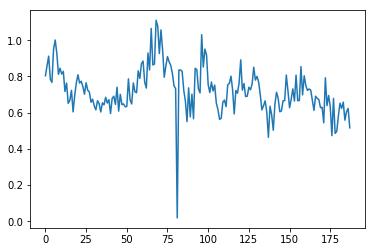

In [44]:
plt.plot(np.array(lst)[:,0,1200]);

In [45]:
for j in range(1680,1690):
    print j,np.nanmean(rawy[:,:,j],dtype=np.float),np.nanmean(y[:,:,j],dtype=np.float)

1680 1.68076379258 0.767920783369
1681 1.6817010969 0.767110917695
1682 1.62592518996 0.723749680765
1683 1.73977632686 0.821946088589
1684 1.71138398698 0.813116099178
1685 1.76363572066 0.845206885747
1686 1.69733310583 0.787718954939
1687 1.70009994492 0.789479112634
1688 nan 0.0
1689 nan 0.0


/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [46]:
for j in range(1680,1693):
    u=train_test[:,:,j]
    print j,np.nanmean(np.isnan(u),dtype=np.float),np.nanmean(u,dtype=np.float)

1680

 0.217877772759

 1.45109341742
1681

 0.216725885777

 1.47473181464
1682

 0.216204456489

 1.49925520133
1683

 0.214961106093

 1.48201992689
1684

 0.213816245107

 1.48726013245
1685

 0.213748619894

 1.51856606601
1686

 0.213970064238

 1.51563572905
1687

 0.214113846231

 1.43750172815
1688

 0.215972096758

 1.42103455288
1689

 0.218039496136

 1.40562297669
1690

 0.218554024892

 1.40026614268
1691

 0.217169150858

 1.45367468667
1692

 0.21806044866

 1.45061592252


In [47]:
np.mean(y[:,0,1688],dtype=np.float),np.mean(y[:,0,1686],dtype=np.float),np.mean(y[:,0,1687],dtype=np.float)

(0.0, 0.13274016203703703, 0.14341001157407407)

In [48]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1187]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.839863


In [49]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1687]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.843118


(54, 4100) 0.873501


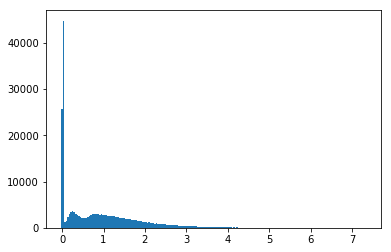

In [50]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

In [51]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1689]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.836822


In [52]:
np.mean(isnan(train_test[:,:,1688]),dtype=np.float)

0.21597209675800461

In [53]:
np.mean(isnan(train_test[:,:,1687]),dtype=np.float)

0.21411384623105489

In [54]:
np.mean(isnan(train_test[:,:,1689]),dtype=np.float)

0.21803949613570209

(54, 4100) 0.873501


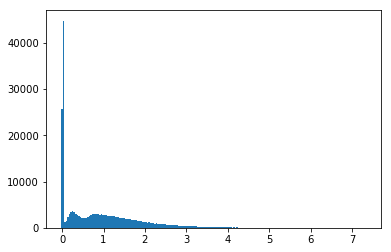

In [55]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);
pickle.dump(yy_pred3,open(a.name+".alt.pred",'wb'))

In [56]:
c=np.arange(60).reshape([3,4,5])

In [57]:
(c.reshape([-1,5]).reshape([3,4,5])==c).all()

True